In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel(r"C:\Users\sudhirb\Desktop\dataset\PCO\PCOS_data_without_infertility.xlsx", sheet_name=1)



In [2]:
df.head()

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.300000           15                78                22  ...   
1  24.921163           15                74                20  ...   
2  25.270891           11                72                18  ...   
3  29.674945           13                72                20  ...   
4  20.060954           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110   
1              0.0                  0                  120   
2              1.0                  0                  120   
3              0.0                  0                  120   
4              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

   Avg. F size (L) (mm) Avg. F size (R) (mm)  Endometrium (mm)  Unnamed: 44  
0                  18.0                 18.0               8.5          NaN  
1                  15.0                 14.0               3.7          NaN  
2                  18.0                 20.0              10.0          NaN  
3                  15.0                 14.0               7.5          NaN  
4                  16.0                 14.0               7.0          NaN  

[5 rows x 45 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [4]:
#Converting object data type to numeric type
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce") #converting object datatype to numeric
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors="coerce") #converting object datatypeTonumeric


In [5]:
#trimming column names where there are extra spaces at start and end
df = df.rename(columns=lambda x: x.strip()) 

In [6]:
#dropping axes which are not useful
df = df.drop(['Sl. No'], axis = 1) #dropping not useful axis
df = df.drop(['Patient File No.'], axis = 1) #dropping not useful axis
df = df.drop(['Unnamed: 44'], axis = 1) #dropping not useful axis


In [7]:
df.head()


PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)        BMI  Blood Group  \
0           0         28         44.6       152.0  19.300000           15   
1           0         36         65.0       161.5  24.921163           15   
2           1         33         68.8       165.0  25.270891           11   
3           0         37         65.0       148.0  29.674945           13   
4           0         25         52.0       161.0  20.060954           11   

   Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  ...  Pimples(Y/N)  \
0               78                22     10.48           2  ...             0   
1               74                20     11.70           2  ...             0   
2               72                18     11.80           2  ...             1   
3               72                20     12.00           2  ...             0   
4               72                18     10.00           2  ...             0   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110   
1              0.0                  0                  120   
2              1.0                  0                  120   
3              0.0                  0                  120   
4              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

   Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                  18.0                  18.0               8.5  
1                  15.0                  14.0               3.7  
2                  18.0                  20.0              10.0  
3                  15.0                  14.0               7.5  
4                  16.0                  14.0               7.0  

[5 rows x 42 columns]

Handling missing values

<AxesSubplot:>

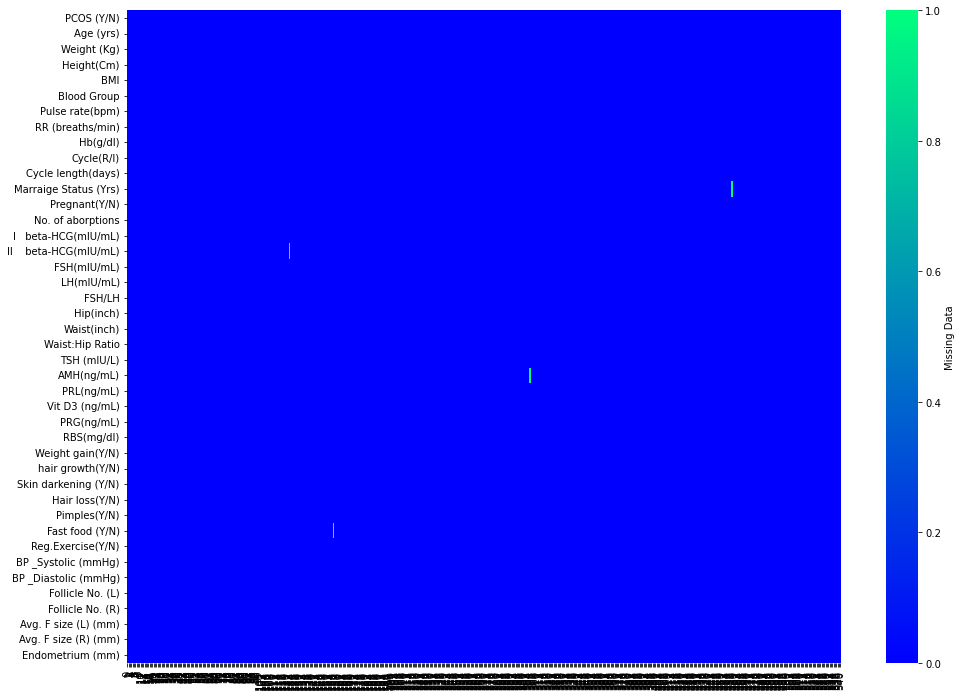

In [8]:
#plotting heatmap to visualize missing values
plt.figure(figsize=(16,12))
sns.heatmap(df.isna().transpose(),
            cmap="winter",
            cbar_kws={'label': 'Missing Data'}, xticklabels=True, yticklabels=True)


In [9]:
#column names with missing data
lst_missing_columns = df.columns[df.isna().any()].tolist()
lst_missing_columns

['Marraige Status (Yrs)',
 'II    beta-HCG(mIU/mL)',
 'AMH(ng/mL)',
 'Fast food (Y/N)']

In [10]:
#filling missing values with their median
for x in lst_missing_columns:
    df[x] = df[x].fillna(df[x].median()) #filling columns with missing value with their median

In [11]:
#Verifying if any missing values are left
df.columns[df.isna().any()].tolist() #no more missing values left

[]

Visualization

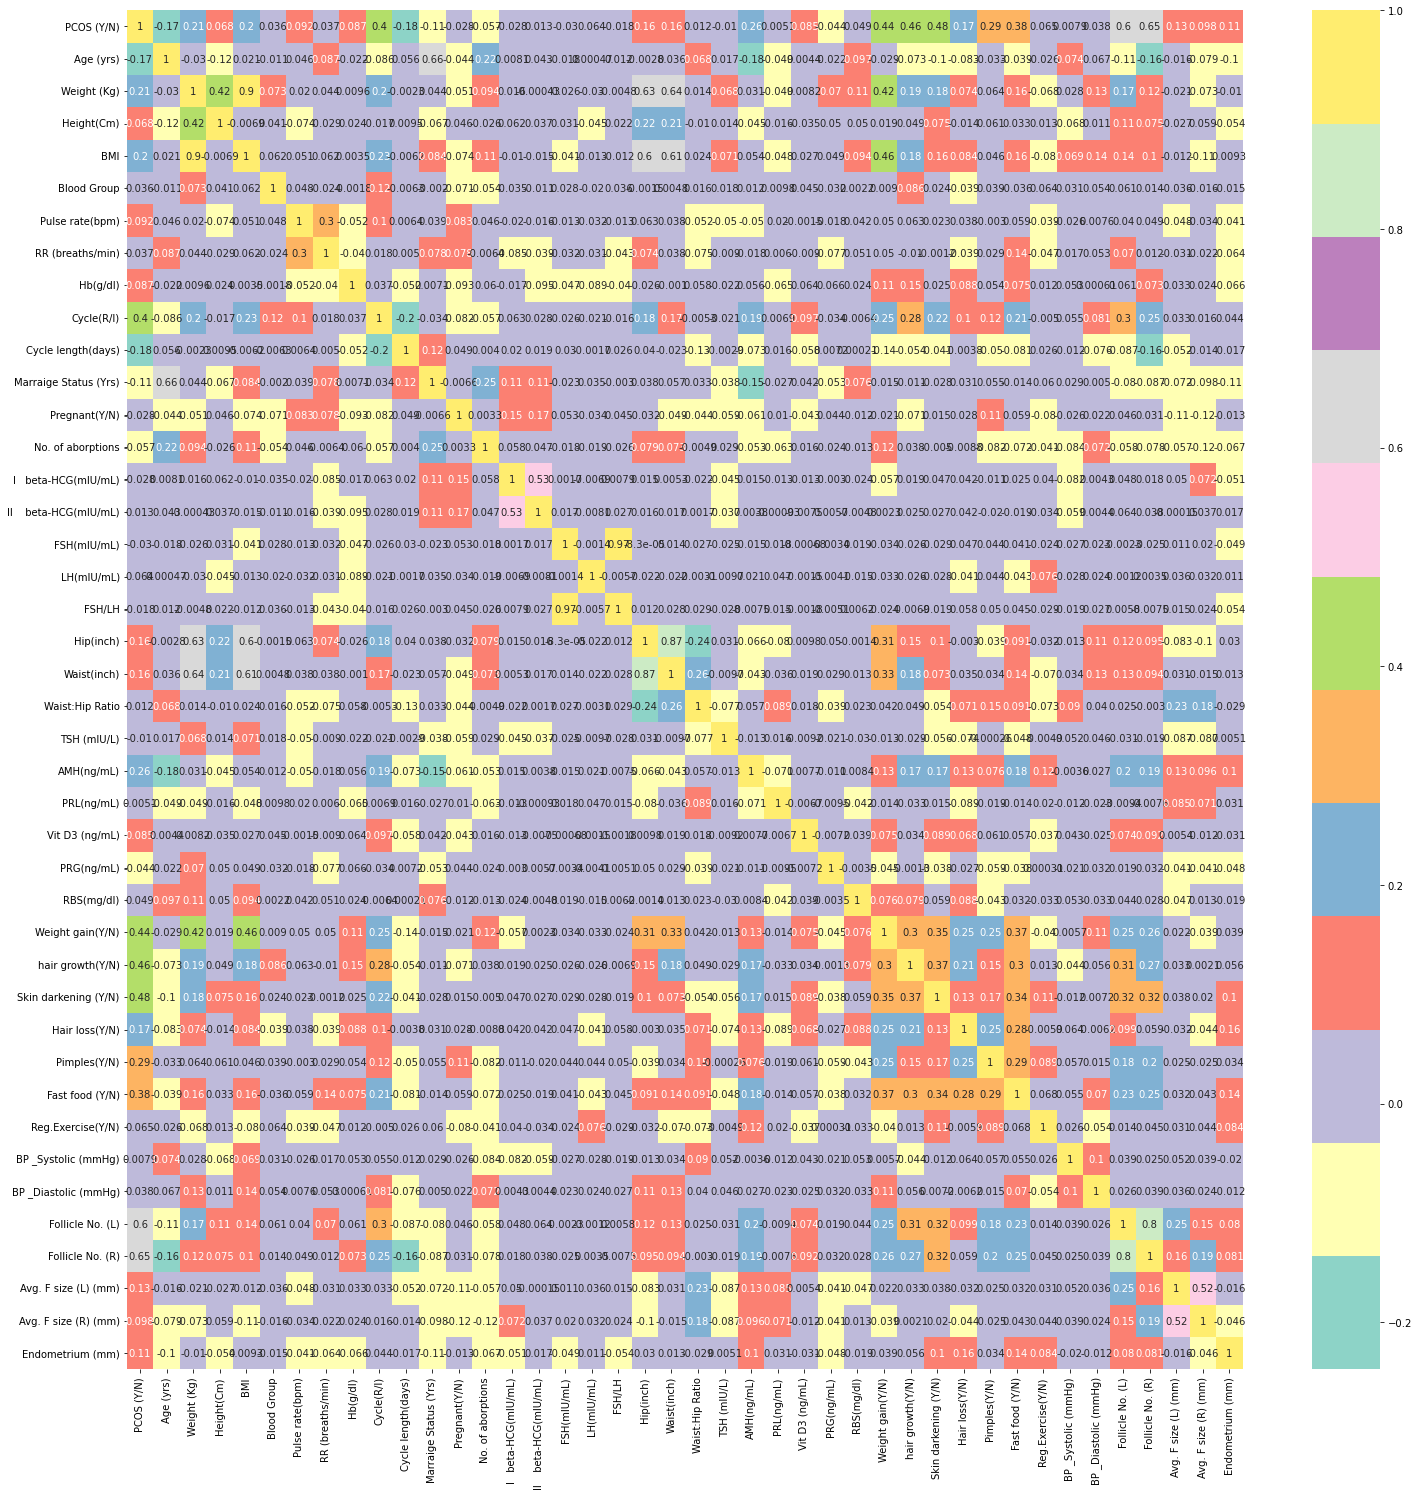

In [12]:
#Plotting correlation heatmap
plt.figure(figsize=(25, 25))
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="Set3", annot=True)
  
# displaying heatmap
plt.show()



In [13]:
#Checking how different features are correlated to PCOS
df.corr()["PCOS (Y/N)"].sort_values(ascending=False) #sorting in descending order


PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group               0.036433
II    beta-HCG(mIU/m

In [14]:
#Identifying numerical and categorical features in dataframe
numerical_variables = []
categorical_variables = []
for x in df.columns:
    if len(df[x].value_counts()) < 9:
        if x not in ["RR (breaths/min)", "Cycle(R/I)", "No. of aborptions", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)"]:
            categorical_variables.append(x)
    else:
        numerical_variables.append(x)

In [15]:
categorical_variables

['PCOS (Y/N)',
 'Blood Group',
 'Pregnant(Y/N)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)']

In [16]:
numerical_variables

['Age (yrs)',
 'Weight (Kg)',
 'Height(Cm)',
 'BMI',
 'Pulse rate(bpm)',
 'Hb(g/dl)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'I   beta-HCG(mIU/mL)',
 'II    beta-HCG(mIU/mL)',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio',
 'TSH (mIU/L)',
 'AMH(ng/mL)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

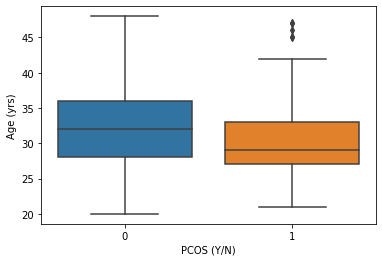

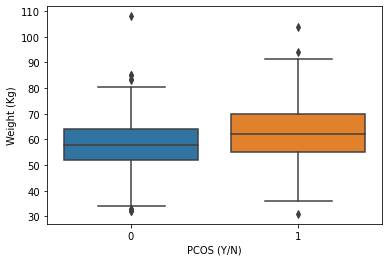

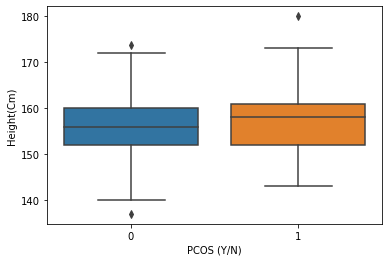

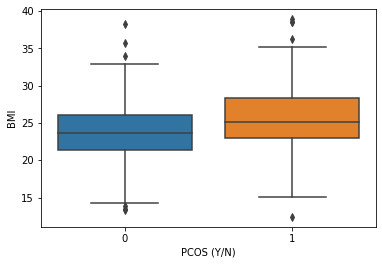

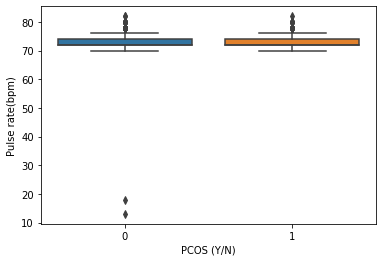

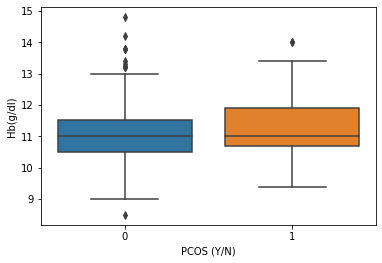

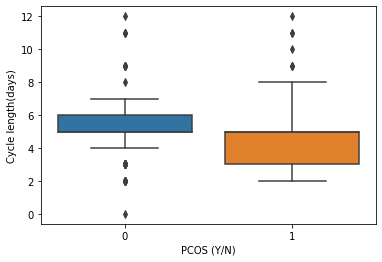

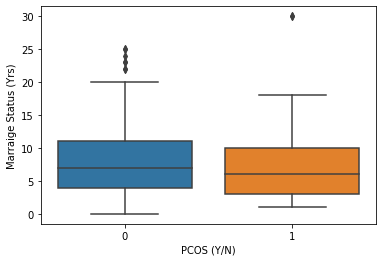

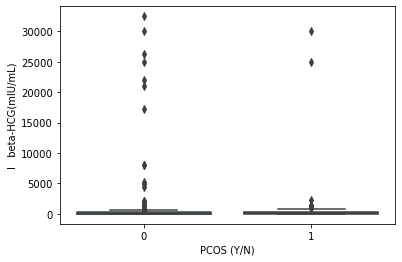

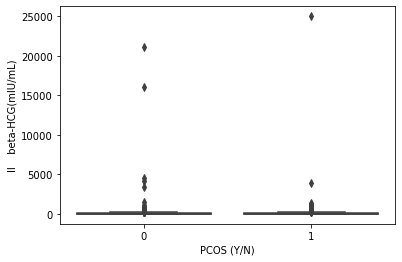

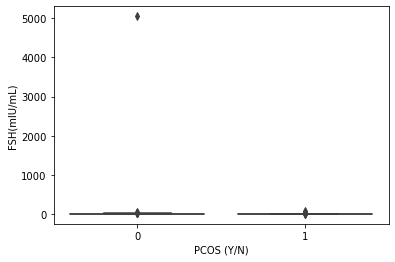

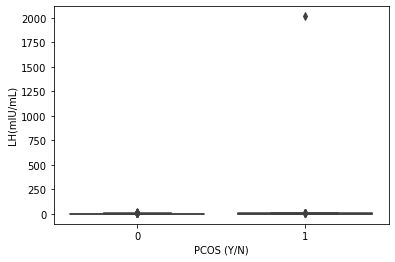

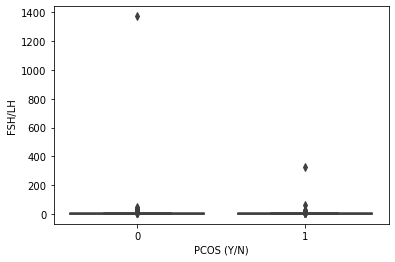

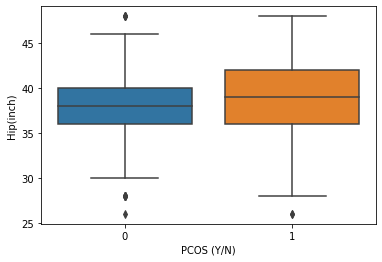

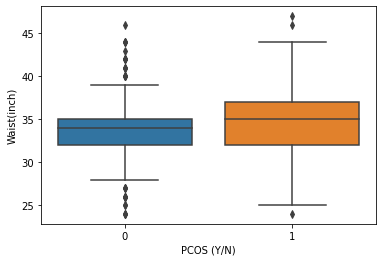

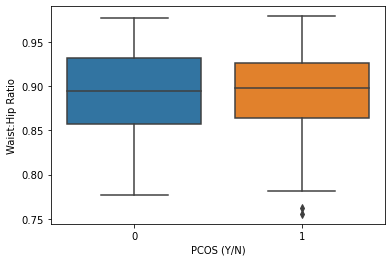

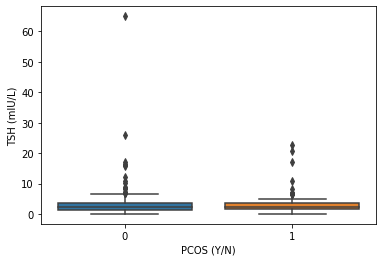

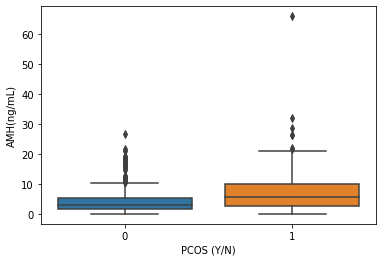

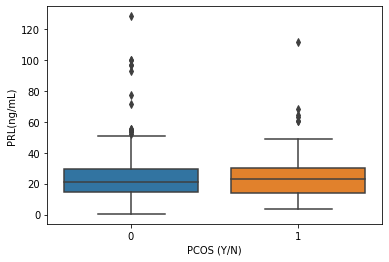

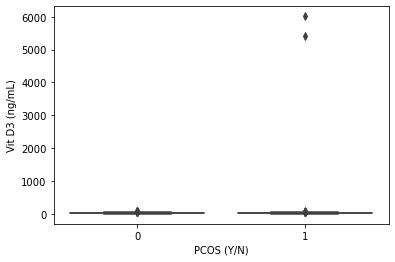

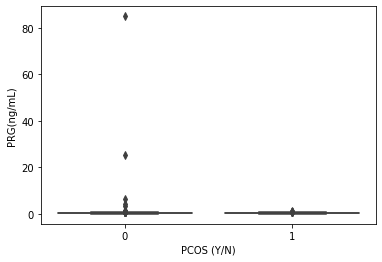

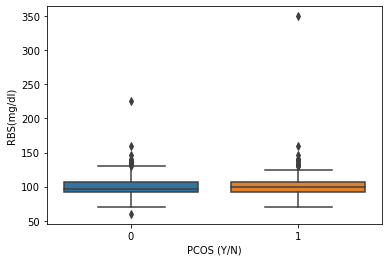

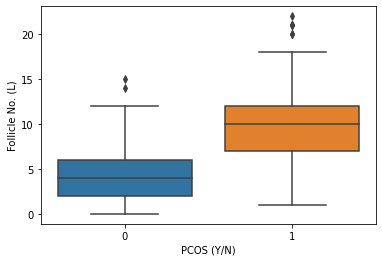

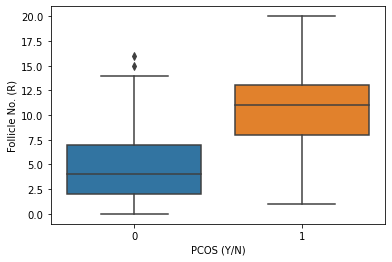

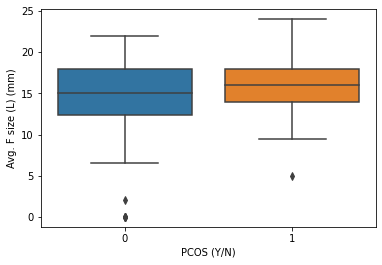

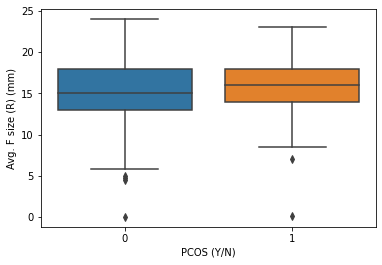

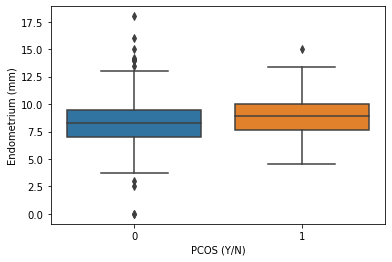

In [17]:
#Plotting Box plot for the numerical variables
for y in numerical_variables:
    sns.boxplot(y=y, x="PCOS (Y/N)", data=df)
    plt.show()

Observations from boxplot
* higher the follicle number more the tendancy of PCOS
* patients with lower cycle lengths means more tendancy of PCOS
* the average age of patients diagnosed with PCOS is 30 years

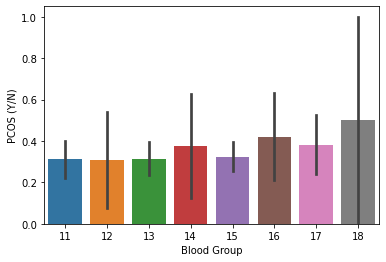

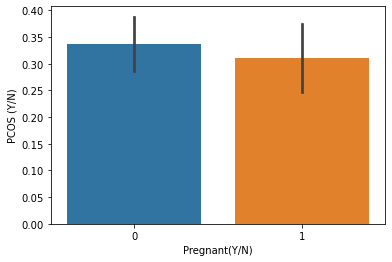

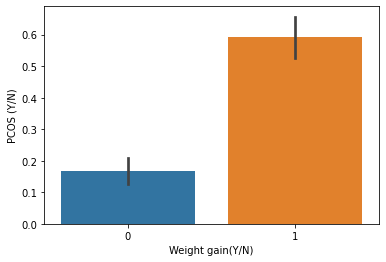

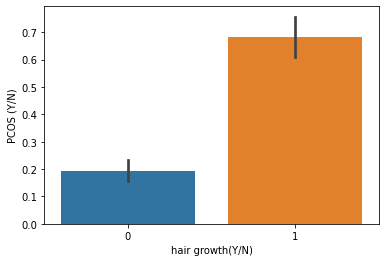

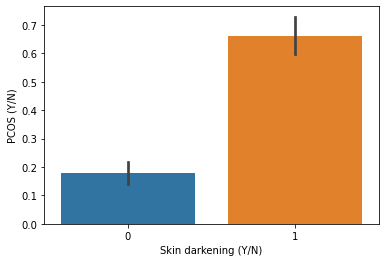

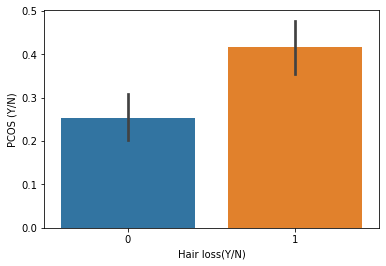

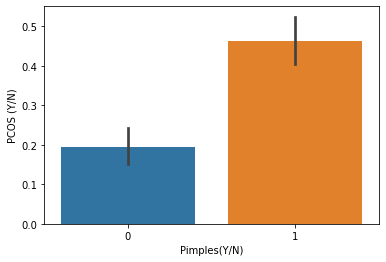

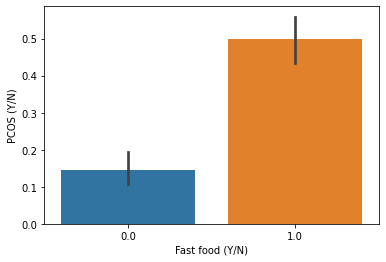

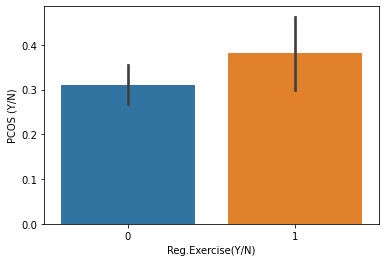

In [18]:
#Plotting barplot for categorical variables
for x in categorical_variables:
    if x != "PCOS (Y/N)":
        sns.barplot(x= x, y = "PCOS (Y/N)", data = df)
        plt.show()

Observations from barplot-

**weight gain, hair growth, pipmles, hair loss, fast food and skin darkening means higher chances of PCOS**.

So the above can also be termed as symptoms of PCOS

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='count'>

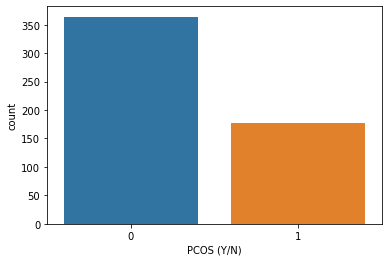

In [19]:
sns.countplot(x = "PCOS (Y/N)", data = df)


In [20]:
df["PCOS (Y/N)"].value_counts()


0    364
1    177
Name: PCOS (Y/N), dtype: int64

In [21]:
177/(364 + 177)*100


32.71719038817005

**32 %** of patients in our dataset are those having PCOS syndrome


In [22]:
df

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)        BMI  Blood Group  \
0             0         28         44.6     152.000  19.300000           15   
1             0         36         65.0     161.500  24.921163           15   
2             1         33         68.8     165.000  25.270891           11   
3             0         37         65.0     148.000  29.674945           13   
4             0         25         52.0     161.000  20.060954           11   
..          ...        ...          ...         ...        ...          ...   
536           0         35         50.0     164.592  18.500000           17   
537           0         30         63.2     158.000  25.300000           15   
538           0         36         54.0     152.000  23.400000           13   
539           0         27         50.0     150.000  22.200000           15   
540           1         23         82.0     165.000  30.100000           13   

     Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  ...  \
0                 78                22     10.48           2  ...   
1                 74                20     11.70           2  ...   
2                 72                18     11.80           2  ...   
3                 72                20     12.00           2  ...   
4                 72                18     10.00           2  ...   
..               ...               ...       ...         ...  ...   
536               72                16     11.00           2  ...   
537               72                18     10.80           2  ...   
538               74                20     10.80           2  ...   
539               74                20     12.00           4  ...   
540               80                20     10.20           4  ...   

     Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0               0              1.0                  0                  110   
1               0              0.0                  0                  120   
2               1              1.0                  0                  120   
3               0              0.0                  0                  120   
4               0              0.0                  0                  120   
..            ...              ...                ...                  ...   
536             0              0.0                  0                  110   
537             0              0.0                  0                  110   
538             0              0.0                  0                  110   
539             1              0.0                  0                  110   
540             1              1.0                  0                  120   

     BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                      80                 3                 3   
1                      70                 3                 5   
2                      80                13                15   
3                      70                 2                 2   
4                      80                 3                 4   
..                    ...               ...               ...   
536                    70                 1                 0   
537                    70                 9                 7   
538                    80                 1                 0   
539                    70                 7                 6   
540                    70                 9                10   

     Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                    18.0                  18.0               8.5  
1                    15.0                  14.0               3.7  
2                    18.0                  20.0              10.0  
3                    15.0                  14.0               7.5  
4                    16.0                  14.0               7.0  
..                    ...                   ...               ...  
536                  17.5        

In [23]:
from sklearn.model_selection import train_test_split

y = df.iloc[:, 0]
X = df.iloc[:, 1:]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



X represents the feature matrix, and y represents the target variable


FEATURE SELECTION

Mutual Information

In [24]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y)

# Print the mutual information scores for each feature
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score}")

Age (yrs): 0.023781043699885762
Weight (Kg): 0.03128019225359413
Height(Cm): 0.0
BMI: 0.02386253287022755
Blood Group: 0.0
Pulse rate(bpm): 0.0
RR (breaths/min): 0.014654953040969643
Hb(g/dl): 0.01404527580076076
Cycle(R/I): 0.07625405239073757
Cycle length(days): 0.08017261832034617
Marraige Status (Yrs): 0.004908925198166436
Pregnant(Y/N): 0.004812097226830847
No. of aborptions: 0.0
I   beta-HCG(mIU/mL): 0.00833091704706046
II    beta-HCG(mIU/mL): 0.0
FSH(mIU/mL): 0.028941140583225833
LH(mIU/mL): 0.029482393248511984
FSH/LH: 0.06338223547988786
Hip(inch): 0.01487502477458369
Waist(inch): 0.026603034518372093
Waist:Hip Ratio: 0.036896380590394795
TSH (mIU/L): 0.034748242190486334
AMH(ng/mL): 0.08107828570083231
PRL(ng/mL): 0.06254690821291464
Vit D3 (ng/mL): 0.019961762649824077
PRG(ng/mL): 0.019876848244179568
RBS(mg/dl): 0.0
Weight gain(Y/N): 0.10026032836745502
hair growth(Y/N): 0.10984474696802371
Skin darkening (Y/N): 0.10517239844216086
Hair loss(Y/N): 0.009822387945713329
Pimpl

In [25]:
# Create a DataFrame to display feature names and their mutual information scores
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information_Score': mi_scores})

# Print the mutual information scores for each feature
print(mi_df)


                   Feature  Mutual_Information_Score
0                Age (yrs)                  0.023781
1              Weight (Kg)                  0.031280
2               Height(Cm)                  0.000000
3                      BMI                  0.023863
4              Blood Group                  0.000000
5          Pulse rate(bpm)                  0.000000
6         RR (breaths/min)                  0.014655
7                 Hb(g/dl)                  0.014045
8               Cycle(R/I)                  0.076254
9       Cycle length(days)                  0.080173
10   Marraige Status (Yrs)                  0.004909
11           Pregnant(Y/N)                  0.004812
12       No. of aborptions                  0.000000
13    I   beta-HCG(mIU/mL)                  0.008331
14  II    beta-HCG(mIU/mL)                  0.000000
15             FSH(mIU/mL)                  0.028941
16              LH(mIU/mL)                  0.029482
17                  FSH/LH                  0.

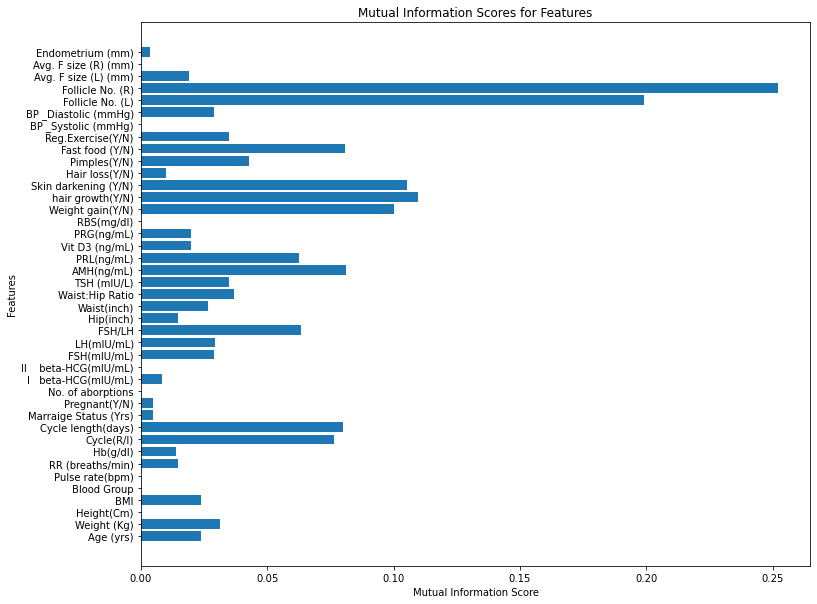

In [26]:
plt.figure(figsize=(12, 10))
plt.barh(mi_df['Feature'], mi_df['Mutual_Information_Score'])
plt.title('Mutual Information Scores for Features')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.show()

*Conclucion from Mutual Information* 

Features with relatively higher mutual information scores (indicating a stronger relationship with PCOS presence):


Hair growth(Y/N): 0.10365646294216369

Skin darkening (Y/N): 0.10549625986230171

Follicle No. (L): 0.2168620410855311

Follicle No. (R): 0.2503744245005677

In [27]:
#SMOTE

from imblearn.over_sampling import SMOTE
from collections import Counter

# Check the class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE to balance the classes
smotemi = SMOTE(random_state=100)
X_train_resampledmismo, y_train_resampledmismo = smotemi.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampledmismo))


Class distribution before SMOTE: Counter({0: 254, 1: 124})
Class distribution after SMOTE: Counter({1: 254, 0: 254})


In [28]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create a Logistic Regression model
modelmismolr = LogisticRegression()

# Train the model on the training data
modelmismolr.fit(X_train_resampledmismo, y_train_resampledmismo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmismolr = X_test[X_train_resampledmismo.columns]

# Make predictions on the test data
y_pred_mismolr = modelmismolr.predict(X_test_reorderedmismolr)

# Evaluate the model
accuracy_mismolr = accuracy_score(y_test, y_pred_mismolr)
confusion_mismolr = confusion_matrix(y_test, y_pred_mismolr)
classification_rep_mismolr = classification_report(y_test, y_pred_mismolr)

# Print the evaluation metrics
print("Accuracy:", accuracy_mismolr)
print("Confusion Matrix:\n", confusion_mismolr)
print("Classification Report:\n", classification_rep_mismolr)


Accuracy: 0.8098159509202454
Confusion Matrix:
 [[93 17]
 [14 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       110
           1       0.70      0.74      0.72        53

    accuracy                           0.81       163
   macro avg       0.78      0.79      0.79       163
weighted avg       0.81      0.81      0.81       163



In [29]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treemismodt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treemismodt.fit(X_train_resampledmismo, y_train_resampledmismo)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmismodt = X_test[X_train_resampledmismo.columns]

# Make predictions on the test data
y_pred_mismodt = decision_treemismodt.predict(X_test_reorderedmismodt)

# Evaluate the classifier's performance
accuracy_mismodt = accuracy_score(y_test, y_pred_mismodt)
print("Accuracy:", accuracy_mismodt)

# Print classification report for more detailed evaluation
report_mismodt = classification_report(y_test, y_pred_mismodt)
print("Classification Report:\n", report_mismodt)


Accuracy: 0.8098159509202454
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       110
           1       0.70      0.74      0.72        53

    accuracy                           0.81       163
   macro avg       0.78      0.79      0.79       163
weighted avg       0.81      0.81      0.81       163



In [30]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestmismorf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestmismorf.fit(X_train_resampledmismo, y_train_resampledmismo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmismorf = X_test[X_train_resampledmismo.columns]

# Make predictions on the test data
y_pred_mismorf = random_forestmismorf.predict(X_test_reorderedmismorf)

# Evaluate the classifier's performance
accuracy_mismorf = accuracy_score(y_test, y_pred_mismorf)
print("Accuracy:", accuracy_mismorf)

# Print classification report for more detailed evaluation
report_mismorf = classification_report(y_test, y_pred_mismorf)
print("Classification Report:\n", report_mismorf)


Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       110
           1       0.82      0.79      0.81        53

    accuracy                           0.88       163
   macro avg       0.86      0.86      0.86       163
weighted avg       0.88      0.88      0.88       163



In [31]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifiermismosvm = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifiermismosvm.fit(X_train_resampledmismo, y_train_resampledmismo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmismosvm = X_test[X_train_resampledmismo.columns]

# Make predictions on the test data
y_pred_mismosvm = svm_classifiermismosvm.predict(X_test_reorderedmismosvm)

# Evaluate the classifier's performance
accuracy_mismosvm = accuracy_score(y_test, y_pred_mismosvm)
print("Accuracy:", accuracy_mismosvm)

# Print classification report for more detailed evaluation
report_mismosvm = classification_report(y_test, y_pred_mismosvm)
print("Classification Report:\n", report_mismosvm)


Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       110
           1       0.80      0.74      0.76        53

    accuracy                           0.85       163
   macro avg       0.84      0.82      0.83       163
weighted avg       0.85      0.85      0.85       163



In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScaler object
scalermismoknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_mismoknn = scalermismoknn.fit_transform(X_train_resampledmismo)
X_test_scaled_mismoknn = scalermismoknn.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifiermismoknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifiermismoknn.fit(X_train_scaled_mismoknn, y_train_resampledmismo)
y_pred_mismoknn = knn_classifiermismoknn.predict(X_test_scaled_mismoknn)
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifiermismoknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifiermismoknn.fit(X_train_scaled_mismoknn, y_train_resampledmismo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmismoknn = X_test[X_train_resampledmismo.columns]

# Make predictions on the test data
y_pred_mismoknn = knn_classifiermismoknn.predict(X_test_scaled_mismoknn)

# Evaluate the classifier's performance
accuracy_mismoknn = accuracy_score(y_test, y_pred_mismoknn)
print("Accuracy:", accuracy_mismoknn)

# Print classification report for more detailed evaluation
report_mismoknn = classification_report(y_test, y_pred_mismoknn)
print("Classification Report:\n", report_mismoknn)


Accuracy: 0.8098159509202454
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       110
           1       0.69      0.75      0.72        53

    accuracy                           0.81       163
   macro avg       0.78      0.80      0.79       163
weighted avg       0.82      0.81      0.81       163



In [33]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifiermismonb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifiermismonb.fit(X_train_resampledmismo, y_train_resampledmismo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmismonb = X_test[X_train_resampledmismo.columns]

# Make predictions on the test data
y_pred_mismonb = naive_bayes_classifiermismonb.predict(X_test_reorderedmismonb)

# Evaluate the classifier's performance
accuracy_mismonb = accuracy_score(y_test, y_pred_mismonb)
print("Accuracy:", accuracy_mismonb)

# Print classification report for more detailed evaluation
report_mismonb = classification_report(y_test, y_pred_mismonb)
print("Classification Report:\n", report_mismonb)


Accuracy: 0.7300613496932515
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77       110
           1       0.56      0.85      0.67        53

    accuracy                           0.73       163
   macro avg       0.73      0.76      0.72       163
weighted avg       0.79      0.73      0.74       163



In [34]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifiermismoxg = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifiermismoxg.fit(X_train_resampledmismo, y_train_resampledmismo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmismoxgb = X_test[X_train_resampledmismo.columns]

# Make predictions on the test data
y_pred_mismoxgb = xgb_classifiermismoxg.predict(X_test_reorderedmismoxgb)

# Evaluate the classifier's performance
accuracy_mismoxgb = accuracy_score(y_test, y_pred_mismoxgb)
print("Accuracy:", accuracy_mismoxgb)

# Print classification report for more detailed evaluation
report_mismoxgb = classification_report(y_test, y_pred_mismoxgb)
print("Classification Report:\n", report_mismoxgb)

Accuracy: 0.8711656441717791
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       110
           1       0.81      0.79      0.80        53

    accuracy                           0.87       163
   macro avg       0.85      0.85      0.85       163
weighted avg       0.87      0.87      0.87       163



In [35]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifiermismocb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifiermismocb.fit(X_train_resampledmismo, y_train_resampledmismo)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmismocb = X_test[X_train_resampledmismo.columns]

# Make predictions on the test data
y_pred_mismocb = catboost_classifiermismocb.predict(X_test_reorderedmismocb)

# Evaluate the classifier's performance
accuracy_mismocb = accuracy_score(y_test, y_pred_mismocb)
print("Accuracy:", accuracy_mismocb)

# Print classification report for more detailed evaluation
report_mismocb = classification_report(y_test, y_pred_mismocb)
print("Classification Report:\n", report_mismocb)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       110
           1       0.76      0.77      0.77        53

    accuracy                           0.85       163
   macro avg       0.82      0.83      0.83       163
weighted avg       0.85      0.85      0.85       163



In [36]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifiermismoab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifiermismoab = AdaBoostClassifier(base_classifiermismoab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifiermismoab.fit(X_train_resampledmismo, y_train_resampledmismo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmismoab = X_test[X_train_resampledmismo.columns]

# Make predictions on the test data
y_pred_mismoab = adaboost_classifiermismoab.predict(X_test_reorderedmismoab)

# Evaluate the classifier's performance
accuracy_mismoab = accuracy_score(y_test, y_pred_mismoab)
print("Accuracy:", accuracy_mismoab)

# Print classification report for more detailed evaluation
report_mismoab = classification_report(y_test, y_pred_mismoab)
print("Classification Report:\n", report_mismoab)

Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       110
           1       0.78      0.79      0.79        53

    accuracy                           0.86       163
   macro avg       0.84      0.84      0.84       163
weighted avg       0.86      0.86      0.86       163



In [37]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifiermismosgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifiermismosgd.fit(X_train_resampledmismo, y_train_resampledmismo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmismoab = X_test[X_train_resampledmismo.columns]

# Make predictions on the test data
y_pred_mismosgd = sgd_classifiermismosgd.predict(X_test_reorderedmismoab)

# Evaluate the classifier's performance
accuracy_mismosgd = accuracy_score(y_test, y_pred_mismosgd)
print("Accuracy:", accuracy_mismosgd)

# Print classification report for more detailed evaluation
report_mismosgd = classification_report(y_test, y_pred_mismosgd)
print("Classification Report:\n", report_mismosgd)


Accuracy: 0.4785276073619632
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.36      0.48       110
           1       0.35      0.72      0.47        53

    accuracy                           0.48       163
   macro avg       0.54      0.54      0.48       163
weighted avg       0.61      0.48      0.48       163



In [38]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifiermismolda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifiermismolda.fit(X_train_resampledmismo, y_train_resampledmismo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmismolda = X_test[X_train_resampledmismo.columns]

# Make predictions on the test data
y_pred_mismolda = lda_classifiermismolda.predict(X_test_reorderedmismolda)

# Evaluate the classifier's performance
accuracy_mismolda = accuracy_score(y_test, y_pred_mismolda)
print("Accuracy:", accuracy_mismolda)

# Print classification report for more detailed evaluation
report_mismolda = classification_report(y_test, y_pred_mismolda)
print("Classification Report:\n", report_mismolda)



Accuracy: 0.8220858895705522
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       110
           1       0.71      0.77      0.74        53

    accuracy                           0.82       163
   macro avg       0.80      0.81      0.80       163
weighted avg       0.83      0.82      0.82       163



In [39]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifiermismoqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifiermismoqda.fit(X_train_resampledmismo, y_train_resampledmismo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmismoqda = X_test[X_train_resampledmismo.columns]

# Make predictions on the test data
y_pred_mismoqda = qda_classifiermismoqda.predict(X_test_reorderedmismoqda)

# Evaluate the classifier's performance
accuracy_mismoqda = accuracy_score(y_test, y_pred_mismoqda)
print("Accuracy:", accuracy_mismoqda)

# Print classification report for more detailed evaluation
report_mismoqda = classification_report(y_test, y_pred_mismoqda)
print("Classification Report:\n", report_mismoqda)


Accuracy: 0.7730061349693251
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.67      0.60      0.63        53

    accuracy                           0.77       163
   macro avg       0.74      0.73      0.73       163
weighted avg       0.77      0.77      0.77       163



In [40]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifiermismob = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifiermismob = BaggingClassifier(base_classifiermismob, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifiermismob.fit(X_train_resampledmismo, y_train_resampledmismo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmismob = X_test[X_train_resampledmismo.columns]

# Make predictions on the test data
y_pred_mismob = bagging_classifiermismob.predict(X_test_reorderedmismob)

# Evaluate the classifier's performance
accuracy_mismob = accuracy_score(y_test, y_pred_mismob)
print("Accuracy:", accuracy_mismob)

# Print classification report for more detailed evaluation
report_mismob = classification_report(y_test, y_pred_mismob)
print("Classification Report:\n", report_mismob)

Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       110
           1       0.77      0.75      0.76        53

    accuracy                           0.85       163
   macro avg       0.83      0.82      0.82       163
weighted avg       0.85      0.85      0.85       163



In [41]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifiersmismost = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifiermismost = StackingClassifier(
    estimators=base_classifiersmismost,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifiermismost.fit(X_train_resampledmismo, y_train_resampledmismo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmismost = X_test[X_train_resampledmismo.columns]

# Make predictions on the test data
y_pred_mismost = stacking_classifiermismost.predict(X_test_reorderedmismost)

# Evaluate the classifier's performance
accuracy_mismost = accuracy_score(y_test, y_pred_mismost)
print("Accuracy:", accuracy_mismost)

# Print classification report for more detailed evaluation
report_mismost = classification_report(y_test, y_pred_mismost)
print("Classification Report:\n", report_mismost)


Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       110
           1       0.77      0.70      0.73        53

    accuracy                           0.83       163
   macro avg       0.82      0.80      0.81       163
weighted avg       0.83      0.83      0.83       163



In [42]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifiermismogb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifiermismogb.fit(X_train_resampledmismo, y_train_resampledmismo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmismogb = X_test[X_train_resampledmismo.columns]

# Make predictions on the test data
y_pred_mismogb = gb_classifiermismogb.predict(X_test_reorderedmismogb)

# Evaluate the classifier's performance
accuracy_mismogb = accuracy_score(y_test, y_pred_mismogb)
print("Accuracy (Gradient Boosting):", accuracy_mismogb)

# Print classification report for more detailed evaluation
report_mismogb = classification_report(y_test, y_pred_mismogb)
print("Classification Report (Gradient Boosting):\n", report_mismogb)


Accuracy (Gradient Boosting): 0.8650306748466258
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       110
           1       0.77      0.83      0.80        53

    accuracy                           0.87       163
   macro avg       0.84      0.86      0.85       163
weighted avg       0.87      0.87      0.87       163



In [43]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifiermismocart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifiermismocart.fit(X_train_resampledmismo, y_train_resampledmismo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmismocart = X_test[X_train_resampledmismo.columns]

# Make predictions on the test data
y_pred_mismocart = cart_classifiermismocart.predict(X_test_reorderedmismocart)

# Evaluate the classifier's performance
accuracy_mismocart = accuracy_score(y_test, y_pred_mismocart)
print("Accuracy:", accuracy_mismocart)

# Print classification report for more detailed evaluation
report_mismocart = classification_report(y_test, y_pred_mismocart)
print("Classification Report:\n", report_mismocart)


Accuracy: 0.803680981595092
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.71      0.66      0.69        53

    accuracy                           0.80       163
   macro avg       0.78      0.77      0.77       163
weighted avg       0.80      0.80      0.80       163



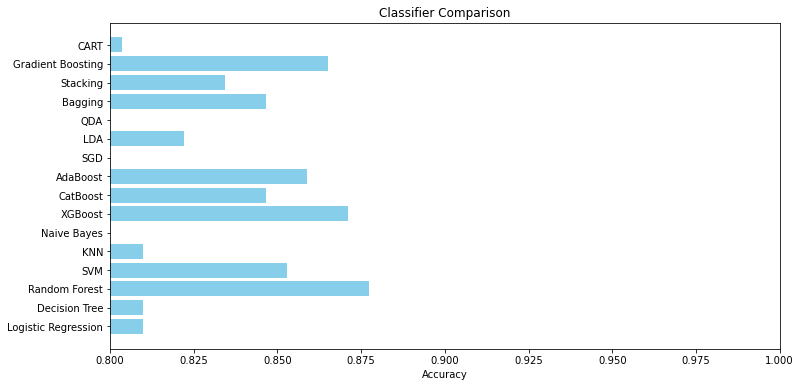

In [44]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_mismolr, accuracy_mismodt, accuracy_mismorf, accuracy_mismosvm, accuracy_mismoknn, accuracy_mismonb, accuracy_mismoxgb, accuracy_mismocb, accuracy_mismoab, accuracy_mismosgd, accuracy_mismolda, accuracy_mismoqda, accuracy_mismob, accuracy_mismost, accuracy_mismogb, accuracy_mismocart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


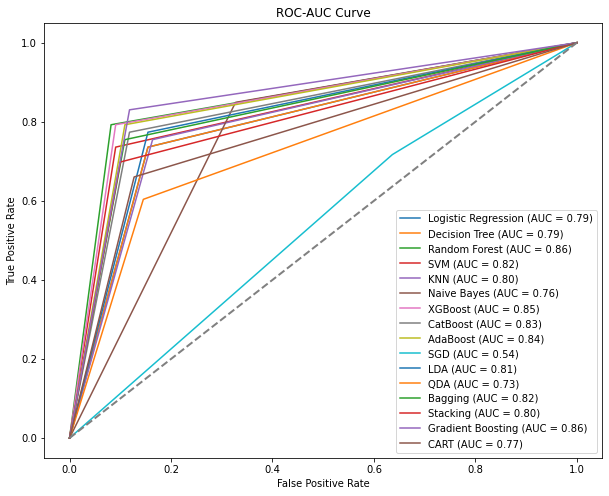

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_mismolr),
    ('Decision Tree', y_pred_mismodt),
    ('Random Forest', y_pred_mismorf),
    ('SVM', y_pred_mismosvm),
    ('KNN', y_pred_mismoknn),
    ('Naive Bayes', y_pred_mismonb),
    ('XGBoost', y_pred_mismoxgb),
    ('CatBoost', y_pred_mismocb),
    ('AdaBoost', y_pred_mismoab),
    ('SGD', y_pred_mismosgd),
    ('LDA', y_pred_mismolda),
    ('QDA', y_pred_mismoqda),
    ('Bagging', y_pred_mismob),
    ('Stacking', y_pred_mismost),
    ('Gradient Boosting', y_pred_mismogb),
    ('CART', y_pred_mismocart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [46]:
#ADASYN
from imblearn.over_sampling import ADASYN
from collections import Counter

# Assuming you have already defined X_train and y_train from your code

# Check the class distribution before ADASYN
print("Class distribution before ADASYN:", Counter(y_train))

# Apply ADASYN to balance the classes
adasynmi = ADASYN(random_state=42)
X_train_resampledmia, y_train_resampledmia = adasynmi.fit_resample(X_train, y_train)

# Check the class distribution after ADASYN
print("Class distribution after ADASYN:", Counter(y_train_resampledmia))


Class distribution before ADASYN: Counter({0: 254, 1: 124})
Class distribution after ADASYN: Counter({0: 254, 1: 252})


In [47]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modelmialr = LogisticRegression()

# Train the model on the training data
modelmialr.fit(X_train_resampledmia, y_train_resampledmia)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmialr = X_test[X_train_resampledmia.columns]

# Make predictions on the test data
y_pred_mialr = modelmialr.predict(X_test_reorderedmialr)

# Evaluate the model
accuracy_mialr = accuracy_score(y_test, y_pred_mialr)
confusion_mialr = confusion_matrix(y_test, y_pred_mialr)
classification_rep_mialr = classification_report(y_test, y_pred_mialr)

# Print the evaluation metrics
print("Accuracy:", accuracy_mialr)
print("Confusion Matrix:\n", confusion_mialr)
print("Classification Report:\n", classification_rep_mialr)


Accuracy: 0.8098159509202454
Confusion Matrix:
 [[90 20]
 [11 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       110
           1       0.68      0.79      0.73        53

    accuracy                           0.81       163
   macro avg       0.78      0.81      0.79       163
weighted avg       0.82      0.81      0.81       163



In [48]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treemiadt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treemiadt.fit(X_train_resampledmia, y_train_resampledmia)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiadt = X_test[X_train_resampledmia.columns]

# Make predictions on the test data
y_pred_miadt = decision_treemiadt.predict(X_test_reorderedmiadt)

# Evaluate the classifier's performance
accuracy_miadt = accuracy_score(y_test, y_pred_miadt)
print("Accuracy:", accuracy_miadt)

# Print classification report for more detailed evaluation
report_miadt = classification_report(y_test, y_pred_miadt)
print("Classification Report:\n", report_miadt)

Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       110
           1       0.72      0.77      0.75        53

    accuracy                           0.83       163
   macro avg       0.80      0.81      0.81       163
weighted avg       0.83      0.83      0.83       163



In [49]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestmiarf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestmiarf.fit(X_train_resampledmia, y_train_resampledmia)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiarf = X_test[X_train_resampledmia.columns]

# Make predictions on the test data
y_pred_miarf = random_forestmiarf.predict(X_test_reorderedmiarf)

# Evaluate the classifier's performance
accuracy_miarf = accuracy_score(y_test, y_pred_miarf)
print("Accuracy:", accuracy_miarf)

# Print classification report for more detailed evaluation
report_miarf = classification_report(y_test, y_pred_miarf)
print("Classification Report:\n", report_miarf)


Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       110
           1       0.79      0.77      0.78        53

    accuracy                           0.86       163
   macro avg       0.84      0.84      0.84       163
weighted avg       0.86      0.86      0.86       163



In [50]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifiermiasvm = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifiermiasvm.fit(X_train_resampledmia, y_train_resampledmia)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiasvm = X_test[X_train_resampledmia.columns]

# Make predictions on the test data
y_pred_miasvm = svm_classifiermiasvm.predict(X_test_reorderedmiasvm)

# Evaluate the classifier's performance
accuracy_miasvm = accuracy_score(y_test, y_pred_miasvm)
print("Accuracy:", accuracy_miasvm)

# Print classification report for more detailed evaluation
report_miasvm = classification_report(y_test, y_pred_miasvm)
print("Classification Report:\n", report_miasvm)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       110
           1       0.77      0.75      0.76        53

    accuracy                           0.85       163
   macro avg       0.83      0.82      0.82       163
weighted avg       0.85      0.85      0.85       163



In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScaler object
scalermiaknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_miaknn = scalermiaknn.fit_transform(X_train_resampledmia)
X_test_scaled_miaknn = scalermiaknn.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifiermiaknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifiermiaknn.fit(X_train_scaled_miaknn, y_train_resampledmia)
y_pred_miaknn = knn_classifiermiaknn.predict(X_test_scaled_miaknn)
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifiermiaknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifiermiaknn.fit(X_train_scaled_miaknn, y_train_resampledmia)

# Make predictions on the test data
y_pred_miaknn = knn_classifiermiaknn.predict(X_test_scaled_miaknn)

# Evaluate the classifier's performance
accuracy_miaknn = accuracy_score(y_test, y_pred_miaknn)
print("Accuracy:", accuracy_miaknn)

# Print classification report for more detailed evaluation
report_miaknn = classification_report(y_test, y_pred_miaknn)
print("Classification Report:\n", report_miaknn)


Accuracy: 0.8159509202453987
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       110
           1       0.68      0.81      0.74        53

    accuracy                           0.82       163
   macro avg       0.79      0.81      0.80       163
weighted avg       0.83      0.82      0.82       163



In [52]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifiermianb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifiermianb.fit(X_train_resampledmia, y_train_resampledmia)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmianb = X_test[X_train_resampledmia.columns]

# Make predictions on the test data
y_pred_mianb = naive_bayes_classifiermianb.predict(X_test_reorderedmianb)

# Evaluate the classifier's performance
accuracy_mianb = accuracy_score(y_test, y_pred_mianb)
print("Accuracy:", accuracy_mianb)

# Print classification report for more detailed evaluation
report_mianb = classification_report(y_test, y_pred_mianb)
print("Classification Report:\n", report_mianb)


Accuracy: 0.7177914110429447
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.66      0.76       110
           1       0.54      0.83      0.66        53

    accuracy                           0.72       163
   macro avg       0.72      0.75      0.71       163
weighted avg       0.78      0.72      0.73       163



In [53]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifiermiaxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifiermiaxgb.fit(X_train_resampledmia, y_train_resampledmia)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiaxgb = X_test[X_train_resampledmia.columns]

# Make predictions on the test data
y_pred_miaxgb = xgb_classifiermiaxgb.predict(X_test_reorderedmiaxgb)

# Evaluate the classifier's performance
accuracy_miaxgb = accuracy_score(y_test, y_pred_miaxgb)
print("Accuracy:", accuracy_miaxgb)

# Print classification report for more detailed evaluation
report_miaxgb = classification_report(y_test, y_pred_miaxgb)
print("Classification Report:\n", report_miaxgb)


Accuracy: 0.8957055214723927
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       110
           1       0.85      0.83      0.84        53

    accuracy                           0.90       163
   macro avg       0.88      0.88      0.88       163
weighted avg       0.90      0.90      0.90       163



In [54]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifiermiacb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifiermiacb.fit(X_train_resampledmia, y_train_resampledmia)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiacb = X_test[X_train_resampledmia.columns]

# Make predictions on the test data
y_pred_miacb = catboost_classifiermiacb.predict(X_test_reorderedmiacb)

# Evaluate the classifier's performance
accuracy_miacb = accuracy_score(y_test, y_pred_miacb)
print("Accuracy:", accuracy_miacb)

# Print classification report for more detailed evaluation
report_miacb = classification_report(y_test, y_pred_miacb)
print("Classification Report:\n", report_miacb)


Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       110
           1       0.76      0.79      0.78        53

    accuracy                           0.85       163
   macro avg       0.83      0.84      0.83       163
weighted avg       0.85      0.85      0.85       163



In [55]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifiermiaab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifiermiaab = AdaBoostClassifier(base_classifiermiaab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifiermiaab.fit(X_train_resampledmia, y_train_resampledmia)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiaab = X_test[X_train_resampledmia.columns]

# Make predictions on the test data
y_pred_miaab = adaboost_classifiermiaab.predict(X_test_reorderedmiaab)

# Evaluate the classifier's performance
accuracy_miaab = accuracy_score(y_test, y_pred_miaab)
print("Accuracy:", accuracy_miaab)

# Print classification report for more detailed evaluation
report_miaab = classification_report(y_test, y_pred_miaab)
print("Classification Report:\n", report_miaab)

Accuracy: 0.8159509202453987
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       110
           1       0.74      0.66      0.70        53

    accuracy                           0.82       163
   macro avg       0.79      0.78      0.78       163
weighted avg       0.81      0.82      0.81       163



In [56]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifiermiasgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifiermiasgd.fit(X_train_resampledmia, y_train_resampledmia)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiasgd = X_test[X_train_resampledmia.columns]

# Make predictions on the test data
y_pred_miasgd = sgd_classifiermiasgd.predict(X_test_reorderedmiasgd)

# Evaluate the classifier's performance
accuracy_miasgd = accuracy_score(y_test, y_pred_miasgd)
print("Accuracy:", accuracy_miasgd)

# Print classification report for more detailed evaluation
report_miasgd = classification_report(y_test, y_pred_miasgd)
print("Classification Report:\n", report_miasgd)


Accuracy: 0.5337423312883436
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.57      0.62       110
           1       0.34      0.45      0.39        53

    accuracy                           0.53       163
   macro avg       0.51      0.51      0.51       163
weighted avg       0.57      0.53      0.55       163



In [57]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifiermialda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifiermialda.fit(X_train_resampledmia, y_train_resampledmia)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmialda = X_test[X_train_resampledmia.columns]

# Make predictions on the test data
y_pred_mialda = lda_classifiermialda.predict(X_test_reorderedmialda)

# Evaluate the classifier's performance
accuracy_mialda = accuracy_score(y_test, y_pred_mialda)
print("Accuracy:", accuracy_mialda)

# Print classification report for more detailed evaluation
report_mialda = classification_report(y_test, y_pred_mialda)
print("Classification Report:\n", report_mialda)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       110
           1       0.75      0.79      0.77        53

    accuracy                           0.85       163
   macro avg       0.82      0.83      0.83       163
weighted avg       0.85      0.85      0.85       163



In [58]:

#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifiermiaqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifiermiaqda.fit(X_train_resampledmia, y_train_resampledmia)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiaqda = X_test[X_train_resampledmia.columns]

# Make predictions on the test data
y_pred_miaqda = qda_classifiermiaqda.predict(X_test_reorderedmiaqda)

# Evaluate the classifier's performance
accuracy_miaqda = accuracy_score(y_test, y_pred_miaqda)
print("Accuracy:", accuracy_miaqda)

# Print classification report for more detailed evaluation
report_miaqda = classification_report(y_test, y_pred_miaqda)
print("Classification Report:\n", report_miaqda)


Accuracy: 0.7668711656441718
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.66      0.58      0.62        53

    accuracy                           0.77       163
   macro avg       0.73      0.72      0.73       163
weighted avg       0.76      0.77      0.76       163



In [59]:

#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifiermiab = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifiermiab = BaggingClassifier(base_classifiermiab, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifiermiab.fit(X_train_resampledmia, y_train_resampledmia)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiab = X_test[X_train_resampledmia.columns]

# Make predictions on the test data
y_pred_miab = bagging_classifiermiab.predict(X_test_reorderedmiab)

# Evaluate the classifier's performance
accuracy_miab = accuracy_score(y_test, y_pred_miab)
print("Accuracy:", accuracy_miab)

# Print classification report for more detailed evaluation
report_miab = classification_report(y_test, y_pred_miab)
print("Classification Report:\n", report_miab)

Accuracy: 0.8650306748466258
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       110
           1       0.82      0.75      0.78        53

    accuracy                           0.87       163
   macro avg       0.85      0.84      0.84       163
weighted avg       0.86      0.87      0.86       163



In [60]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifiersmiast = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifiermiast = StackingClassifier(
    estimators=base_classifiersmiast,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifiermiast.fit(X_train_resampledmia, y_train_resampledmia)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiast = X_test[X_train_resampledmia.columns]

# Make predictions on the test data
y_pred_miast = stacking_classifiermiast.predict(X_test_reorderedmiast)

# Evaluate the classifier's performance
accuracy_miast = accuracy_score(y_test, y_pred_miast)
print("Accuracy:", accuracy_miast)

# Print classification report for more detailed evaluation
report_miast = classification_report(y_test, y_pred_miast)
print("Classification Report:\n", report_miast)


Accuracy: 0.8650306748466258
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       110
           1       0.79      0.79      0.79        53

    accuracy                           0.87       163
   macro avg       0.85      0.85      0.85       163
weighted avg       0.87      0.87      0.87       163



In [61]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifiermiagb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifiermiagb.fit(X_train_resampledmia, y_train_resampledmia)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiagb = X_test[X_train_resampledmia.columns]

# Make predictions on the test data
y_pred_miagb = gb_classifiermiagb.predict(X_test_reorderedmiagb)

# Evaluate the classifier's performance
accuracy_miagb = accuracy_score(y_test, y_pred_miagb)
print("Accuracy (Gradient Boosting):", accuracy_miagb)

# Print classification report for more detailed evaluation
report_miagb = classification_report(y_test, y_pred_miagb)
print("Classification Report (Gradient Boosting):\n", report_miagb)


Accuracy (Gradient Boosting): 0.8711656441717791
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       110
           1       0.80      0.81      0.80        53

    accuracy                           0.87       163
   macro avg       0.85      0.86      0.85       163
weighted avg       0.87      0.87      0.87       163



In [62]:

#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifiermiacart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifiermiacart.fit(X_train_resampledmia, y_train_resampledmia)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiacart = X_test[X_train_resampledmia.columns]

# Make predictions on the test data
y_pred_miacart = cart_classifiermiacart.predict(X_test_reorderedmiacart)

# Evaluate the classifier's performance
accuracy_miacart = accuracy_score(y_test, y_pred_miacart)
print("Accuracy:", accuracy_miacart)

# Print classification report for more detailed evaluation
report_miacart = classification_report(y_test, y_pred_miacart)
print("Classification Report:\n", report_miacart)


Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       110
           1       0.74      0.75      0.75        53

    accuracy                           0.83       163
   macro avg       0.81      0.81      0.81       163
weighted avg       0.84      0.83      0.83       163



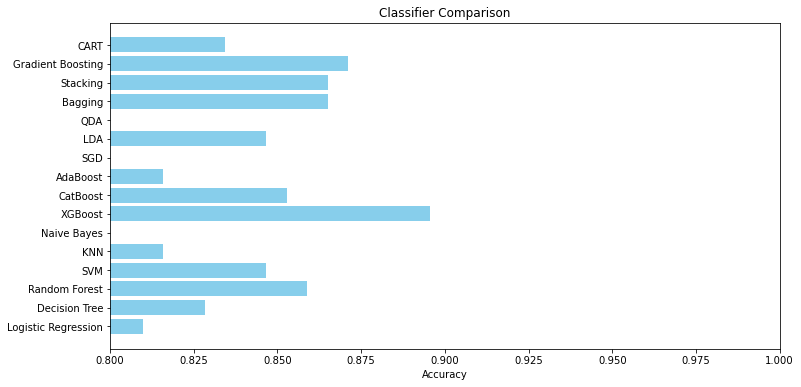

In [63]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_mialr, accuracy_miadt, accuracy_miarf, accuracy_miasvm, accuracy_miaknn, accuracy_mianb, accuracy_miaxgb, accuracy_miacb, accuracy_miaab, accuracy_miasgd, accuracy_mialda, accuracy_miaqda, accuracy_miab, accuracy_miast, accuracy_miagb, accuracy_miacart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


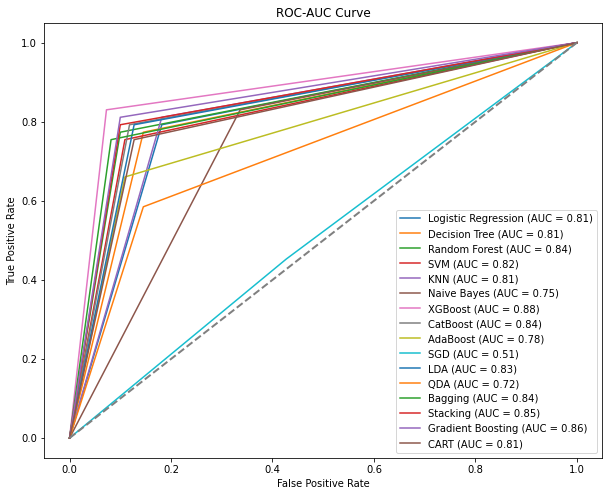

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_mialr),
    ('Decision Tree', y_pred_miadt),
    ('Random Forest', y_pred_miarf),
    ('SVM', y_pred_miasvm),
    ('KNN', y_pred_miaknn),
    ('Naive Bayes', y_pred_mianb),
    ('XGBoost', y_pred_miaxgb),
    ('CatBoost', y_pred_miacb),
    ('AdaBoost', y_pred_miaab),
    ('SGD', y_pred_miasgd),
    ('LDA', y_pred_mialda),
    ('QDA', y_pred_miaqda),
    ('Bagging', y_pred_miab),
    ('Stacking', y_pred_miast),
    ('Gradient Boosting', y_pred_miagb),
    ('CART', y_pred_miacart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [65]:
#ENN
from imblearn.under_sampling import EditedNearestNeighbours
# Check the class distribution before ENN
print("Class distribution before ENN:", Counter(y_train))

# Create an ENN instance
ennmi = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3, kind_sel='all')

# Fit and resample the training data
X_train_resampledmie, y_train_resampledmie = ennmi.fit_resample(X_train, y_train)

# Check the class distribution after ENN
print("Class distribution after ENN:", Counter(y_train_resampledmie))


Class distribution before ENN: Counter({0: 254, 1: 124})
Class distribution after ENN: Counter({1: 124, 0: 88})


In [66]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modelmielr = LogisticRegression()

# Train the model on the training data
modelmielr.fit(X_train_resampledmie, y_train_resampledmie)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmielr = X_test[X_train_resampledmie.columns]

# Make predictions on the test data
y_pred_mielr = modelmielr.predict(X_test_reorderedmielr)

# Evaluate the model
accuracy_mielr = accuracy_score(y_test, y_pred_mielr)
confusion_mielr = confusion_matrix(y_test, y_pred_mielr)
classification_rep_mielr = classification_report(y_test, y_pred_mielr)

# Print the evaluation metrics
print("Accuracy:", accuracy_mielr)
print("Confusion Matrix:\n", confusion_mielr)
print("Classification Report:\n", classification_rep_mielr)

Accuracy: 0.7361963190184049
Confusion Matrix:
 [[77 33]
 [10 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       110
           1       0.57      0.81      0.67        53

    accuracy                           0.74       163
   macro avg       0.73      0.76      0.72       163
weighted avg       0.78      0.74      0.74       163



In [67]:

#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treemiedt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treemiedt.fit(X_train_resampledmie, y_train_resampledmie)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiedt = X_test[X_train_resampledmie.columns]

# Make predictions on the test data
y_pred_miedt = decision_treemiedt.predict(X_test_reorderedmiedt)

# Evaluate the classifier's performance
accuracy_miedt = accuracy_score(y_test, y_pred_miedt)
print("Accuracy:", accuracy_miedt)

# Print classification report for more detailed evaluation
report_miedt = classification_report(y_test, y_pred_miedt)
print("Classification Report:\n", report_miedt)


Accuracy: 0.8098159509202454
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.85       110
           1       0.65      0.89      0.75        53

    accuracy                           0.81       163
   macro avg       0.79      0.83      0.80       163
weighted avg       0.84      0.81      0.82       163



In [68]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestmierf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestmierf.fit(X_train_resampledmie, y_train_resampledmie)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmierf = X_test[X_train_resampledmie.columns]

# Make predictions on the test data
y_pred_mierf = random_forestmierf.predict(X_test_reorderedmierf)

# Evaluate the classifier's performance
accuracy_mierf = accuracy_score(y_test, y_pred_mierf)
print("Accuracy:", accuracy_mierf)

# Print classification report for more detailed evaluation
report_mierf = classification_report(y_test, y_pred_mierf)
print("Classification Report:\n", report_mierf)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88       110
           1       0.71      0.91      0.79        53

    accuracy                           0.85       163
   macro avg       0.83      0.86      0.84       163
weighted avg       0.87      0.85      0.85       163



In [69]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifiermiesvm = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifiermiesvm.fit(X_train_resampledmie, y_train_resampledmie)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiesvm = X_test[X_train_resampledmie.columns]

# Make predictions on the test data
y_pred_miesvm = svm_classifiermiesvm.predict(X_test_reorderedmiesvm)

# Evaluate the classifier's performance
accuracy_miesvm = accuracy_score(y_test, y_pred_miesvm)
print("Accuracy:", accuracy_miesvm)

# Print classification report for more detailed evaluation
report_miesvm = classification_report(y_test, y_pred_miesvm)
print("Classification Report:\n", report_miesvm)


Accuracy: 0.7177914110429447
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77       110
           1       0.55      0.75      0.63        53

    accuracy                           0.72       163
   macro avg       0.70      0.73      0.70       163
weighted avg       0.76      0.72      0.73       163



In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScaler object
scalermieknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_mieknn = scalermieknn.fit_transform(X_train_resampledmie)
X_test_scaled_mieknn = scalermieknn.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifiermieknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifiermieknn.fit(X_train_scaled_mieknn, y_train_resampledmie)
y_pred_mieknn = knn_classifiermieknn.predict(X_test_scaled_mieknn)
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifiermieknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifiermieknn.fit(X_train_scaled_mieknn, y_train_resampledmie)

# Make predictions on the test data
y_pred_mieknn = knn_classifiermieknn.predict(X_test_scaled_mieknn)

# Evaluate the classifier's performance
accuracy_mieknn = accuracy_score(y_test, y_pred_mieknn)
print("Accuracy:", accuracy_mieknn)

# Print classification report for more detailed evaluation
report_mieknn = classification_report(y_test, y_pred_mieknn)
print("Classification Report:\n", report_mieknn)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       110
           1       0.74      0.81      0.77        53

    accuracy                           0.85       163
   macro avg       0.82      0.84      0.83       163
weighted avg       0.85      0.85      0.85       163



In [71]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifiermienb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifiermienb.fit(X_train_resampledmie, y_train_resampledmie)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmienb = X_test[X_train_resampledmie.columns]

# Make predictions on the test data
y_pred_mienb = naive_bayes_classifiermienb.predict(X_test_reorderedmienb)

# Evaluate the classifier's performance
accuracy_mienb = accuracy_score(y_test, y_pred_mienb)
print("Accuracy:", accuracy_mienb)

# Print classification report for more detailed evaluation
report_mienb = classification_report(y_test, y_pred_mienb)
print("Classification Report:\n", report_mienb)


Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       110
           1       0.76      0.79      0.78        53

    accuracy                           0.85       163
   macro avg       0.83      0.84      0.83       163
weighted avg       0.85      0.85      0.85       163



In [72]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifiermiexgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifiermiexgb.fit(X_train_resampledmie, y_train_resampledmie)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiexgb = X_test[X_train_resampledmie.columns]

# Make predictions on the test data
y_pred_miexgb = xgb_classifiermiexgb.predict(X_test_reorderedmiexgb)

# Evaluate the classifier's performance
accuracy_miexgb = accuracy_score(y_test, y_pred_miexgb)
print("Accuracy:", accuracy_miexgb)

# Print classification report for more detailed evaluation
report_miexgb = classification_report(y_test, y_pred_miexgb)
print("Classification Report:\n", report_miexgb)

Accuracy: 0.8220858895705522
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86       110
           1       0.67      0.89      0.76        53

    accuracy                           0.82       163
   macro avg       0.80      0.84      0.81       163
weighted avg       0.85      0.82      0.83       163



In [73]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifiermiecb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifiermiecb.fit(X_train_resampledmie, y_train_resampledmie)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiecb = X_test[X_train_resampledmie.columns]

# Make predictions on the test data
y_pred_miecb = catboost_classifiermiecb.predict(X_test_reorderedmiecb)

# Evaluate the classifier's performance
accuracy_miecb = accuracy_score(y_test, y_pred_miecb)
print("Accuracy:", accuracy_miecb)

# Print classification report for more detailed evaluation
report_miecb = classification_report(y_test, y_pred_miecb)
print("Classification Report:\n", report_miecb)


Accuracy: 0.8404907975460123
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.87       110
           1       0.71      0.87      0.78        53

    accuracy                           0.84       163
   macro avg       0.82      0.85      0.83       163
weighted avg       0.86      0.84      0.84       163



In [74]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifiermieab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifiermieab = AdaBoostClassifier(base_classifiermieab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifiermieab.fit(X_train_resampledmie, y_train_resampledmie)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmieab = X_test[X_train_resampledmie.columns]

# Make predictions on the test data
y_pred_mieab = adaboost_classifiermieab.predict(X_test_reorderedmieab)

# Evaluate the classifier's performance
accuracy_mieab = accuracy_score(y_test, y_pred_mieab)
print("Accuracy:", accuracy_mieab)

# Print classification report for more detailed evaluation
report_mieab = classification_report(y_test, y_pred_mieab)
print("Classification Report:\n", report_mieab)


Accuracy: 0.8404907975460123
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.87       110
           1       0.71      0.87      0.78        53

    accuracy                           0.84       163
   macro avg       0.82      0.85      0.83       163
weighted avg       0.86      0.84      0.84       163



In [75]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifiermiesgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifiermiesgd.fit(X_train_resampledmie, y_train_resampledmie)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiesgd = X_test[X_train_resampledmie.columns]

# Make predictions on the test data
y_pred_miesgd = sgd_classifiermiesgd.predict(X_test_reorderedmiesgd)

# Evaluate the classifier's performance
accuracy_miesgd = accuracy_score(y_test, y_pred_miesgd)
print("Accuracy:", accuracy_miesgd)

# Print classification report for more detailed evaluation
report_miesgd = classification_report(y_test, y_pred_miesgd)
print("Classification Report:\n", report_miesgd)


Accuracy: 0.5153374233128835
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.46      0.56       110
           1       0.36      0.62      0.46        53

    accuracy                           0.52       163
   macro avg       0.54      0.54      0.51       163
weighted avg       0.60      0.52      0.53       163



In [76]:

#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifiermielda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifiermielda.fit(X_train_resampledmie, y_train_resampledmie)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmielda = X_test[X_train_resampledmie.columns]

# Make predictions on the test data
y_pred_mielda = lda_classifiermielda.predict(X_test_reorderedmielda)

# Evaluate the classifier's performance
accuracy_mielda = accuracy_score(y_test, y_pred_mielda)
print("Accuracy:", accuracy_mielda)

# Print classification report for more detailed evaluation
report_mielda = classification_report(y_test, y_pred_mielda)
print("Classification Report:\n", report_mielda)

Accuracy: 0.7975460122699386
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       110
           1       0.67      0.74      0.70        53

    accuracy                           0.80       163
   macro avg       0.77      0.78      0.77       163
weighted avg       0.80      0.80      0.80       163



In [77]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifiermieqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifiermieqda.fit(X_train_resampledmie, y_train_resampledmie)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmieqda = X_test[X_train_resampledmie.columns]

# Make predictions on the test data
y_pred_mieqda = qda_classifiermieqda.predict(X_test_reorderedmieqda)

# Evaluate the classifier's performance
accuracy_mieqda = accuracy_score(y_test, y_pred_mieqda)
print("Accuracy:", accuracy_mieqda)

# Print classification report for more detailed evaluation
report_mieqda = classification_report(y_test, y_pred_mieqda)
print("Classification Report:\n", report_mieqda)


Accuracy: 0.6932515337423313
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.62      0.73       110
           1       0.52      0.85      0.64        53

    accuracy                           0.69       163
   macro avg       0.71      0.73      0.69       163
weighted avg       0.77      0.69      0.70       163



In [78]:

#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifiermieb = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifiermieb = BaggingClassifier(base_classifiermieb, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifiermieb.fit(X_train_resampledmie, y_train_resampledmie)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmieb = X_test[X_train_resampledmie.columns]

# Make predictions on the test data
y_pred_mieb = bagging_classifiermieb.predict(X_test_reorderedmieb)

# Evaluate the classifier's performance
accuracy_mieb = accuracy_score(y_test, y_pred_mieb)
print("Accuracy:", accuracy_mieb)

# Print classification report for more detailed evaluation
report_mieb = classification_report(y_test, y_pred_mieb)
print("Classification Report:\n", report_mieb)

Accuracy: 0.8159509202453987
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.85       110
           1       0.67      0.85      0.75        53

    accuracy                           0.82       163
   macro avg       0.79      0.82      0.80       163
weighted avg       0.84      0.82      0.82       163



In [79]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifiersmiest = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifiermiest = StackingClassifier(
    estimators=base_classifiersmiest,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifiermiest.fit(X_train_resampledmie, y_train_resampledmie)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiest = X_test[X_train_resampledmie.columns]

# Make predictions on the test data
y_pred_miest = stacking_classifiermiest.predict(X_test_reorderedmiest)

# Evaluate the classifier's performance
accuracy_miest = accuracy_score(y_test, y_pred_miest)
print("Accuracy:", accuracy_miest)

# Print classification report for more detailed evaluation
report_miest = classification_report(y_test, y_pred_miest)
print("Classification Report:\n", report_miest)


Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86       110
           1       0.68      0.89      0.77        53

    accuracy                           0.83       163
   macro avg       0.81      0.84      0.82       163
weighted avg       0.85      0.83      0.83       163



In [80]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifiermiegb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifiermiegb.fit(X_train_resampledmie, y_train_resampledmie)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiegb = X_test[X_train_resampledmie.columns]

# Make predictions on the test data
y_pred_miegb = gb_classifiermiegb.predict(X_test_reorderedmiegb)

# Evaluate the classifier's performance
accuracy_miegb = accuracy_score(y_test, y_pred_miegb)
print("Accuracy (Gradient Boosting):", accuracy_miegb)

# Print classification report for more detailed evaluation
report_miegb = classification_report(y_test, y_pred_miegb)
print("Classification Report (Gradient Boosting):\n", report_miegb)


Accuracy (Gradient Boosting): 0.8588957055214724
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       110
           1       0.73      0.91      0.81        53

    accuracy                           0.86       163
   macro avg       0.84      0.87      0.85       163
weighted avg       0.88      0.86      0.86       163



In [81]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifiermiecart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifiermiecart.fit(X_train_resampledmie, y_train_resampledmie)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiecart = X_test[X_train_resampledmie.columns]

# Make predictions on the test data
y_pred_miecart = cart_classifiermiecart.predict(X_test_reorderedmiecart)

# Evaluate the classifier's performance
accuracy_miecart = accuracy_score(y_test, y_pred_miecart)
print("Accuracy:", accuracy_miecart)

# Print classification report for more detailed evaluation
report_miecart = classification_report(y_test, y_pred_miecart)
print("Classification Report:\n", report_miecart)


Accuracy: 0.7791411042944786
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.73      0.82       110
           1       0.61      0.89      0.72        53

    accuracy                           0.78       163
   macro avg       0.77      0.81      0.77       163
weighted avg       0.83      0.78      0.79       163



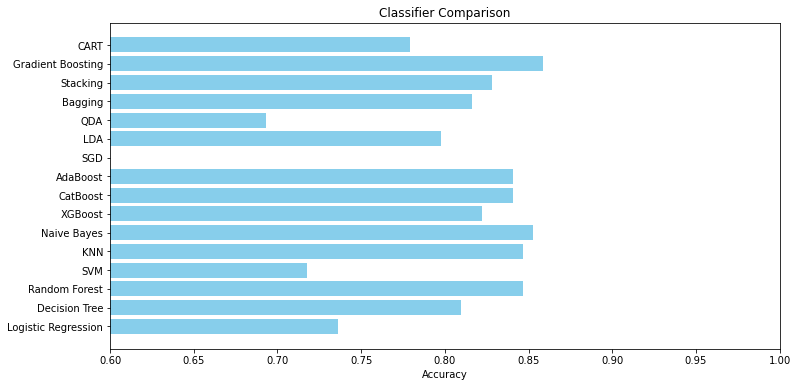

In [82]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_mielr, accuracy_miedt, accuracy_mierf, accuracy_miesvm, accuracy_mieknn, accuracy_mienb, accuracy_miexgb, accuracy_miecb, accuracy_mieab, accuracy_miesgd, accuracy_mielda, accuracy_mieqda, accuracy_mieb, accuracy_miest, accuracy_miegb, accuracy_miecart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.6, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


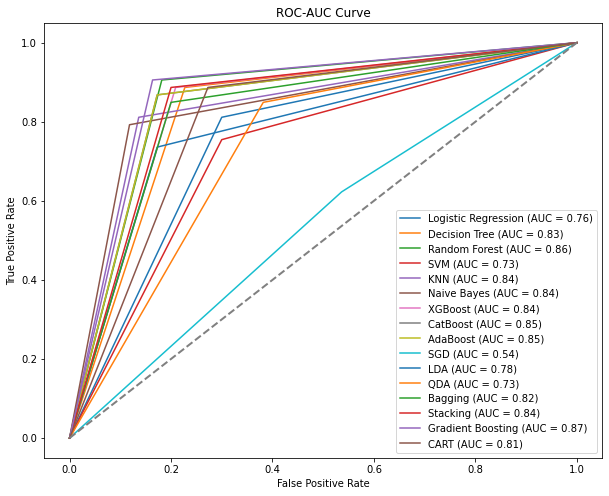

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_mielr),
    ('Decision Tree', y_pred_miedt),
    ('Random Forest', y_pred_mierf),
    ('SVM', y_pred_miesvm),
    ('KNN', y_pred_mieknn),
    ('Naive Bayes', y_pred_mienb),
    ('XGBoost', y_pred_miexgb),
    ('CatBoost', y_pred_miecb),
    ('AdaBoost', y_pred_mieab),
    ('SGD', y_pred_miesgd),
    ('LDA', y_pred_mielda),
    ('QDA', y_pred_mieqda),
    ('Bagging', y_pred_mieb),
    ('Stacking', y_pred_miest),
    ('Gradient Boosting', y_pred_miegb),
    ('CART', y_pred_miecart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [84]:
#NCR
from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification

# Generate a synthetic dataset (replace with your own dataset)
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Combine SMOTE and ENN using SMOTEENN
smote_ennmi = SMOTEENN(random_state=42)
X_train_resampledmincr, y_train_resampledmincr = smote_ennmi.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTEENN
from collections import Counter
print("Class distribution before SMOTEENN:", Counter(y_train))

print("Class distribution after SMOTEENN:", Counter(y_train_resampledmincr))


Class distribution before SMOTEENN: Counter({0: 254, 1: 124})
Class distribution after SMOTEENN: Counter({1: 146, 0: 69})


In [85]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modelmincrlr = LogisticRegression()

# Train the model on the training data
modelmincrlr.fit(X_train_resampledmincr, y_train_resampledmincr)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmincrlr = X_test[X_train_resampledmincr.columns]

# Make predictions on the test data
y_pred_mincrlr = modelmincrlr.predict(X_test_reorderedmincrlr)

# Evaluate the model
accuracy_mincrlr = accuracy_score(y_test, y_pred_mincrlr)
confusion_mincrlr = confusion_matrix(y_test, y_pred_mincrlr)
classification_rep_mincrlr = classification_report(y_test, y_pred_mincrlr)

# Print the evaluation metrics
print("Accuracy:", accuracy_mincrlr)
print("Confusion Matrix:\n", confusion_mincrlr)
print("Classification Report:\n", classification_rep_mincrlr)






Accuracy: 0.7177914110429447
Confusion Matrix:
 [[77 33]
 [13 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77       110
           1       0.55      0.75      0.63        53

    accuracy                           0.72       163
   macro avg       0.70      0.73      0.70       163
weighted avg       0.76      0.72      0.73       163



In [86]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treemincrdt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treemincrdt.fit(X_train_resampledmincr, y_train_resampledmincr)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmincrdt = X_test[X_train_resampledmincr.columns]

# Make predictions on the test data
y_pred_mincrdt = decision_treemincrdt.predict(X_test_reorderedmincrdt)

# Evaluate the classifier's performance
accuracy_mincrdt = accuracy_score(y_test, y_pred_mincrdt)
print("Accuracy:", accuracy_mincrdt)

# Print classification report for more detailed evaluation
report_mincrdt = classification_report(y_test, y_pred_mincrdt)
print("Classification Report:\n", report_mincrdt)


Accuracy: 0.6687116564417178
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.70      0.74       110
           1       0.49      0.60      0.54        53

    accuracy                           0.67       163
   macro avg       0.64      0.65      0.64       163
weighted avg       0.69      0.67      0.68       163



In [87]:

#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestmincrrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestmincrrf.fit(X_train_resampledmincr, y_train_resampledmincr)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmincrrf = X_test[X_train_resampledmincr.columns]

# Make predictions on the test data
y_pred_mincrrf = random_forestmincrrf.predict(X_test_reorderedmincrrf)

# Evaluate the classifier's performance
accuracy_mincrrf = accuracy_score(y_test, y_pred_mincrrf)
print("Accuracy:", accuracy_mincrrf)

# Print classification report for more detailed evaluation
report_mincrrf = classification_report(y_test, y_pred_mincrrf)
print("Classification Report:\n", report_mincrrf)


Accuracy: 0.8220858895705522
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86       110
           1       0.67      0.89      0.76        53

    accuracy                           0.82       163
   macro avg       0.80      0.84      0.81       163
weighted avg       0.85      0.82      0.83       163



In [88]:

#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifiermincrsvm = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifiermincrsvm.fit(X_train_resampledmincr, y_train_resampledmincr)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmincrsvm = X_test[X_train_resampledmincr.columns]

# Make predictions on the test data
y_pred_mincrsvm = svm_classifiermincrsvm.predict(X_test_reorderedmincrsvm)

# Evaluate the classifier's performance
accuracy_mincrsvm = accuracy_score(y_test, y_pred_mincrsvm)
print("Accuracy:", accuracy_mincrsvm)

# Print classification report for more detailed evaluation
report_mincrsvm = classification_report(y_test, y_pred_mincrsvm)
print("Classification Report:\n", report_mincrsvm)

Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.64      0.71       110
           1       0.47      0.68      0.56        53

    accuracy                           0.65       163
   macro avg       0.64      0.66      0.63       163
weighted avg       0.70      0.65      0.66       163



In [89]:

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScaler object
scalermincrknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_mincrknn = scalermincrknn.fit_transform(X_train_resampledmincr)
X_test_scaled_mincrknn = scalermincrknn.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifiermincrknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifiermincrknn.fit(X_train_scaled_mincrknn, y_train_resampledmincr)
y_pred_mincrknn = knn_classifiermincrknn.predict(X_test_scaled_mincrknn)
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifiermincrknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifiermincrknn.fit(X_train_scaled_mincrknn, y_train_resampledmincr)

# Make predictions on the test data
y_pred_mincrknn = knn_classifiermincrknn.predict(X_test_scaled_mincrknn)

# Evaluate the classifier's performance
accuracy_mincrknn = accuracy_score(y_test, y_pred_mincrknn)
print("Accuracy:", accuracy_mincrknn)

# Print classification report for more detailed evaluation
report_mincrknn = classification_report(y_test, y_pred_mincrknn)
print("Classification Report:\n", report_mincrknn)

Accuracy: 0.6257668711656442
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.49      0.64       110
           1       0.46      0.91      0.61        53

    accuracy                           0.63       163
   macro avg       0.69      0.70      0.63       163
weighted avg       0.77      0.63      0.63       163



In [90]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifiermincrnb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifiermincrnb.fit(X_train_resampledmincr, y_train_resampledmincr)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmincrnb = X_test[X_train_resampledmincr.columns]

# Make predictions on the test data
y_pred_mincrnb = naive_bayes_classifiermincrnb.predict(X_test_reorderedmincrnb)

# Evaluate the classifier's performance
accuracy_mincrnb = accuracy_score(y_test, y_pred_mincrnb)
print("Accuracy:", accuracy_mincrnb)

# Print classification report for more detailed evaluation
report_mincrnb = classification_report(y_test, y_pred_mincrnb)
print("Classification Report:\n", report_mincrnb)





Accuracy: 0.7730061349693251
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.81       110
           1       0.61      0.85      0.71        53

    accuracy                           0.77       163
   macro avg       0.76      0.79      0.76       163
weighted avg       0.81      0.77      0.78       163



In [91]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifiermincrxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifiermincrxgb.fit(X_train_resampledmincr, y_train_resampledmincr)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmincrxgb = X_test[X_train_resampledmincr.columns]

# Make predictions on the test data
y_pred_mincrxgb = xgb_classifiermincrxgb.predict(X_test_reorderedmincrxgb)

# Evaluate the classifier's performance
accuracy_mincrxgb = accuracy_score(y_test, y_pred_mincrxgb)
print("Accuracy:", accuracy_mincrxgb)

# Print classification report for more detailed evaluation
report_mincrxgb = classification_report(y_test, y_pred_mincrxgb)
print("Classification Report:\n", report_mincrxgb)




Accuracy: 0.8159509202453987
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       110
           1       0.68      0.81      0.74        53

    accuracy                           0.82       163
   macro avg       0.79      0.81      0.80       163
weighted avg       0.83      0.82      0.82       163



In [92]:

#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifiermincrcb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifiermincrcb.fit(X_train_resampledmincr, y_train_resampledmincr)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmincrcb = X_test[X_train_resampledmincr.columns]

# Make predictions on the test data
y_pred_mincrcb = catboost_classifiermincrcb.predict(X_test_reorderedmincrcb)

# Evaluate the classifier's performance
accuracy_mincrcb = accuracy_score(y_test, y_pred_mincrcb)
print("Accuracy:", accuracy_mincrcb)

# Print classification report for more detailed evaluation
report_mincrcb = classification_report(y_test, y_pred_mincrcb)
print("Classification Report:\n", report_mincrcb)

Accuracy: 0.7975460122699386
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.76      0.84       110
           1       0.64      0.87      0.74        53

    accuracy                           0.80       163
   macro avg       0.78      0.82      0.79       163
weighted avg       0.83      0.80      0.80       163



In [93]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifiermincrab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifiermincrab = AdaBoostClassifier(base_classifiermincrab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifiermincrab.fit(X_train_resampledmincr, y_train_resampledmincr)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmincrab = X_test[X_train_resampledmincr.columns]

# Make predictions on the test data
y_pred_mincrab = adaboost_classifiermincrab.predict(X_test_reorderedmincrab)

# Evaluate the classifier's performance
accuracy_mincrab = accuracy_score(y_test, y_pred_mincrab)
print("Accuracy:", accuracy_mincrab)

# Print classification report for more detailed evaluation
report_mincrab = classification_report(y_test, y_pred_mincrab)
print("Classification Report:\n", report_mincrab)


Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86       110
           1       0.68      0.89      0.77        53

    accuracy                           0.83       163
   macro avg       0.81      0.84      0.82       163
weighted avg       0.85      0.83      0.83       163



In [94]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifiermincrsgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifiermincrsgd.fit(X_train_resampledmincr, y_train_resampledmincr)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmincrsgd = X_test[X_train_resampledmincr.columns]

# Make predictions on the test data
y_pred_mincrsgd = sgd_classifiermincrsgd.predict(X_test_reorderedmincrsgd)

# Evaluate the classifier's performance
accuracy_mincrsgd = accuracy_score(y_test, y_pred_mincrsgd)
print("Accuracy:", accuracy_mincrsgd)

# Print classification report for more detailed evaluation
report_mincrsgd = classification_report(y_test, y_pred_mincrsgd)
print("Classification Report:\n", report_mincrsgd)


Accuracy: 0.3803680981595092
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.17      0.27       110
           1       0.32      0.81      0.46        53

    accuracy                           0.38       163
   macro avg       0.49      0.49      0.37       163
weighted avg       0.55      0.38      0.33       163



In [95]:

#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifiermincrlda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifiermincrlda.fit(X_train_resampledmincr, y_train_resampledmincr)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmincrlda = X_test[X_train_resampledmincr.columns]

# Make predictions on the test data
y_pred_mincrlda = lda_classifiermincrlda.predict(X_test_reorderedmincrlda)

# Evaluate the classifier's performance
accuracy_mincrlda = accuracy_score(y_test, y_pred_mincrlda)
print("Accuracy:", accuracy_mincrlda)

# Print classification report for more detailed evaluation
report_mincrlda = classification_report(y_test, y_pred_mincrlda)
print("Classification Report:\n", report_mincrlda)

Accuracy: 0.7423312883435583
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       110
           1       0.58      0.74      0.65        53

    accuracy                           0.74       163
   macro avg       0.72      0.74      0.72       163
weighted avg       0.77      0.74      0.75       163



In [96]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifiermincrqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifiermincrqda.fit(X_train_resampledmincr, y_train_resampledmincr)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmincrqda = X_test[X_train_resampledmincr.columns]

# Make predictions on the test data
y_pred_mincrqda = qda_classifiermincrqda.predict(X_test_reorderedmincrqda)

# Evaluate the classifier's performance
accuracy_mincrqda = accuracy_score(y_test, y_pred_mincrqda)
print("Accuracy:", accuracy_mincrqda)

# Print classification report for more detailed evaluation
report_mincrqda = classification_report(y_test, y_pred_mincrqda)
print("Classification Report:\n", report_mincrqda)


Accuracy: 0.7177914110429447
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.69      0.77       110
           1       0.55      0.77      0.64        53

    accuracy                           0.72       163
   macro avg       0.71      0.73      0.70       163
weighted avg       0.76      0.72      0.73       163



In [97]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifiermincrb = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifiermincrb = BaggingClassifier(base_classifiermincrb, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifiermincrb.fit(X_train_resampledmincr, y_train_resampledmincr)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmincrb = X_test[X_train_resampledmincr.columns]

# Make predictions on the test data
y_pred_mincrb = bagging_classifiermincrb.predict(X_test_reorderedmincrb)

# Evaluate the classifier's performance
accuracy_mincrb = accuracy_score(y_test, y_pred_mincrb)
print("Accuracy:", accuracy_mincrb)

# Print classification report for more detailed evaluation
report_mincrb = classification_report(y_test, y_pred_mincrb)
print("Classification Report:\n", report_mincrb)


Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.86       110
           1       0.69      0.87      0.77        53

    accuracy                           0.83       163
   macro avg       0.81      0.84      0.82       163
weighted avg       0.85      0.83      0.83       163



In [98]:

#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifiersmincrst = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifiermincrst = StackingClassifier(
    estimators=base_classifiersmincrst,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifiermincrst.fit(X_train_resampledmincr, y_train_resampledmincr)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmincrst = X_test[X_train_resampledmincr.columns]

# Make predictions on the test data
y_pred_mincrst = stacking_classifiermincrst.predict(X_test_reorderedmincrst)

# Evaluate the classifier's performance
accuracy_mincrst = accuracy_score(y_test, y_pred_mincrst)
print("Accuracy:", accuracy_mincrst)

# Print classification report for more detailed evaluation
report_mincrst = classification_report(y_test, y_pred_mincrst)
print("Classification Report:\n", report_mincrst)



Accuracy: 0.7914110429447853
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       110
           1       0.67      0.70      0.69        53

    accuracy                           0.79       163
   macro avg       0.76      0.77      0.76       163
weighted avg       0.79      0.79      0.79       163



In [99]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifiermincrgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifiermincrgb.fit(X_train_resampledmincr, y_train_resampledmincr)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmincrgb = X_test[X_train_resampledmincr.columns]

# Make predictions on the test data
y_pred_mincrgb = gb_classifiermincrgb.predict(X_test_reorderedmincrgb)

# Evaluate the classifier's performance
accuracy_mincrgb = accuracy_score(y_test, y_pred_mincrgb)
print("Accuracy (Gradient Boosting):", accuracy_mincrgb)

# Print classification report for more detailed evaluation
report_mincrgb = classification_report(y_test, y_pred_mincrgb)
print("Classification Report (Gradient Boosting):\n", report_mincrgb)


Accuracy (Gradient Boosting): 0.8343558282208589
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.94      0.81      0.87       110
           1       0.69      0.89      0.78        53

    accuracy                           0.83       163
   macro avg       0.81      0.85      0.82       163
weighted avg       0.86      0.83      0.84       163



In [100]:

#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifiermincrcart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifiermincrcart.fit(X_train_resampledmincr, y_train_resampledmincr)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmincrcart = X_test[X_train_resampledmincr.columns]

# Make predictions on the test data
y_pred_mincrcart = cart_classifiermincrcart.predict(X_test_reorderedmincrcart)

# Evaluate the classifier's performance
accuracy_mincrcart = accuracy_score(y_test, y_pred_mincrcart)
print("Accuracy:", accuracy_mincrcart)

# Print classification report for more detailed evaluation
report_mincrcart = classification_report(y_test, y_pred_mincrcart)
print("Classification Report:\n", report_mincrcart)


Accuracy: 0.7116564417177914
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78       110
           1       0.55      0.60      0.58        53

    accuracy                           0.71       163
   macro avg       0.68      0.68      0.68       163
weighted avg       0.72      0.71      0.71       163



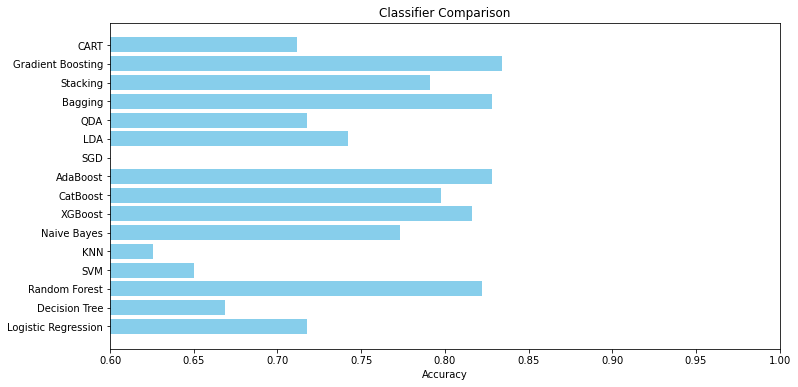

In [101]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_mincrlr, accuracy_mincrdt, accuracy_mincrrf, accuracy_mincrsvm, accuracy_mincrknn, accuracy_mincrnb, accuracy_mincrxgb, accuracy_mincrcb, accuracy_mincrab, accuracy_mincrsgd, accuracy_mincrlda, accuracy_mincrqda, accuracy_mincrb, accuracy_mincrst, accuracy_mincrgb, accuracy_mincrcart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.6, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


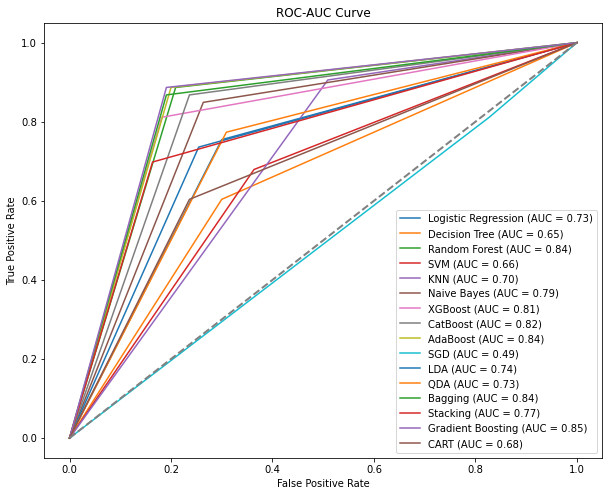

In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_mincrlr),
    ('Decision Tree', y_pred_mincrdt),
    ('Random Forest', y_pred_mincrrf),
    ('SVM', y_pred_mincrsvm),
    ('KNN', y_pred_mincrknn),
    ('Naive Bayes', y_pred_mincrnb),
    ('XGBoost', y_pred_mincrxgb),
    ('CatBoost', y_pred_mincrcb),
    ('AdaBoost', y_pred_mincrab),
    ('SGD', y_pred_mincrsgd),
    ('LDA', y_pred_mincrlda),
    ('QDA', y_pred_mincrqda),
    ('Bagging', y_pred_mincrb),
    ('Stacking', y_pred_mincrst),
    ('Gradient Boosting', y_pred_mincrgb),
    ('CART', y_pred_mincrcart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [103]:
#Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Check the class distribution before random undersampling
print("Class distribution before random undersampling:", Counter(y_train))

# Initialize the RandomUnderSampler
undersamplermirus = RandomUnderSampler(random_state=42)

# Perform random undersampling on the training data
X_train_resampledmirus, y_train_resampledmirus = undersamplermirus.fit_resample(X_train, y_train)

# Check the class distribution after random undersampling
print("Class distribution after random undersampling:", Counter(y_train_resampledmirus))


Class distribution before random undersampling: Counter({0: 254, 1: 124})
Class distribution after random undersampling: Counter({0: 124, 1: 124})


In [104]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modelmiruslr = LogisticRegression()

# Train the model on the training data
modelmiruslr.fit(X_train_resampledmirus, y_train_resampledmirus)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiruslr = X_test[X_train_resampledmirus.columns]

# Make predictions on the test data
y_pred_miruslr = modelmiruslr.predict(X_test_reorderedmiruslr)

# Evaluate the model
accuracy_miruslr = accuracy_score(y_test, y_pred_miruslr)
confusion_miruslr = confusion_matrix(y_test, y_pred_miruslr)
classification_rep_miruslr = classification_report(y_test, y_pred_miruslr)

# Print the evaluation metrics
print("Accuracy:", accuracy_miruslr)
print("Confusion Matrix:\n", confusion_miruslr)
print("Classification Report:\n", classification_rep_miruslr)


Accuracy: 0.7791411042944786
Confusion Matrix:
 [[90 20]
 [16 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       110
           1       0.65      0.70      0.67        53

    accuracy                           0.78       163
   macro avg       0.75      0.76      0.75       163
weighted avg       0.78      0.78      0.78       163



In [105]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treemirusdt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treemirusdt.fit(X_train_resampledmirus, y_train_resampledmirus)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirusdt = X_test[X_train_resampledmirus.columns]

# Make predictions on the test data
y_pred_mirusdt = decision_treemirusdt.predict(X_test_reorderedmirusdt)

# Evaluate the classifier's performance
accuracy_mirusdt = accuracy_score(y_test, y_pred_mirusdt)
print("Accuracy:", accuracy_mirusdt)

# Print classification report for more detailed evaluation
report_mirusdt = classification_report(y_test, y_pred_mirusdt)
print("Classification Report:\n", report_mirusdt)


Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       110
           1       0.70      0.81      0.75        53

    accuracy                           0.83       163
   macro avg       0.80      0.82      0.81       163
weighted avg       0.84      0.83      0.83       163



In [106]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestmirusrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestmirusrf.fit(X_train_resampledmirus, y_train_resampledmirus)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirusrf = X_test[X_train_resampledmirus.columns]

# Make predictions on the test data
y_pred_mirusrf = random_forestmirusrf.predict(X_test_reorderedmirusrf)

# Evaluate the classifier's performance
accuracy_mirusrf = accuracy_score(y_test, y_pred_mirusrf)
print("Accuracy:", accuracy_mirusrf)

# Print classification report for more detailed evaluation
report_mirusrf = classification_report(y_test, y_pred_mirusrf)
print("Classification Report:\n", report_mirusrf)


Accuracy: 0.8957055214723927
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       110
           1       0.85      0.83      0.84        53

    accuracy                           0.90       163
   macro avg       0.88      0.88      0.88       163
weighted avg       0.90      0.90      0.90       163



In [107]:

#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifiermirussvm = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifiermirussvm.fit(X_train_resampledmirus, y_train_resampledmirus)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirussvm = X_test[X_train_resampledmirus.columns]

# Make predictions on the test data
y_pred_mirussvm = svm_classifiermirussvm.predict(X_test_reorderedmirussvm)

# Evaluate the classifier's performance
accuracy_mirussvm = accuracy_score(y_test, y_pred_mirussvm)
print("Accuracy:", accuracy_mirussvm)

# Print classification report for more detailed evaluation
report_mirussvm = classification_report(y_test, y_pred_mirussvm)
print("Classification Report:\n", report_mirussvm)


Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       110
           1       0.78      0.79      0.79        53

    accuracy                           0.86       163
   macro avg       0.84      0.84      0.84       163
weighted avg       0.86      0.86      0.86       163



In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScaler object
scalermirusknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_mirusknn = scalermirusknn.fit_transform(X_train_resampledmirus)
X_test_scaled_mirusknn = scalermirusknn.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifiermirusknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifiermirusknn.fit(X_train_scaled_mirusknn, y_train_resampledmirus)
y_pred_mirusknn = knn_classifiermirusknn.predict(X_test_scaled_mirusknn)
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifiermirusknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifiermirusknn.fit(X_train_scaled_mirusknn, y_train_resampledmirus)

# Make predictions on the test data
y_pred_mirusknn = knn_classifiermirusknn.predict(X_test_scaled_mirusknn)

# Evaluate the classifier's performance
accuracy_mirusknn = accuracy_score(y_test, y_pred_mirusknn)
print("Accuracy:", accuracy_mirusknn)

# Print classification report for more detailed evaluation
report_mirusknn = classification_report(y_test, y_pred_mirusknn)
print("Classification Report:\n", report_mirusknn)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       110
           1       0.80      0.70      0.75        53

    accuracy                           0.85       163
   macro avg       0.83      0.81      0.82       163
weighted avg       0.84      0.85      0.84       163



In [109]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifiermirusnb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifiermirusnb.fit(X_train_resampledmirus, y_train_resampledmirus)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirusnb = X_test[X_train_resampledmirus.columns]

# Make predictions on the test data
y_pred_mirusnb = naive_bayes_classifiermirusnb.predict(X_test_reorderedmirusnb)

# Evaluate the classifier's performance
accuracy_mirusnb = accuracy_score(y_test, y_pred_mirusnb)
print("Accuracy:", accuracy_mirusnb)

# Print classification report for more detailed evaluation
report_mirusnb = classification_report(y_test, y_pred_mirusnb)
print("Classification Report:\n", report_mirusnb)


Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       110
           1       0.80      0.66      0.72        53

    accuracy                           0.83       163
   macro avg       0.82      0.79      0.80       163
weighted avg       0.83      0.83      0.83       163



In [110]:

#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifiermirusxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifiermirusxgb.fit(X_train_resampledmirus, y_train_resampledmirus)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirusxgb = X_test[X_train_resampledmirus.columns]

# Make predictions on the test data
y_pred_mirusxgb = xgb_classifiermirusxgb.predict(X_test_reorderedmirusxgb)

# Evaluate the classifier's performance
accuracy_mirusxgb = accuracy_score(y_test, y_pred_mirusxgb)
print("Accuracy:", accuracy_mirusxgb)

# Print classification report for more detailed evaluation
report_mirusxgb = classification_report(y_test, y_pred_mirusxgb)
print("Classification Report:\n", report_mirusxgb)

Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91       110
           1       0.77      0.89      0.82        53

    accuracy                           0.88       163
   macro avg       0.86      0.88      0.87       163
weighted avg       0.89      0.88      0.88       163



In [111]:

#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifiermiruscb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifiermiruscb.fit(X_train_resampledmirus, y_train_resampledmirus)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiruscb = X_test[X_train_resampledmirus.columns]

# Make predictions on the test data
y_pred_miruscb = catboost_classifiermiruscb.predict(X_test_reorderedmiruscb)

# Evaluate the classifier's performance
accuracy_miruscb = accuracy_score(y_test, y_pred_miruscb)
print("Accuracy:", accuracy_miruscb)

# Print classification report for more detailed evaluation




report_miruscb = classification_report(y_test, y_pred_miruscb)
print("Classification Report:\n", report_miruscb)

Accuracy: 0.8834355828220859
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       110
           1       0.80      0.85      0.83        53

    accuracy                           0.88       163
   macro avg       0.86      0.87      0.87       163
weighted avg       0.89      0.88      0.88       163



In [112]:

#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifiermirusab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifiermirusab = AdaBoostClassifier(base_classifiermirusab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifiermirusab.fit(X_train_resampledmirus, y_train_resampledmirus)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirusab = X_test[X_train_resampledmirus.columns]

# Make predictions on the test data
y_pred_mirusab = adaboost_classifiermirusab.predict(X_test_reorderedmirusab)

# Evaluate the classifier's performance
accuracy_mirusab = accuracy_score(y_test, y_pred_mirusab)
print("Accuracy:", accuracy_mirusab)

# Print classification report for more detailed evaluation
report_mirusab = classification_report(y_test, y_pred_mirusab)
print("Classification Report:\n", report_mirusab)


Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       110
           1       0.76      0.83      0.79        53

    accuracy                           0.86       163
   macro avg       0.84      0.85      0.84       163
weighted avg       0.86      0.86      0.86       163



In [113]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifiermirussgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifiermirussgd.fit(X_train_resampledmirus, y_train_resampledmirus)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirussgd = X_test[X_train_resampledmirus.columns]

# Make predictions on the test data
y_pred_mirussgd = sgd_classifiermirussgd.predict(X_test_reorderedmirussgd)

# Evaluate the classifier's performance
accuracy_mirussgd = accuracy_score(y_test, y_pred_mirussgd)
print("Accuracy:", accuracy_mirussgd)

# Print classification report for more detailed evaluation
report_mirussgd = classification_report(y_test, y_pred_mirussgd)
print("Classification Report:\n", report_mirussgd)


Accuracy: 0.4110429447852761
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.35      0.45       110
           1       0.28      0.53      0.37        53

    accuracy                           0.41       163
   macro avg       0.45      0.44      0.41       163
weighted avg       0.50      0.41      0.42       163



In [114]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifiermiruslda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifiermiruslda.fit(X_train_resampledmirus, y_train_resampledmirus)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiruslda = X_test[X_train_resampledmirus.columns]

# Make predictions on the test data
y_pred_miruslda = lda_classifiermiruslda.predict(X_test_reorderedmiruslda)

# Evaluate the classifier's performance
accuracy_miruslda = accuracy_score(y_test, y_pred_miruslda)
print("Accuracy:", accuracy_miruslda)

# Print classification report for more detailed evaluation
report_miruslda = classification_report(y_test, y_pred_miruslda)
print("Classification Report:\n", report_miruslda)


Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       110
           1       0.80      0.74      0.76        53

    accuracy                           0.85       163
   macro avg       0.84      0.82      0.83       163
weighted avg       0.85      0.85      0.85       163



In [115]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifiermirusqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifiermirusqda.fit(X_train_resampledmirus, y_train_resampledmirus)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirusqda = X_test[X_train_resampledmirus.columns]

# Make predictions on the test data
y_pred_mirusqda = qda_classifiermirusqda.predict(X_test_reorderedmirusqda)

# Evaluate the classifier's performance
accuracy_mirusqda = accuracy_score(y_test, y_pred_mirusqda)
print("Accuracy:", accuracy_mirusqda)

# Print classification report for more detailed evaluation
report_mirusqda = classification_report(y_test, y_pred_mirusqda)
print("Classification Report:\n", report_mirusqda)


Accuracy: 0.7484662576687117
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       110
           1       0.60      0.66      0.63        53

    accuracy                           0.75       163
   macro avg       0.72      0.73      0.72       163
weighted avg       0.76      0.75      0.75       163



In [116]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifiermirusb = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifiermirusb = BaggingClassifier(base_classifiermirusb, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifiermirusb.fit(X_train_resampledmirus, y_train_resampledmirus)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirusb = X_test[X_train_resampledmirus.columns]

# Make predictions on the test data
y_pred_mirusb = bagging_classifiermirusb.predict(X_test_reorderedmiab)

# Evaluate the classifier's performance
accuracy_mirusb = accuracy_score(y_test, y_pred_mirusb)
print("Accuracy:", accuracy_mirusb)

# Print classification report for more detailed evaluation
report_mirusb = classification_report(y_test, y_pred_mirusb)
print("Classification Report:\n", report_mirusb)


Accuracy: 0.8650306748466258
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       110
           1       0.78      0.81      0.80        53

    accuracy                           0.87       163
   macro avg       0.84      0.85      0.85       163
weighted avg       0.87      0.87      0.87       163



In [117]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifiersmirusst = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifiermirusst = StackingClassifier(
    estimators=base_classifiersmirusst,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifiermirusst.fit(X_train_resampledmirus, y_train_resampledmirus)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirusst = X_test[X_train_resampledmirus.columns]

# Make predictions on the test data
y_pred_mirusst = stacking_classifiermirusst.predict(X_test_reorderedmirusst)

# Evaluate the classifier's performance
accuracy_mirusst = accuracy_score(y_test, y_pred_mirusst)
print("Accuracy:", accuracy_mirusst)

# Print classification report for more detailed evaluation
report_mirusst = classification_report(y_test, y_pred_mirusst)
print("Classification Report:\n", report_mirusst)


Accuracy: 0.8711656441717791
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       110
           1       0.76      0.89      0.82        53

    accuracy                           0.87       163
   macro avg       0.85      0.88      0.86       163
weighted avg       0.88      0.87      0.87       163



In [118]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifiermirusgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifiermirusgb.fit(X_train_resampledmirus, y_train_resampledmirus)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirusgb = X_test[X_train_resampledmirus.columns]

# Make predictions on the test data
y_pred_mirusgb = gb_classifiermirusgb.predict(X_test_reorderedmirusgb)

# Evaluate the classifier's performance
accuracy_mirusgb = accuracy_score(y_test, y_pred_mirusgb)
print("Accuracy (Gradient Boosting):", accuracy_mirusgb)

# Print classification report for more detailed evaluation
report_mirusgb = classification_report(y_test, y_pred_mirusgb)
print("Classification Report (Gradient Boosting):\n", report_mirusgb)


Accuracy (Gradient Boosting): 0.901840490797546
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       110
           1       0.85      0.85      0.85        53

    accuracy                           0.90       163
   macro avg       0.89      0.89      0.89       163
weighted avg       0.90      0.90      0.90       163



In [119]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifiermiruscart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifiermiruscart.fit(X_train_resampledmirus, y_train_resampledmirus)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiruscart = X_test[X_train_resampledmirus.columns]

# Make predictions on the test data
y_pred_miruscart = cart_classifiermiruscart.predict(X_test_reorderedmiruscart)

# Evaluate the classifier's performance
accuracy_miruscart = accuracy_score(y_test, y_pred_miruscart)
print("Accuracy:", accuracy_miruscart)

# Print classification report for more detailed evaluation
report_miruscart = classification_report(y_test, y_pred_miruscart)
print("Classification Report:\n", report_miruscart)


Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       110
           1       0.72      0.81      0.76        53

    accuracy                           0.83       163
   macro avg       0.81      0.83      0.82       163
weighted avg       0.84      0.83      0.84       163



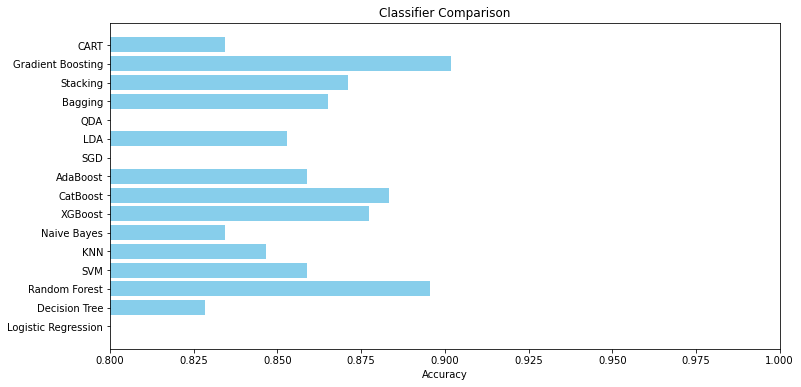

In [120]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_miruslr, accuracy_mirusdt, accuracy_mirusrf, accuracy_mirussvm, accuracy_mirusknn, accuracy_mirusnb, accuracy_mirusxgb, accuracy_miruscb, accuracy_mirusab, accuracy_mirussgd, accuracy_miruslda, accuracy_mirusqda, accuracy_mirusb, accuracy_mirusst, accuracy_mirusgb, accuracy_miruscart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


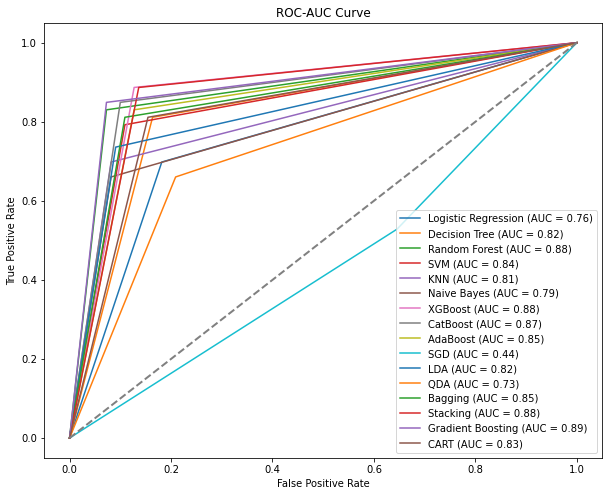

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_miruslr),
    ('Decision Tree', y_pred_mirusdt),
    ('Random Forest', y_pred_mirusrf),
    ('SVM', y_pred_mirussvm),
    ('KNN', y_pred_mirusknn),
    ('Naive Bayes', y_pred_mirusnb),
    ('XGBoost', y_pred_mirusxgb),
    ('CatBoost', y_pred_miruscb),
    ('AdaBoost', y_pred_mirusab),
    ('SGD', y_pred_mirussgd),
    ('LDA', y_pred_miruslda),
    ('QDA', y_pred_mirusqda),
    ('Bagging', y_pred_mirusb),
    ('Stacking', y_pred_mirusst),
    ('Gradient Boosting', y_pred_mirusgb),
    ('CART', y_pred_miruscart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [122]:
#Random Oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Assuming you have your dataset loaded into X_train and y_train

# Check the class distribution before random oversampling
print("Class distribution before Random Oversampling:", Counter(y_train))

# Create a RandomOverSampler object
miros = RandomOverSampler(random_state=42)

# Fit and apply random oversampling to the training data
X_train_resampledmiros, y_train_resampledmiros = miros.fit_resample(X_train, y_train)

# Check the class distribution after random oversampling
print("Class distribution after Random Oversampling:", Counter(y_train_resampledmiros))


Class distribution before Random Oversampling: Counter({0: 254, 1: 124})
Class distribution after Random Oversampling: Counter({1: 254, 0: 254})


In [123]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modelmiroslr = LogisticRegression()

# Train the model on the training data
modelmiroslr.fit(X_train_resampledmiros, y_train_resampledmiros)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiroslr = X_test[X_train_resampledmiros.columns]

# Make predictions on the test data
y_pred_miroslr = modelmiroslr.predict(X_test_reorderedmiroslr)

# Evaluate the model
accuracy_miroslr = accuracy_score(y_test, y_pred_miroslr)
confusion_miroslr = confusion_matrix(y_test, y_pred_miroslr)
classification_rep_miroslr = classification_report(y_test, y_pred_miroslr)

# Print the evaluation metrics
print("Accuracy:", accuracy_miroslr)
print("Confusion Matrix:\n", confusion_miroslr)
print("Classification Report:\n", classification_rep_miroslr)


Accuracy: 0.7914110429447853
Confusion Matrix:
 [[91 19]
 [15 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       110
           1       0.67      0.72      0.69        53

    accuracy                           0.79       163
   macro avg       0.76      0.77      0.77       163
weighted avg       0.80      0.79      0.79       163



In [124]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treemirosdt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treemirosdt.fit(X_train_resampledmiros, y_train_resampledmiros)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirosdt = X_test[X_train_resampledmiros.columns]

# Make predictions on the test data
y_pred_mirosdt = decision_treemirosdt.predict(X_test_reorderedmirosdt)

# Evaluate the classifier's performance
accuracy_mirosdt = accuracy_score(y_test, y_pred_mirosdt)
print("Accuracy:", accuracy_mirosdt)

# Print classification report for more detailed evaluation
report_mirosdt = classification_report(y_test, y_pred_mirosdt)
print("Classification Report:\n", report_mirosdt)


Accuracy: 0.803680981595092
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       110
           1       0.73      0.62      0.67        53

    accuracy                           0.80       163
   macro avg       0.78      0.76      0.77       163
weighted avg       0.80      0.80      0.80       163



In [125]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestmirosrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestmirosrf.fit(X_train_resampledmiros, y_train_resampledmiros)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirosrf = X_test[X_train_resampledmiros.columns]

# Make predictions on the test data
y_pred_mirosrf = random_forestmirosrf.predict(X_test_reorderedmirosrf)

# Evaluate the classifier's performance
accuracy_mirosrf = accuracy_score(y_test, y_pred_mirosrf)
print("Accuracy:", accuracy_mirosrf)

# Print classification report for more detailed evaluation
report_mirosrf = classification_report(y_test, y_pred_mirosrf)
print("Classification Report:\n", report_mirosrf)


Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       110
           1       0.87      0.74      0.80        53

    accuracy                           0.88       163
   macro avg       0.87      0.84      0.85       163
weighted avg       0.88      0.88      0.87       163



In [126]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifiermirossvm = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifiermirossvm.fit(X_train_resampledmiros, y_train_resampledmiros)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirossvm = X_test[X_train_resampledmiros.columns]

# Make predictions on the test data
y_pred_mirossvm = svm_classifiermirossvm.predict(X_test_reorderedmirossvm)

# Evaluate the classifier's performance
accuracy_mirossvm = accuracy_score(y_test, y_pred_mirossvm)
print("Accuracy:", accuracy_mirossvm)

# Print classification report for more detailed evaluation
report_mirossvm = classification_report(y_test, y_pred_mirossvm)
print("Classification Report:\n", report_mirossvm)


Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       110
           1       0.75      0.72      0.73        53

    accuracy                           0.83       163
   macro avg       0.81      0.80      0.80       163
weighted avg       0.83      0.83      0.83       163



In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScaler object
scalermirosknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_mirosknn = scalermirosknn.fit_transform(X_train_resampledmiros)
X_test_scaled_mirosknn = scalermirosknn.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifiermirosknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifiermirosknn.fit(X_train_scaled_mirosknn, y_train_resampledmiros)
y_pred_mirosknn = knn_classifiermiaknn.predict(X_test_scaled_mirosknn)
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifiermirosknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifiermirosknn.fit(X_train_scaled_mirosknn, y_train_resampledmiros)

# Make predictions on the test data
y_pred_mirosknn = knn_classifiermirosknn.predict(X_test_scaled_mirosknn)

# Evaluate the classifier's performance
accuracy_mirosknn = accuracy_score(y_test, y_pred_mirosknn)
print("Accuracy:", accuracy_mirosknn)

# Print classification report for more detailed evaluation
report_mirosknn = classification_report(y_test, y_pred_mirosknn)
print("Classification Report:\n", report_mirosknn)


Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       110
           1       0.81      0.72      0.76        53

    accuracy                           0.85       163
   macro avg       0.84      0.82      0.83       163
weighted avg       0.85      0.85      0.85       163



In [128]:

#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifiermirosnb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifiermirosnb.fit(X_train_resampledmiros, y_train_resampledmiros)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirosnb = X_test[X_train_resampledmiros.columns]

# Make predictions on the test data
y_pred_mirosnb = naive_bayes_classifiermirosnb.predict(X_test_reorderedmirosnb)

# Evaluate the classifier's performance
accuracy_mirosnb = accuracy_score(y_test, y_pred_mirosnb)
print("Accuracy:", accuracy_mirosnb)

# Print classification report for more detailed evaluation
report_mirosnb = classification_report(y_test, y_pred_mirosnb)
print("Classification Report:\n", report_mirosnb)


Accuracy: 0.7484662576687117
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79       110
           1       0.58      0.83      0.68        53

    accuracy                           0.75       163
   macro avg       0.74      0.77      0.74       163
weighted avg       0.79      0.75      0.76       163



In [129]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifiermirosxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifiermirosxgb.fit(X_train_resampledmiros, y_train_resampledmiros)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirosxgb = X_test[X_train_resampledmiros.columns]

# Make predictions on the test data
y_pred_mirosxgb = xgb_classifiermirosxgb.predict(X_test_reorderedmirosxgb)

# Evaluate the classifier's performance
accuracy_mirosxgb = accuracy_score(y_test, y_pred_mirosxgb)
print("Accuracy:", accuracy_mirosxgb)

# Print classification report for more detailed evaluation
report_mirosxgb = classification_report(y_test, y_pred_mirosxgb)
print("Classification Report:\n", report_mirosxgb)


Accuracy: 0.8895705521472392
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       110
           1       0.83      0.83      0.83        53

    accuracy                           0.89       163
   macro avg       0.87      0.87      0.87       163
weighted avg       0.89      0.89      0.89       163



In [130]:

#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifiermiroscb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifiermiroscb.fit(X_train_resampledmiros, y_train_resampledmiros)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiroscb = X_test[X_train_resampledmiros.columns]

# Make predictions on the test data
y_pred_miroscb = catboost_classifiermiroscb.predict(X_test_reorderedmiroscb)

# Evaluate the classifier's performance
accuracy_miroscb = accuracy_score(y_test, y_pred_miroscb)
print("Accuracy:", accuracy_miroscb)

# Print classification report for more detailed evaluation
report_miroscb = classification_report(y_test, y_pred_miroscb)
print("Classification Report:\n", report_miroscb)

Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       110
           1       0.82      0.79      0.81        53

    accuracy                           0.88       163
   macro avg       0.86      0.86      0.86       163
weighted avg       0.88      0.88      0.88       163



In [131]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifiermirosab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifiermirosab = AdaBoostClassifier(base_classifiermirosab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifiermirosab.fit(X_train_resampledmiros, y_train_resampledmiros)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirosab = X_test[X_train_resampledmiros.columns]

# Make predictions on the test data
y_pred_mirosab = adaboost_classifiermirosab.predict(X_test_reorderedmirosab)

# Evaluate the classifier's performance
accuracy_mirosab = accuracy_score(y_test, y_pred_mirosab)
print("Accuracy:", accuracy_mirosab)

# Print classification report for more detailed evaluation
report_mirosab = classification_report(y_test, y_pred_mirosab)
print("Classification Report:\n", report_mirosab)


Accuracy: 0.8159509202453987
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       110
           1       0.74      0.66      0.70        53

    accuracy                           0.82       163
   macro avg       0.79      0.78      0.78       163
weighted avg       0.81      0.82      0.81       163



In [132]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifiermirossgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifiermirossgd.fit(X_train_resampledmiros, y_train_resampledmiros)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirossgd = X_test[X_train_resampledmiros.columns]

# Make predictions on the test data
y_pred_mirossgd = sgd_classifiermirossgd.predict(X_test_reorderedmirossgd)

# Evaluate the classifier's performance
accuracy_mirossgd = accuracy_score(y_test, y_pred_mirossgd)
print("Accuracy:", accuracy_mirossgd)

# Print classification report for more detailed evaluation
report_mirossgd = classification_report(y_test, y_pred_mirossgd)
print("Classification Report:\n", report_mirossgd)


Accuracy: 0.4233128834355828
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.32      0.43       110
           1       0.31      0.64      0.42        53

    accuracy                           0.42       163
   macro avg       0.48      0.48      0.42       163
weighted avg       0.54      0.42      0.42       163



In [133]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifiermiroslda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifiermiroslda.fit(X_train_resampledmiros, y_train_resampledmiros)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiroslda = X_test[X_train_resampledmiros.columns]

# Make predictions on the test data
y_pred_miroslda = lda_classifiermiroslda.predict(X_test_reorderedmiroslda)

# Evaluate the classifier's performance
accuracy_miroslda = accuracy_score(y_test, y_pred_miroslda)
print("Accuracy:", accuracy_miroslda)

# Print classification report for more detailed evaluation
report_miroslda = classification_report(y_test, y_pred_miroslda)
print("Classification Report:\n", report_miroslda)


Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       110
           1       0.83      0.72      0.77        53

    accuracy                           0.86       163
   macro avg       0.85      0.82      0.83       163
weighted avg       0.86      0.86      0.86       163



In [134]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifiermirosqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifiermirosqda.fit(X_train_resampledmiros, y_train_resampledmiros)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirosqda = X_test[X_train_resampledmiros.columns]

# Make predictions on the test data
y_pred_mirosqda = qda_classifiermirosqda.predict(X_test_reorderedmirosqda)

# Evaluate the classifier's performance
accuracy_mirosqda = accuracy_score(y_test, y_pred_mirosqda)
print("Accuracy:", accuracy_mirosqda)

# Print classification report for more detailed evaluation
report_mirosqda = classification_report(y_test, y_pred_mirosqda)
print("Classification Report:\n", report_mirosqda)


Accuracy: 0.7730061349693251
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.68      0.57      0.62        53

    accuracy                           0.77       163
   macro avg       0.74      0.72      0.73       163
weighted avg       0.77      0.77      0.77       163



In [135]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifiermirosb = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifiermirosb = BaggingClassifier(base_classifiermirosb, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifiermirosb.fit(X_train_resampledmiros, y_train_resampledmiros)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirosb = X_test[X_train_resampledmiros.columns]

# Make predictions on the test data
y_pred_mirosb = bagging_classifiermirosb.predict(X_test_reorderedmirosb)

# Evaluate the classifier's performance
accuracy_mirosb = accuracy_score(y_test, y_pred_mirosb)
print("Accuracy:", accuracy_mirosb)

# Print classification report for more detailed evaluation
report_mirosb = classification_report(y_test, y_pred_mirosb)
print("Classification Report:\n", report_mirosb)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       110
           1       0.78      0.74      0.76        53

    accuracy                           0.85       163
   macro avg       0.83      0.82      0.82       163
weighted avg       0.84      0.85      0.85       163



In [136]:

#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifiersmirosst = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifiermirosst = StackingClassifier(
    estimators=base_classifiersmirosst,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifiermirosst.fit(X_train_resampledmiros, y_train_resampledmiros)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirosst = X_test[X_train_resampledmiros.columns]

# Make predictions on the test data
y_pred_mirosst = stacking_classifiermirosst.predict(X_test_reorderedmirosst)

# Evaluate the classifier's performance
accuracy_mirosst = accuracy_score(y_test, y_pred_mirosst)
print("Accuracy:", accuracy_mirosst)

# Print classification report for more detailed evaluation
report_mirosst = classification_report(y_test, y_pred_mirosst)
print("Classification Report:\n", report_mirosst)

Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       110
           1       0.81      0.64      0.72        53

    accuracy                           0.83       163
   macro avg       0.83      0.78      0.80       163
weighted avg       0.83      0.83      0.83       163



In [137]:

#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifiermirosgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifiermirosgb.fit(X_train_resampledmiros, y_train_resampledmiros)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmirosgb = X_test[X_train_resampledmiros.columns]

# Make predictions on the test data
y_pred_mirosgb = gb_classifiermirosgb.predict(X_test_reorderedmirosgb)

# Evaluate the classifier's performance
accuracy_mirosgb = accuracy_score(y_test, y_pred_mirosgb)
print("Accuracy (Gradient Boosting):", accuracy_mirosgb)

# Print classification report for more detailed evaluation
report_mirosgb = classification_report(y_test, y_pred_mirosgb)
print("Classification Report (Gradient Boosting):\n", report_mirosgb)

Accuracy (Gradient Boosting): 0.8957055214723927
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       110
           1       0.86      0.81      0.83        53

    accuracy                           0.90       163
   macro avg       0.89      0.87      0.88       163
weighted avg       0.89      0.90      0.89       163



In [138]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifiermiroscart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifiermiroscart.fit(X_train_resampledmiros, y_train_resampledmiros)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmiroscart = X_test[X_train_resampledmiros.columns]

# Make predictions on the test data
y_pred_miroscart = cart_classifiermiroscart.predict(X_test_reorderedmiroscart)

# Evaluate the classifier's performance
accuracy_miroscart = accuracy_score(y_test, y_pred_miroscart)
print("Accuracy:", accuracy_miroscart)

# Print classification report for more detailed evaluation
report_miroscart = classification_report(y_test, y_pred_miroscart)
print("Classification Report:\n", report_miroscart)



Accuracy: 0.7975460122699386
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.72      0.62      0.67        53

    accuracy                           0.80       163
   macro avg       0.77      0.75      0.76       163
weighted avg       0.79      0.80      0.79       163



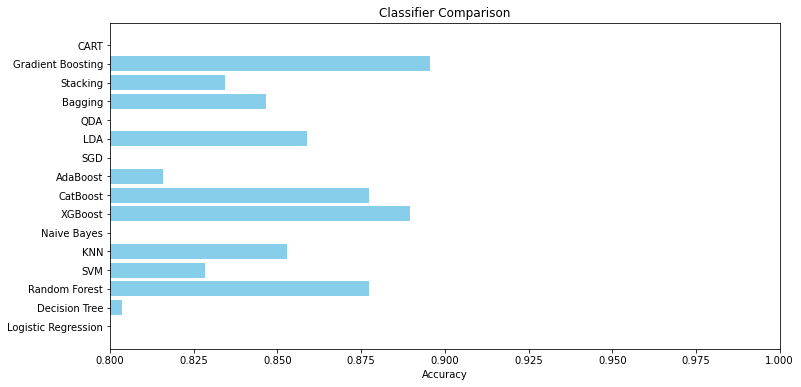

In [139]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_miroslr, accuracy_mirosdt, accuracy_mirosrf, accuracy_mirossvm, accuracy_mirosknn, accuracy_mirosnb, accuracy_mirosxgb, accuracy_miroscb, accuracy_mirosab, accuracy_mirossgd, accuracy_miroslda, accuracy_mirosqda, accuracy_mirosb, accuracy_mirosst, accuracy_mirosgb, accuracy_miroscart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


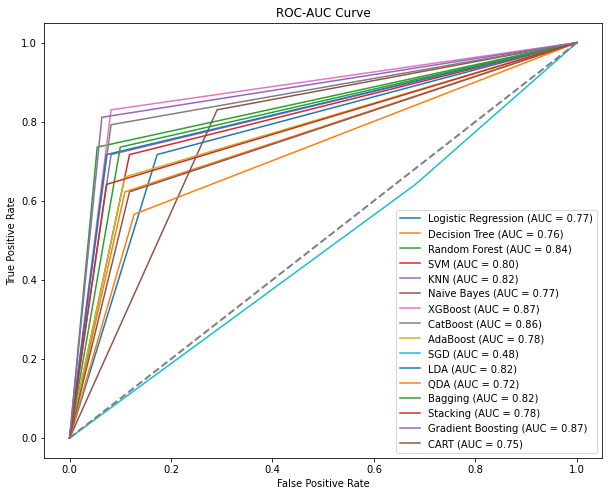

In [140]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_miroslr),
    ('Decision Tree', y_pred_mirosdt),
    ('Random Forest', y_pred_mirosrf),
    ('SVM', y_pred_mirossvm),
    ('KNN', y_pred_mirosknn),
    ('Naive Bayes', y_pred_mirosnb),
    ('XGBoost', y_pred_mirosxgb),
    ('CatBoost', y_pred_miroscb),
    ('AdaBoost', y_pred_mirosab),
    ('SGD', y_pred_mirossgd),
    ('LDA', y_pred_miroslda),
    ('QDA', y_pred_mirosqda),
    ('Bagging', y_pred_mirosb),
    ('Stacking', y_pred_mirosst),
    ('Gradient Boosting', y_pred_mirosgb),
    ('CART', y_pred_miroscart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [141]:
#Borderline SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter


# Check the class distribution before Borderline-SMOTE
print("Class distribution before Borderline-SMOTE:", Counter(y_train))

# Create a BorderlineSMOTE object
borderline_smotemi = BorderlineSMOTE(random_state=42, kind="borderline-1")  # You can choose "borderline-1" or "borderline-2" as the kind

# Fit and apply Borderline-SMOTE to the training data
X_train_resampledmibs, y_train_resampledmibs = borderline_smotemi.fit_resample(X_train, y_train)

# Check the class distribution after Borderline-SMOTE
print("Class distribution after Borderline-SMOTE:", Counter(y_train_resampledmibs))


Class distribution before Borderline-SMOTE: Counter({0: 254, 1: 124})
Class distribution after Borderline-SMOTE: Counter({1: 254, 0: 254})


In [142]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modelmibslr = LogisticRegression()

# Train the model on the training data
modelmibslr.fit(X_train_resampledmibs, y_train_resampledmibs)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmibslr = X_test[X_train_resampledmibs.columns]

# Make predictions on the test data
y_pred_mibslr = modelmibslr.predict(X_test_reorderedmibslr)

# Evaluate the model
accuracy_mibslr = accuracy_score(y_test, y_pred_mibslr)
confusion_mibslr = confusion_matrix(y_test, y_pred_mibslr)
classification_rep_mibslr = classification_report(y_test, y_pred_mibslr)

# Print the evaluation metrics
print("Accuracy:", accuracy_mibslr)
print("Confusion Matrix:\n", confusion_mibslr)
print("Classification Report:\n", classification_rep_mibslr)


Accuracy: 0.8159509202453987
Confusion Matrix:
 [[91 19]
 [11 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       110
           1       0.69      0.79      0.74        53

    accuracy                           0.82       163
   macro avg       0.79      0.81      0.80       163
weighted avg       0.83      0.82      0.82       163



In [143]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treemibsdt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treemibsdt.fit(X_train_resampledmibs, y_train_resampledmibs)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmibsdt = X_test[X_train_resampledmibs.columns]

# Make predictions on the test data
y_pred_mibsdt = decision_treemibsdt.predict(X_test_reorderedmibsdt)

# Evaluate the classifier's performance
accuracy_mibsdt = accuracy_score(y_test, y_pred_mibsdt)
print("Accuracy:", accuracy_mibsdt)

# Print classification report for more detailed evaluation
report_mibsdt = classification_report(y_test, y_pred_mibsdt)
print("Classification Report:\n", report_mibsdt)


Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       110
           1       0.70      0.83      0.76        53

    accuracy                           0.83       163
   macro avg       0.80      0.83      0.81       163
weighted avg       0.84      0.83      0.83       163



In [144]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestmibsrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestmibsrf.fit(X_train_resampledmibs, y_train_resampledmibs)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmibsrf = X_test[X_train_resampledmibs.columns]

# Make predictions on the test data
y_pred_mibsrf = random_forestmibsrf.predict(X_test_reorderedmibsrf)

# Evaluate the classifier's performance
accuracy_mibsrf = accuracy_score(y_test, y_pred_mibsrf)
print("Accuracy:", accuracy_mibsrf)

# Print classification report for more detailed evaluation
report_mibsrf = classification_report(y_test, y_pred_mibsrf)
print("Classification Report:\n", report_mibsrf)


Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       110
           1       0.79      0.77      0.78        53

    accuracy                           0.86       163
   macro avg       0.84      0.84      0.84       163
weighted avg       0.86      0.86      0.86       163



In [145]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifiermibssvm = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifiermibssvm.fit(X_train_resampledmibs, y_train_resampledmibs)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmibssvm = X_test[X_train_resampledmibs.columns]

# Make predictions on the test data
y_pred_mibssvm = svm_classifiermibssvm.predict(X_test_reorderedmibssvm)

# Evaluate the classifier's performance
accuracy_mibssvm = accuracy_score(y_test, y_pred_mibssvm)
print("Accuracy:", accuracy_mibssvm)

# Print classification report for more detailed evaluation
report_mibssvm = classification_report(y_test, y_pred_mibssvm)
print("Classification Report:\n", report_mibssvm)


Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       110
           1       0.76      0.72      0.74        53

    accuracy                           0.83       163
   macro avg       0.81      0.80      0.81       163
weighted avg       0.83      0.83      0.83       163



In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScaler object
scalermibsknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_mibsknn = scalermibsknn.fit_transform(X_train_resampledmibs)
X_test_scaled_mibsknn = scalermibsknn.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifiermibsknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifiermibsknn.fit(X_train_scaled_mibsknn, y_train_resampledmibs)
y_pred_mibsknn = knn_classifiermibsknn.predict(X_test_scaled_mibsknn)
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifiermibsknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifiermibsknn.fit(X_train_scaled_mibsknn, y_train_resampledmibs)

# Make predictions on the test data
y_pred_mibsknn = knn_classifiermibsknn.predict(X_test_scaled_mibsknn)

# Evaluate the classifier's performance
accuracy_mibsknn = accuracy_score(y_test, y_pred_mibsknn)
print("Accuracy:", accuracy_mibsknn)

# Print classification report for more detailed evaluation
report_mibsknn = classification_report(y_test, y_pred_mibsknn)
print("Classification Report:\n", report_mibsknn)


Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       110
           1       0.70      0.81      0.75        53

    accuracy                           0.83       163
   macro avg       0.80      0.82      0.81       163
weighted avg       0.84      0.83      0.83       163



In [147]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifiermibsnb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifiermibsnb.fit(X_train_resampledmibs, y_train_resampledmibs)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmibsnb = X_test[X_train_resampledmibs.columns]

# Make predictions on the test data
y_pred_mibsnb = naive_bayes_classifiermibsnb.predict(X_test_reorderedmibsnb)

# Evaluate the classifier's performance
accuracy_mibsnb = accuracy_score(y_test, y_pred_mibsnb)
print("Accuracy:", accuracy_mibsnb)

# Print classification report for more detailed evaluation
report_mibsnb = classification_report(y_test, y_pred_mibsnb)
print("Classification Report:\n", report_mibsnb)


Accuracy: 0.7423312883435583
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79       110
           1       0.57      0.83      0.68        53

    accuracy                           0.74       163
   macro avg       0.73      0.77      0.73       163
weighted avg       0.79      0.74      0.75       163



In [148]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifiermibsxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifiermibsxgb.fit(X_train_resampledmibs, y_train_resampledmibs)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmibsxgb = X_test[X_train_resampledmibs.columns]

# Make predictions on the test data
y_pred_mibsxgb = xgb_classifiermibsxgb.predict(X_test_reorderedmibsxgb)

# Evaluate the classifier's performance
accuracy_mibsxgb = accuracy_score(y_test, y_pred_mibsxgb)
print("Accuracy:", accuracy_mibsxgb)

# Print classification report for more detailed evaluation
report_mibsxgb = classification_report(y_test, y_pred_mibsxgb)
print("Classification Report:\n", report_mibsxgb)


Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       110
           1       0.81      0.81      0.81        53

    accuracy                           0.88       163
   macro avg       0.86      0.86      0.86       163
weighted avg       0.88      0.88      0.88       163



In [149]:

#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifiermibscb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifiermibscb.fit(X_train_resampledmibs, y_train_resampledmibs)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmibscb = X_test[X_train_resampledmibs.columns]

# Make predictions on the test data
y_pred_mibscb = catboost_classifiermibscb.predict(X_test_reorderedmibscb)

# Evaluate the classifier's performance
accuracy_mibscb = accuracy_score(y_test, y_pred_mibscb)
print("Accuracy:", accuracy_mibscb)

# Print classification report for more detailed evaluation
report_mibscb = classification_report(y_test, y_pred_mibscb)
print("Classification Report:\n", report_mibscb)

Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       110
           1       0.77      0.77      0.77        53

    accuracy                           0.85       163
   macro avg       0.83      0.83      0.83       163
weighted avg       0.85      0.85      0.85       163



In [150]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifiermibsab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifiermibsab = AdaBoostClassifier(base_classifiermibsab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifiermibsab.fit(X_train_resampledmibs, y_train_resampledmibs)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmibsab = X_test[X_train_resampledmibs.columns]

# Make predictions on the test data
y_pred_mibsab = adaboost_classifiermibsab.predict(X_test_reorderedmibsab)

# Evaluate the classifier's performance
accuracy_mibsab = accuracy_score(y_test, y_pred_mibsab)
print("Accuracy:", accuracy_miaab)

# Print classification report for more detailed evaluation
report_mibsab = classification_report(y_test, y_pred_mibsab)
print("Classification Report:\n", report_mibsab)


Accuracy: 0.8159509202453987
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       110
           1       0.76      0.70      0.73        53

    accuracy                           0.83       163
   macro avg       0.81      0.79      0.80       163
weighted avg       0.83      0.83      0.83       163



In [151]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifiermibssgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifiermibssgd.fit(X_train_resampledmibs, y_train_resampledmibs)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmibssgd = X_test[X_train_resampledmibs.columns]

# Make predictions on the test data
y_pred_mibssgd = sgd_classifiermibssgd.predict(X_test_reorderedmibssgd)

# Evaluate the classifier's performance
accuracy_mibssgd = accuracy_score(y_test, y_pred_mibssgd)
print("Accuracy:", accuracy_mibssgd)

# Print classification report for more detailed evaluation
report_mibssgd = classification_report(y_test, y_pred_mibssgd)
print("Classification Report:\n", report_mibssgd)


Accuracy: 0.5521472392638037
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.44      0.57       110
           1       0.40      0.79      0.54        53

    accuracy                           0.55       163
   macro avg       0.61      0.61      0.55       163
weighted avg       0.68      0.55      0.56       163



In [152]:

#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifiermibslda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifiermibslda.fit(X_train_resampledmibs, y_train_resampledmibs)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmibslda = X_test[X_train_resampledmibs.columns]

# Make predictions on the test data
y_pred_mibslda = lda_classifiermibslda.predict(X_test_reorderedmibslda)

# Evaluate the classifier's performance
accuracy_mibslda = accuracy_score(y_test, y_pred_mibslda)
print("Accuracy:", accuracy_mibslda)

# Print classification report for more detailed evaluation
report_mibslda = classification_report(y_test, y_pred_mibslda)
print("Classification Report:\n", report_mibslda)


Accuracy: 0.8404907975460123
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       110
           1       0.75      0.77      0.76        53

    accuracy                           0.84       163
   macro avg       0.82      0.82      0.82       163
weighted avg       0.84      0.84      0.84       163



In [153]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifiermibsqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifiermibsqda.fit(X_train_resampledmibs, y_train_resampledmibs)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmibsqda = X_test[X_train_resampledmibs.columns]

# Make predictions on the test data
y_pred_mibsqda = qda_classifiermibsqda.predict(X_test_reorderedmibsqda)

# Evaluate the classifier's performance
accuracy_mibsqda = accuracy_score(y_test, y_pred_mibsqda)
print("Accuracy:", accuracy_mibsqda)

# Print classification report for more detailed evaluation
report_mibsqda = classification_report(y_test, y_pred_mibsqda)
print("Classification Report:\n", report_mibsqda)


Accuracy: 0.7730061349693251
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.68      0.57      0.62        53

    accuracy                           0.77       163
   macro avg       0.74      0.72      0.73       163
weighted avg       0.77      0.77      0.77       163



In [154]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifiermibsb = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifiermibsb = BaggingClassifier(base_classifiermibsb, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifiermibsb.fit(X_train_resampledmibs, y_train_resampledmibs)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmibsb = X_test[X_train_resampledmibs.columns]

# Make predictions on the test data
y_pred_mibsb = bagging_classifiermiab.predict(X_test_reorderedmiab)

# Evaluate the classifier's performance
accuracy_mibsb = accuracy_score(y_test, y_pred_mibsb)
print("Accuracy:", accuracy_mibsb)

# Print classification report for more detailed evaluation
report_mibsb = classification_report(y_test, y_pred_mibsb)
print("Classification Report:\n", report_mibsb)


Accuracy: 0.8650306748466258
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       110
           1       0.82      0.75      0.78        53

    accuracy                           0.87       163
   macro avg       0.85      0.84      0.84       163
weighted avg       0.86      0.87      0.86       163



In [155]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifiersmibsst = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifiermibsst = StackingClassifier(
    estimators=base_classifiersmibsst,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifiermibsst.fit(X_train_resampledmibs, y_train_resampledmibs)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmibsst = X_test[X_train_resampledmibs.columns]

# Make predictions on the test data
y_pred_mibsst = stacking_classifiermibsst.predict(X_test_reorderedmibsst)

# Evaluate the classifier's performance
accuracy_mibsst = accuracy_score(y_test, y_pred_mibsst)
print("Accuracy:", accuracy_mibsst)

# Print classification report for more detailed evaluation
report_mibsst = classification_report(y_test, y_pred_mibsst)
print("Classification Report:\n", report_mibsst)


Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       110
           1       0.77      0.81      0.79        53

    accuracy                           0.86       163
   macro avg       0.84      0.85      0.84       163
weighted avg       0.86      0.86      0.86       163



In [156]:

#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifiermibsgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifiermibsgb.fit(X_train_resampledmibs, y_train_resampledmibs)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmibsgb = X_test[X_train_resampledmibs.columns]

# Make predictions on the test data
y_pred_mibsgb = gb_classifiermibsgb.predict(X_test_reorderedmibsgb)

# Evaluate the classifier's performance
accuracy_mibsgb = accuracy_score(y_test, y_pred_mibsgb)
print("Accuracy (Gradient Boosting):", accuracy_mibsgb)

# Print classification report for more detailed evaluation
report_mibsgb = classification_report(y_test, y_pred_mibsgb)
print("Classification Report (Gradient Boosting):\n", report_mibsgb)

Accuracy (Gradient Boosting): 0.8773006134969326
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       110
           1       0.81      0.81      0.81        53

    accuracy                           0.88       163
   macro avg       0.86      0.86      0.86       163
weighted avg       0.88      0.88      0.88       163



In [157]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifiermibscart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifiermibscart.fit(X_train_resampledmibs, y_train_resampledmibs)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedmibscart = X_test[X_train_resampledmibs.columns]

# Make predictions on the test data
y_pred_mibscart = cart_classifiermibscart.predict(X_test_reorderedmibscart)

# Evaluate the classifier's performance
accuracy_mibscart = accuracy_score(y_test, y_pred_mibscart)
print("Accuracy:", accuracy_mibscart)

# Print classification report for more detailed evaluation
report_mibscart = classification_report(y_test, y_pred_mibscart)
print("Classification Report:\n", report_mibscart)


Accuracy: 0.8098159509202454
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       110
           1       0.68      0.79      0.73        53

    accuracy                           0.81       163
   macro avg       0.78      0.81      0.79       163
weighted avg       0.82      0.81      0.81       163



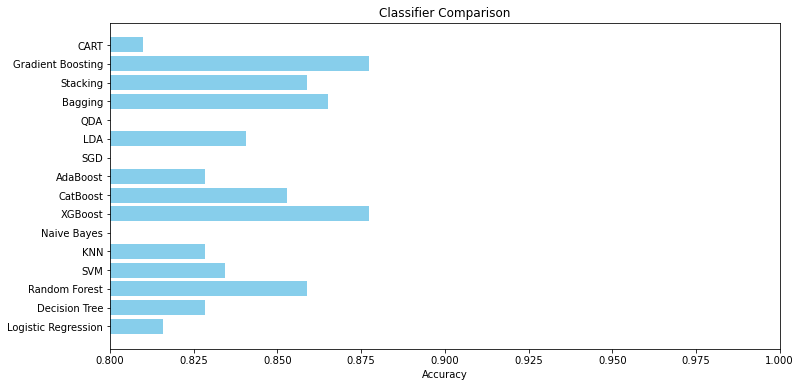

In [158]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_mibslr, accuracy_mibsdt, accuracy_mibsrf, accuracy_mibssvm, accuracy_mibsknn, accuracy_mibsnb, accuracy_mibsxgb, accuracy_mibscb, accuracy_mibsab, accuracy_mibssgd, accuracy_mibslda, accuracy_mibsqda, accuracy_mibsb, accuracy_mibsst, accuracy_mibsgb, accuracy_mibscart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


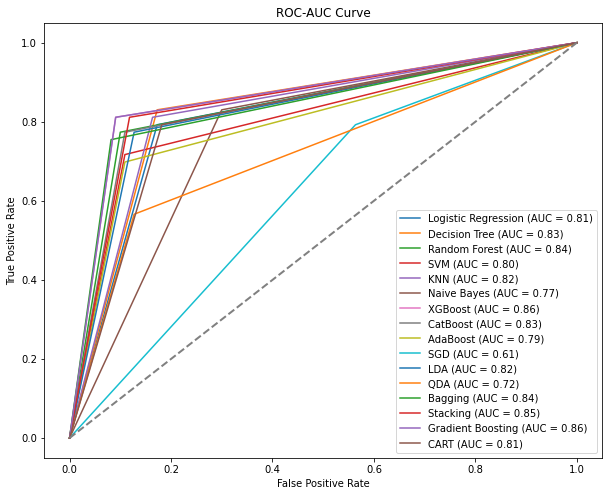

In [159]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_mibslr),
    ('Decision Tree', y_pred_mibsdt),
    ('Random Forest', y_pred_mibsrf),
    ('SVM', y_pred_mibssvm),
    ('KNN', y_pred_mibsknn),
    ('Naive Bayes', y_pred_mibsnb),
    ('XGBoost', y_pred_mibsxgb),
    ('CatBoost', y_pred_mibscb),
    ('AdaBoost', y_pred_mibsab),
    ('SGD', y_pred_mibssgd),
    ('LDA', y_pred_mibslda),
    ('QDA', y_pred_mibsqda),
    ('Bagging', y_pred_mibsb),
    ('Stacking', y_pred_mibsst),
    ('Gradient Boosting', y_pred_mibsgb),
    ('CART', y_pred_mibscart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [160]:
#RUSBoost
from imblearn.ensemble import RUSBoostClassifier
from collections import Counter

# Check the class distribution before RUSBoost
print("Class distribution before RUSBoost:", Counter(y_train))

# Create an RUSBoostClassifier object
mirusboost = RUSBoostClassifier(n_estimators=50, random_state=42)

# Fit the RUSBoostClassifier on the training data
mirusboost.fit(X_train, y_train)

# Make predictions on the test data
y_pred_mirub = mirusboost.predict(X_test)

# Check the class distribution after RUSBoost (it might differ slightly)
print("Class distribution after RUSBoost:", Counter(y_pred_mirub))


Class distribution before RUSBoost: Counter({0: 254, 1: 124})
Class distribution after RUSBoost: Counter({0: 114, 1: 49})


In [161]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modelmirublr = LogisticRegression()

# Train the model on the training data
modelmirublr.fit(X_train, y_train)

# Make predictions on the test data
y_pred_mirublr = modelmirublr.predict(X_test)

# Evaluate the model
accuracy_mirublr = accuracy_score(y_test, y_pred_mirublr)
confusion_mirublr = confusion_matrix(y_test, y_pred_mirublr)
classification_rep_mirublr = classification_report(y_test, y_pred_mirublr)

# Print the evaluation metrics
print("Accuracy:", accuracy_mirublr)
print("Confusion Matrix:\n", confusion_mirublr)
print("Classification Report:\n", classification_rep_mirublr)



Accuracy: 0.7975460122699386
Confusion Matrix:
 [[96 14]
 [19 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.71      0.64      0.67        53

    accuracy                           0.80       163
   macro avg       0.77      0.76      0.76       163
weighted avg       0.79      0.80      0.79       163



In [162]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treemirubdt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treemirubdt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_mirubdt = decision_treemirubdt.predict(X_test)

# Evaluate the classifier's performance
accuracy_mirubdt = accuracy_score(y_test, y_pred_mirubdt)
print("Accuracy:", accuracy_mirubdt)

# Print classification report for more detailed evaluation
report_mirubdt = classification_report(y_test, y_pred_mirubdt)
print("Classification Report:\n", report_mirubdt)


Accuracy: 0.803680981595092
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.71      0.66      0.69        53

    accuracy                           0.80       163
   macro avg       0.78      0.77      0.77       163
weighted avg       0.80      0.80      0.80       163



In [163]:

#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestmirubrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestmirubrf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_mirubrf = random_forestmirubrf.predict(X_test)

# Evaluate the classifier's performance
accuracy_mirubrf = accuracy_score(y_test, y_pred_mirubrf)
print("Accuracy:", accuracy_mirubrf)

# Print classification report for more detailed evaluation
report_mirubrf = classification_report(y_test, y_pred_mirubrf)
print("Classification Report:\n", report_mirubrf)


Accuracy: 0.8895705521472392
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       110
           1       0.91      0.74      0.81        53

    accuracy                           0.89       163
   macro avg       0.90      0.85      0.87       163
weighted avg       0.89      0.89      0.89       163



In [164]:

#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifiermirubsvm = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifiermirubsvm.fit(X_train, y_train)


# Make predictions on the test data
y_pred_mirubsvm = svm_classifiermirubsvm.predict(X_test)

# Evaluate the classifier's performance
accuracy_mirubsvm = accuracy_score(y_test, y_pred_mirubsvm)
print("Accuracy:", accuracy_mirubsvm)

# Print classification report for more detailed evaluation
report_mirubsvm = classification_report(y_test, y_pred_mirubsvm)
print("Classification Report:\n", report_mirubsvm)


Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       110
           1       0.77      0.70      0.73        53

    accuracy                           0.83       163
   macro avg       0.82      0.80      0.81       163
weighted avg       0.83      0.83      0.83       163



In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScaler object
scalermirubknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_mirubknn = scalermirubknn.fit_transform(X_train)
X_test_scaled_mirubknn = scalermirubknn.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifiermirubknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifiermirubknn.fit(X_train_scaled_mirubknn, y_train)
y_pred_mirubknn = knn_classifiermirubknn.predict(X_test_scaled_mirubknn)
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifiermirubknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifiermirubknn.fit(X_train_scaled_mirubknn, y_train)

# Make predictions on the test data
y_pred_mirubknn = knn_classifiermirubknn.predict(X_test_scaled_mirubknn)

# Evaluate the classifier's performance
accuracy_mirubknn = accuracy_score(y_test, y_pred_mirubknn)
print("Accuracy:", accuracy_mirubknn)

# Print classification report for more detailed evaluation
report_mirubknn = classification_report(y_test, y_pred_mirubknn)
print("Classification Report:\n", report_mirubknn)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       110
           1       0.89      0.60      0.72        53

    accuracy                           0.85       163
   macro avg       0.86      0.78      0.81       163
weighted avg       0.85      0.85      0.84       163



In [166]:

#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifiermirubnb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifiermirubnb.fit(X_train, y_train)


# Make predictions on the test data
y_pred_mirubnb = naive_bayes_classifiermirubnb.predict(X_test)

# Evaluate the classifier's performance
accuracy_mirubnb = accuracy_score(y_test, y_pred_mirubnb)
print("Accuracy:", accuracy_mirubnb)

# Print classification report for more detailed evaluation
report_mirubnb = classification_report(y_test, y_pred_mirubnb)
print("Classification Report:\n", report_mirubnb)


Accuracy: 0.7791411042944786
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82       110
           1       0.62      0.83      0.71        53

    accuracy                           0.78       163
   macro avg       0.76      0.79      0.77       163
weighted avg       0.81      0.78      0.79       163



In [167]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifiermirubxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifiermirubxgb.fit(X_train, y_train)



# Make predictions on the test data
y_pred_mirubxgb = xgb_classifiermirubxgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_mirubxgb = accuracy_score(y_test, y_pred_mirubxgb)
print("Accuracy:", accuracy_mirubxgb)

# Print classification report for more detailed evaluation
report_mirubxgb = classification_report(y_test, y_pred_mirubxgb)
print("Classification Report:\n", report_mirubxgb)


Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       110
           1       0.84      0.77      0.80        53

    accuracy                           0.88       163
   macro avg       0.87      0.85      0.86       163
weighted avg       0.88      0.88      0.88       163



In [168]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifiermirubcb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifiermirubcb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_mirubcb = catboost_classifiermirubcb.predict(X_test)

# Evaluate the classifier's performance
accuracy_mirubcb = accuracy_score(y_test, y_pred_mirubcb)
print("Accuracy:", accuracy_mirubcb)

# Print classification report for more detailed evaluation
report_mirubcb = classification_report(y_test, y_pred_mirubcb)
print("Classification Report:\n", report_mirubcb)

Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       110
           1       0.82      0.79      0.81        53

    accuracy                           0.88       163
   macro avg       0.86      0.86      0.86       163
weighted avg       0.88      0.88      0.88       163



In [169]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifiermirubab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifiermirubab = AdaBoostClassifier(base_classifiermirubab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifiermirubab.fit(X_train, y_train)


# Make predictions on the test data
y_pred_mirubab = adaboost_classifiermirubab.predict(X_test)

# Evaluate the classifier's performance
accuracy_mirubab = accuracy_score(y_test, y_pred_mirubab)
print("Accuracy:", accuracy_mirubab)

# Print classification report for more detailed evaluation
report_mirubab = classification_report(y_test, y_pred_mirubab)
print("Classification Report:\n", report_mirubab)


Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       110
           1       0.80      0.62      0.70        53

    accuracy                           0.83       163
   macro avg       0.82      0.77      0.79       163
weighted avg       0.83      0.83      0.82       163



In [170]:

#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifiermirubsgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifiermirubsgd.fit(X_train, y_train)



# Make predictions on the test data
y_pred_mirubsgd = sgd_classifiermirubsgd.predict(X_test)

# Evaluate the classifier's performance
accuracy_mirubsgd = accuracy_score(y_test, y_pred_mirubsgd)
print("Accuracy:", accuracy_mirubsgd)

# Print classification report for more detailed evaluation
report_mirubsgd = classification_report(y_test, y_pred_mirubsgd)
print("Classification Report:\n", report_mirubsgd)


Accuracy: 0.49079754601226994
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.49      0.57       110
           1       0.32      0.49      0.39        53

    accuracy                           0.49       163
   macro avg       0.49      0.49      0.48       163
weighted avg       0.55      0.49      0.51       163



In [171]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifiermirublda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifiermirublda.fit(X_train, y_train)

# Make predictions on the test data
y_pred_mirublda = lda_classifiermirublda.predict(X_test)

# Evaluate the classifier's performance
accuracy_mirublda = accuracy_score(y_test, y_pred_mirublda)
print("Accuracy:", accuracy_mirublda)

# Print classification report for more detailed evaluation
report_mirublda = classification_report(y_test, y_pred_mirublda)
print("Classification Report:\n", report_mirublda)


Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       110
           1       0.84      0.70      0.76        53

    accuracy                           0.86       163
   macro avg       0.85      0.82      0.83       163
weighted avg       0.86      0.86      0.86       163



In [172]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifiermirubqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifiermirubqda.fit(X_train, y_train)

# Make predictions on the test data
y_pred_mirubqda = qda_classifiermirubqda.predict(X_test)

# Evaluate the classifier's performance
accuracy_mirubqda = accuracy_score(y_test, y_pred_mirubqda)
print("Accuracy:", accuracy_mirubqda)

# Print classification report for more detailed evaluation
report_mirubqda = classification_report(y_test, y_pred_mirubqda)
print("Classification Report:\n", report_mirubqda)


Accuracy: 0.7791411042944786
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.69      0.58      0.63        53

    accuracy                           0.78       163
   macro avg       0.75      0.73      0.74       163
weighted avg       0.77      0.78      0.77       163



In [173]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifiermirubb = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifiermirubb = BaggingClassifier(base_classifiermirubb, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifiermirubb.fit(X_train, y_train)


# Make predictions on the test data
y_pred_mirubb = bagging_classifiermirubb.predict(X_test)

# Evaluate the classifier's performance
accuracy_mirubb = accuracy_score(y_test, y_pred_mirubb)
print("Accuracy:", accuracy_mirubb)

# Print classification report for more detailed evaluation
report_mirubb = classification_report(y_test, y_pred_mirubb)
print("Classification Report:\n", report_mirubb)


Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       110
           1       0.84      0.77      0.80        53

    accuracy                           0.88       163
   macro avg       0.87      0.85      0.86       163
weighted avg       0.88      0.88      0.88       163



In [174]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifiersmirubst = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifiermirubst = StackingClassifier(
    estimators=base_classifiersmirubst,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifiermirubst.fit(X_train, y_train)


# Make predictions on the test data
y_pred_mirubst = stacking_classifiermirubst.predict(X_test)

# Evaluate the classifier's performance
accuracy_mirubst = accuracy_score(y_test, y_pred_mirubst)
print("Accuracy:", accuracy_mirubst)

# Print classification report for more detailed evaluation
report_mirubst = classification_report(y_test, y_pred_mirubst)
print("Classification Report:\n", report_mirubst)


Accuracy: 0.8834355828220859
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       110
           1       0.83      0.81      0.82        53

    accuracy                           0.88       163
   macro avg       0.87      0.86      0.87       163
weighted avg       0.88      0.88      0.88       163



In [175]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifiermirubgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifiermirubgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_mirubgb = gb_classifiermirubgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_mirubgb = accuracy_score(y_test, y_pred_mirubgb)
print("Accuracy (Gradient Boosting):", accuracy_mirubgb)

# Print classification report for more detailed evaluation
report_mirubgb = classification_report(y_test, y_pred_mirubgb)
print("Classification Report (Gradient Boosting):\n", report_mirubgb)


Accuracy (Gradient Boosting): 0.8895705521472392
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       110
           1       0.84      0.81      0.83        53

    accuracy                           0.89       163
   macro avg       0.88      0.87      0.87       163
weighted avg       0.89      0.89      0.89       163



In [176]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifiermirubcart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifiermirubcart.fit(X_train, y_train)


# Make predictions on the test data
y_pred_mirubcart = cart_classifiermirubcart.predict(X_test)

# Evaluate the classifier's performance
accuracy_mirubcart = accuracy_score(y_test, y_pred_mirubcart)
print("Accuracy:", accuracy_mirubcart)

# Print classification report for more detailed evaluation
report_mirubcart = classification_report(y_test, y_pred_mirubcart)
print("Classification Report:\n", report_mirubcart)


Accuracy: 0.8220858895705522
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.75      0.68      0.71        53

    accuracy                           0.82       163
   macro avg       0.80      0.79      0.79       163
weighted avg       0.82      0.82      0.82       163



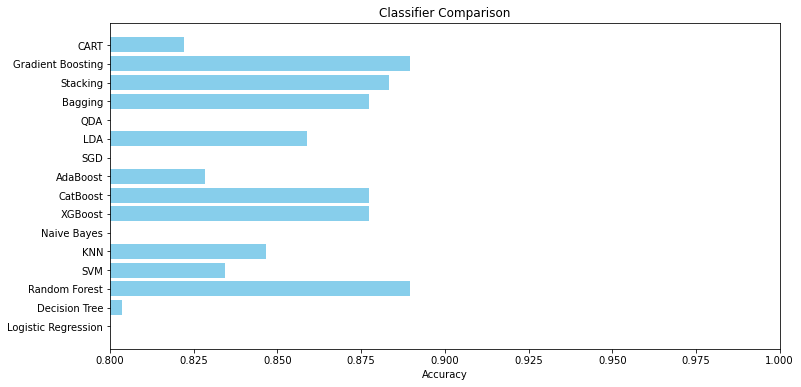

In [177]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_mirublr, accuracy_mirubdt, accuracy_mirubrf, accuracy_mirubsvm, accuracy_mirubknn, accuracy_mirubnb, accuracy_mirubxgb, accuracy_mirubcb, accuracy_mirubab, accuracy_mirubsgd, accuracy_mirublda, accuracy_mirubqda, accuracy_mirubb, accuracy_mirubst, accuracy_mirubgb, accuracy_mirubcart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


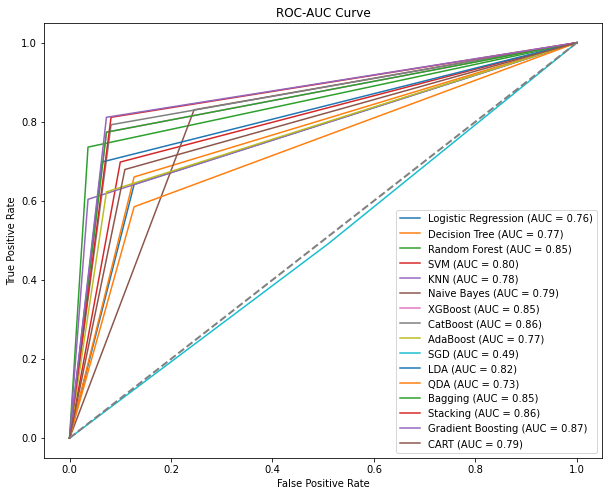

In [178]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_mirublr),
    ('Decision Tree', y_pred_mirubdt),
    ('Random Forest', y_pred_mirubrf),
    ('SVM', y_pred_mirubsvm),
    ('KNN', y_pred_mirubknn),
    ('Naive Bayes', y_pred_mirubnb),
    ('XGBoost', y_pred_mirubxgb),
    ('CatBoost', y_pred_mirubcb),
    ('AdaBoost', y_pred_mirubab),
    ('SGD', y_pred_mirubsgd),
    ('LDA', y_pred_mirublda),
    ('QDA', y_pred_mirubqda),
    ('Bagging', y_pred_mirubb),
    ('Stacking', y_pred_mirubst),
    ('Gradient Boosting', y_pred_mirubgb),
    ('CART', y_pred_mirubcart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


Recursive Feature Elimination(RFE)


In [179]:
#RFE using linear reg
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [180]:
selected_featuresl = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
selected_featuresl


[('Age (yrs)', False, 18),
 ('Weight (Kg)', False, 4),
 ('Height(Cm)', False, 5),
 ('BMI', False, 3),
 ('Blood Group', False, 15),
 ('Pulse rate(bpm)', False, 20),
 ('RR (breaths/min)', False, 13),
 ('Hb(g/dl)', False, 8),
 ('Cycle(R/I)', True, 1),
 ('Cycle length(days)', False, 12),
 ('Marraige Status (Yrs)', False, 11),
 ('Pregnant(Y/N)', False, 2),
 ('No. of aborptions', False, 10),
 ('I   beta-HCG(mIU/mL)', False, 32),
 ('II    beta-HCG(mIU/mL)', False, 31),
 ('FSH(mIU/mL)', False, 27),
 ('LH(mIU/mL)', False, 28),
 ('FSH/LH', False, 26),
 ('Hip(inch)', True, 1),
 ('Waist(inch)', True, 1),
 ('Waist:Hip Ratio', True, 1),
 ('TSH (mIU/L)', False, 23),
 ('AMH(ng/mL)', False, 17),
 ('PRL(ng/mL)', False, 21),
 ('Vit D3 (ng/mL)', False, 29),
 ('PRG(ng/mL)', False, 16),
 ('RBS(mg/dl)', False, 30),
 ('Weight gain(Y/N)', True, 1),
 ('hair growth(Y/N)', True, 1),
 ('Skin darkening (Y/N)', True, 1),
 ('Hair loss(Y/N)', False, 24),
 ('Pimples(Y/N)', True, 1),
 ('Fast food (Y/N)', True, 1),
 ('Re

In [181]:
X_train.columns[rfe.support_]

Index(['Cycle(R/I)', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Follicle No. (R)'],
      dtype='object')

In [182]:
#SMOTE

from imblearn.over_sampling import SMOTE
from collections import Counter

# Check the class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=100)
X_train_resampledlsmo, y_train_resampledlsmo = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampledlsmo))


Class distribution before SMOTE: Counter({0: 254, 1: 124})
Class distribution after SMOTE: Counter({1: 254, 0: 254})


In [183]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modellsmolr = LogisticRegression()

# Train the model on the training data
modellsmolr.fit(X_train_resampledlsmo, y_train_resampledlsmo)

# Make predictions on the test data
y_pred_lsmolr = modellsmolr.predict(X_test)

# Evaluate the model
accuracy_lsmolr = accuracy_score(y_test, y_pred_lsmolr)
confusion_lsmolr = confusion_matrix(y_test, y_pred_lsmolr)
classification_rep_lsmolr = classification_report(y_test, y_pred_lsmolr)

# Print the evaluation metrics
print("Accuracy:", accuracy_lsmolr)
print("Confusion Matrix:\n", confusion_lsmolr)
print("Classification Report:\n", classification_rep_lsmolr)


Accuracy: 0.8098159509202454
Confusion Matrix:
 [[93 17]
 [14 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       110
           1       0.70      0.74      0.72        53

    accuracy                           0.81       163
   macro avg       0.78      0.79      0.79       163
weighted avg       0.81      0.81      0.81       163



In [184]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treelsmodt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treelsmodt.fit(X_train_resampledlsmo, y_train_resampledlsmo)

# Make predictions on the test data
y_pred_lsmodt = decision_treelsmodt.predict(X_test)

# Evaluate the classifier's performance
accuracy_lsmodt = accuracy_score(y_test, y_pred_lsmodt)
print("Accuracy:", accuracy_lsmodt)

# Print classification report for more detailed evaluation
report_lsmodt = classification_report(y_test, y_pred_lsmodt)
print("Classification Report:\n", report_lsmodt)


Accuracy: 0.8098159509202454
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       110
           1       0.70      0.74      0.72        53

    accuracy                           0.81       163
   macro avg       0.78      0.79      0.79       163
weighted avg       0.81      0.81      0.81       163



In [185]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestlsmorf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestlsmorf.fit(X_train_resampledlsmo, y_train_resampledlsmo)

# Make predictions on the test data
y_pred_lsmorf = random_forestlsmorf.predict(X_test)

# Evaluate the classifier's performance
accuracy_lsmorf = accuracy_score(y_test, y_pred_lsmorf)
print("Accuracy:", accuracy_lsmorf)

# Print classification report for more detailed evaluation
report_lsmorf = classification_report(y_test, y_pred_lsmorf)
print("Classification Report:\n", report_lsmorf)


Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       110
           1       0.82      0.79      0.81        53

    accuracy                           0.88       163
   macro avg       0.86      0.86      0.86       163
weighted avg       0.88      0.88      0.88       163



In [186]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifierlsmosvm = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifierlsmosvm.fit(X_train_resampledlsmo, y_train_resampledlsmo)

# Make predictions on the test data
y_pred_lsmosvm = svm_classifierlsmosvm.predict(X_test)

# Evaluate the classifier's performance
accuracy_lsmosvm = accuracy_score(y_test, y_pred_lsmosvm)
print("Accuracy:", accuracy_lsmosvm)

# Print classification report for more detailed evaluation
report_lsmosvm = classification_report(y_test, y_pred_lsmosvm)
print("Classification Report:\n", report_lsmosvm)


Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       110
           1       0.80      0.74      0.76        53

    accuracy                           0.85       163
   macro avg       0.84      0.82      0.83       163
weighted avg       0.85      0.85      0.85       163



In [187]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_lsmoknn = scaler.fit_transform(X_train_resampledlsmo)
X_test_scaled_lsmoknn = scaler.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifierlsmoknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifierlsmoknn.fit(X_train_scaled_lsmoknn, y_train_resampledlsmo)
y_pred_lsmoknn = knn_classifierlsmoknn.predict(X_test_scaled_lsmoknn)


In [188]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifierlsmoknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifierlsmoknn.fit(X_train_scaled_lsmoknn, y_train_resampledlsmo)

# Make predictions on the test data
y_pred_lsmoknn = knn_classifierlsmoknn.predict(X_test_scaled_lsmoknn)

# Evaluate the classifier's performance
accuracy_lsmoknn = accuracy_score(y_test, y_pred_lsmoknn)
print("Accuracy:", accuracy_lsmoknn)

# Print classification report for more detailed evaluation
report_lsmoknn = classification_report(y_test, y_pred_lsmoknn)
print("Classification Report:\n", report_lsmoknn)


Accuracy: 0.8098159509202454
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       110
           1       0.69      0.75      0.72        53

    accuracy                           0.81       163
   macro avg       0.78      0.80      0.79       163
weighted avg       0.82      0.81      0.81       163



In [189]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifierlsmonb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifierlsmonb.fit(X_train_resampledlsmo, y_train_resampledlsmo)

# Make predictions on the test data
y_pred_lsmonb = naive_bayes_classifierlsmonb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lsmonb = accuracy_score(y_test, y_pred_lsmonb)
print("Accuracy:", accuracy_lsmonb)

# Print classification report for more detailed evaluation
report_lsmonb = classification_report(y_test, y_pred_lsmonb)
print("Classification Report:\n", report_lsmonb)


Accuracy: 0.7300613496932515
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77       110
           1       0.56      0.85      0.67        53

    accuracy                           0.73       163
   macro avg       0.73      0.76      0.72       163
weighted avg       0.79      0.73      0.74       163



In [190]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifierlsmoxg = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifierlsmoxg.fit(X_train_resampledlsmo, y_train_resampledlsmo)

# Make predictions on the test data
y_pred_lsmoxgb = xgb_classifierlsmoxg.predict(X_test)

# Evaluate the classifier's performance
accuracy_lsmoxgb = accuracy_score(y_test, y_pred_lsmoxgb)
print("Accuracy:", accuracy_lsmoxgb)

# Print classification report for more detailed evaluation
report_lsmoxgb = classification_report(y_test, y_pred_lsmoxgb)
print("Classification Report:\n", report_lsmoxgb)


Accuracy: 0.8711656441717791
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       110
           1       0.81      0.79      0.80        53

    accuracy                           0.87       163
   macro avg       0.85      0.85      0.85       163
weighted avg       0.87      0.87      0.87       163



In [191]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifierlsmocb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifierlsmocb.fit(X_train_resampledlsmo, y_train_resampledlsmo)

# Make predictions on the test data
y_pred_lsmocb = catboost_classifierlsmocb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lsmocb = accuracy_score(y_test, y_pred_lsmocb)
print("Accuracy:", accuracy_lsmocb)

# Print classification report for more detailed evaluation
report_lsmocb = classification_report(y_test, y_pred_lsmocb)
print("Classification Report:\n", report_lsmocb)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       110
           1       0.76      0.77      0.77        53

    accuracy                           0.85       163
   macro avg       0.82      0.83      0.83       163
weighted avg       0.85      0.85      0.85       163



In [192]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifierlsmoab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifierlsmoab = AdaBoostClassifier(base_classifierlsmoab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifierlsmoab.fit(X_train_resampledlsmo, y_train_resampledlsmo)

# Make predictions on the test data
y_pred_lsmoab = adaboost_classifierlsmoab.predict(X_test)

# Evaluate the classifier's performance
accuracy_lsmoab = accuracy_score(y_test, y_pred_lsmoab)
print("Accuracy:", accuracy_lsmoab)

# Print classification report for more detailed evaluation
report_lsmoab = classification_report(y_test, y_pred_lsmoab)
print("Classification Report:\n", report_lsmoab)


Accuracy: 0.8650306748466258
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       110
           1       0.79      0.79      0.79        53

    accuracy                           0.87       163
   macro avg       0.85      0.85      0.85       163
weighted avg       0.87      0.87      0.87       163



In [193]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifierlsmosgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifierlsmosgd.fit(X_train_resampledlsmo, y_train_resampledlsmo)

# Make predictions on the test data
y_pred_lsmosgd = sgd_classifierlsmosgd.predict(X_test)

# Evaluate the classifier's performance
accuracy_lsmosgd = accuracy_score(y_test, y_pred_lsmosgd)
print("Accuracy:", accuracy_lsmosgd)

# Print classification report for more detailed evaluation
report_lsmosgd = classification_report(y_test, y_pred_lsmosgd)
print("Classification Report:\n", report_lsmosgd)


Accuracy: 0.4785276073619632
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.36      0.48       110
           1       0.35      0.72      0.47        53

    accuracy                           0.48       163
   macro avg       0.54      0.54      0.48       163
weighted avg       0.61      0.48      0.48       163



In [194]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifierlsmolda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifierlsmolda.fit(X_train_resampledlsmo, y_train_resampledlsmo)

# Make predictions on the test data
y_pred_lsmolda = lda_classifierlsmolda.predict(X_test)

# Evaluate the classifier's performance
accuracy_lsmolda = accuracy_score(y_test, y_pred_lsmolda)
print("Accuracy:", accuracy_lsmolda)

# Print classification report for more detailed evaluation
report_lsmolda = classification_report(y_test, y_pred_lsmolda)
print("Classification Report:\n", report_lsmolda)


Accuracy: 0.8220858895705522
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       110
           1       0.71      0.77      0.74        53

    accuracy                           0.82       163
   macro avg       0.80      0.81      0.80       163
weighted avg       0.83      0.82      0.82       163



In [195]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifierlsmoqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifierlsmoqda.fit(X_train_resampledlsmo, y_train_resampledlsmo)

# Make predictions on the test data
y_pred_lsmoqda = qda_classifierlsmoqda.predict(X_test)

# Evaluate the classifier's performance
accuracy_lsmoqda = accuracy_score(y_test, y_pred_lsmoqda)
print("Accuracy:", accuracy_lsmoqda)

# Print classification report for more detailed evaluation
report_lsmoqda = classification_report(y_test, y_pred_lsmoqda)
print("Classification Report:\n", report_lsmoqda)


Accuracy: 0.7730061349693251
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.67      0.60      0.63        53

    accuracy                           0.77       163
   macro avg       0.74      0.73      0.73       163
weighted avg       0.77      0.77      0.77       163



In [196]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifierlsmob = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifierlsmob = BaggingClassifier(base_classifierlsmob, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifierlsmob.fit(X_train_resampledlsmo, y_train_resampledlsmo)

# Make predictions on the test data
y_pred_lsmob = bagging_classifierlsmob.predict(X_test)

# Evaluate the classifier's performance
accuracy_lsmob = accuracy_score(y_test, y_pred_lsmob)
print("Accuracy:", accuracy_lsmob)

# Print classification report for more detailed evaluation
report_lsmob = classification_report(y_test, y_pred_lsmob)
print("Classification Report:\n", report_lsmob)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       110
           1       0.77      0.75      0.76        53

    accuracy                           0.85       163
   macro avg       0.83      0.82      0.82       163
weighted avg       0.85      0.85      0.85       163



In [197]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifierslsmost = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifierlsmost = StackingClassifier(
    estimators=base_classifierslsmost,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifierlsmost.fit(X_train_resampledlsmo, y_train_resampledlsmo)

# Make predictions on the test data
y_pred_lsmost = stacking_classifierlsmost.predict(X_test)

# Evaluate the classifier's performance
accuracy_lsmost = accuracy_score(y_test, y_pred_lsmost)
print("Accuracy:", accuracy_lsmost)

# Print classification report for more detailed evaluation
report_lsmost = classification_report(y_test, y_pred_lsmost)
print("Classification Report:\n", report_lsmost)


Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       110
           1       0.77      0.70      0.73        53

    accuracy                           0.83       163
   macro avg       0.82      0.80      0.81       163
weighted avg       0.83      0.83      0.83       163



In [198]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifierlsmogb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifierlsmogb.fit(X_train_resampledlsmo, y_train_resampledlsmo)

# Make predictions on the test data
y_pred_lsmogb = gb_classifierlsmogb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lsmogb = accuracy_score(y_test, y_pred_lsmogb)
print("Accuracy (Gradient Boosting):", accuracy_lsmogb)

# Print classification report for more detailed evaluation
report_lsmogb = classification_report(y_test, y_pred_lsmogb)
print("Classification Report (Gradient Boosting):\n", report_lsmogb)


Accuracy (Gradient Boosting): 0.8650306748466258
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       110
           1       0.77      0.83      0.80        53

    accuracy                           0.87       163
   macro avg       0.84      0.86      0.85       163
weighted avg       0.87      0.87      0.87       163



In [199]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifierlsmocart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifierlsmocart.fit(X_train_resampledlsmo, y_train_resampledlsmo)

# Make predictions on the test data
y_pred_lsmocart = cart_classifierlsmocart.predict(X_test)

# Evaluate the classifier's performance
accuracy_lsmocart = accuracy_score(y_test, y_pred_lsmocart)
print("Accuracy:", accuracy_lsmocart)

# Print classification report for more detailed evaluation
report_lsmocart = classification_report(y_test, y_pred_lsmocart)
print("Classification Report:\n", report_lsmocart)


Accuracy: 0.803680981595092
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.71      0.66      0.69        53

    accuracy                           0.80       163
   macro avg       0.78      0.77      0.77       163
weighted avg       0.80      0.80      0.80       163



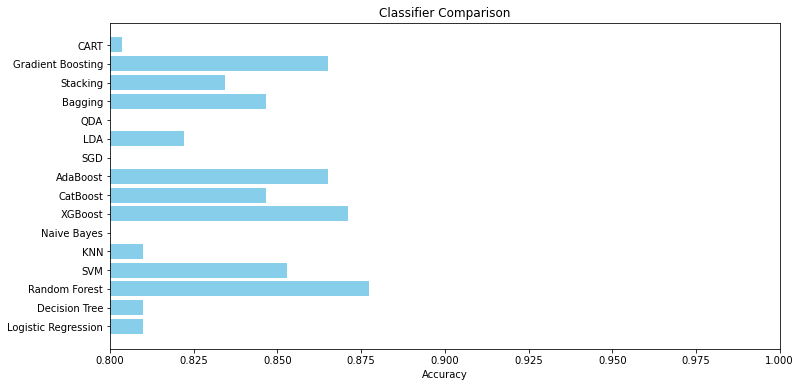

In [200]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_lsmolr, accuracy_lsmodt, accuracy_lsmorf, accuracy_lsmosvm, accuracy_lsmoknn, accuracy_lsmonb, accuracy_lsmoxgb, accuracy_lsmocb, accuracy_lsmoab, accuracy_lsmosgd, accuracy_lsmolda, accuracy_lsmoqda, accuracy_lsmob, accuracy_lsmost, accuracy_lsmogb, accuracy_lsmocart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


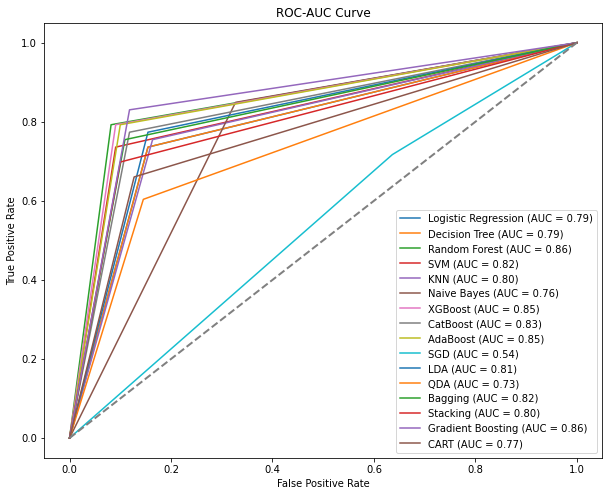

In [201]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_lsmolr),
    ('Decision Tree', y_pred_lsmodt),
    ('Random Forest', y_pred_lsmorf),
    ('SVM', y_pred_lsmosvm),
    ('KNN', y_pred_lsmoknn),
    ('Naive Bayes', y_pred_lsmonb),
    ('XGBoost', y_pred_lsmoxgb),
    ('CatBoost', y_pred_lsmocb),
    ('AdaBoost', y_pred_lsmoab),
    ('SGD', y_pred_lsmosgd),
    ('LDA', y_pred_lsmolda),
    ('QDA', y_pred_lsmoqda),
    ('Bagging', y_pred_lsmob),
    ('Stacking', y_pred_lsmost),
    ('Gradient Boosting', y_pred_lsmogb),
    ('CART', y_pred_lsmocart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [202]:
#ADASYN
from imblearn.over_sampling import ADASYN
from collections import Counter

# Assuming you have already defined X_train and y_train from your code

# Check the class distribution before ADASYN
print("Class distribution before ADASYN:", Counter(y_train))

# Apply ADASYN to balance the classes
adasyn = ADASYN(random_state=42)
X_train_resampledla, y_train_resampledla = adasyn.fit_resample(X_train, y_train)

# Check the class distribution after ADASYN
print("Class distribution after ADASYN:", Counter(y_train_resampledla))



Class distribution before ADASYN: Counter({0: 254, 1: 124})
Class distribution after ADASYN: Counter({0: 254, 1: 252})


In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modellalr = LogisticRegression()

# Train the model on the training data
modellalr.fit(X_train_resampledla, y_train_resampledla)

# Make predictions on the test data
y_pred_lalr = modellalr.predict(X_test)

# Evaluate the model
accuracy_lalr = accuracy_score(y_test, y_pred_lalr)
confusion_lalr = confusion_matrix(y_test, y_pred_lalr)
classification_rep_lalr = classification_report(y_test, y_pred_lalr)

# Print the evaluation metrics
print("Accuracy:", accuracy_lalr)
print("Confusion Matrix:\n", confusion_lalr)
print("Classification Report:\n", classification_rep_lalr)


Accuracy: 0.8098159509202454
Confusion Matrix:
 [[90 20]
 [11 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       110
           1       0.68      0.79      0.73        53

    accuracy                           0.81       163
   macro avg       0.78      0.81      0.79       163
weighted avg       0.82      0.81      0.81       163



In [204]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treeladt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treeladt.fit(X_train_resampledla, y_train_resampledla)

# Make predictions on the test data
y_pred_ladt = decision_treeladt.predict(X_test)

# Evaluate the classifier's performance
accuracy_ladt = accuracy_score(y_test, y_pred_ladt)
print("Accuracy:", accuracy_ladt)

# Print classification report for more detailed evaluation
report_ladt = classification_report(y_test, y_pred_ladt)
print("Classification Report:\n", report_ladt)


Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       110
           1       0.72      0.77      0.75        53

    accuracy                           0.83       163
   macro avg       0.80      0.81      0.81       163
weighted avg       0.83      0.83      0.83       163



In [205]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestlarf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestlarf.fit(X_train_resampledla, y_train_resampledla)

# Make predictions on the test data
y_pred_larf = random_forestlarf.predict(X_test)

# Evaluate the classifier's performance
accuracy_larf = accuracy_score(y_test, y_pred_larf)
print("Accuracy:", accuracy_larf)

# Print classification report for more detailed evaluation
report_larf = classification_report(y_test, y_pred_larf)
print("Classification Report:\n", report_larf)


Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       110
           1       0.79      0.77      0.78        53

    accuracy                           0.86       163
   macro avg       0.84      0.84      0.84       163
weighted avg       0.86      0.86      0.86       163



In [206]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifierlasvc = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifierlasvc.fit(X_train_resampledla, y_train_resampledla)

# Make predictions on the test data
y_pred_lasvc = svm_classifierlasvc.predict(X_test)

# Evaluate the classifier's performance
accuracy_lasvc = accuracy_score(y_test, y_pred_lasvc)
print("Accuracy:", accuracy_lasvc)

# Print classification report for more detailed evaluation
report_lasvc = classification_report(y_test, y_pred_lasvc)
print("Classification Report:\n", report_lasvc)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       110
           1       0.77      0.75      0.76        53

    accuracy                           0.85       163
   macro avg       0.83      0.82      0.82       163
weighted avg       0.85      0.85      0.85       163



In [207]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scalerlaknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaledlaknn = scalerlaknn.fit_transform(X_train_resampledla)
X_test_scaledlaknn = scalerlaknn.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifierlaknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifierlaknn.fit(X_train_scaledlaknn, y_train_resampledla)
y_pred_laknn = knn_classifierlaknn.predict(X_test_scaledlaknn)

#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifierlaknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifierlaknn.fit(X_train_scaledlaknn, y_train_resampledla)

# Make predictions on the test data
y_pred_laknn = knn_classifierlaknn.predict(X_test_scaledlaknn)

# Evaluate the classifier's performance
accuracy_laknn = accuracy_score(y_test, y_pred_laknn)
print("Accuracy:", accuracy_laknn)

# Print classification report for more detailed evaluation
report_laknn = classification_report(y_test, y_pred_laknn)
print("Classification Report:\n", report_laknn)


Accuracy: 0.8159509202453987
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       110
           1       0.68      0.81      0.74        53

    accuracy                           0.82       163
   macro avg       0.79      0.81      0.80       163
weighted avg       0.83      0.82      0.82       163



In [208]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifierlanb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifierlanb.fit(X_train_resampledla, y_train_resampledla)

# Make predictions on the test data
y_pred_lanb = naive_bayes_classifierlanb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lanb = accuracy_score(y_test, y_pred_lanb)
print("Accuracy:", accuracy_lanb)

# Print classification report for more detailed evaluation
report_lanb = classification_report(y_test, y_pred_lanb)
print("Classification Report:\n", report_lanb)


Accuracy: 0.7177914110429447
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.66      0.76       110
           1       0.54      0.83      0.66        53

    accuracy                           0.72       163
   macro avg       0.72      0.75      0.71       163
weighted avg       0.78      0.72      0.73       163



In [209]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifierlaxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifierlaxgb.fit(X_train_resampledla, y_train_resampledla)

# Make predictions on the test data
y_pred_laxgb = xgb_classifierlaxgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_laxgb = accuracy_score(y_test, y_pred_laxgb)
print("Accuracy:", accuracy_laxgb)

# Print classification report for more detailed evaluation
report_laxgb = classification_report(y_test, y_pred_laxgb)
print("Classification Report:\n", report_laxgb)


Accuracy: 0.8957055214723927
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       110
           1       0.85      0.83      0.84        53

    accuracy                           0.90       163
   macro avg       0.88      0.88      0.88       163
weighted avg       0.90      0.90      0.90       163



In [210]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifierlacb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifierlacb.fit(X_train_resampledla, y_train_resampledla)

# Make predictions on the test data
y_pred_lacb = catboost_classifierlacb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lacb = accuracy_score(y_test, y_pred_lacb)
print("Accuracy:", accuracy_lacb)

# Print classification report for more detailed evaluation
report_lacb = classification_report(y_test, y_pred_lacb)
print("Classification Report:\n", report_lacb)


Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       110
           1       0.76      0.79      0.78        53

    accuracy                           0.85       163
   macro avg       0.83      0.84      0.83       163
weighted avg       0.85      0.85      0.85       163



In [211]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifierlaab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifierlaab = AdaBoostClassifier(base_classifierlaab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifierlaab.fit(X_train_resampledla, y_train_resampledla)

# Make predictions on the test data
y_pred_laab = adaboost_classifierlaab.predict(X_test)

# Evaluate the classifier's performance
accuracy_laab = accuracy_score(y_test, y_pred_laab)
print("Accuracy:", accuracy_laab)

# Print classification report for more detailed evaluation
report_laab = classification_report(y_test, y_pred_laab)
print("Classification Report:\n", report_laab)


Accuracy: 0.8098159509202454
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.73      0.66      0.69        53

    accuracy                           0.81       163
   macro avg       0.79      0.77      0.78       163
weighted avg       0.81      0.81      0.81       163



In [212]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifierlasgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifierlasgd.fit(X_train_resampledla, y_train_resampledla)

# Make predictions on the test data
y_pred_lasgd = sgd_classifierlasgd.predict(X_test)

# Evaluate the classifier's performance
accuracy_lasgd = accuracy_score(y_test, y_pred_lasgd)
print("Accuracy:", accuracy_lasgd)

# Print classification report for more detailed evaluation
report_lasgd = classification_report(y_test, y_pred_lasgd)
print("Classification Report:\n", report_lasgd)


Accuracy: 0.5337423312883436
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.57      0.62       110
           1       0.34      0.45      0.39        53

    accuracy                           0.53       163
   macro avg       0.51      0.51      0.51       163
weighted avg       0.57      0.53      0.55       163



In [213]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifierlalda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifierlalda.fit(X_train_resampledla, y_train_resampledla)

# Make predictions on the test data
y_pred_lalda = lda_classifierlalda.predict(X_test)

# Evaluate the classifier's performance
accuracy_lalda = accuracy_score(y_test, y_pred_lalda)
print("Accuracy:", accuracy_lalda)

# Print classification report for more detailed evaluation
report_lalda = classification_report(y_test, y_pred_lalda)
print("Classification Report:\n", report_lalda)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       110
           1       0.75      0.79      0.77        53

    accuracy                           0.85       163
   macro avg       0.82      0.83      0.83       163
weighted avg       0.85      0.85      0.85       163



In [214]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifierlaqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifierlaqda.fit(X_train_resampledla, y_train_resampledla)

# Make predictions on the test data
y_pred_laqda = qda_classifierlaqda.predict(X_test)

# Evaluate the classifier's performance
accuracy_laqda = accuracy_score(y_test, y_pred_laqda)
print("Accuracy:", accuracy_laqda)

# Print classification report for more detailed evaluation
report_laqda = classification_report(y_test, y_pred_laqda)
print("Classification Report:\n", report_laqda)


Accuracy: 0.7668711656441718
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.66      0.58      0.62        53

    accuracy                           0.77       163
   macro avg       0.73      0.72      0.73       163
weighted avg       0.76      0.77      0.76       163



In [215]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifierlabg = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifierlabg = BaggingClassifier(base_classifierlabg, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifierlabg.fit(X_train_resampledla, y_train_resampledla)

# Make predictions on the test data
y_pred_labg = bagging_classifierlabg.predict(X_test)

# Evaluate the classifier's performance
accuracy_labg = accuracy_score(y_test, y_pred_labg)
print("Accuracy:", accuracy_labg)

# Print classification report for more detailed evaluation
report_labg = classification_report(y_test, y_pred_labg)
print("Classification Report:\n", report_labg)


Accuracy: 0.8650306748466258
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       110
           1       0.82      0.75      0.78        53

    accuracy                           0.87       163
   macro avg       0.85      0.84      0.84       163
weighted avg       0.86      0.87      0.86       163



In [216]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifierslast = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifierlast = StackingClassifier(
    estimators=base_classifierslast,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifierlast.fit(X_train_resampledla, y_train_resampledla)

# Make predictions on the test data
y_pred_astacking = stacking_classifierlast.predict(X_test)

# Evaluate the classifier's performance
accuracy_astacking = accuracy_score(y_test, y_pred_labg)
print("Accuracy:", accuracy_labg)

# Print classification report for more detailed evaluation
report_astacking = classification_report(y_test, y_pred_labg)
print("Classification Report:\n", report_labg)


Accuracy: 0.8650306748466258
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       110
           1       0.82      0.75      0.78        53

    accuracy                           0.87       163
   macro avg       0.85      0.84      0.84       163
weighted avg       0.86      0.87      0.86       163



In [217]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifierlagb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifierlagb.fit(X_train_resampledla, y_train_resampledla)

# Make predictions on the test data
y_pred_lagb = gb_classifierlagb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lagb = accuracy_score(y_test, y_pred_lagb)
print("Accuracy (Gradient Boosting):", accuracy_lagb)

# Print classification report for more detailed evaluation
report_lagb = classification_report(y_test, y_pred_lagb)
print("Classification Report (Gradient Boosting):\n", report_lagb)


Accuracy (Gradient Boosting): 0.8711656441717791
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       110
           1       0.80      0.81      0.80        53

    accuracy                           0.87       163
   macro avg       0.85      0.86      0.85       163
weighted avg       0.87      0.87      0.87       163



In [218]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifierlacart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifierlacart.fit(X_train_resampledla, y_train_resampledla)

# Make predictions on the test data
y_pred_lacart = cart_classifierlacart.predict(X_test)

# Evaluate the classifier's performance
accuracy_lacart = accuracy_score(y_test, y_pred_lacart)
print("Accuracy:", accuracy_lacart)

# Print classification report for more detailed evaluation
report_lacart = classification_report(y_test, y_pred_lacart)
print("Classification Report:\n", report_lacart)


Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       110
           1       0.74      0.75      0.75        53

    accuracy                           0.83       163
   macro avg       0.81      0.81      0.81       163
weighted avg       0.84      0.83      0.83       163



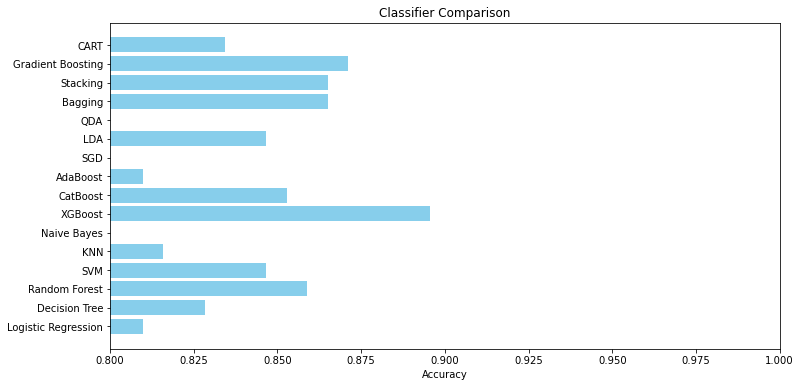

In [219]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_lalr, accuracy_ladt, accuracy_larf, accuracy_lasvc, accuracy_laknn, accuracy_lanb, accuracy_laxgb, accuracy_lacb, accuracy_laab, accuracy_lasgd, accuracy_lalda, accuracy_laqda, accuracy_labg, accuracy_astacking, accuracy_lagb, accuracy_lacart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


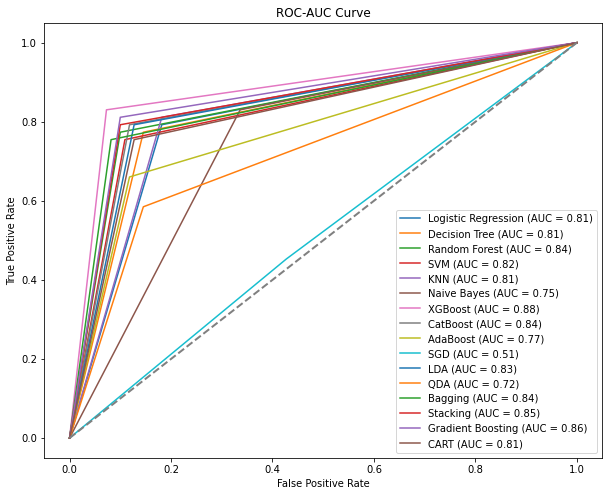

In [220]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_lalr),
    ('Decision Tree', y_pred_ladt),
    ('Random Forest', y_pred_larf),
    ('SVM', y_pred_lasvc),
    ('KNN', y_pred_laknn),
    ('Naive Bayes', y_pred_lanb),
    ('XGBoost', y_pred_laxgb),
    ('CatBoost', y_pred_lacb),
    ('AdaBoost', y_pred_laab),
    ('SGD', y_pred_lasgd),
    ('LDA', y_pred_lalda),
    ('QDA', y_pred_laqda),
    ('Bagging', y_pred_labg),
    ('Stacking', y_pred_astacking),
    ('Gradient Boosting', y_pred_lagb),
    ('CART', y_pred_lacart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [221]:
#ENN
from imblearn.under_sampling import EditedNearestNeighbours

# Create an ENN instance
enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3, kind_sel='all')

# Fit and resample the training data
X_train_resampledle, y_train_resampledle = enn.fit_resample(X_train, y_train)

# Check the class distribution after ENN
print("Class distribution after ENN:", Counter(y_train_resampledle))
print("Class distribution before ENN:", Counter(y_train))



Class distribution after ENN: Counter({1: 124, 0: 88})
Class distribution before ENN: Counter({0: 254, 1: 124})


In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modellennlr = LogisticRegression()

# Train the model on the training data
modellennlr.fit(X_train_resampledle, y_train_resampledle)

# Make predictions on the test data
y_pred_lennlr = modellennlr.predict(X_test)

# Evaluate the model
accuracy_lennlr = accuracy_score(y_test, y_pred_lennlr)
confusion_lennlr = confusion_matrix(y_test, y_pred_lennlr)
classification_rep_lennlr = classification_report(y_test, y_pred_lennlr)

# Print the evaluation metrics
print("Accuracy:", accuracy_lennlr)
print("Confusion Matrix:\n", confusion_lennlr)
print("Classification Report:\n", classification_rep_lennlr)


Accuracy: 0.7361963190184049
Confusion Matrix:
 [[77 33]
 [10 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       110
           1       0.57      0.81      0.67        53

    accuracy                           0.74       163
   macro avg       0.73      0.76      0.72       163
weighted avg       0.78      0.74      0.74       163



In [223]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treelenndt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treelenndt.fit(X_train_resampledle, y_train_resampledle)

# Make predictions on the test data
y_pred_lennlrdt = decision_treelenndt.predict(X_test)

# Evaluate the classifier's performance
accuracy_lennlrdt = accuracy_score(y_test, y_pred_lennlrdt)
print("Accuracy:", accuracy_lennlrdt)

# Print classification report for more detailed evaluation
report_lennlrdt = classification_report(y_test, y_pred_lennlrdt)
print("Classification Report:\n", report_lennlrdt)


Accuracy: 0.8098159509202454
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.85       110
           1       0.65      0.89      0.75        53

    accuracy                           0.81       163
   macro avg       0.79      0.83      0.80       163
weighted avg       0.84      0.81      0.82       163



In [224]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestlennrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestlennrf.fit(X_train_resampledle, y_train_resampledle)

# Make predictions on the test data
y_pred_lennrf = random_forestlennrf.predict(X_test)

# Evaluate the classifier's performance
accuracy_lennrf = accuracy_score(y_test, y_pred_lennrf)
print("Accuracy:", accuracy_lennrf)

# Print classification report for more detailed evaluation
report_lennrf = classification_report(y_test, y_pred_lennrf)
print("Classification Report:\n", report_lennrf)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88       110
           1       0.71      0.91      0.79        53

    accuracy                           0.85       163
   macro avg       0.83      0.86      0.84       163
weighted avg       0.87      0.85      0.85       163



In [225]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifierlennsvc = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifierlennsvc.fit(X_train_resampledle, y_train_resampledle)

# Make predictions on the test data
y_pred_lennsvc = svm_classifierlennsvc.predict(X_test)

# Evaluate the classifier's performance
accuracy_lennsvc = accuracy_score(y_test, y_pred_lennsvc)
print("Accuracy:", accuracy_lennsvc)

# Print classification report for more detailed evaluation
report_lennsvc = classification_report(y_test, y_pred_lennsvc)
print("Classification Report:\n", report_lennsvc)


Accuracy: 0.7177914110429447
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77       110
           1       0.55      0.75      0.63        53

    accuracy                           0.72       163
   macro avg       0.70      0.73      0.70       163
weighted avg       0.76      0.72      0.73       163



In [226]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scalerlennknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaledlennknn = scaler.fit_transform(X_train_resampledle)
X_test_scaledlennknn = scaler.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifierlennknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifierlennknn.fit(X_train_scaledlennknn, y_train_resampledle)
y_pred_lennknn = knn_classifierlennknn.predict(X_test_scaledlennknn)

#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifierlennknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifierlennknn.fit(X_train_scaledlennknn, y_train_resampledle)

# Make predictions on the test data
y_pred_lennknn = knn_classifierlennknn.predict(X_test_scaledlennknn)

# Evaluate the classifier's performance
accuracy_lennknn = accuracy_score(y_test, y_pred_lennknn)
print("Accuracy:", accuracy_lennknn)

# Print classification report for more detailed evaluation
report_lennknn = classification_report(y_test, y_pred_lennknn)
print("Classification Report:\n", report_lennknn)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       110
           1       0.74      0.81      0.77        53

    accuracy                           0.85       163
   macro avg       0.82      0.84      0.83       163
weighted avg       0.85      0.85      0.85       163



In [227]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifierlennnb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifierlennnb.fit(X_train_resampledle, y_train_resampledle)

# Make predictions on the test data
y_pred_lennnb = naive_bayes_classifierlennnb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lennnb = accuracy_score(y_test, y_pred_lennnb)
print("Accuracy:", accuracy_lennnb)

# Print classification report for more detailed evaluation
report_lennnb = classification_report(y_test, y_pred_lennnb)
print("Classification Report:\n", report_lennnb)


Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       110
           1       0.76      0.79      0.78        53

    accuracy                           0.85       163
   macro avg       0.83      0.84      0.83       163
weighted avg       0.85      0.85      0.85       163



In [228]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifierlennxgb= xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifierlennxgb.fit(X_train_resampledle, y_train_resampledle)

# Make predictions on the test data
y_pred_lennxgb = xgb_classifierlennxgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lennxgb = accuracy_score(y_test, y_pred_lennxgb)
print("Accuracy:", accuracy_lennxgb)

# Print classification report for more detailed evaluation
report_lennxgb = classification_report(y_test, y_pred_lennxgb)
print("Classification Report:\n", report_lennxgb)


Accuracy: 0.8220858895705522
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86       110
           1       0.67      0.89      0.76        53

    accuracy                           0.82       163
   macro avg       0.80      0.84      0.81       163
weighted avg       0.85      0.82      0.83       163



In [229]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifierlenncb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifierlenncb.fit(X_train_resampledle, y_train_resampledle)

# Make predictions on the test data
y_pred_lenncb = catboost_classifierlenncb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lenncb = accuracy_score(y_test, y_pred_lenncb)
print("Accuracy:", accuracy_lenncb)

# Print classification report for more detailed evaluation
report_lenncb = classification_report(y_test, y_pred_lenncb)
print("Classification Report:\n", report_lenncb)


Accuracy: 0.8404907975460123
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.87       110
           1       0.71      0.87      0.78        53

    accuracy                           0.84       163
   macro avg       0.82      0.85      0.83       163
weighted avg       0.86      0.84      0.84       163



In [230]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifier.fit(X_train_resampledle, y_train_resampledle)

# Make predictions on the test data
y_pred_eadaboost = adaboost_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy_eadaboost = accuracy_score(y_test, y_pred_eadaboost)
print("Accuracy:", accuracy_eadaboost)

# Print classification report for more detailed evaluation
report_eadaboost = classification_report(y_test, y_pred_eadaboost)
print("Classification Report:\n", report_eadaboost)


Accuracy: 0.8404907975460123
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.87       110
           1       0.71      0.87      0.78        53

    accuracy                           0.84       163
   macro avg       0.82      0.85      0.83       163
weighted avg       0.86      0.84      0.84       163



In [231]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifierlennsgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifierlennsgd.fit(X_train_resampledle, y_train_resampledle)

# Make predictions on the test data
y_pred_lennsgd = sgd_classifierlennsgd.predict(X_test)

# Evaluate the classifier's performance
accuracy_lennsgd = accuracy_score(y_test, y_pred_lennsgd)
print("Accuracy:", accuracy_lennsgd)

# Print classification report for more detailed evaluation
report_lennsgd = classification_report(y_test, y_pred_lennsgd)
print("Classification Report:\n", report_lennsgd)


Accuracy: 0.5153374233128835
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.46      0.56       110
           1       0.36      0.62      0.46        53

    accuracy                           0.52       163
   macro avg       0.54      0.54      0.51       163
weighted avg       0.60      0.52      0.53       163



In [232]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifierlennlda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifierlennlda.fit(X_train_resampledle, y_train_resampledle)

# Make predictions on the test data
y_pred_lennlda = lda_classifierlennlda.predict(X_test)

# Evaluate the classifier's performance
accuracy_lennlda = accuracy_score(y_test, y_pred_lennlda)
print("Accuracy:", accuracy_lennlda)

# Print classification report for more detailed evaluation
report_lennlda = classification_report(y_test, y_pred_lennlda)
print("Classification Report:\n", report_lennlda)


Accuracy: 0.7975460122699386
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       110
           1       0.67      0.74      0.70        53

    accuracy                           0.80       163
   macro avg       0.77      0.78      0.77       163
weighted avg       0.80      0.80      0.80       163



In [233]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifierlennqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifierlennqda.fit(X_train_resampledle, y_train_resampledle)

# Make predictions on the test data
y_pred_lennqda = qda_classifierlennqda.predict(X_test)

# Evaluate the classifier's performance
accuracy_lennqda = accuracy_score(y_test, y_pred_lennlda)
print("Accuracy:", accuracy_lennqda)

# Print classification report for more detailed evaluation
report_lennqda = classification_report(y_test, y_pred_lennqda)
print("Classification Report:\n", report_lennqda)


Accuracy: 0.7975460122699386
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.62      0.73       110
           1       0.52      0.85      0.64        53

    accuracy                           0.69       163
   macro avg       0.71      0.73      0.69       163
weighted avg       0.77      0.69      0.70       163



In [234]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifierlennbg = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifierlennbg = BaggingClassifier(base_classifierlennbg, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifierlennbg.fit(X_train_resampledle, y_train_resampledle)

# Make predictions on the test data
y_pred_lennbg = bagging_classifierlennbg.predict(X_test)

# Evaluate the classifier's performance
accuracy_lennbg = accuracy_score(y_test, y_pred_lennbg)
print("Accuracy:", accuracy_lennbg)

# Print classification report for more detailed evaluation
report_lennbg = classification_report(y_test, y_pred_lennbg)
print("Classification Report:\n", report_lennbg)


Accuracy: 0.8159509202453987
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.85       110
           1       0.67      0.85      0.75        53

    accuracy                           0.82       163
   macro avg       0.79      0.82      0.80       163
weighted avg       0.84      0.82      0.82       163



In [235]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifierslennst = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifierlennst = StackingClassifier(
    estimators=base_classifierslennst,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifierlennst.fit(X_train_resampledle, y_train_resampledle)

# Make predictions on the test data
y_pred_lennst = stacking_classifierlennst.predict(X_test)

# Evaluate the classifier's performance
accuracy_lennst = accuracy_score(y_test, y_pred_lennst)
print("Accuracy:", accuracy_lennst)

# Print classification report for more detailed evaluation
report_lennst = classification_report(y_test, y_pred_lennst)
print("Classification Report:\n", report_lennst)


Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86       110
           1       0.68      0.89      0.77        53

    accuracy                           0.83       163
   macro avg       0.81      0.84      0.82       163
weighted avg       0.85      0.83      0.83       163



In [236]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifierlenngb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifierlenngb.fit(X_train_resampledle, y_train_resampledle)

# Make predictions on the test data
y_pred_lenngb = gb_classifierlenngb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lenngb = accuracy_score(y_test, y_pred_lenngb)
print("Accuracy (Gradient Boosting):", accuracy_lenngb)

# Print classification report for more detailed evaluation
report_lenngb = classification_report(y_test, y_pred_lenngb)
print("Classification Report (Gradient Boosting):\n", report_lenngb)


Accuracy (Gradient Boosting): 0.8588957055214724
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       110
           1       0.73      0.91      0.81        53

    accuracy                           0.86       163
   macro avg       0.84      0.87      0.85       163
weighted avg       0.88      0.86      0.86       163



In [237]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifierlenncart= DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifierlenncart.fit(X_train_resampledle, y_train_resampledle)

# Make predictions on the test data
y_pred_lenncart = cart_classifierlenncart.predict(X_test)

# Evaluate the classifier's performance
accuracy_lenncart = accuracy_score(y_test, y_pred_lenncart)
print("Accuracy:", accuracy_lenncart)

# Print classification report for more detailed evaluation
report_lenncart = classification_report(y_test, y_pred_lenncart)
print("Classification Report:\n", report_lenncart)


Accuracy: 0.7791411042944786
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.73      0.82       110
           1       0.61      0.89      0.72        53

    accuracy                           0.78       163
   macro avg       0.77      0.81      0.77       163
weighted avg       0.83      0.78      0.79       163



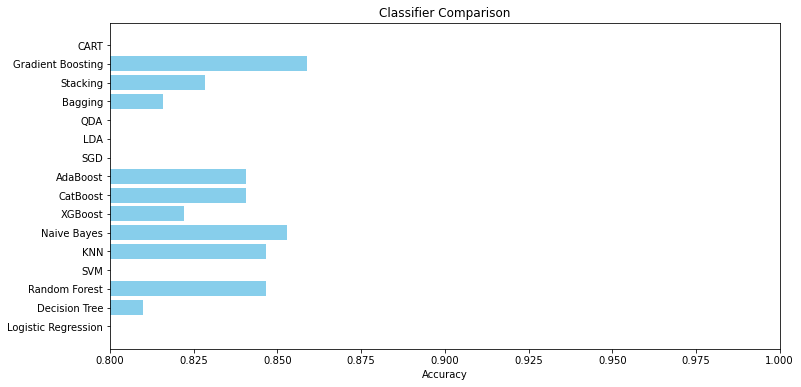

In [238]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_lennlr, accuracy_lennlrdt, accuracy_lennrf, accuracy_lennsvc, accuracy_lennknn, accuracy_lennnb, accuracy_lennxgb, accuracy_lenncb, accuracy_eadaboost, accuracy_lennsgd, accuracy_lennlda, accuracy_lennqda, accuracy_lennbg, accuracy_lennst, accuracy_lenngb, accuracy_lenncart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


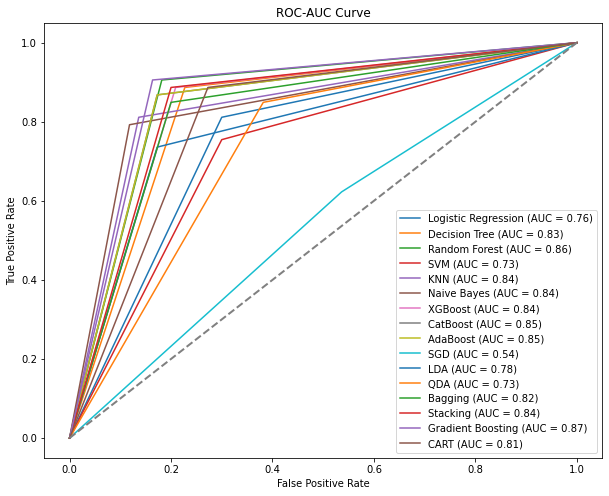

In [239]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_lennlr),
    ('Decision Tree', y_pred_lennlrdt),
    ('Random Forest', y_pred_lennrf),
    ('SVM', y_pred_lennsvc),
    ('KNN', y_pred_lennknn),
    ('Naive Bayes', y_pred_lennnb),
    ('XGBoost', y_pred_lennxgb),
    ('CatBoost', y_pred_lenncb),
    ('AdaBoost', y_pred_eadaboost),
    ('SGD', y_pred_lennsgd),
    ('LDA', y_pred_lennlda),
    ('QDA', y_pred_lennqda),
    ('Bagging', y_pred_lennbg),
    ('Stacking', y_pred_lennst),
    ('Gradient Boosting', y_pred_lenngb),
    ('CART', y_pred_lenncart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [240]:
#NCR
from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification

# Generate a synthetic dataset (replace with your own dataset)
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Combine SMOTE and ENN using SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_resampledlncr, y_train_resampledlncr = smote_enn.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTEENN
from collections import Counter
print("Class distribution after SMOTEENN:", Counter(y_train_resampledlncr))
print("Class distribution before SMOTEENN:", Counter(y_train))



Class distribution after SMOTEENN: Counter({1: 146, 0: 69})
Class distribution before SMOTEENN: Counter({0: 254, 1: 124})


In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modelllrncr = LogisticRegression()

# Train the model on the training data
modelllrncr.fit(X_train_resampledlncr, y_train_resampledlncr)

# Make predictions on the test data
y_pred_llrncr = modelllrncr.predict(X_test)

# Evaluate the model
accuracy_llrncr = accuracy_score(y_test, y_pred_llrncr)
confusion_llrncr = confusion_matrix(y_test, y_pred_llrncr)
classification_rep_llrncr = classification_report(y_test, y_pred_llrncr)

# Print the evaluation metrics
print("Accuracy:", accuracy_llrncr)
print("Confusion Matrix:\n", confusion_llrncr)
print("Classification Report:\n", classification_rep_llrncr)


Accuracy: 0.7177914110429447
Confusion Matrix:
 [[77 33]
 [13 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77       110
           1       0.55      0.75      0.63        53

    accuracy                           0.72       163
   macro avg       0.70      0.73      0.70       163
weighted avg       0.76      0.72      0.73       163



In [242]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treelncrdt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treelncrdt.fit(X_train_resampledlncr, y_train_resampledlncr)

# Make predictions on the test data
y_pred_lncrdt = decision_treelncrdt.predict(X_test)

# Evaluate the classifier's performance
accuracy_lncrdt = accuracy_score(y_test, y_pred_lncrdt)
print("Accuracy:", accuracy_lncrdt)

# Print classification report for more detailed evaluation
report_lncrdt = classification_report(y_test, y_pred_lncrdt)
print("Classification Report:\n", report_lncrdt)


Accuracy: 0.6687116564417178
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.70      0.74       110
           1       0.49      0.60      0.54        53

    accuracy                           0.67       163
   macro avg       0.64      0.65      0.64       163
weighted avg       0.69      0.67      0.68       163



In [243]:

#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestlncrrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestlncrrf.fit(X_train_resampledlncr, y_train_resampledlncr)

# Make predictions on the test data
y_pred_lncrrf = random_forestlncrrf.predict(X_test)

# Evaluate the classifier's performance
accuracy_lncrrf = accuracy_score(y_test, y_pred_lncrrf)
print("Accuracy:", accuracy_lncrrf)

# Print classification report for more detailed evaluation
report_lncrrf = classification_report(y_test, y_pred_lncrrf)
print("Classification Report:\n", report_lncrrf)


Accuracy: 0.8220858895705522
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86       110
           1       0.67      0.89      0.76        53

    accuracy                           0.82       163
   macro avg       0.80      0.84      0.81       163
weighted avg       0.85      0.82      0.83       163



In [244]:

#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifierlncrsvc = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifierlncrsvc.fit(X_train_resampledlncr, y_train_resampledlncr)

# Make predictions on the test data
y_pred_lncrsvc = svm_classifierlncrsvc.predict(X_test)

# Evaluate the classifier's performance
accuracy_lncrsvc = accuracy_score(y_test, y_pred_lncrsvc)
print("Accuracy:", accuracy_lncrsvc)

# Print classification report for more detailed evaluation
report_lncrsvc = classification_report(y_test, y_pred_lncrsvc)
print("Classification Report:\n", report_lncrsvc)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.64      0.71       110
           1       0.47      0.68      0.56        53

    accuracy                           0.65       163
   macro avg       0.64      0.66      0.63       163
weighted avg       0.70      0.65      0.66       163



In [245]:

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scalerlncrknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_lncrknn = scaler.fit_transform(X_train_resampledlncr)
X_test_scaled_lncrknn = scaler.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifierlncrknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifierlncrknn.fit(X_train_scaled_lncrknn, y_train_resampledlncr)
y_pred_lncrknn = knn_classifierlncrknn.predict(X_test_scaled_lncrknn)

#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifierlncrknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifierlncrknn.fit(X_train_scaled_lncrknn, y_train_resampledlncr)

# Make predictions on the test data
y_pred_lncrknn = knn_classifierlncrknn.predict(X_test_scaled_lncrknn)

# Evaluate the classifier's performance
accuracy_lncrknn = accuracy_score(y_test, y_pred_lncrknn)
print("Accuracy:", accuracy_lncrknn)

# Print classification report for more detailed evaluation
report_lncrknn = classification_report(y_test, y_pred_lncrknn)
print("Classification Report:\n", report_lncrknn)


Accuracy: 0.6257668711656442
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.49      0.64       110
           1       0.46      0.91      0.61        53

    accuracy                           0.63       163
   macro avg       0.69      0.70      0.63       163
weighted avg       0.77      0.63      0.63       163



In [246]:

#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifierlncrnb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifierlncrnb.fit(X_train_resampledlncr, y_train_resampledlncr)

# Make predictions on the test data
y_pred_lncrnb = naive_bayes_classifierlncrnb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lncrnb = accuracy_score(y_test, y_pred_lncrnb)
print("Accuracy:", accuracy_lncrnb)

# Print classification report for more detailed evaluation
report_lncrnb = classification_report(y_test, y_pred_lncrnb)
print("Classification Report:\n", report_lncrnb)


Accuracy: 0.7730061349693251
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.81       110
           1       0.61      0.85      0.71        53

    accuracy                           0.77       163
   macro avg       0.76      0.79      0.76       163
weighted avg       0.81      0.77      0.78       163



In [247]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifierlncrxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifierlncrxgb.fit(X_train_resampledlncr, y_train_resampledlncr)

# Make predictions on the test data
y_pred_lncrxgb = xgb_classifierlncrxgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lncrxgb = accuracy_score(y_test, y_pred_lncrxgb)
print("Accuracy:", accuracy_lncrxgb)

# Print classification report for more detailed evaluation
report_lncrxgb = classification_report(y_test, y_pred_lncrxgb)
print("Classification Report:\n", report_lncrxgb)


Accuracy: 0.8159509202453987
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       110
           1       0.68      0.81      0.74        53

    accuracy                           0.82       163
   macro avg       0.79      0.81      0.80       163
weighted avg       0.83      0.82      0.82       163



In [248]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifierlncrcb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifierlncrcb.fit(X_train_resampledlncr, y_train_resampledlncr)

# Make predictions on the test data
y_pred_lncrcbcb = catboost_classifierlncrcb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lncrcbcb = accuracy_score(y_test, y_pred_lncrcbcb)
print("Accuracy:", accuracy_lncrcbcb)

# Print classification report for more detailed evaluation
report_lncrcbcb = classification_report(y_test, y_pred_lncrcbcb)
print("Classification Report:\n", report_lncrcbcb)


Accuracy: 0.7975460122699386
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.76      0.84       110
           1       0.64      0.87      0.74        53

    accuracy                           0.80       163
   macro avg       0.78      0.82      0.79       163
weighted avg       0.83      0.80      0.80       163



In [249]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifierlncrab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifierlncrab = AdaBoostClassifier(base_classifierlncrab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifierlncrab.fit(X_train_resampledlncr, y_train_resampledlncr)

# Make predictions on the test data
y_pred_lncrab = adaboost_classifierlncrab.predict(X_test)

# Evaluate the classifier's performance
accuracy_lncrab = accuracy_score(y_test, y_pred_lncrab)
print("Accuracy:", accuracy_lncrab)

# Print classification report for more detailed evaluation
report_lncrab = classification_report(y_test, y_pred_lncrab)
print("Classification Report:\n", report_lncrab)


Accuracy: 0.8220858895705522
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86       110
           1       0.68      0.87      0.76        53

    accuracy                           0.82       163
   macro avg       0.80      0.83      0.81       163
weighted avg       0.85      0.82      0.83       163



In [250]:

#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifierlncrsgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifierlncrsgd.fit(X_train_resampledlncr, y_train_resampledlncr)

# Make predictions on the test data
y_pred_lncrsgd = sgd_classifierlncrsgd.predict(X_test)

# Evaluate the classifier's performance
accuracy_lncrsgd = accuracy_score(y_test, y_pred_lncrsgd)
print("Accuracy:", accuracy_lncrsgd)

# Print classification report for more detailed evaluation
report_lncrsgd = classification_report(y_test, y_pred_lncrsgd)
print("Classification Report:\n", report_lncrsgd)


Accuracy: 0.3803680981595092
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.17      0.27       110
           1       0.32      0.81      0.46        53

    accuracy                           0.38       163
   macro avg       0.49      0.49      0.37       163
weighted avg       0.55      0.38      0.33       163



In [251]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifierlncrlda= LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifierlncrlda.fit(X_train_resampledlncr, y_train_resampledlncr)

# Make predictions on the test data
y_pred_lncrlda = lda_classifierlncrlda.predict(X_test)

# Evaluate the classifier's performance
accuracy_lncrlda = accuracy_score(y_test, y_pred_lncrlda)
print("Accuracy:", accuracy_lncrlda)

# Print classification report for more detailed evaluation
report_lncrlda = classification_report(y_test, y_pred_lncrlda)
print("Classification Report:\n", report_lncrlda)


Accuracy: 0.7423312883435583
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       110
           1       0.58      0.74      0.65        53

    accuracy                           0.74       163
   macro avg       0.72      0.74      0.72       163
weighted avg       0.77      0.74      0.75       163



In [252]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifierlncrqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifierlncrqda.fit(X_train_resampledlncr, y_train_resampledlncr)

# Make predictions on the test data
y_pred_lncrqda = qda_classifierlncrqda.predict(X_test)

# Evaluate the classifier's performance
accuracy_lncrqda = accuracy_score(y_test, y_pred_lncrqda)
print("Accuracy:", accuracy_lncrqda)

# Print classification report for more detailed evaluation
report_lncrqda = classification_report(y_test, y_pred_lncrqda)
print("Classification Report:\n", report_lncrqda)


Accuracy: 0.7177914110429447
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.69      0.77       110
           1       0.55      0.77      0.64        53

    accuracy                           0.72       163
   macro avg       0.71      0.73      0.70       163
weighted avg       0.76      0.72      0.73       163



In [253]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifierlncrbg = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifierlncrbg = BaggingClassifier(base_classifierlncrbg, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifierlncrbg.fit(X_train_resampledlncr, y_train_resampledlncr)

# Make predictions on the test data
y_pred_lncrbg = bagging_classifierlncrbg.predict(X_test)

# Evaluate the classifier's performance
accuracy_lncrbg = accuracy_score(y_test, y_pred_lncrbg)
print("Accuracy:", accuracy_lncrbg)

# Print classification report for more detailed evaluation
report_lncrbg = classification_report(y_test, y_pred_lncrbg)
print("Classification Report:\n", report_lncrbg)


Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.86       110
           1       0.69      0.87      0.77        53

    accuracy                           0.83       163
   macro avg       0.81      0.84      0.82       163
weighted avg       0.85      0.83      0.83       163



In [254]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifierslncrst = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifierlncrst = StackingClassifier(
    estimators=base_classifierslncrst,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifierlncrst.fit(X_train_resampledlncr, y_train_resampledlncr)

# Make predictions on the test data
y_pred_lncrst = stacking_classifierlncrst.predict(X_test)

# Evaluate the classifier's performance
accuracy_lncrst = accuracy_score(y_test, y_pred_lncrst)
print("Accuracy:", accuracy_lncrst)

# Print classification report for more detailed evaluation
report_lncrst = classification_report(y_test, y_pred_lncrst)
print("Classification Report:\n", report_lncrst)


Accuracy: 0.7914110429447853
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       110
           1       0.67      0.70      0.69        53

    accuracy                           0.79       163
   macro avg       0.76      0.77      0.76       163
weighted avg       0.79      0.79      0.79       163



In [255]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifierlncrgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifierlncrgb.fit(X_train_resampledlncr, y_train_resampledlncr)

# Make predictions on the test data
y_pred_lncrgb = gb_classifierlncrgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lncrgb = accuracy_score(y_test, y_pred_lncrgb)
print("Accuracy (Gradient Boosting):", accuracy_lncrgb)

# Print classification report for more detailed evaluation
report_lncrgb = classification_report(y_test, y_pred_lncrgb)
print("Classification Report (Gradient Boosting):\n", report_lncrgb)


Accuracy (Gradient Boosting): 0.8343558282208589
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.94      0.81      0.87       110
           1       0.69      0.89      0.78        53

    accuracy                           0.83       163
   macro avg       0.81      0.85      0.82       163
weighted avg       0.86      0.83      0.84       163



In [256]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifierlncrcart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifierlncrcart.fit(X_train_resampledlncr, y_train_resampledlncr)

# Make predictions on the test data
y_pred_lncrcart = cart_classifierlncrcart.predict(X_test)

# Evaluate the classifier's performance
accuracy_lncrcart = accuracy_score(y_test, y_pred_lncrcart)
print("Accuracy:", accuracy_lncrcart)

# Print classification report for more detailed evaluation
report_lncrcart = classification_report(y_test, y_pred_lncrcart)
print("Classification Report:\n", report_lncrcart)


Accuracy: 0.7116564417177914
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78       110
           1       0.55      0.60      0.58        53

    accuracy                           0.71       163
   macro avg       0.68      0.68      0.68       163
weighted avg       0.72      0.71      0.71       163



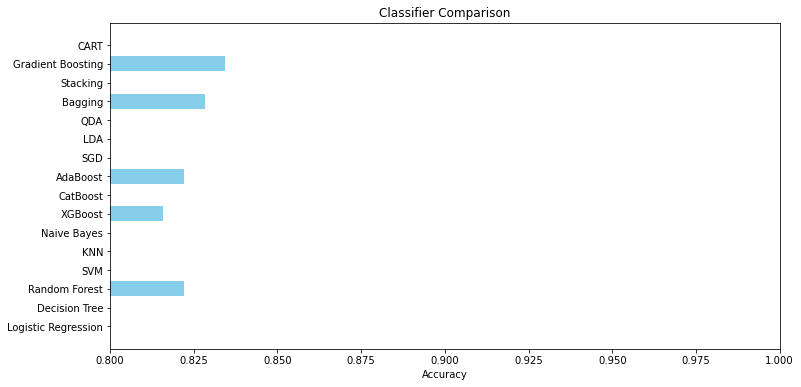

In [257]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_llrncr, accuracy_lncrdt, accuracy_lncrrf, accuracy_lncrsvc, accuracy_lncrknn, accuracy_lncrnb, accuracy_lncrxgb, accuracy_lncrcbcb, accuracy_lncrab, accuracy_lncrsgd, accuracy_lncrlda, accuracy_lncrqda, accuracy_lncrbg, accuracy_lncrst, accuracy_lncrgb, accuracy_lncrcart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


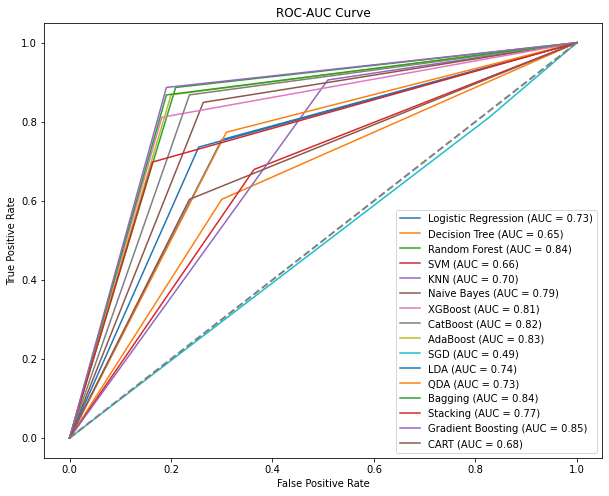

In [258]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_llrncr),
    ('Decision Tree', y_pred_lncrdt),
    ('Random Forest', y_pred_lncrrf),
    ('SVM', y_pred_lncrsvc),
    ('KNN', y_pred_lncrknn),
    ('Naive Bayes', y_pred_lncrnb),
    ('XGBoost', y_pred_lncrxgb),
    ('CatBoost', y_pred_lncrcbcb),
    ('AdaBoost', y_pred_lncrab),
    ('SGD', y_pred_lncrsgd),
    ('LDA', y_pred_lncrlda),
    ('QDA', y_pred_lncrqda),
    ('Bagging', y_pred_lncrbg),
    ('Stacking', y_pred_lncrst),
    ('Gradient Boosting', y_pred_lncrgb),
    ('CART', y_pred_lncrcart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [259]:
#Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Check the class distribution before random undersampling
print("Class distribution before random undersampling:", Counter(y_train))

# Initialize the RandomUnderSampler
undersamplerlrus = RandomUnderSampler(random_state=42)

# Perform random undersampling on the training data
X_train_undersampledlrus, y_train_undersampledlrus = undersamplerlrus.fit_resample(X_train, y_train)

# Check the class distribution after random undersampling
print("Class distribution after random undersampling:", Counter(y_train_undersampledlrus))


Class distribution before random undersampling: Counter({0: 254, 1: 124})
Class distribution after random undersampling: Counter({0: 124, 1: 124})


In [260]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modelllrrus = LogisticRegression()

# Train the model on the training data
modelllrrus.fit(X_train_undersampledlrus, y_train_undersampledlrus)

# Make predictions on the test data
y_pred_lrus = modelllrrus.predict(X_test)

# Evaluate the model
accuracy_lrus = accuracy_score(y_test, y_pred_lrus)
confusion_lrus = confusion_matrix(y_test, y_pred_lrus)
classification_rep_lrus = classification_report(y_test, y_pred_lrus)

# Print the evaluation metrics
print("Accuracy:", accuracy_lrus)
print("Confusion Matrix:\n", confusion_lrus)
print("Classification Report:\n", classification_rep_lrus)

Accuracy: 0.7791411042944786
Confusion Matrix:
 [[90 20]
 [16 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       110
           1       0.65      0.70      0.67        53

    accuracy                           0.78       163
   macro avg       0.75      0.76      0.75       163
weighted avg       0.78      0.78      0.78       163



In [261]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treelrusdt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treelrusdt.fit(X_train_undersampledlrus, y_train_undersampledlrus)

# Make predictions on the test data
y_pred_lrusdt = decision_treelrusdt.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrusdt = accuracy_score(y_test, y_pred_lrusdt)
print("Accuracy:", accuracy_lrusdt)

# Print classification report for more detailed evaluation
report_lrusdt = classification_report(y_test, y_pred_lrusdt)
print("Classification Report:\n", report_lrusdt)


Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       110
           1       0.70      0.81      0.75        53

    accuracy                           0.83       163
   macro avg       0.80      0.82      0.81       163
weighted avg       0.84      0.83      0.83       163



In [262]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestlrusrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestlrusrf.fit(X_train_undersampledlrus, y_train_undersampledlrus)

# Make predictions on the test data
y_pred_lrusrf = random_forestlrusrf.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrusrf = accuracy_score(y_test, y_pred_lrusrf)
print("Accuracy:", accuracy_lrusrf)

# Print classification report for more detailed evaluation
report_lrusrf = classification_report(y_test, y_pred_lrusrf)
print("Classification Report:\n", report_lrusrf)

Accuracy: 0.8957055214723927
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       110
           1       0.85      0.83      0.84        53

    accuracy                           0.90       163
   macro avg       0.88      0.88      0.88       163
weighted avg       0.90      0.90      0.90       163



In [263]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifierlrussvc = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifierlrussvc.fit(X_train_undersampledlrus, y_train_undersampledlrus)

# Make predictions on the test data
y_pred_lrussvc = svm_classifierlrussvc.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrussvc = accuracy_score(y_test, y_pred_lrussvc)
print("Accuracy:", accuracy_lrussvc)

# Print classification report for more detailed evaluation
report_lrussvc = classification_report(y_test, y_pred_lrussvc)
print("Classification Report:\n", report_lrussvc)

Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       110
           1       0.78      0.79      0.79        53

    accuracy                           0.86       163
   macro avg       0.84      0.84      0.84       163
weighted avg       0.86      0.86      0.86       163



In [264]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scalerlrusknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_lrusknn = scaler.fit_transform(X_train_undersampledlrus)
X_test_scaled_lrusknn = scaler.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifierlrusknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifierlrusknn.fit(X_train_scaled_lrusknn, y_train_undersampledlrus)
y_pred_rusknn = knn_classifierlrusknn.predict(X_test_scaled_lrusknn)

#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifierlrusknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifierlrusknn.fit(X_train_scaled_lrusknn, y_train_undersampledlrus)

# Make predictions on the test data
y_pred_lrusknn = knn_classifierlrusknn.predict(X_test_scaled_lrusknn)

# Evaluate the classifier's performance
accuracy_lrusknn = accuracy_score(y_test, y_pred_lrusknn)
print("Accuracy:", accuracy_lrusknn)

# Print classification report for more detailed evaluation
report_lrusknn = classification_report(y_test, y_pred_lrusknn)
print("Classification Report:\n", report_lrusknn)

Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       110
           1       0.80      0.70      0.75        53

    accuracy                           0.85       163
   macro avg       0.83      0.81      0.82       163
weighted avg       0.84      0.85      0.84       163



In [265]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifierlrusnb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifierlrusnb.fit(X_train_undersampledlrus, y_train_undersampledlrus)

# Make predictions on the test data
y_pred_lrusnb = naive_bayes_classifierlrusnb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrusnb = accuracy_score(y_test, y_pred_lrusnb)
print("Accuracy:", accuracy_lrusnb)

# Print classification report for more detailed evaluation
report_lrusnb = classification_report(y_test, y_pred_lrusnb)
print("Classification Report:\n", report_lrusnb)

Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       110
           1       0.80      0.66      0.72        53

    accuracy                           0.83       163
   macro avg       0.82      0.79      0.80       163
weighted avg       0.83      0.83      0.83       163



In [266]:

#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifierlrusxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifierlrusxgb.fit(X_train_undersampledlrus, y_train_undersampledlrus)

# Make predictions on the test data
y_pred_lrusxgb = xgb_classifierlrusxgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrusxgb = accuracy_score(y_test, y_pred_lrusxgb)
print("Accuracy:", accuracy_lrusxgb)

# Print classification report for more detailed evaluation
report_lrusxgb = classification_report(y_test, y_pred_lrusxgb)
print("Classification Report:\n", report_lrusxgb)

Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91       110
           1       0.77      0.89      0.82        53

    accuracy                           0.88       163
   macro avg       0.86      0.88      0.87       163
weighted avg       0.89      0.88      0.88       163



In [267]:

#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifierlruscb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifierlruscb.fit(X_train_undersampledlrus, y_train_undersampledlrus)

# Make predictions on the test data
y_pred_lruscb = catboost_classifierlruscb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lruscb = accuracy_score(y_test, y_pred_lruscb)
print("Accuracy:", accuracy_lruscb)

# Print classification report for more detailed evaluation
report_lruscb = classification_report(y_test, y_pred_lruscb)
print("Classification Report:\n", report_lruscb)

Accuracy: 0.8834355828220859
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       110
           1       0.80      0.85      0.83        53

    accuracy                           0.88       163
   macro avg       0.86      0.87      0.87       163
weighted avg       0.89      0.88      0.88       163



In [268]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifierlrusab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifierlrusab = AdaBoostClassifier(base_classifierlrusab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifierlrusab.fit(X_train_undersampledlrus, y_train_undersampledlrus)

# Make predictions on the test data
y_pred_lrusab = adaboost_classifierlrusab.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrusab = accuracy_score(y_test, y_pred_lrusab)
print("Accuracy:", accuracy_lrusab)

# Print classification report for more detailed evaluation
report_lrusab = classification_report(y_test, y_pred_lrusab)
print("Classification Report:\n", report_lrusab)

Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       110
           1       0.75      0.81      0.78        53

    accuracy                           0.85       163
   macro avg       0.83      0.84      0.84       163
weighted avg       0.86      0.85      0.85       163



In [269]:

#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifierlrussgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifierlrussgd.fit(X_train_undersampledlrus, y_train_undersampledlrus)

# Make predictions on the test data
y_pred_lrussgd = sgd_classifierlrussgd.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrussgd = accuracy_score(y_test, y_pred_lrussgd)
print("Accuracy:", accuracy_lrussgd)

# Print classification report for more detailed evaluation
report_lrussgd = classification_report(y_test, y_pred_lrussgd)
print("Classification Report:\n", report_lrussgd)

Accuracy: 0.4110429447852761
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.35      0.45       110
           1       0.28      0.53      0.37        53

    accuracy                           0.41       163
   macro avg       0.45      0.44      0.41       163
weighted avg       0.50      0.41      0.42       163



In [270]:

#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifierlruslda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifierlruslda.fit(X_train_undersampledlrus, y_train_undersampledlrus)

# Make predictions on the test data
y_pred_lruslda = lda_classifierlruslda.predict(X_test)

# Evaluate the classifier's performance
accuracy_lruslda = accuracy_score(y_test, y_pred_lruslda)
print("Accuracy:", accuracy_lruslda)

# Print classification report for more detailed evaluation
report_lruslda = classification_report(y_test, y_pred_lruslda)
print("Classification Report:\n", report_lruslda)

Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       110
           1       0.80      0.74      0.76        53

    accuracy                           0.85       163
   macro avg       0.84      0.82      0.83       163
weighted avg       0.85      0.85      0.85       163



In [271]:

#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifierlrusqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifierlrusqda.fit(X_train_undersampledlrus, y_train_undersampledlrus)

# Make predictions on the test data
y_pred_lrusqda = qda_classifierlrusqda.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrusqda = accuracy_score(y_test, y_pred_lrusqda)
print("Accuracy:", accuracy_lrusqda)

# Print classification report for more detailed evaluation
report_lrusqda = classification_report(y_test, y_pred_lrusqda)
print("Classification Report:\n", report_lrusqda)

Accuracy: 0.7484662576687117
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       110
           1       0.60      0.66      0.63        53

    accuracy                           0.75       163
   macro avg       0.72      0.73      0.72       163
weighted avg       0.76      0.75      0.75       163



In [272]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifierlrusbg = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifierlrusbg = BaggingClassifier(base_classifierlrusbg, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifierlrusbg.fit(X_train_undersampledlrus, y_train_undersampledlrus)

# Make predictions on the test data
y_pred_lrusbg = bagging_classifierlrusbg.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrusbg = accuracy_score(y_test, y_pred_lrusbg)
print("Accuracy:", accuracy_lrusbg)

# Print classification report for more detailed evaluation
report_lrusbg = classification_report(y_test, y_pred_lrusbg)
print("Classification Report:\n", report_lrusbg)

Accuracy: 0.8650306748466258
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       110
           1       0.78      0.81      0.80        53

    accuracy                           0.87       163
   macro avg       0.84      0.85      0.85       163
weighted avg       0.87      0.87      0.87       163



In [273]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifierslrusst = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifierlrusst = StackingClassifier(
    estimators=base_classifierslrusst,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifierlrusst.fit(X_train_undersampledlrus, y_train_undersampledlrus)

# Make predictions on the test data
y_pred_lrusst = stacking_classifierlrusst.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrusst = accuracy_score(y_test, y_pred_lrusst)
print("Accuracy:", accuracy_lrusst)

# Print classification report for more detailed evaluation
report_lrusst = classification_report(y_test, y_pred_lrusst)
print("Classification Report:\n", report_lrusst)

Accuracy: 0.8711656441717791
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       110
           1       0.76      0.89      0.82        53

    accuracy                           0.87       163
   macro avg       0.85      0.88      0.86       163
weighted avg       0.88      0.87      0.87       163



In [274]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifierlrusgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifierlrusgb.fit(X_train_undersampledlrus, y_train_undersampledlrus)

# Make predictions on the test data
y_pred_lrusgb = gb_classifierlrusgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrusgb = accuracy_score(y_test, y_pred_lrusgb)
print("Accuracy (Gradient Boosting):", accuracy_lrusgb)

# Print classification report for more detailed evaluation
report_lrusgb = classification_report(y_test, y_pred_lrusgb)
print("Classification Report (Gradient Boosting):\n", report_lrusgb)

Accuracy (Gradient Boosting): 0.901840490797546
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       110
           1       0.85      0.85      0.85        53

    accuracy                           0.90       163
   macro avg       0.89      0.89      0.89       163
weighted avg       0.90      0.90      0.90       163



In [275]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifierlruscart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifierlruscart.fit(X_train_undersampledlrus, y_train_undersampledlrus)

# Make predictions on the test data
y_pred_lruscart = cart_classifierlruscart.predict(X_test)

# Evaluate the classifier's performance
accuracy_lruscart = accuracy_score(y_test, y_pred_lruscart)
print("Accuracy:", accuracy_lruscart)

# Print classification report for more detailed evaluation
report_lruscart = classification_report(y_test, y_pred_lruscart)
print("Classification Report:\n", report_lruscart)

Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       110
           1       0.72      0.81      0.76        53

    accuracy                           0.83       163
   macro avg       0.81      0.83      0.82       163
weighted avg       0.84      0.83      0.84       163



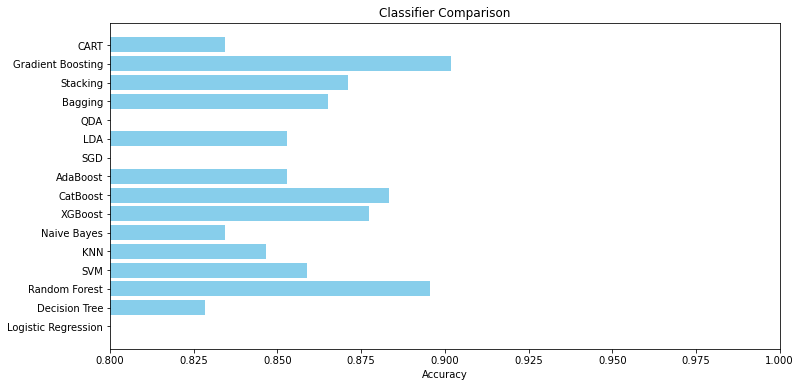

In [276]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_lrus, accuracy_lrusdt, accuracy_lrusrf, accuracy_lrussvc, accuracy_lrusknn, accuracy_lrusnb, accuracy_lrusxgb, accuracy_lruscb, accuracy_lrusab, accuracy_lrussgd, accuracy_lruslda, accuracy_lrusqda, accuracy_lrusbg, accuracy_lrusst, accuracy_lrusgb, accuracy_lruscart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


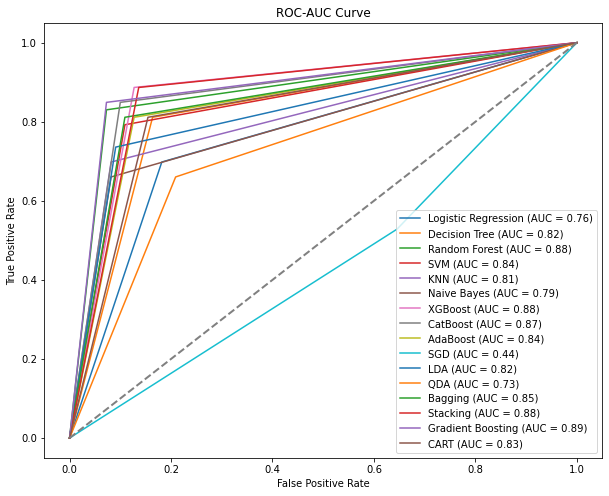

In [277]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_lrus),
    ('Decision Tree', y_pred_lrusdt),
    ('Random Forest', y_pred_lrusrf),
    ('SVM', y_pred_lrussvc),
    ('KNN', y_pred_lrusknn),
    ('Naive Bayes', y_pred_lrusnb),
    ('XGBoost', y_pred_lrusxgb),
    ('CatBoost', y_pred_lruscb),
    ('AdaBoost', y_pred_lrusab),
    ('SGD', y_pred_lrussgd),
    ('LDA', y_pred_lruslda),
    ('QDA', y_pred_lrusqda),
    ('Bagging', y_pred_lrusbg),
    ('Stacking', y_pred_lrusst),
    ('Gradient Boosting', y_pred_lrusgb),
    ('CART', y_pred_lruscart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [278]:
#Random Oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Assuming you have your dataset loaded into X_train and y_train

# Check the class distribution before random oversampling
print("Class distribution before Random Oversampling:", Counter(y_train))

# Create a RandomOverSampler object
lros = RandomOverSampler(random_state=42)

# Fit and apply random oversampling to the training data
X_train_resampledlros, y_train_resampledlros = lros.fit_resample(X_train, y_train)

# Check the class distribution after random oversampling
print("Class distribution after Random Oversampling:", Counter(y_train_resampledlros))


Class distribution before Random Oversampling: Counter({0: 254, 1: 124})
Class distribution after Random Oversampling: Counter({1: 254, 0: 254})


In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modelllrros = LogisticRegression()

# Train the model on the training data
modelllrros.fit(X_train_resampledlros, y_train_resampledlros)

# Make predictions on the test data
y_pred_llrros = modelllrros.predict(X_test)

# Evaluate the model
accuracy_llrros = accuracy_score(y_test, y_pred_llrros)
confusion_llrros = confusion_matrix(y_test, y_pred_llrros)
classification_rep_llrros = classification_report(y_test, y_pred_llrros)

# Print the evaluation metrics
print("Accuracy:", accuracy_llrros)
print("Confusion Matrix:\n", confusion_llrros)
print("Classification Report:\n", classification_rep_llrros)


Accuracy: 0.7914110429447853
Confusion Matrix:
 [[91 19]
 [15 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       110
           1       0.67      0.72      0.69        53

    accuracy                           0.79       163
   macro avg       0.76      0.77      0.77       163
weighted avg       0.80      0.79      0.79       163



In [280]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treelrosdt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treelrosdt.fit(X_train_resampledlros, y_train_resampledlros)

# Make predictions on the test data
y_pred_lrosdt = decision_treelrosdt.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrosdt = accuracy_score(y_test, y_pred_lrosdt)
print("Accuracy:", accuracy_lrosdt)

# Print classification report for more detailed evaluation
report_lrosdt = classification_report(y_test, y_pred_lrosdt)
print("Classification Report:\n", report_lrosdt)

Accuracy: 0.803680981595092
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       110
           1       0.73      0.62      0.67        53

    accuracy                           0.80       163
   macro avg       0.78      0.76      0.77       163
weighted avg       0.80      0.80      0.80       163



In [281]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestlrosrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestlrosrf.fit(X_train_resampledlros, y_train_resampledlros)

# Make predictions on the test data
y_pred_lrosrf = random_forestlrosrf.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrosrf = accuracy_score(y_test, y_pred_lrosrf)
print("Accuracy:", accuracy_lrosrf)

# Print classification report for more detailed evaluation
report_lrosrf = classification_report(y_test, y_pred_lrosrf)
print("Classification Report:\n", report_lrosrf)

Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       110
           1       0.87      0.74      0.80        53

    accuracy                           0.88       163
   macro avg       0.87      0.84      0.85       163
weighted avg       0.88      0.88      0.87       163



In [282]:

#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifierlrossvc = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifierlrossvc.fit(X_train_resampledlros, y_train_resampledlros)

# Make predictions on the test data
y_pred_lrossvc = svm_classifierlrossvc.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrossvc = accuracy_score(y_test, y_pred_lrossvc)
print("Accuracy:", accuracy_lrossvc)

# Print classification report for more detailed evaluation
report_lrossvc = classification_report(y_test, y_pred_lrossvc)
print("Classification Report:\n", report_lrossvc)

Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       110
           1       0.75      0.72      0.73        53

    accuracy                           0.83       163
   macro avg       0.81      0.80      0.80       163
weighted avg       0.83      0.83      0.83       163



In [283]:

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scalerlrosknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_lrosknn = scaler.fit_transform(X_train_resampledlros)
X_test_scaled_lrosknn = scaler.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifierlrosknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifierlrosknn.fit(X_train_scaled_lrosknn, y_train_resampledlros)
y_pred_lrosknn = knn_classifierlrosknn.predict(X_test_scaled_lrosknn)

#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifierlrosknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifierlrosknn.fit(X_train_scaled_lrosknn, y_train_resampledlros)

# Make predictions on the test data
y_pred_lrosknn = knn_classifierlrosknn.predict(X_test_scaled_lrosknn)

# Evaluate the classifier's performance
accuracy_lrosknn = accuracy_score(y_test, y_pred_lrosknn)
print("Accuracy:", accuracy_lrosknn)

# Print classification report for more detailed evaluation
report_lrosknn = classification_report(y_test, y_pred_lrosknn)
print("Classification Report:\n", report_lrosknn)

Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       110
           1       0.81      0.72      0.76        53

    accuracy                           0.85       163
   macro avg       0.84      0.82      0.83       163
weighted avg       0.85      0.85      0.85       163



In [284]:

#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifierlrosnb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifierlrosnb.fit(X_train_resampledlros, y_train_resampledlros)

# Make predictions on the test data
y_pred_lrosnb = naive_bayes_classifierlrosnb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrosnb = accuracy_score(y_test, y_pred_lrosnb)
print("Accuracy:", accuracy_lrosnb)

# Print classification report for more detailed evaluation
report_lrosnb = classification_report(y_test, y_pred_lrosnb)
print("Classification Report:\n", report_lrosnb)

Accuracy: 0.7484662576687117
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79       110
           1       0.58      0.83      0.68        53

    accuracy                           0.75       163
   macro avg       0.74      0.77      0.74       163
weighted avg       0.79      0.75      0.76       163



In [285]:

#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifierlrosxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifierlrosxgb.fit(X_train_resampledlros, y_train_resampledlros)

# Make predictions on the test data
y_pred_lrosxgb = xgb_classifierlrosxgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrosxgb = accuracy_score(y_test, y_pred_lrosxgb)
print("Accuracy:", accuracy_lrosxgb)

# Print classification report for more detailed evaluation
report_lrosxgb = classification_report(y_test, y_pred_lrosxgb)
print("Classification Report:\n", report_lrosxgb)

Accuracy: 0.8895705521472392
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       110
           1       0.83      0.83      0.83        53

    accuracy                           0.89       163
   macro avg       0.87      0.87      0.87       163
weighted avg       0.89      0.89      0.89       163



In [286]:

#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifierlroscb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifierlroscb.fit(X_train_resampledlros, y_train_resampledlros)

# Make predictions on the test data
y_pred_lroscb = catboost_classifierlroscb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lroscb = accuracy_score(y_test, y_pred_lroscb)
print("Accuracy:", accuracy_lroscb)

# Print classification report for more detailed evaluation
report_lroscb = classification_report(y_test, y_pred_lroscb)
print("Classification Report:\n", report_lroscb)

Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       110
           1       0.82      0.79      0.81        53

    accuracy                           0.88       163
   macro avg       0.86      0.86      0.86       163
weighted avg       0.88      0.88      0.88       163



In [287]:

#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifierlrosab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifierlrosab = AdaBoostClassifier(base_classifierlrosab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifierlrosab.fit(X_train_resampledlros, y_train_resampledlros)

# Make predictions on the test data
y_pred_lrosab = adaboost_classifierlrosab.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrosab = accuracy_score(y_test, y_pred_lrosab)
print("Accuracy:", accuracy_lrosab)

# Print classification report for more detailed evaluation
report_lrosab = classification_report(y_test, y_pred_lrosab)
print("Classification Report:\n", report_lrosab)

Accuracy: 0.8220858895705522
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.75      0.68      0.71        53

    accuracy                           0.82       163
   macro avg       0.80      0.79      0.79       163
weighted avg       0.82      0.82      0.82       163



In [288]:

#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifierlrossgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifierlrossgd.fit(X_train_resampledlros, y_train_resampledlros)

# Make predictions on the test data
y_pred_lrossgd = sgd_classifierlrossgd.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrossgd = accuracy_score(y_test, y_pred_lrossgd)
print("Accuracy:", accuracy_lrossgd)

# Print classification report for more detailed evaluation
report_lrossgd = classification_report(y_test, y_pred_lrossgd)
print("Classification Report:\n", report_lrossgd)

Accuracy: 0.4233128834355828
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.32      0.43       110
           1       0.31      0.64      0.42        53

    accuracy                           0.42       163
   macro avg       0.48      0.48      0.42       163
weighted avg       0.54      0.42      0.42       163



In [289]:

#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifierlroslda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifierlroslda.fit(X_train_resampledlros, y_train_resampledlros)

# Make predictions on the test data
y_pred_lroslda = lda_classifierlroslda.predict(X_test)

# Evaluate the classifier's performance
accuracy_lroslda = accuracy_score(y_test, y_pred_lroslda)
print("Accuracy:", accuracy_lroslda)

# Print classification report for more detailed evaluation
report_lroslda = classification_report(y_test, y_pred_lroslda)
print("Classification Report:\n", report_lroslda)

Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       110
           1       0.83      0.72      0.77        53

    accuracy                           0.86       163
   macro avg       0.85      0.82      0.83       163
weighted avg       0.86      0.86      0.86       163



In [290]:

#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifierlrosqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifierlrosqda.fit(X_train_resampledlros, y_train_resampledlros)

# Make predictions on the test data
y_pred_lrosqda = qda_classifierlrosqda.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrosqda = accuracy_score(y_test, y_pred_lrosqda)
print("Accuracy:", accuracy_lrosqda)

# Print classification report for more detailed evaluation
report_lrosqda = classification_report(y_test, y_pred_lrosqda)
print("Classification Report:\n", report_lrosqda)

Accuracy: 0.7730061349693251
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.68      0.57      0.62        53

    accuracy                           0.77       163
   macro avg       0.74      0.72      0.73       163
weighted avg       0.77      0.77      0.77       163



In [291]:

#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifierlrosbg = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifierlrosbg = BaggingClassifier(base_classifierlrosbg, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifierlrosbg.fit(X_train_resampledlros, y_train_resampledlros)

# Make predictions on the test data
y_pred_lrosbg = bagging_classifierlrosbg.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrosbg = accuracy_score(y_test, y_pred_lrosbg)
print("Accuracy:", accuracy_lrosbg)

# Print classification report for more detailed evaluation
report_lrosbg = classification_report(y_test, y_pred_lrosbg)
print("Classification Report:\n", report_lrosbg)

Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       110
           1       0.78      0.74      0.76        53

    accuracy                           0.85       163
   macro avg       0.83      0.82      0.82       163
weighted avg       0.84      0.85      0.85       163



In [292]:

#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifierslrosst = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifierlrosst = StackingClassifier(
    estimators=base_classifierslrosst,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifierlrosst.fit(X_train_resampledlros, y_train_resampledlros)

# Make predictions on the test data
y_pred_lrosst = stacking_classifierlrosst.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrosst = accuracy_score(y_test, y_pred_lrosst)
print("Accuracy:", accuracy_lrosst)

# Print classification report for more detailed evaluation
report_lrosst = classification_report(y_test, y_pred_lrosst)
print("Classification Report:\n", report_lrosst)

Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       110
           1       0.81      0.64      0.72        53

    accuracy                           0.83       163
   macro avg       0.83      0.78      0.80       163
weighted avg       0.83      0.83      0.83       163



In [293]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifierlrosgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifierlrosgb.fit(X_train_resampledlros, y_train_resampledlros)

# Make predictions on the test data
y_pred_lrosgb = gb_classifierlrosgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrosgb = accuracy_score(y_test, y_pred_lrosgb)
print("Accuracy (Gradient Boosting):", accuracy_lrosgb)

# Print classification report for more detailed evaluation
report_lrosgb = classification_report(y_test, y_pred_lrosgb)
print("Classification Report (Gradient Boosting):\n", report_lrosgb)


Accuracy (Gradient Boosting): 0.8957055214723927
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       110
           1       0.86      0.81      0.83        53

    accuracy                           0.90       163
   macro avg       0.89      0.87      0.88       163
weighted avg       0.89      0.90      0.89       163



In [294]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifierlroscart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifierlroscart.fit(X_train_resampledlros, y_train_resampledlros)

# Make predictions on the test data
y_pred_lroscart = cart_classifierlroscart.predict(X_test)

# Evaluate the classifier's performance
accuracy_lroscart = accuracy_score(y_test, y_pred_lroscart)
print("Accuracy:", accuracy_lroscart)

# Print classification report for more detailed evaluation
report_lroscart = classification_report(y_test, y_pred_lroscart)
print("Classification Report:\n", report_lroscart)


Accuracy: 0.7975460122699386
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.72      0.62      0.67        53

    accuracy                           0.80       163
   macro avg       0.77      0.75      0.76       163
weighted avg       0.79      0.80      0.79       163



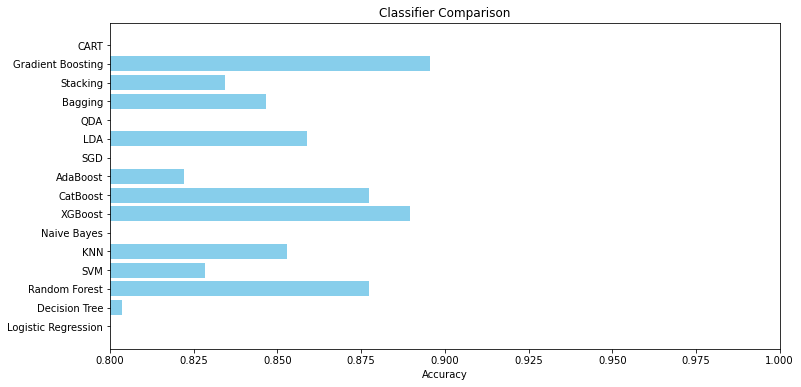

In [295]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_llrros, accuracy_lrosdt, accuracy_lrosrf, accuracy_lrossvc, accuracy_lrosknn, accuracy_lrosnb, accuracy_lrosxgb, accuracy_lroscb, accuracy_lrosab, accuracy_lrossgd, accuracy_lroslda, accuracy_lrosqda, accuracy_lrosbg, accuracy_lrosst, accuracy_lrosgb, accuracy_lroscart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


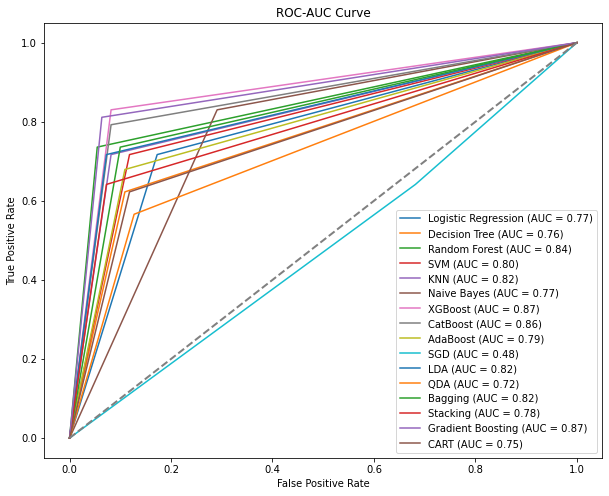

In [296]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_llrros),
    ('Decision Tree', y_pred_lrosdt),
    ('Random Forest', y_pred_lrosrf),
    ('SVM', y_pred_lrossvc),
    ('KNN', y_pred_lrosknn),
    ('Naive Bayes', y_pred_lrosnb),
    ('XGBoost', y_pred_lrosxgb),
    ('CatBoost', y_pred_lroscb),
    ('AdaBoost', y_pred_lrosab),
    ('SGD', y_pred_lrossgd),
    ('LDA', y_pred_lroslda),
    ('QDA', y_pred_lrosqda),
    ('Bagging', y_pred_lrosbg),
    ('Stacking', y_pred_lrosst),
    ('Gradient Boosting', y_pred_lrosgb),
    ('CART', y_pred_lroscart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [297]:
#Borderline SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter


# Check the class distribution before Borderline-SMOTE
print("Class distribution before Borderline-SMOTE:", Counter(y_train))

# Create a BorderlineSMOTE object
borderline_smotel = BorderlineSMOTE(random_state=42, kind="borderline-1")  # You can choose "borderline-1" or "borderline-2" as the kind

# Fit and apply Borderline-SMOTE to the training data
X_train_resampledlbs, y_train_resampledlbs = borderline_smotel.fit_resample(X_train, y_train)

# Check the class distribution after Borderline-SMOTE
print("Class distribution after Borderline-SMOTE:", Counter(y_train_resampledlbs))


Class distribution before Borderline-SMOTE: Counter({0: 254, 1: 124})
Class distribution after Borderline-SMOTE: Counter({1: 254, 0: 254})


In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modellbslr = LogisticRegression()

# Train the model on the training data
modellbslr.fit(X_train_resampledlbs, y_train_resampledlbs)

# Make predictions on the test data
y_pred_lbslr = modellbslr.predict(X_test)

# Evaluate the model
accuracy_lbslr = accuracy_score(y_test, y_pred_lbslr)
confusion_lbslr = confusion_matrix(y_test, y_pred_lbslr)
classification_rep_lbslr = classification_report(y_test, y_pred_lbslr)

# Print the evaluation metrics
print("Accuracy:", accuracy_lbslr)
print("Confusion Matrix:\n", confusion_lbslr)
print("Classification Report:\n", classification_rep_lbslr)

Accuracy: 0.8159509202453987
Confusion Matrix:
 [[91 19]
 [11 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       110
           1       0.69      0.79      0.74        53

    accuracy                           0.82       163
   macro avg       0.79      0.81      0.80       163
weighted avg       0.83      0.82      0.82       163



In [299]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treelbsdt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treelbsdt.fit(X_train_resampledlbs, y_train_resampledlbs)

# Make predictions on the test data
y_pred_lbsdt = decision_treelbsdt.predict(X_test)

# Evaluate the classifier's performance
accuracy_lbsdt = accuracy_score(y_test, y_pred_lbsdt)
print("Accuracy:", accuracy_lbsdt)

# Print classification report for more detailed evaluation
report_lbsdt = classification_report(y_test, y_pred_lbsdt)
print("Classification Report:\n", report_lbsdt)

Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       110
           1       0.70      0.83      0.76        53

    accuracy                           0.83       163
   macro avg       0.80      0.83      0.81       163
weighted avg       0.84      0.83      0.83       163



In [300]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestlbsrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestlbsrf.fit(X_train_resampledlbs, y_train_resampledlbs)

# Make predictions on the test data
y_pred_lbsrf = random_forestlbsrf.predict(X_test)

# Evaluate the classifier's performance
accuracy_lbsrf = accuracy_score(y_test, y_pred_lbsrf)
print("Accuracy:", accuracy_lbsrf)

# Print classification report for more detailed evaluation
report_lbsrf = classification_report(y_test, y_pred_lbsrf)
print("Classification Report:\n", report_lbsrf)


Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       110
           1       0.79      0.77      0.78        53

    accuracy                           0.86       163
   macro avg       0.84      0.84      0.84       163
weighted avg       0.86      0.86      0.86       163



In [301]:

#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifierlbssvc = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifierlbssvc.fit(X_train_resampledlbs, y_train_resampledlbs)

# Make predictions on the test data
y_pred_lbssvc = svm_classifierlbssvc.predict(X_test)

# Evaluate the classifier's performance
accuracy_lbssvc = accuracy_score(y_test, y_pred_lbssvc)
print("Accuracy:", accuracy_lbssvc)

# Print classification report for more detailed evaluation
report_lbssvc = classification_report(y_test, y_pred_lbssvc)
print("Classification Report:\n", report_lbssvc)

Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       110
           1       0.76      0.72      0.74        53

    accuracy                           0.83       163
   macro avg       0.81      0.80      0.81       163
weighted avg       0.83      0.83      0.83       163



In [302]:

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scalerlbsknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_lbsknn = scaler.fit_transform(X_train_resampledlbs)
X_test_scaled_lbsknn = scaler.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifierlbsknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifierlbsknn.fit(X_train_scaled_lbsknn, y_train_resampledlbs)
y_pred_lbsknn = knn_classifierlbsknn.predict(X_test_scaled_lbsknn)

#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifierlbsknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifierlbsknn.fit(X_train_scaled_lbsknn, y_train_resampledlbs)

# Make predictions on the test data
y_pred_lbsknn = knn_classifierlbsknn.predict(X_test_scaled_lbsknn)

# Evaluate the classifier's performance
accuracy_lbsknn = accuracy_score(y_test, y_pred_lbsknn)
print("Accuracy:", accuracy_lbsknn)

# Print classification report for more detailed evaluation
report_lbsknn = classification_report(y_test, y_pred_lbsknn)
print("Classification Report:\n", report_lbsknn)

Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       110
           1       0.70      0.81      0.75        53

    accuracy                           0.83       163
   macro avg       0.80      0.82      0.81       163
weighted avg       0.84      0.83      0.83       163



In [303]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifierlbsnb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifierlbsnb.fit(X_train_resampledlbs, y_train_resampledlbs)

# Make predictions on the test data
y_pred_lbsnb = naive_bayes_classifierlbsnb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lbsnb = accuracy_score(y_test, y_pred_lbsnb)
print("Accuracy:", accuracy_lbsnb)

# Print classification report for more detailed evaluation
report_lbsnb = classification_report(y_test, y_pred_lbsnb)
print("Classification Report:\n", report_lbsnb)

Accuracy: 0.7423312883435583
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79       110
           1       0.57      0.83      0.68        53

    accuracy                           0.74       163
   macro avg       0.73      0.77      0.73       163
weighted avg       0.79      0.74      0.75       163



In [304]:

#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifierlbsxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifierlbsxgb.fit(X_train_resampledlbs, y_train_resampledlbs)

# Make predictions on the test data
y_pred_lbsxgb = xgb_classifierlbsxgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lbsxgb = accuracy_score(y_test, y_pred_lbsxgb)
print("Accuracy:", accuracy_lbsxgb)

# Print classification report for more detailed evaluation
report_lbsxgb = classification_report(y_test, y_pred_lbsxgb)
print("Classification Report:\n", report_lbsxgb)

Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       110
           1       0.81      0.81      0.81        53

    accuracy                           0.88       163
   macro avg       0.86      0.86      0.86       163
weighted avg       0.88      0.88      0.88       163



In [305]:

#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifierlbscb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifierlbscb.fit(X_train_resampledlbs, y_train_resampledlbs)

# Make predictions on the test data
y_pred_lbscb = catboost_classifierlbscb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lbscb = accuracy_score(y_test, y_pred_lbscb)
print("Accuracy:", accuracy_lbscb)

# Print classification report for more detailed evaluation
report_lbscb = classification_report(y_test, y_pred_lbscb)
print("Classification Report:\n", report_lbscb)

Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       110
           1       0.77      0.77      0.77        53

    accuracy                           0.85       163
   macro avg       0.83      0.83      0.83       163
weighted avg       0.85      0.85      0.85       163



In [306]:

#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifierlbsab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifierlbsab = AdaBoostClassifier(base_classifierlbsab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifierlbsab.fit(X_train_resampledlbs, y_train_resampledlbs)

# Make predictions on the test data
y_pred_lbsab = adaboost_classifierlbsab.predict(X_test)

# Evaluate the classifier's performance
accuracy_lbsab = accuracy_score(y_test, y_pred_lbsab)
print("Accuracy:", accuracy_lbsab)

# Print classification report for more detailed evaluation
report_lbsab = classification_report(y_test, y_pred_lbsab)
print("Classification Report:\n", report_lbsab)

Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       110
           1       0.77      0.68      0.72        53

    accuracy                           0.83       163
   macro avg       0.81      0.79      0.80       163
weighted avg       0.83      0.83      0.83       163



In [307]:

#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifierlbssgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifierlbssgd.fit(X_train_resampledlbs, y_train_resampledlbs)

# Make predictions on the test data
y_pred_lbssgd = sgd_classifierlbssgd.predict(X_test)

# Evaluate the classifier's performance
accuracy_lbssgd = accuracy_score(y_test, y_pred_lbssgd)
print("Accuracy:", accuracy_lbssgd)

# Print classification report for more detailed evaluation
report_lbssgd = classification_report(y_test, y_pred_lbssgd)
print("Classification Report:\n", report_lbssgd)

Accuracy: 0.5521472392638037
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.44      0.57       110
           1       0.40      0.79      0.54        53

    accuracy                           0.55       163
   macro avg       0.61      0.61      0.55       163
weighted avg       0.68      0.55      0.56       163



In [308]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifierlbslda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifierlbslda.fit(X_train_resampledlbs, y_train_resampledlbs)

# Make predictions on the test data
y_pred_lbslda = lda_classifierlbslda.predict(X_test)

# Evaluate the classifier's performance
accuracy_lbslda = accuracy_score(y_test, y_pred_lbslda)
print("Accuracy:", accuracy_lbslda)

# Print classification report for more detailed evaluation
report_lbslda = classification_report(y_test, y_pred_lbslda)
print("Classification Report:\n", report_lbslda)

Accuracy: 0.8404907975460123
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       110
           1       0.75      0.77      0.76        53

    accuracy                           0.84       163
   macro avg       0.82      0.82      0.82       163
weighted avg       0.84      0.84      0.84       163



In [309]:

#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifierlbsqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifierlbsqda.fit(X_train_resampledlbs, y_train_resampledlbs)

# Make predictions on the test data
y_pred_lbsqda = qda_classifierlbsqda.predict(X_test)

# Evaluate the classifier's performance
accuracy_lbsqda = accuracy_score(y_test, y_pred_lbsqda)
print("Accuracy:", accuracy_lbsqda)

# Print classification report for more detailed evaluation
report_lbsqda = classification_report(y_test, y_pred_lbsqda)
print("Classification Report:\n", report_lbsqda)

Accuracy: 0.7730061349693251
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.68      0.57      0.62        53

    accuracy                           0.77       163
   macro avg       0.74      0.72      0.73       163
weighted avg       0.77      0.77      0.77       163



In [310]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifierlbsbg = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifierlbsbg = BaggingClassifier(base_classifierlbsbg, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifierlbsbg.fit(X_train_resampledlbs, y_train_resampledlbs)

# Make predictions on the test data
y_pred_lbsbg = bagging_classifierlbsbg.predict(X_test)

# Evaluate the classifier's performance
accuracy_lbsbg = accuracy_score(y_test, y_pred_lbsbg)
print("Accuracy:", accuracy_lbsbg)

# Print classification report for more detailed evaluation
report_lbsbg = classification_report(y_test, y_pred_lbsbg)
print("Classification Report:\n", report_lbsbg)


Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       110
           1       0.74      0.75      0.75        53

    accuracy                           0.83       163
   macro avg       0.81      0.81      0.81       163
weighted avg       0.84      0.83      0.83       163



In [311]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifierslbsst = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifierlbsst = StackingClassifier(
    estimators=base_classifierslbsst,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifierlbsst.fit(X_train_resampledlbs, y_train_resampledlbs)

# Make predictions on the test data
y_pred_lbsst = stacking_classifierlbsst.predict(X_test)

# Evaluate the classifier's performance
accuracy_lbsst = accuracy_score(y_test, y_pred_lbsst)
print("Accuracy:", accuracy_lbsst)

# Print classification report for more detailed evaluation
report_lbsst = classification_report(y_test, y_pred_lbsst)
print("Classification Report:\n", report_lbsst)

Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       110
           1       0.77      0.81      0.79        53

    accuracy                           0.86       163
   macro avg       0.84      0.85      0.84       163
weighted avg       0.86      0.86      0.86       163



In [312]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifierlbsgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifierlbsgb.fit(X_train_resampledlbs, y_train_resampledlbs)

# Make predictions on the test data
y_pred_lbsgb = gb_classifierlbsgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lbsgb = accuracy_score(y_test, y_pred_lbsgb)
print("Accuracy (Gradient Boosting):", accuracy_lbsgb)

# Print classification report for more detailed evaluation
report_lbsgb = classification_report(y_test, y_pred_lbsgb)
print("Classification Report (Gradient Boosting):\n", report_lbsgb)

Accuracy (Gradient Boosting): 0.8773006134969326
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       110
           1       0.81      0.81      0.81        53

    accuracy                           0.88       163
   macro avg       0.86      0.86      0.86       163
weighted avg       0.88      0.88      0.88       163



In [313]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifierlbscart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifierlbscart.fit(X_train_resampledlbs, y_train_resampledlbs)

# Make predictions on the test data
y_pred_lbscart = cart_classifierlbscart.predict(X_test)

# Evaluate the classifier's performance
accuracy_lbscart = accuracy_score(y_test, y_pred_lbscart)
print("Accuracy:", accuracy_lbscart)

# Print classification report for more detailed evaluation
report_lbscart = classification_report(y_test, y_pred_lbscart)
print("Classification Report:\n", report_lbscart)


Accuracy: 0.8098159509202454
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       110
           1       0.68      0.79      0.73        53

    accuracy                           0.81       163
   macro avg       0.78      0.81      0.79       163
weighted avg       0.82      0.81      0.81       163



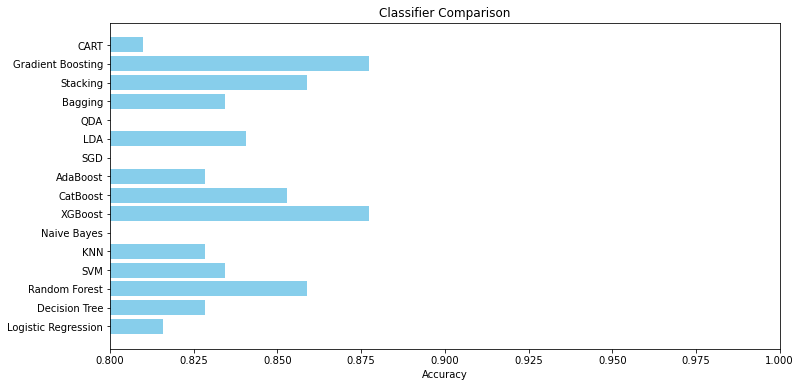

In [314]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_lbslr, accuracy_lbsdt, accuracy_lbsrf, accuracy_lbssvc, accuracy_lbsknn, accuracy_lbsnb, accuracy_lbsxgb, accuracy_lbscb, accuracy_lbsab, accuracy_lbssgd, accuracy_lbslda, accuracy_lbsqda, accuracy_lbsbg, accuracy_lbsst, accuracy_lbsgb, accuracy_lbscart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


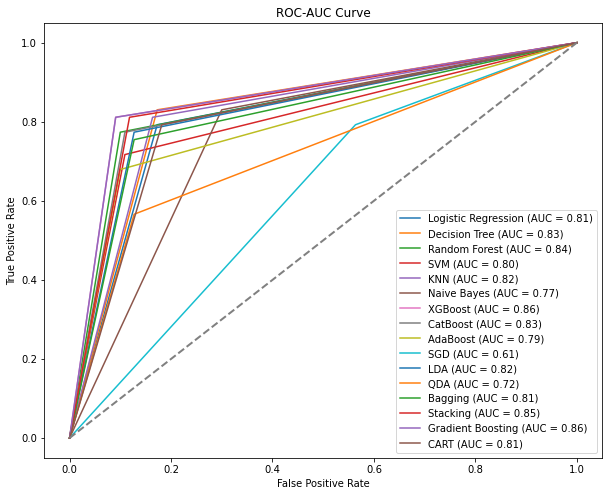

In [315]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_lbslr),
    ('Decision Tree', y_pred_lbsdt),
    ('Random Forest', y_pred_lbsrf),
    ('SVM', y_pred_lbssvc),
    ('KNN', y_pred_lbsknn),
    ('Naive Bayes', y_pred_lbsnb),
    ('XGBoost', y_pred_lbsxgb),
    ('CatBoost', y_pred_lbscb),
    ('AdaBoost', y_pred_lbsab),
    ('SGD', y_pred_lbssgd),
    ('LDA', y_pred_lbslda),
    ('QDA', y_pred_lbsqda),
    ('Bagging', y_pred_lbsbg),
    ('Stacking', y_pred_lbsst),
    ('Gradient Boosting', y_pred_lbsgb),
    ('CART', y_pred_lbscart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [316]:
#RUSBoost
from imblearn.ensemble import RUSBoostClassifier
from collections import Counter

# Check the class distribution before RUSBoost
print("Class distribution before RUSBoost:", Counter(y_train))

# Create an RUSBoostClassifier object
lrusboost = RUSBoostClassifier(n_estimators=50, random_state=42)

# Fit the RUSBoostClassifier on the training data
lrusboost.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lrub = lrusboost.predict(X_test)

# Check the class distribution after RUSBoost (it might differ slightly)
print("Class distribution after RUSBoost:", Counter(y_pred_lrub))


Class distribution before RUSBoost: Counter({0: 254, 1: 124})
Class distribution after RUSBoost: Counter({0: 114, 1: 49})


In [317]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a Logistic Regression model
logistic_regressionlrublr = LogisticRegression(random_state=42)

# Fit the Logistic Regression model on the resampled training data
logistic_regressionlrublr.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lrublr = logistic_regressionlrublr.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lrublr = accuracy_score(y_test, y_pred_lrublr)
print("Accuracy:", accuracy_lrublr)

# Print classification report for more detailed evaluation
report_lrublr = classification_report(y_test, y_pred_lrublr)
print("Classification Report:\n", report_lrublr)


Accuracy: 0.7975460122699386
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.71      0.64      0.67        53

    accuracy                           0.80       163
   macro avg       0.77      0.76      0.76       163
weighted avg       0.79      0.80      0.79       163



In [318]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treelrubdt= DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treelrubdt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lrubds = decision_treelrubdt.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrubds = accuracy_score(y_test, y_pred_lrubds)
print("Accuracy:", accuracy_lrubds)

# Print classification report for more detailed evaluation
report_lrubds = classification_report(y_test, y_pred_lrubds)
print("Classification Report:\n", report_lrubds)

Accuracy: 0.803680981595092
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.71      0.66      0.69        53

    accuracy                           0.80       163
   macro avg       0.78      0.77      0.77       163
weighted avg       0.80      0.80      0.80       163



In [319]:

#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestlrubrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestlrubrf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lrubrf = random_forestlrubrf.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrubrf = accuracy_score(y_test, y_pred_lrubrf)
print("Accuracy:", accuracy_lrubrf)

# Print classification report for more detailed evaluation
report_lrubrf = classification_report(y_test, y_pred_lrubrf)
print("Classification Report:\n", report_lrubrf)

Accuracy: 0.8895705521472392
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       110
           1       0.91      0.74      0.81        53

    accuracy                           0.89       163
   macro avg       0.90      0.85      0.87       163
weighted avg       0.89      0.89      0.89       163



In [320]:

#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifierlrubsvc = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifierlrubsvc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lrubsvc = svm_classifierlrubsvc.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrubsvc = accuracy_score(y_test, y_pred_lrubsvc)
print("Accuracy:", accuracy_lrubsvc)

# Print classification report for more detailed evaluation
report_lrubsvc = classification_report(y_test, y_pred_lrubsvc)
print("Classification Report:\n", report_lrubsvc)

Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       110
           1       0.77      0.70      0.73        53

    accuracy                           0.83       163
   macro avg       0.82      0.80      0.81       163
weighted avg       0.83      0.83      0.83       163



In [321]:

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scalerlrubknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_lrubknn = scaler.fit_transform(X_train)
X_test_scaled_lrubknn = scaler.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifierlrubknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifierlrubknn.fit(X_train_scaled_lrubknn, y_train)
y_pred_lrubknn = knn_classifierlrubknn.predict(X_test_scaled_lrubknn)

#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifierlrubknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifierlrubknn.fit(X_train_scaled_lrubknn, y_train)

# Make predictions on the test data
y_pred_lrubknn = knn_classifierlrubknn.predict(X_test_scaled_lrubknn)

# Evaluate the classifier's performance
accuracy_lrubknn = accuracy_score(y_test, y_pred_lrubknn)
print("Accuracy:", accuracy_lrubknn)

# Print classification report for more detailed evaluation
report_lrubknn = classification_report(y_test, y_pred_lrubknn)
print("Classification Report:\n", report_lrubknn)

Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       110
           1       0.89      0.60      0.72        53

    accuracy                           0.85       163
   macro avg       0.86      0.78      0.81       163
weighted avg       0.85      0.85      0.84       163



In [322]:

#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifierlrubnb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifierlrubnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lrubnb = naive_bayes_classifierlrubnb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrubnb = accuracy_score(y_test, y_pred_lrubnb)
print("Accuracy:", accuracy_lrubnb)

# Print classification report for more detailed evaluation
report_lrubnb = classification_report(y_test, y_pred_lrubnb)
print("Classification Report:\n", report_lrubnb)

Accuracy: 0.7791411042944786
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82       110
           1       0.62      0.83      0.71        53

    accuracy                           0.78       163
   macro avg       0.76      0.79      0.77       163
weighted avg       0.81      0.78      0.79       163



In [323]:

#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifierlrubxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifierlrubxgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lrubxgb = xgb_classifierlrubxgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrubxgb = accuracy_score(y_test, y_pred_lrubxgb)
print("Accuracy:", accuracy_lrubxgb)

# Print classification report for more detailed evaluation
report_lrubxgb = classification_report(y_test, y_pred_lrubxgb)
print("Classification Report:\n", report_lrubxgb)

Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       110
           1       0.84      0.77      0.80        53

    accuracy                           0.88       163
   macro avg       0.87      0.85      0.86       163
weighted avg       0.88      0.88      0.88       163



In [324]:

#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifierlrubcb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifierlrubcb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lrubcb = catboost_classifierlrubcb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrubcb = accuracy_score(y_test, y_pred_lrubcb)
print("Accuracy:", accuracy_lrubcb)

# Print classification report for more detailed evaluation
report_lrubcb = classification_report(y_test, y_pred_lrubcb)
print("Classification Report:\n", report_lrubcb)

Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       110
           1       0.82      0.79      0.81        53

    accuracy                           0.88       163
   macro avg       0.86      0.86      0.86       163
weighted avg       0.88      0.88      0.88       163



In [325]:

#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifierlrubab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifierlrubab = AdaBoostClassifier(base_classifier, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifierlrubab.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lrubab = adaboost_classifierlrubab.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrubab = accuracy_score(y_test, y_pred_lrubab)
print("Accuracy:", accuracy_lrubab)

# Print classification report for more detailed evaluation
report_lrubab = classification_report(y_test, y_pred_lrubab)
print("Classification Report:\n", report_lrubab)

Accuracy: 0.8404907975460123
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       110
           1       0.81      0.66      0.73        53

    accuracy                           0.84       163
   macro avg       0.83      0.79      0.81       163
weighted avg       0.84      0.84      0.84       163



In [326]:

#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifierlrubsgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifierlrubsgd.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lrubsgd = sgd_classifierlrubsgd.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrubsgd = accuracy_score(y_test, y_pred_lrubsgd)
print("Accuracy:", accuracy_lrubsgd)

# Print classification report for more detailed evaluation
report_lrubsgd = classification_report(y_test, y_pred_lrubsgd)
print("Classification Report:\n", report_lrubsgd)

Accuracy: 0.49079754601226994
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.49      0.57       110
           1       0.32      0.49      0.39        53

    accuracy                           0.49       163
   macro avg       0.49      0.49      0.48       163
weighted avg       0.55      0.49      0.51       163



In [327]:

#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifierlrublda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifierlrublda.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lrublda = lda_classifierlrublda.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrublda = accuracy_score(y_test, y_pred_lrublda)
print("Accuracy:", accuracy_lrublda)

# Print classification report for more detailed evaluation
report_lrublda = classification_report(y_test, y_pred_lrublda)
print("Classification Report:\n", report_lrublda)

Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       110
           1       0.84      0.70      0.76        53

    accuracy                           0.86       163
   macro avg       0.85      0.82      0.83       163
weighted avg       0.86      0.86      0.86       163



In [328]:

#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifierlrubqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifierlrubqda.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lrubqda = qda_classifierlrubqda.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrubqda = accuracy_score(y_test, y_pred_lrubqda)
print("Accuracy:", accuracy_lrubqda)

# Print classification report for more detailed evaluation
report_lrubqda = classification_report(y_test, y_pred_lrubqda)
print("Classification Report:\n", report_lrubqda)

Accuracy: 0.7791411042944786
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.69      0.58      0.63        53

    accuracy                           0.78       163
   macro avg       0.75      0.73      0.74       163
weighted avg       0.77      0.78      0.77       163



In [329]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifierlrubbg = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifierlrubbg = BaggingClassifier(base_classifierlrubbg, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifierlrubbg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lrubbg = bagging_classifierlrubbg.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrubbg = accuracy_score(y_test, y_pred_lrubbg)
print("Accuracy:", accuracy_lrubbg)

# Print classification report for more detailed evaluation
report_lrubbg = classification_report(y_test, y_pred_lrubbg)
print("Classification Report:\n", report_lrubbg)


Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       110
           1       0.84      0.77      0.80        53

    accuracy                           0.88       163
   macro avg       0.87      0.85      0.86       163
weighted avg       0.88      0.88      0.88       163



In [330]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifierslrubst = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifierlrubst = StackingClassifier(
    estimators=base_classifierslrubst,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifierlrubst.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lrubst = stacking_classifierlrubst.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrubst = accuracy_score(y_test, y_pred_lrubst)
print("Accuracy:", accuracy_lrubst)

# Print classification report for more detailed evaluation
report_lrubst = classification_report(y_test, y_pred_lrubst)
print("Classification Report:\n", report_lrubst)


Accuracy: 0.8834355828220859
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       110
           1       0.83      0.81      0.82        53

    accuracy                           0.88       163
   macro avg       0.87      0.86      0.87       163
weighted avg       0.88      0.88      0.88       163



In [331]:

#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifierlrubgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifierlrubgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lrubgb = gb_classifierlrubgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrubgb = accuracy_score(y_test, y_pred_lrubgb)
print("Accuracy (Gradient Boosting):", accuracy_lrubgb)

# Print classification report for more detailed evaluation
report_lrubgb = classification_report(y_test, y_pred_lrubgb)
print("Classification Report (Gradient Boosting):\n", report_lrubgb)

Accuracy (Gradient Boosting): 0.8895705521472392
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       110
           1       0.84      0.81      0.83        53

    accuracy                           0.89       163
   macro avg       0.88      0.87      0.87       163
weighted avg       0.89      0.89      0.89       163



In [332]:

#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifierlrubcart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifierlrubcart.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lrubcart = cart_classifierlrubcart.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrubcart = accuracy_score(y_test, y_pred_lrubcart)
print("Accuracy:", accuracy_lrubcart)

# Print classification report for more detailed evaluation
report_lrubcart = classification_report(y_test, y_pred_lrubcart)
print("Classification Report:\n", report_lrubcart)

Accuracy: 0.8220858895705522
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.75      0.68      0.71        53

    accuracy                           0.82       163
   macro avg       0.80      0.79      0.79       163
weighted avg       0.82      0.82      0.82       163



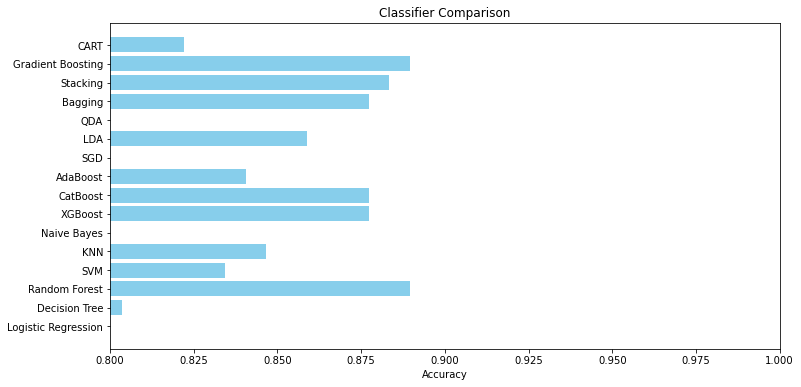

In [333]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_lrublr, accuracy_lrubds, accuracy_lrubrf, accuracy_lrubsvc, accuracy_lrubknn, accuracy_lrubnb, accuracy_lrubxgb, accuracy_lrubcb, accuracy_lrubab, accuracy_lrubsgd, accuracy_lrublda, accuracy_lrubqda, accuracy_lrubbg, accuracy_lrubst, accuracy_lrubgb, accuracy_lrubcart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


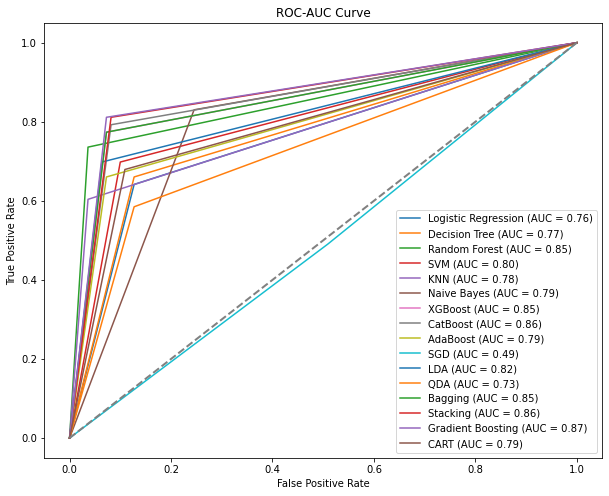

In [334]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_lrublr),
    ('Decision Tree', y_pred_lrubds),
    ('Random Forest', y_pred_lrubrf),
    ('SVM', y_pred_lrubsvc),
    ('KNN', y_pred_lrubknn),
    ('Naive Bayes', y_pred_lrubnb),
    ('XGBoost', y_pred_lrubxgb),
    ('CatBoost', y_pred_lrubcb),
    ('AdaBoost', y_pred_lrubab),
    ('SGD', y_pred_lrubsgd),
    ('LDA', y_pred_lrublda),
    ('QDA', y_pred_lrubqda),
    ('Bagging', y_pred_lrubbg),
    ('Stacking', y_pred_lrubst),
    ('Gradient Boosting', y_pred_lrubgb),
    ('CART', y_pred_lrubcart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [335]:
#RFE using logistic reg
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
rfe = RFE(estimator=logreg, n_features_to_select=10)  # Adjust the number of selected features as per your requirement
rfe.fit(X_train, y_train)  # X is your feature matrix, and y is the target variable



RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [336]:
selected_featureslr = X_train.columns[rfe.support_]
selected_featureslr


Index(['Cycle(R/I)', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)'],
      dtype='object')

In [337]:
#SMOTE

from imblearn.over_sampling import SMOTE
from collections import Counter

# Step 3: Apply SMOTE to balance the dataset
smotelr = SMOTE(random_state=100)
X_train_resampledlrsmo, y_train_resampledlrsmo = smote.fit_resample(X_train[selected_featureslr], y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampledlrsmo))
print("Class distribution before SMOTE:", Counter(y_train))



Class distribution after SMOTE: Counter({1: 254, 0: 254})
Class distribution before SMOTE: Counter({0: 254, 1: 124})


In [338]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 3: Fit a Logistic Regression model
logistic_reg_modellrsmolr = LogisticRegression(random_state=42)

# Fit the model on the resampled training data
logistic_reg_modellrsmolr.fit(X_train_resampledlrsmo, y_train_resampledlrsmo)


# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedlrsmolr = X_test[X_train_resampledlrsmo.columns]

# Now you can make predictions on X_test_reordered
y_pred_lrsmolr = logistic_reg_modellrsmolr.predict(X_test_reorderedlrsmolr)

# Step 5: Evaluate the model's performance
accuracy_lrsmolr = accuracy_score(y_test, y_pred_lrsmolr)
classification_report_lrsmolr = classification_report(y_test, y_pred_lrsmolr)

# Print the results
print("Accuracy:", accuracy_lrsmolr)
print("Classification Report:\n", classification_report_lrsmolr)


Accuracy: 0.8650306748466258
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90       110
           1       0.76      0.85      0.80        53

    accuracy                           0.87       163
   macro avg       0.84      0.86      0.85       163
weighted avg       0.87      0.87      0.87       163



In [339]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Decision Tree Classifier
decision_tree_classifierlrsmodt = DecisionTreeClassifier(random_state=42)

# Step 2: Fit the Decision Tree model on the balanced and feature-selected training data
decision_tree_classifierlrsmodt.fit(X_train_resampledlrsmo, y_train_resampledlrsmo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedlrsmodt = X_test[X_train_resampledlrsmo.columns]

# Step 3: Make predictions on the test data
y_pred_lrsmodt = decision_tree_classifierlrsmodt.predict(X_test_reorderedlrsmodt)

# Step 4: Evaluate the model's performance
accuracy_lrsmodt = accuracy_score(y_test, y_pred_lrsmodt)
classification_report_lrsmodt = classification_report(y_test, y_pred_lrsmodt)

# Step 5: Print the results
print("Decision Tree Classifier Accuracy:", accuracy_lrsmodt)
print("Classification Report for Decision Tree:\n", classification_report_lrsmodt)


Decision Tree Classifier Accuracy: 0.8404907975460123
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       110
           1       0.73      0.81      0.77        53

    accuracy                           0.84       163
   macro avg       0.82      0.83      0.82       163
weighted avg       0.85      0.84      0.84       163



In [340]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Random Forest Classifier
random_forest_classifierlrsmorf = RandomForestClassifier(random_state=42)

# Step 2: Fit the Random Forest model on the balanced and feature-selected training data
random_forest_classifierlrsmorf.fit(X_train_resampledlrsmo, y_train_resampledlrsmo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedlrsmorf = X_test[X_train_resampledlrsmo.columns]

# Step 3: Make predictions on the test data
y_pred_lrsmorf = random_forest_classifierlrsmorf.predict(X_test_reorderedlrsmorf)

# Step 4: Evaluate the model's performance
accuracy_lrsmorf = accuracy_score(y_test, y_pred_lrsmorf)
classification_report_lrsmorf = classification_report(y_test, y_pred_lrsmorf)

# Step 5: Print the results
print("Random Forest Classifier Accuracy:", accuracy_lrsmorf)
print("Classification Report for Random Forest:\n", classification_report_lrsmorf)


Random Forest Classifier Accuracy: 0.8895705521472392
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       110
           1       0.83      0.83      0.83        53

    accuracy                           0.89       163
   macro avg       0.87      0.87      0.87       163
weighted avg       0.89      0.89      0.89       163



In [341]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an SVM Classifier
svm_classifierlrsmosvc = SVC(random_state=42)

# Step 2: Fit the SVM model on the balanced and feature-selected training data
svm_classifierlrsmosvc.fit(X_train_resampledlrsmo, y_train_resampledlrsmo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedlrsmosvc = X_test[X_train_resampledlrsmo.columns]

# Step 3: Make predictions on the test data
y_pred_lrsmosvc = svm_classifierlrsmosvc.predict(X_test_reorderedlrsmosvc)

# Step 4: Evaluate the model's performance
accuracy_lrsmosvc = accuracy_score(y_test, y_pred_lrsmosvc)
classification_report_lrsmosvc = classification_report(y_test, y_pred_lrsmosvc)

# Step 5: Print the results
print("SVM Classifier Accuracy:", accuracy_lrsmosvc)
print("Classification Report for SVM:\n", classification_report_lrsmosvc)


SVM Classifier Accuracy: 0.8711656441717791
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       110
           1       0.78      0.85      0.81        53

    accuracy                           0.87       163
   macro avg       0.85      0.87      0.86       163
weighted avg       0.88      0.87      0.87       163



In [342]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a KNN Classifier
knn_classifierlrsmoknn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Step 2: Fit the KNN model on the balanced and feature-selected training data
knn_classifierlrsmoknn.fit(X_train_resampledlrsmo, y_train_resampledlrsmo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedlrsmoknn = X_test[X_train_resampledlrsmo.columns]


# Step 3: Make predictions on the test data
y_pred_lrsmoknn = knn_classifierlrsmoknn.predict(X_test_reorderedlrsmoknn)

# Step 4: Evaluate the model's performance
accuracy_lrsmoknn = accuracy_score(y_test, y_pred_lrsmoknn)
classification_report_lrsmoknn = classification_report(y_test, y_pred_lrsmoknn)

# Step 5: Print the results
print("KNN Classifier Accuracy:", accuracy_lrsmoknn)
print("Classification Report for KNN:\n", classification_report_lrsmoknn)


KNN Classifier Accuracy: 0.8588957055214724
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       110
           1       0.78      0.79      0.79        53

    accuracy                           0.86       163
   macro avg       0.84      0.84      0.84       163
weighted avg       0.86      0.86      0.86       163



In [343]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Naive Bayes Classifier (GaussianNB for continuous features)
naive_bayes_classifierlrsmonb = GaussianNB()

# Step 2: Fit the Naive Bayes model on the balanced and feature-selected training data
naive_bayes_classifierlrsmonb.fit(X_train_resampledlrsmo, y_train_resampledlrsmo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedlrsmonb = X_test[X_train_resampledlrsmo.columns]


# Step 3: Make predictions on the test data
y_pred_lrsmonb = naive_bayes_classifierlrsmonb.predict(X_test_reorderedlrsmonb)

# Step 4: Evaluate the model's performance
accuracy_lrsmonb = accuracy_score(y_test, y_pred_lrsmonb)
classification_report_lrsmonb = classification_report(y_test, y_pred_lrsmonb)

# Step 5: Print the results
print("Naive Bayes Classifier Accuracy:", accuracy_lrsmonb)
print("Classification Report for Naive Bayes:\n", classification_report_lrsmonb)


Naive Bayes Classifier Accuracy: 0.8895705521472392
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92       110
           1       0.80      0.89      0.84        53

    accuracy                           0.89       163
   macro avg       0.87      0.89      0.88       163
weighted avg       0.89      0.89      0.89       163



In [344]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an XGBoost Classifier
xgb_classifierlrsmoxgb = xgb.XGBClassifier(random_state=100)

# Step 2: Fit the XGBoost model on the balanced and feature-selected training data
xgb_classifierlrsmoxgb.fit(X_train_resampledlrsmo, y_train_resampledlrsmo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedlrsmoxgb = X_test[X_train_resampledlrsmo.columns]

# Step 3: Make predictions on the test data
y_pred_lrsmoxgb = xgb_classifierlrsmoxgb.predict(X_test_reorderedlrsmoxgb)

# Step 4: Evaluate the model's performance
accuracy_lrsmoxgb = accuracy_score(y_test, y_pred_lrsmoxgb)
classification_report_lrsmoxgb = classification_report(y_test, y_pred_lrsmoxgb)

# Step 5: Print the results
print("XGBoost Classifier Accuracy:", accuracy_lrsmoxgb)
print("Classification Report for XGBoost:\n", classification_report_lrsmoxgb)


XGBoost Classifier Accuracy: 0.8404907975460123
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       110
           1       0.74      0.79      0.76        53

    accuracy                           0.84       163
   macro avg       0.82      0.83      0.82       163
weighted avg       0.84      0.84      0.84       163



In [345]:

#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifierlrsmoab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifierlrsmoab = AdaBoostClassifier(base_classifierlrsmoab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifierlrsmoab.fit(X_train_resampledlrsmo, y_train_resampledlrsmo)

X_test_reorderedlrsmoab = X_test[X_train_resampledlrsmo.columns]

# Make predictions on the test data
y_pred_lrsmoab = adaboost_classifierlrsmoab.predict(X_test_reorderedlrsmoab)

# Evaluate the classifier's performance
accuracy_lrsmoab = accuracy_score(y_test, y_pred_lrsmoab)
print("Accuracy:", accuracy_lrsmoab)

# Print classification report for more detailed evaluation
report_lrsmoab = classification_report(y_test, y_pred_lrsmoab)
print("Classification Report:\n", report_lrsmoab)

Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       110
           1       0.77      0.77      0.77        53

    accuracy                           0.85       163
   macro avg       0.83      0.83      0.83       163
weighted avg       0.85      0.85      0.85       163



In [346]:
import catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
# Step 1: Create a CatBoost Classifier
catboost_classifierlrsmocb = CatBoostClassifier(iterations=1000,  # Number of boosting iterations
                                         depth=6,           # Depth of the trees
                                         learning_rate=0.1, # Learning rate
                                         loss_function='Logloss',  # Loss function for binary classification
                                         random_seed=100)   # Random seed for reproducibility
# Step 2: Fit the CatBoost model on the training data
catboost_classifierlrsmocb.fit(X_train_resampledlrsmo, y_train_resampledlrsmo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_reorderedlrsmocb = X_test[X_train_resampledlrsmo.columns]

# Step 3: Make predictions on the test data
y_pred_lrsmocb = catboost_classifierlrsmocb.predict(X_test_reorderedlrsmocb)
# Step 4: Evaluate the model's performance
accuracy_lrsmocb = accuracy_score(y_test, y_pred_lrsmocb)
classification_report_lrsmocb = classification_report(y_test, y_pred_lrsmocb)

# Step 5: Print the results
print("CatBoost Classifier Accuracy:", accuracy_lrsmocb)
print("Classification Report for CatBoost:\n", classification_report_lrsmocb)


0:	learn: 0.6108911	total: 4.05ms	remaining: 4.05s
1:	learn: 0.5413033	total: 7.3ms	remaining: 3.64s
2:	learn: 0.4746295	total: 10.6ms	remaining: 3.51s
3:	learn: 0.4339744	total: 13.5ms	remaining: 3.35s
4:	learn: 0.4052711	total: 16.6ms	remaining: 3.3s
5:	learn: 0.3681074	total: 19.7ms	remaining: 3.26s
6:	learn: 0.3465962	total: 22.5ms	remaining: 3.2s
7:	learn: 0.3256931	total: 25.7ms	remaining: 3.19s
8:	learn: 0.3110356	total: 28.5ms	remaining: 3.14s
9:	learn: 0.3018604	total: 31.7ms	remaining: 3.13s
10:	learn: 0.2871772	total: 34.5ms	remaining: 3.1s
11:	learn: 0.2731717	total: 37.5ms	remaining: 3.09s
12:	learn: 0.2676105	total: 40.6ms	remaining: 3.08s
13:	learn: 0.2586125	total: 43.5ms	remaining: 3.06s
14:	learn: 0.2501319	total: 46.4ms	remaining: 3.05s
15:	learn: 0.2398007	total: 49.6ms	remaining: 3.05s
16:	learn: 0.2321802	total: 52.6ms	remaining: 3.04s
17:	learn: 0.2278905	total: 55.7ms	remaining: 3.04s
18:	learn: 0.2224575	total: 58.8ms	remaining: 3.04s
19:	learn: 0.2148199	total

In [347]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train_resampledlrsmo and X_test have the same features
# Create an SGD Classifier
sgd_classifierlrsmosgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifierlrsmosgd.fit(X_train_resampledlrsmo, y_train_resampledlrsmo)

# Reset the feature names in X_test to match those used during training
X_testlrsmosgd = X_test[X_train_resampledlrsmo.columns]

# Make predictions on the test data
y_pred_lrsmosgd = sgd_classifierlrsmosgd.predict(X_testlrsmosgd)

# Evaluate the classifier's performance
accuracy_lrsmosgd = accuracy_score(y_test, y_pred_lrsmosgd)
print("Accuracy:", accuracy_lrsmosgd)

# Print classification report for more detailed evaluation
report_lrsmosgd = classification_report(y_test, y_pred_lrsmosgd)
print("Classification Report:\n", report_lrsmosgd)


Accuracy: 0.8159509202453987
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.77      0.85       110
           1       0.66      0.91      0.76        53

    accuracy                           0.82       163
   macro avg       0.80      0.84      0.81       163
weighted avg       0.85      0.82      0.82       163



In [348]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
# Step 1: Create an instance of the LDA model
ldalrsmolda = LinearDiscriminantAnalysis()
# Step 2: Fit the LDA model on the training data
ldalrsmolda.fit(X_train_resampledlrsmo, y_train_resampledlrsmo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_testlrsmolda = X_test[X_train_resampledlrsmo.columns]

# Step 3: Make predictions on the test data
y_pred_lrsmolda = ldalrsmolda.predict(X_testlrsmolda)
# Step 4: Evaluate the model's performance
accuracy_lrsmolda = accuracy_score(y_test, y_pred_lrsmolda)
classification_report_lrsmolda = classification_report(y_test, y_pred_lrsmolda)

# Step 5: Print the results
print("LDA Classifier Accuracy:", accuracy_lrsmolda)
print("Classification Report for LDA:\n", classification_report_lrsmolda)


LDA Classifier Accuracy: 0.8773006134969326
Classification Report for LDA:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       110
           1       0.80      0.83      0.81        53

    accuracy                           0.88       163
   macro avg       0.86      0.87      0.86       163
weighted avg       0.88      0.88      0.88       163



In [349]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
# Step 1: Create an instance of the QDA model
qdalrsmoqda = QuadraticDiscriminantAnalysis()
# Step 2: Fit the QDA model on the training data
qdalrsmoqda.fit(X_train_resampledlrsmo, y_train_resampledlrsmo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_testlrsmoqda = X_test[X_train_resampledlrsmo.columns]

# Step 3: Make predictions on the test data
y_pred_lrsmoqda = qdalrsmoqda.predict(X_testlrsmoqda)
# Step 4: Evaluate the model's performance
accuracy_lrsmoqda = accuracy_score(y_test, y_pred_lrsmoqda)
classification_report_lrsmoqda = classification_report(y_test, y_pred_lrsmoqda)

# Step 5: Print the results
print("QDA Classifier Accuracy:", accuracy_lrsmoqda)
print("Classification Report for QDA:\n", classification_report_lrsmoqda)


QDA Classifier Accuracy: 0.8650306748466258
Classification Report for QDA:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       110
           1       0.77      0.83      0.80        53

    accuracy                           0.87       163
   macro avg       0.84      0.86      0.85       163
weighted avg       0.87      0.87      0.87       163



In [350]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
# Step 1: Create an instance of the base model (Decision Tree Classifier)
base_modellrsmobg = DecisionTreeClassifier(random_state=42)
# Step 2: Create an instance of the BaggingClassifier
bagging_modellrsmobg = BaggingClassifier(base_modellrsmobg, n_estimators=100, random_state=42)
# Step 3: Fit the BaggingClassifier on the training data
bagging_modellrsmobg.fit(X_train_resampledlrsmo, y_train_resampledlrsmo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_testlrsmobg = X_test[X_train_resampledlrsmo.columns]


# Step 4: Make predictions on the test data
y_pred_lrsmobg = bagging_modellrsmobg.predict(X_testlrsmobg)
# Step 5: Evaluate the model's performance
accuracy_lrsmobg = accuracy_score(y_test, y_pred_lrsmobg)
classification_report_lrsmobg = classification_report(y_test, y_pred_lrsmobg)

# Step 6: Print the results
print("Bagging Classifier Accuracy:", accuracy_lrsmobg)
print("Classification Report for Bagging:\n", classification_report_lrsmobg)


Bagging Classifier Accuracy: 0.8834355828220859
Classification Report for Bagging:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       110
           1       0.80      0.85      0.83        53

    accuracy                           0.88       163
   macro avg       0.86      0.87      0.87       163
weighted avg       0.89      0.88      0.88       163



In [351]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifierslrsmost = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifierlrsmost = StackingClassifier(
    estimators=base_classifierslrsmost,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifierlrsmost.fit(X_train_resampledlrsmo, y_train_resampledlrsmo)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_testlrsmost = X_test[X_train_resampledlrsmo.columns]

# Make predictions on the test data
y_pred_lrsmost = stacking_classifierlrsmost.predict(X_testlrsmost)

# Evaluate the classifier's performance
accuracy_lrsmost = accuracy_score(y_test, y_pred_lrsmost)
print("Accuracy:", accuracy_lrsmost)

# Print classification report for more detailed evaluation
report_lrsmost = classification_report(y_test, y_pred_lrsmost)
print("Classification Report:\n", report_lrsmost)


Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91       110
           1       0.79      0.85      0.82        53

    accuracy                           0.88       163
   macro avg       0.86      0.87      0.86       163
weighted avg       0.88      0.88      0.88       163



In [352]:

#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifierlrsmogb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifierlrsmogb.fit(X_train_resampledlrsmo, y_train_resampledlrsmo)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_testlrsmogb = X_test[X_train_resampledlrsmo.columns]

# Make predictions on the test data
y_pred_lrsmogb = gb_classifierlrsmogb.predict(X_testlrsmogb)

# Evaluate the classifier's performance
accuracy_lrsmogb = accuracy_score(y_test, y_pred_lrsmogb)
print("Accuracy (Gradient Boosting):", accuracy_lrsmogb)

# Print classification report for more detailed evaluation
report_lrsmogb = classification_report(y_test, y_pred_lrsmogb)
print("Classification Report (Gradient Boosting):\n", report_lrsmogb)


Accuracy (Gradient Boosting): 0.8711656441717791
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       110
           1       0.79      0.83      0.81        53

    accuracy                           0.87       163
   macro avg       0.85      0.86      0.86       163
weighted avg       0.87      0.87      0.87       163



In [353]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifierlrsmocart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifierlrsmocart.fit(X_train_resampledlrsmo, y_train_resampledlrsmo)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_testlrsmocart = X_test[X_train_resampledlrsmo.columns]

# Make predictions on the test data
y_pred_lrsmocart = cart_classifierlrsmocart.predict(X_testlrsmocart)

# Evaluate the classifier's performance
accuracy_lrsmocart = accuracy_score(y_test, y_pred_lrsmocart)
print("Accuracy:", accuracy_lrsmocart)

# Print classification report for more detailed evaluation
report_lrsmocart = classification_report(y_test, y_pred_lrsmocart)
print("Classification Report:\n", report_lrsmocart)


Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       110
           1       0.75      0.85      0.80        53

    accuracy                           0.86       163
   macro avg       0.84      0.86      0.84       163
weighted avg       0.87      0.86      0.86       163



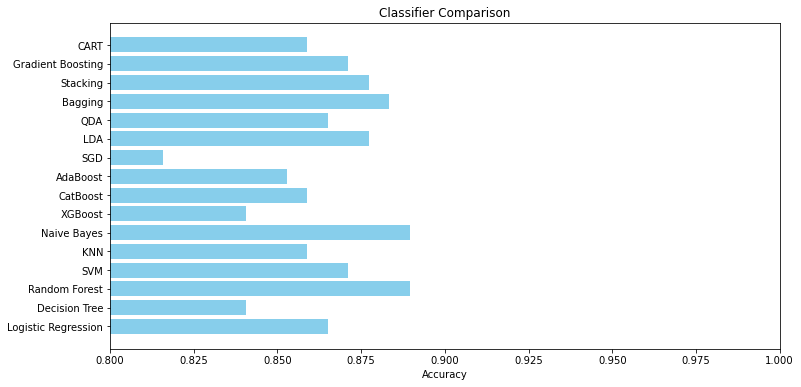

In [354]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_lrsmolr, accuracy_lrsmodt, accuracy_lrsmorf, accuracy_lrsmosvc, accuracy_lrsmoknn, accuracy_lrsmonb, accuracy_lrsmoxgb, accuracy_lrsmocb, accuracy_lrsmoab, accuracy_lrsmosgd, accuracy_lrsmolda, accuracy_lrsmoqda, accuracy_lrsmobg, accuracy_lrsmost, accuracy_lrsmogb, accuracy_lrsmocart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


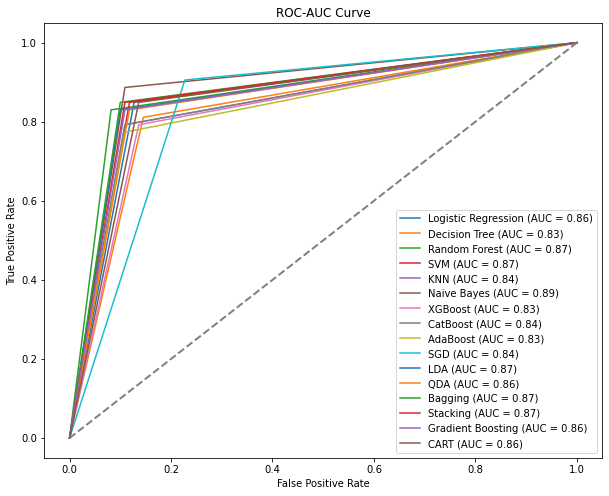

In [355]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_lrsmolr),
    ('Decision Tree', y_pred_lrsmodt),
    ('Random Forest', y_pred_lrsmorf),
    ('SVM', y_pred_lrsmosvc),
    ('KNN', y_pred_lrsmoknn),
    ('Naive Bayes', y_pred_lrsmonb),
    ('XGBoost', y_pred_lrsmoxgb),
    ('CatBoost', y_pred_lrsmocb),
    ('AdaBoost', y_pred_lrsmoab),
    ('SGD', y_pred_lrsmosgd),
    ('LDA', y_pred_lrsmolda),
    ('QDA', y_pred_lrsmoqda),
    ('Bagging', y_pred_lrsmobg),
    ('Stacking', y_pred_lrsmost),
    ('Gradient Boosting', y_pred_lrsmogb),
    ('CART', y_pred_lrsmocart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [356]:
#ADASYN
from imblearn.over_sampling import ADASYN
from collections import Counter

adasynlra = ADASYN(random_state=42)
X_train_resampledlra, y_train_resampledlra = adasyn.fit_resample(X_train[selected_featureslr], y_train)

# Check the class distribution after ADASYN
print("Class distribution after ADASYN:", Counter(y_train_resampledlra))
print("Class distribution before ADASYN:", Counter(y_train))



Class distribution after ADASYN: Counter({1: 263, 0: 254})
Class distribution before ADASYN: Counter({0: 254, 1: 124})


In [357]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 3: Fit a Logistic Regression model
logistic_reg_modellralr = LogisticRegression(random_state=42)

# Fit the model on the resampled training data
logistic_reg_modellralr.fit(X_train_resampledlra, y_train_resampledlra)


# Reorder columns in X_test to match X_train_resampledlra
X_test_lralr = X_test[X_train_resampledlra.columns]

# Now you can make predictions on X_test_reordered
y_pred_lralr = logistic_reg_modellralr.predict(X_test_lralr)

# Step 5: Evaluate the model's performance
accuracy_lralr = accuracy_score(y_test, y_pred_lralr)
classification_report_lralr = classification_report(y_test, y_pred_lralr)

# Print the results
print("Accuracy:", accuracy_lralr)
print("Classification Report:\n", classification_report_lralr)


Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       110
           1       0.70      0.85      0.77        53

    accuracy                           0.83       163
   macro avg       0.81      0.84      0.82       163
weighted avg       0.85      0.83      0.84       163



In [358]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treelradt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treelradt.fit(X_train_resampledlra, y_train_resampledlra)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lradt = X_test[X_train_resampledlra.columns]

# Make predictions on the test data
y_pred_lradt = decision_treelradt.predict(X_test_lradt)

# Evaluate the classifier's performance
accuracy_lradt = accuracy_score(y_test, y_pred_lradt)
print("Accuracy:", accuracy_lradt)

# Print classification report for more detailed evaluation
report_lradt = classification_report(y_test, y_pred_lradt)
print("Classification Report:\n", report_lradt)


Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       110
           1       0.77      0.81      0.79        53

    accuracy                           0.86       163
   macro avg       0.84      0.85      0.84       163
weighted avg       0.86      0.86      0.86       163



In [359]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestlrarf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestlrarf.fit(X_train_resampledlra, y_train_resampledlra)  # Use y_train_resampledlra as the target variable

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrarf = X_test[X_train_resampledlra.columns]

# Make predictions on the test data
y_pred_lrarf = random_forestlrarf.predict(X_test_lrarf)

# Evaluate the classifier's performance
accuracy_lrarf = accuracy_score(y_test, y_pred_lrarf)
print("Accuracy:", accuracy_lrarf)

# Print classification report for more detailed evaluation
report_lrarf = classification_report(y_test, y_pred_lrarf)
print("Classification Report:\n", report_lrarf)


Accuracy: 0.8711656441717791
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       110
           1       0.79      0.83      0.81        53

    accuracy                           0.87       163
   macro avg       0.85      0.86      0.86       163
weighted avg       0.87      0.87      0.87       163



In [360]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifierlrasvc = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifierlrasvc.fit(X_train_resampledlra, y_train_resampledlra)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrasvc = X_test[X_train_resampledlra.columns]

# Make predictions on the test data
y_pred_lrasvc = svm_classifierlrasvc.predict(X_test_lrasvc)

# Evaluate the classifier's performance
accuracy_lrasvc = accuracy_score(y_test, y_pred_lrasvc)
print("Accuracy:", accuracy_lrasvc)

# Print classification report for more detailed evaluation
report_lrasvc = classification_report(y_test, y_pred_lrasvc)
print("Classification Report:\n", report_lrasvc)


Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87       110
           1       0.70      0.87      0.77        53

    accuracy                           0.83       163
   macro avg       0.81      0.84      0.82       163
weighted avg       0.85      0.83      0.84       163



In [361]:

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scalerlraknn = StandardScaler()
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test = X_test[X_train_resampledlra.columns]

# Fit the scaler on the training data and transform both training and test data
X_train_scaledlraknn = scaler.fit_transform(X_train_resampledlra)
X_test_scaledlraknn = scaler.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifierlraknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifierlraknn.fit(X_train_scaledlraknn, y_train_resampledlra)
y_pred_lraknn = knn_classifierlraknn.predict(X_test_scaledlraknn)

#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifierlraknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifierlraknn.fit(X_train_scaledlraknn, y_train_resampledlra)

# Make predictions on the test data
y_pred_lraknn = knn_classifierlraknn.predict(X_test_scaledlraknn)

# Evaluate the classifier's performance
accuracy_lraknn = accuracy_score(y_test, y_pred_lraknn)
print("Accuracy:", accuracy_lraknn)

# Print classification report for more detailed evaluation
report_lraknn = classification_report(y_test, y_pred_lraknn)
print("Classification Report:\n", report_lraknn)


Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       110
           1       0.71      0.79      0.75        53

    accuracy                           0.83       163
   macro avg       0.80      0.82      0.81       163
weighted avg       0.83      0.83      0.83       163



In [362]:

#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifierlranb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifierlranb.fit(X_train_resampledlra, y_train_resampledlra)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lranb = X_test[X_train_resampledlra.columns]

# Make predictions on the test data
y_pred_lranb = naive_bayes_classifierlranb.predict(X_test_lranb)

# Evaluate the classifier's performance
accuracy_lranb = accuracy_score(y_test, y_pred_lranb)
print("Accuracy:", accuracy_lranb)

# Print classification report for more detailed evaluation
report_lranb = classification_report(y_test, y_pred_lranb)
print("Classification Report:\n", report_lranb)


Accuracy: 0.8834355828220859
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91       110
           1       0.76      0.94      0.84        53

    accuracy                           0.88       163
   macro avg       0.86      0.90      0.87       163
weighted avg       0.90      0.88      0.89       163



In [363]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifierlraxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifierlraxgb.fit(X_train_resampledlra, y_train_resampledlra)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lraxgb = X_test[X_train_resampledlra.columns]

# Make predictions on the test data
y_pred_lraxgb = xgb_classifierlraxgb.predict(X_test_lraxgb)

# Evaluate the classifier's performance
accuracy_lraxgb = accuracy_score(y_test, y_pred_lraxgb)
print("Accuracy:", accuracy_lraxgb)

# Print classification report for more detailed evaluation
report_lraxgb = classification_report(y_test, y_pred_lraxgb)
print("Classification Report:\n", report_lraxgb)


Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88       110
           1       0.73      0.77      0.75        53

    accuracy                           0.83       163
   macro avg       0.81      0.82      0.81       163
weighted avg       0.84      0.83      0.84       163



In [364]:

#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifierlracb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifierlracb.fit(X_train_resampledlra, y_train_resampledlra)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lracb = X_test[X_train_resampledlra.columns]

# Make predictions on the test data
y_pred_lracb = catboost_classifierlracb.predict(X_test_lracb)

# Evaluate the classifier's performance
accuracy_lracb = accuracy_score(y_test, y_pred_lracb)
print("Accuracy:", accuracy_lracb)

# Print classification report for more detailed evaluation
report_lracb = classification_report(y_test, y_pred_lracb)
print("Classification Report:\n", report_lracb)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       110
           1       0.75      0.79      0.77        53

    accuracy                           0.85       163
   macro avg       0.82      0.83      0.83       163
weighted avg       0.85      0.85      0.85       163



In [365]:

#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifierlraab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifierlraab = AdaBoostClassifier(base_classifierlraab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifierlraab.fit(X_train_resampledlra, y_train_resampledlra)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lraab = X_test[X_train_resampledlra.columns]

# Make predictions on the test data
y_pred_lraab = adaboost_classifierlraab.predict(X_test_lraab)

# Evaluate the classifier's performance
accuracy_lraab = accuracy_score(y_test, y_pred_lraab)
print("Accuracy:", accuracy_lraab)

# Print classification report for more detailed evaluation
report_lraab = classification_report(y_test, y_pred_lraab)
print("Classification Report:\n", report_lraab)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       110
           1       0.76      0.77      0.77        53

    accuracy                           0.85       163
   macro avg       0.82      0.83      0.83       163
weighted avg       0.85      0.85      0.85       163



In [366]:

#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifierlrasgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifierlrasgd.fit(X_train_resampledlra, y_train_resampledlra)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrasgd = X_test[X_train_resampledlra.columns]

# Make predictions on the test data
y_pred_lrasgd = sgd_classifierlrasgd.predict(X_test_lrasgd)

# Evaluate the classifier's performance
accuracy_lrasgd = accuracy_score(y_test, y_pred_lrasgd)
print("Accuracy:", accuracy_lrasgd)

# Print classification report for more detailed evaluation
report_lrasgd = classification_report(y_test, y_pred_lrasgd)
print("Classification Report:\n", report_lrasgd)


Accuracy: 0.8098159509202454
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84       110
           1       0.65      0.91      0.76        53

    accuracy                           0.81       163
   macro avg       0.80      0.83      0.80       163
weighted avg       0.85      0.81      0.82       163



In [367]:

#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifierlralda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifierlralda.fit(X_train_resampledlra, y_train_resampledlra)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lralda = X_test[X_train_resampledlrsmo.columns]

# Make predictions on the test data
y_pred_lralda = lda_classifierlralda.predict(X_test_lralda)

# Evaluate the classifier's performance
accuracy_lralda = accuracy_score(y_test, y_pred_lralda)
print("Accuracy:", accuracy_lralda)

# Print classification report for more detailed evaluation
report_lralda = classification_report(y_test, y_pred_lralda)
print("Classification Report:\n", report_lralda)


Accuracy: 0.8404907975460123
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       110
           1       0.72      0.83      0.77        53

    accuracy                           0.84       163
   macro avg       0.82      0.84      0.82       163
weighted avg       0.85      0.84      0.84       163



In [368]:

#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifierlraqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifierlraqda.fit(X_train_resampledlra, y_train_resampledlra)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lraqda = X_test[X_train_resampledlra.columns]

# Make predictions on the test data
y_pred_lraqda = qda_classifierlraqda.predict(X_test_lraqda)

# Evaluate the classifier's performance
accuracy_lraqda = accuracy_score(y_test, y_pred_lraqda)
print("Accuracy:", accuracy_lraqda)

# Print classification report for more detailed evaluation
report_lraqda = classification_report(y_test, y_pred_lraqda)
print("Classification Report:\n", report_lraqda)


Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       110
           1       0.74      0.87      0.80        53

    accuracy                           0.86       163
   macro avg       0.84      0.86      0.85       163
weighted avg       0.87      0.86      0.86       163



In [369]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifierlrabg = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifierlrabg = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifierlrabg.fit(X_train_resampledlra, y_train_resampledlra)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrabg = X_test[X_train_resampledlra.columns]

# Make predictions on the test data
y_pred_lrabg = bagging_classifierlrabg.predict(X_test_lrabg)

# Evaluate the classifier's performance
accuracy_lrabg = accuracy_score(y_test, y_pred_lrabg)
print("Accuracy:", accuracy_lrabg)

# Print classification report for more detailed evaluation
report_lrabg = classification_report(y_test, y_pred_lrabg)
print("Classification Report:\n", report_lrabg)


Accuracy: 0.8404907975460123
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       110
           1       0.72      0.83      0.77        53

    accuracy                           0.84       163
   macro avg       0.82      0.84      0.82       163
weighted avg       0.85      0.84      0.84       163



In [370]:

#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifierslrast= [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifierlrast = StackingClassifier(
    estimators=base_classifierslrast,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifierlrast.fit(X_train_resampledlra, y_train_resampledlra)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrast= X_test[X_train_resampledlra.columns]

# Make predictions on the test data
y_pred_lrast = stacking_classifierlrast.predict(X_test_lrast)

# Evaluate the classifier's performance
accuracy_lrast = accuracy_score(y_test, y_pred_lrast)
print("Accuracy:", accuracy_lrast)

# Print classification report for more detailed evaluation
report_lrast = classification_report(y_test, y_pred_lrast)
print("Classification Report:\n", report_lrast)


Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91       110
           1       0.77      0.89      0.82        53

    accuracy                           0.88       163
   macro avg       0.86      0.88      0.87       163
weighted avg       0.89      0.88      0.88       163



In [371]:

#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifierlragb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifierlragb.fit(X_train_resampledlra, y_train_resampledlra)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lragb = X_test[X_train_resampledlra.columns]

# Make predictions on the test data
y_pred_lragb = gb_classifierlragb.predict(X_test_lragb)

# Evaluate the classifier's performance
accuracy_lragb = accuracy_score(y_test, y_pred_lragb)
print("Accuracy (Gradient Boosting):", accuracy_lragb)

# Print classification report for more detailed evaluation
report_lragb = classification_report(y_test, y_pred_lragb)
print("Classification Report (Gradient Boosting):\n", report_lragb)


Accuracy (Gradient Boosting): 0.852760736196319
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       110
           1       0.75      0.83      0.79        53

    accuracy                           0.85       163
   macro avg       0.83      0.85      0.84       163
weighted avg       0.86      0.85      0.85       163



In [372]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifierlracart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifierlracart.fit(X_train_resampledlra, y_train_resampledlra)
# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lracart = X_test[X_train_resampledlra.columns]

# Make predictions on the test data
y_pred_lracart = cart_classifierlracart.predict(X_test_lracart)

# Evaluate the classifier's performance
accuracy_lracart = accuracy_score(y_test, y_pred_lracart)
print("Accuracy:", accuracy_lracart)

# Print classification report for more detailed evaluation
report_lracart = classification_report(y_test, y_pred_lracart)
print("Classification Report:\n", report_lracart)


Accuracy: 0.8404907975460123
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       110
           1       0.75      0.77      0.76        53

    accuracy                           0.84       163
   macro avg       0.82      0.82      0.82       163
weighted avg       0.84      0.84      0.84       163



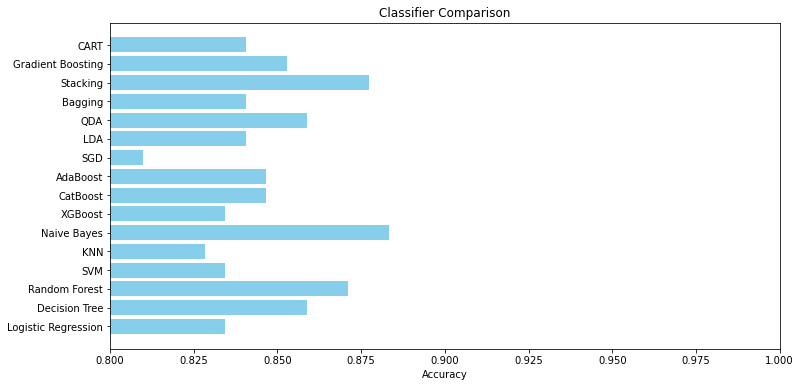

In [373]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_lralr, accuracy_lradt, accuracy_lrarf, accuracy_lrasvc, accuracy_lraknn, accuracy_lranb, accuracy_lraxgb, accuracy_lracb, accuracy_lraab, accuracy_lrasgd, accuracy_lralda, accuracy_lraqda, accuracy_lrabg, accuracy_lrast, accuracy_lragb, accuracy_lracart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


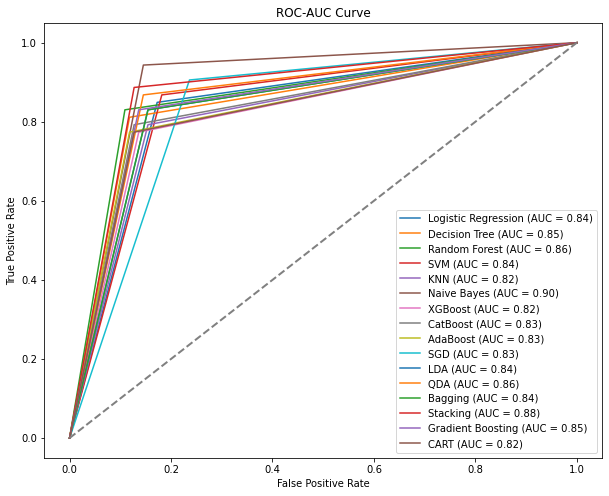

In [374]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_lralr),
    ('Decision Tree', y_pred_lradt),
    ('Random Forest', y_pred_lrarf),
    ('SVM', y_pred_lrasvc),
    ('KNN', y_pred_lraknn),
    ('Naive Bayes', y_pred_lranb),
    ('XGBoost', y_pred_lraxgb),
    ('CatBoost', y_pred_lracb),
    ('AdaBoost', y_pred_lraab),
    ('SGD', y_pred_lrasgd),
    ('LDA', y_pred_lralda),
    ('QDA', y_pred_lraqda),
    ('Bagging', y_pred_lrabg),
    ('Stacking', y_pred_lrast),
    ('Gradient Boosting', y_pred_lragb),
    ('CART', y_pred_lracart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [375]:
#ENN

# Import the necessary libraries
from imblearn.under_sampling import EditedNearestNeighbours
# Create an instance of EditedNearestNeighbours
lrenn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3)  # Adjust parameters as needed

# Fit ENN on your training data with the selected features
X_train_resampledlrenn, y_train_resampledlrenn = enn.fit_resample(X_train[selected_featureslr], y_train)

# Check the class distribution after enn
print("Class distribution after ADASYN:", Counter(y_train_resampledlrenn))
print("Class distribution before ADASYN:", Counter(y_train))


Class distribution after ADASYN: Counter({0: 212, 1: 124})
Class distribution before ADASYN: Counter({0: 254, 1: 124})


In [376]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 3: Fit a Logistic Regression model
logistic_reg_modellrennlr = LogisticRegression(random_state=42)

# Fit the model on the resampled training data
logistic_reg_modellrennlr.fit(X_train_resampledlrenn, y_train_resampledlrenn)


# Reorder columns in X_test to match X_train_resampledlra
X_test_lrennlr = X_test[X_train_resampledlra.columns]

# Now you can make predictions on X_test_reordered
y_pred_lrennlr = logistic_reg_modellrennlr.predict(X_test_lrennlr)

# Step 5: Evaluate the model's performance
accuracy_lrennlr = accuracy_score(y_test, y_pred_lrennlr)
classification_report_lrennlr = classification_report(y_test, y_pred_lrennlr)

# Print the results
print("Accuracy:", accuracy_lrennlr)
print("Classification Report:\n", classification_report_lrennlr)


Accuracy: 0.8711656441717791
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       110
           1       0.78      0.85      0.81        53

    accuracy                           0.87       163
   macro avg       0.85      0.87      0.86       163
weighted avg       0.88      0.87      0.87       163



In [377]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treelrenndt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treelrenndt.fit(X_train_resampledlrenn, y_train_resampledlrenn)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrenndt = X_test[X_train_resampledlrenn.columns]

# Make predictions on the test data
y_pred_lrenndt = decision_treelrenndt.predict(X_test_lrenndt)

# Evaluate the classifier's performance
accuracy_lrenndt = accuracy_score(y_test, y_pred_lrenndt)
print("Accuracy:", accuracy_lrenndt)

# Print classification report for more detailed evaluation
report_lrenndt = classification_report(y_test, y_pred_lrenndt)
print("Classification Report:\n", report_lrenndt)

Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       110
           1       0.75      0.83      0.79        53

    accuracy                           0.85       163
   macro avg       0.83      0.85      0.84       163
weighted avg       0.86      0.85      0.85       163



In [378]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forest_lrennrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forest_lrennrf.fit(X_train_resampledlrenn, y_train_resampledlrenn)  # Use y_train_resampledlra as the target variable

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrennrf = X_test[X_train_resampledlrenn.columns]

# Make predictions on the test data
y_pred_lrennrf = random_forest_lrennrf.predict(X_test_lrennrf)

# Evaluate the classifier's performance
accuracy_lrennrf = accuracy_score(y_test, y_pred_lrennrf)
print("Accuracy:", accuracy_lrennrf)

# Print classification report for more detailed evaluation
report_lrennrf = classification_report(y_test, y_pred_lrennrf)
print("Classification Report:\n", report_lrennrf)


Accuracy: 0.8834355828220859
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       110
           1       0.81      0.83      0.82        53

    accuracy                           0.88       163
   macro avg       0.87      0.87      0.87       163
weighted avg       0.88      0.88      0.88       163



In [379]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifierlrennsvc = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifierlrennsvc.fit(X_train_resampledlrenn, y_train_resampledlrenn)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrennsvc = X_test[X_train_resampledlrenn.columns]

# Make predictions on the test data
y_pred_lrennsvc = svm_classifierlrennsvc.predict(X_test_lrennsvc)

# Evaluate the classifier's performance
accuracy_lrennsvc = accuracy_score(y_test, y_pred_lrennsvc)
print("Accuracy:", accuracy_lrennsvc)

# Print classification report for more detailed evaluation
report_lrennsvc = classification_report(y_test, y_pred_lrennsvc)
print("Classification Report:\n", report_lrennsvc)


Accuracy: 0.8895705521472392
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       110
           1       0.81      0.87      0.84        53

    accuracy                           0.89       163
   macro avg       0.87      0.88      0.88       163
weighted avg       0.89      0.89      0.89       163



In [380]:

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scalerlrennknn = StandardScaler()

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrennknn = X_test[X_train_resampledlrenn.columns]

# Fit the scaler on the training data and transform both training and test data
X_train_scaledlrennknn = scaler.fit_transform(X_train_resampledlrenn)
X_test_scaledlrennknn = scaler.transform(X_test_lrennknn)

# Now, apply KNN on the scaled data
knn_classifierlrennknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifierlrennknn.fit(X_train_scaledlrennknn, y_train_resampledlrenn)
y_pred_lrennknn = knn_classifierlrennknn.predict(X_test_scaledlrennknn)

#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifierlrennknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifierlrennknn.fit(X_train_scaledlrennknn, y_train_resampledlrenn)

# Make predictions on the test data
y_pred_lrennknn = knn_classifierlrennknn.predict(X_test_scaledlrennknn)

# Evaluate the classifier's performance
accuracy_lrennknn = accuracy_score(y_test, y_pred_lrennknn)
print("Accuracy:", accuracy_lrennknn)

# Print classification report for more detailed evaluation
report_lrennknn = classification_report(y_test, y_pred_lrennknn)
print("Classification Report:\n", report_lrennknn)


Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       110
           1       0.87      0.74      0.80        53

    accuracy                           0.88       163
   macro avg       0.87      0.84      0.85       163
weighted avg       0.88      0.88      0.87       163



In [381]:

#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifierlrennnb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifierlrennnb.fit(X_train_resampledlrenn, y_train_resampledlrenn)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrennnb = X_test[X_train_resampledlrenn.columns]


# Make predictions on the test data
y_pred_lrennnb = naive_bayes_classifierlrennnb.predict(X_test_lrennnb)

# Evaluate the classifier's performance
accuracy_lrennnb = accuracy_score(y_test, y_pred_lrennnb)
print("Accuracy:", accuracy_lrennnb)

# Print classification report for more detailed evaluation
report_lrennnb = classification_report(y_test, y_pred_lrennnb)
print("Classification Report:\n", report_lrennnb)


Accuracy: 0.8895705521472392
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92       110
           1       0.80      0.89      0.84        53

    accuracy                           0.89       163
   macro avg       0.87      0.89      0.88       163
weighted avg       0.89      0.89      0.89       163



In [382]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifierlrennxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifierlrennxgb.fit(X_train_resampledlrenn, y_train_resampledlrenn)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrennxgb = X_test[X_train_resampledlrsmo.columns]

# Make predictions on the test data
y_pred_lrennxgb = xgb_classifierlrennxgb.predict(X_test_lrennxgb)

# Evaluate the classifier's performance
accuracy_lrennxgb = accuracy_score(y_test, y_pred_lrennxgb)
print("Accuracy:", accuracy_lrennxgb)

# Print classification report for more detailed evaluation
report_lrennxgb = classification_report(y_test, y_pred_lrennxgb)
print("Classification Report:\n", report_lrennxgb)


Accuracy: 0.8711656441717791
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       110
           1       0.78      0.85      0.81        53

    accuracy                           0.87       163
   macro avg       0.85      0.87      0.86       163
weighted avg       0.88      0.87      0.87       163



In [383]:

#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifierlrenncb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifierlrenncb.fit(y_train_resampledlrenn, y_train_resampledlrenn)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrenncb = X_test[X_train_resampledlrenn.columns]

# Make predictions on the test data
y_pred_lrenncb = catboost_classifierlrenncb.predict(X_test_lrenncb)

# Evaluate the classifier's performance
accuracy_lrenncb = accuracy_score(y_test, y_pred_lrenncb)
print("Accuracy:", accuracy_lrenncb)

# Print classification report for more detailed evaluation
report_lrenncb = classification_report(y_test, y_pred_lrenncb)
print("Classification Report:\n", report_lrenncb)


Accuracy: 0.32515337423312884
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.33      1.00      0.49        53

    accuracy                           0.33       163
   macro avg       0.16      0.50      0.25       163
weighted avg       0.11      0.33      0.16       163



In [384]:

#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifierlrennab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifierlrennab = AdaBoostClassifier(base_classifierlrennab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifierlrennab.fit(X_train_resampledlrenn, y_train_resampledlrenn)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrennab = X_test[X_train_resampledlrenn.columns]

# Make predictions on the test data
y_pred_lrennab = adaboost_classifierlrennab.predict(X_test_lrennab)

# Evaluate the classifier's performance
accuracy_lrennab = accuracy_score(y_test, y_pred_lrennab)
print("Accuracy:", accuracy_lrennab)

# Print classification report for more detailed evaluation
report_lrennab = classification_report(y_test, y_pred_lrennab)
print("Classification Report:\n", report_lrennab)


Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       110
           1       0.75      0.83      0.79        53

    accuracy                           0.85       163
   macro avg       0.83      0.85      0.84       163
weighted avg       0.86      0.85      0.85       163



In [385]:

#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifierlrennsgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifierlrennsgd.fit(X_train_resampledlrenn, y_train_resampledlrenn)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrennsgd = X_test[X_train_resampledlrenn.columns]

# Make predictions on the test data
y_pred_lrennsgd = sgd_classifierlrennsgd.predict(X_test_lrennsgd)

# Evaluate the classifier's performance
accuracy_lrennsgd = accuracy_score(y_test, y_pred_lrennsgd)
print("Accuracy:", accuracy_lrennsgd)

# Print classification report for more detailed evaluation
report_lrennsgd = classification_report(y_test, y_pred_lrennsgd)
print("Classification Report:\n", report_lrennsgd)

Accuracy: 0.8895705521472392
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       110
           1       0.81      0.87      0.84        53

    accuracy                           0.89       163
   macro avg       0.87      0.88      0.88       163
weighted avg       0.89      0.89      0.89       163



In [386]:

#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifierlrennlda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifierlrennlda.fit(X_train_resampledlrenn, y_train_resampledlrenn)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrennlda = X_test[X_train_resampledlrenn.columns]

# Make predictions on the test data
y_pred_lrennlda = lda_classifierlrennlda.predict(X_test_lrennlda)

# Evaluate the classifier's performance
accuracy_lrennlda = accuracy_score(y_test, y_pred_lrennlda)
print("Accuracy:", accuracy_lrennlda)

# Print classification report for more detailed evaluation
report_lrennlda = classification_report(y_test, y_pred_lrennlda)
print("Classification Report:\n", report_lrennlda)


Accuracy: 0.901840490797546
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       110
           1       0.86      0.83      0.85        53

    accuracy                           0.90       163
   macro avg       0.89      0.88      0.89       163
weighted avg       0.90      0.90      0.90       163



In [387]:

#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifierlrennqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifierlrennqda.fit(X_train_resampledlrenn, y_train_resampledlrenn)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrennqda = X_test[X_train_resampledlrenn.columns]

# Make predictions on the test data
y_pred_lrennqda = qda_classifierlrennqda.predict(X_test)

# Evaluate the classifier's performance
accuracy_lrennqda = accuracy_score(y_test, y_pred_lrennqda)
print("Accuracy:", accuracy_lrennqda)

# Print classification report for more detailed evaluation
report_lrennqda = classification_report(y_test, y_pred_lrennqda)
print("Classification Report:\n", report_lrennqda)


Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       110
           1       0.75      0.85      0.80        53

    accuracy                           0.86       163
   macro avg       0.84      0.86      0.84       163
weighted avg       0.87      0.86      0.86       163



In [388]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifierlrennbg = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifierlrennbg = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifierlrennbg.fit(X_train_resampledlrenn, y_train_resampledlrenn)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrennbg = X_test[X_train_resampledlrenn.columns]

# Make predictions on the test data
y_pred_lrennbg = bagging_classifierlrennbg.predict(X_test_lrennbg)

# Evaluate the classifier's performance
accuracy_lrennbg = accuracy_score(y_test, y_pred_lrennbg)
print("Accuracy:", accuracy_lrennbg)

# Print classification report for more detailed evaluation
report_lrennbg = classification_report(y_test, y_pred_lrennbg)
print("Classification Report:\n", report_lrennbg)


Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       110
           1       0.76      0.79      0.78        53

    accuracy                           0.85       163
   macro avg       0.83      0.84      0.83       163
weighted avg       0.85      0.85      0.85       163



In [389]:

#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifierslrennst = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifierlrennst = StackingClassifier(
    estimators=base_classifierslrennst,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifierlrennst.fit(X_train_resampledlrenn, y_train_resampledlrenn)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrennst = X_test[X_train_resampledlrenn.columns]

# Make predictions on the test data
y_pred_lrennst = stacking_classifierlrennst.predict(X_test_lrennst)

# Evaluate the classifier's performance
accuracy_lrennst = accuracy_score(y_test, y_pred_lrennst)
print("Accuracy:", accuracy_lrennst)

# Print classification report for more detailed evaluation
report_lrennst = classification_report(y_test, y_pred_lrennst)
print("Classification Report:\n", report_lrennst)

Accuracy: 0.8711656441717791
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       110
           1       0.76      0.89      0.82        53

    accuracy                           0.87       163
   macro avg       0.85      0.88      0.86       163
weighted avg       0.88      0.87      0.87       163



In [390]:

#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifierlrenngb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifierlrenngb.fit(X_train_resampledlrenn, y_train_resampledlrenn)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrenngb = X_test[X_train_resampledlrenn.columns]

# Make predictions on the test data
y_pred_lrenngb = gb_classifierlrenngb.predict(X_test_lrenngb)

# Evaluate the classifier's performance
accuracy_lrenngb = accuracy_score(y_test, y_pred_lrenngb)
print("Accuracy (Gradient Boosting):", accuracy_lrenngb)

# Print classification report for more detailed evaluation
report_lrenngb = classification_report(y_test, y_pred_lrenngb)
print("Classification Report (Gradient Boosting):\n", report_lrenngb)

Accuracy (Gradient Boosting): 0.8834355828220859
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       110
           1       0.77      0.91      0.83        53

    accuracy                           0.88       163
   macro avg       0.86      0.89      0.87       163
weighted avg       0.89      0.88      0.89       163



In [391]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifierlrenncart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifierlrenncart.fit(X_train_resampledlrenn, y_train_resampledlrenn)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrenncart = X_test[X_train_resampledlrenn.columns]

# Make predictions on the test data
y_pred_lrenncart = cart_classifierlrenncart.predict(X_test_lrenncart)

# Evaluate the classifier's performance
accuracy_lrenncart = accuracy_score(y_test, y_pred_lrenncart)
print("Accuracy:", accuracy_lrenncart)

# Print classification report for more detailed evaluation
report_lrenncart = classification_report(y_test, y_pred_lrenncart)
print("Classification Report:\n", report_lrenncart)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       110
           1       0.73      0.83      0.78        53

    accuracy                           0.85       163
   macro avg       0.82      0.84      0.83       163
weighted avg       0.85      0.85      0.85       163



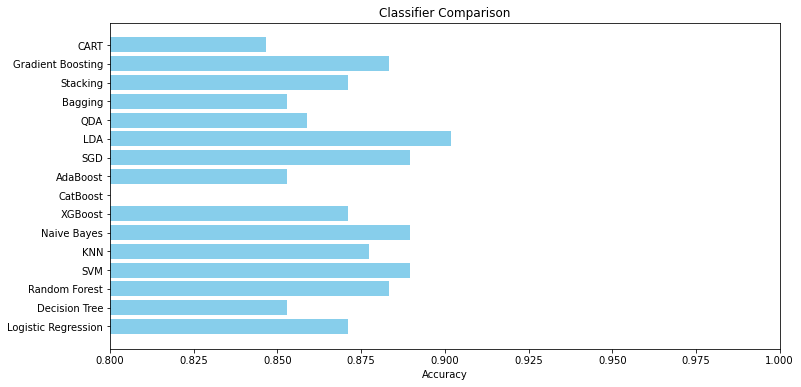

In [392]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_lrennlr, accuracy_lrenndt, accuracy_lrennrf, accuracy_lrennsvc, accuracy_lrennknn, accuracy_lrennnb, accuracy_lrennxgb, accuracy_lrenncb, accuracy_lrennab, accuracy_lrennsgd, accuracy_lrennlda, accuracy_lrennqda, accuracy_lrennbg, accuracy_lrennst, accuracy_lrenngb, accuracy_lrenncart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


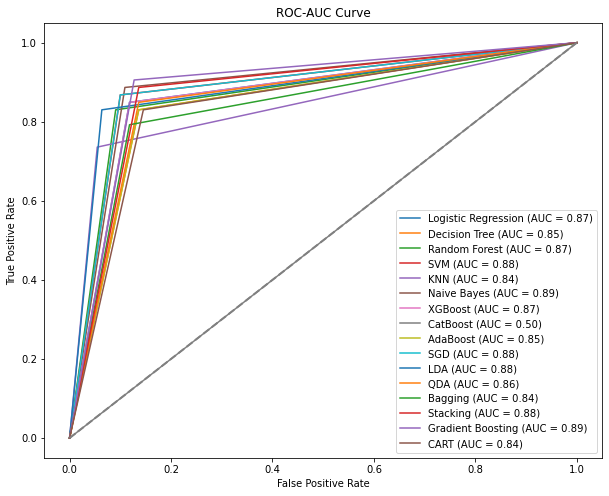

In [393]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_lrennlr),
    ('Decision Tree', y_pred_lrenndt),
    ('Random Forest', y_pred_lrennrf),
    ('SVM', y_pred_lrennsvc),
    ('KNN', y_pred_lrennknn),
    ('Naive Bayes', y_pred_lrennnb),
    ('XGBoost', y_pred_lrennxgb),
    ('CatBoost', y_pred_lrenncb),
    ('AdaBoost', y_pred_lrennab),
    ('SGD', y_pred_lrennsgd),
    ('LDA', y_pred_lrennlda),
    ('QDA', y_pred_lrennqda),
    ('Bagging', y_pred_lrennbg),
    ('Stacking', y_pred_lrennst),
    ('Gradient Boosting', y_pred_lrenngb),
    ('CART', y_pred_lrenncart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [394]:
#NCR
from imblearn.combine import SMOTEENN

# Use RFE-selected features
X_train_selectedlr = X_train[selected_featureslr]

# Create a SMOTEENN object
smoteennlrncr = SMOTEENN(random_state=42)

# Resample the training data using SMOTEENN
X_train_resamplelrncr, y_train_resamplelrncr = smoteennlrncr.fit_resample(X_train_selectedlr, y_train)

# Check the class distribution after applying SMOTEENN
from collections import Counter
print("Class distribution after SMOTEENN:", Counter(y_train_resamplelrncr))
print("Class distribution before SMOTEENN:", Counter(y_train))



Class distribution after SMOTEENN: Counter({1: 215, 0: 196})
Class distribution before SMOTEENN: Counter({0: 254, 1: 124})


In [395]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Logistic Regression model
logistic_reg_modellrncrlr = LogisticRegression(random_state=42)

# Step 2: Fit the model on the resampled training data
logistic_reg_modellrncrlr.fit(X_train_resamplelrncr, y_train_resamplelrncr)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrncrlr = X_test[X_train_resamplelrncr.columns]

# Make predictions on the test data
y_pred_lrncrlr = logistic_reg_modellrncrlr.predict(X_test_lrncrlr)


# Step 4: Evaluate the model's performance
accuracy_lrncrlr = accuracy_score(y_test, y_pred_lrncrlr)
classification_report_lrncrlr = classification_report(y_test, y_pred_lrncrlr)

# Step 5: Print the results
print("Accuracy:", accuracy_lrncrlr)
print("Classification Report:\n", classification_report_lrncrlr)


Accuracy: 0.8711656441717791
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       110
           1       0.77      0.87      0.81        53

    accuracy                           0.87       163
   macro avg       0.85      0.87      0.86       163
weighted avg       0.88      0.87      0.87       163



In [396]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Decision Tree Classifier model
decision_tree_modellrncrdt = DecisionTreeClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
decision_tree_modellrncrdt.fit(X_train_resamplelrncr, y_train_resamplelrncr)

# Step 3: Make predictions on the test data
y_pred_lrncrdt = decision_tree_modellrncrdt.predict(X_test[selected_featureslr])

# Step 4: Evaluate the model's performance
accuracy_lrncrdt = accuracy_score(y_test, y_pred_lrncrdt)
classification_report_dtlrncrdt = classification_report(y_test, y_pred_lrncrdt)

# Step 5: Print the results
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_lrncrdt)
print("Classification Report:\n", classification_report_dtlrncrdt)


Decision Tree Classifier:
Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       110
           1       0.75      0.83      0.79        53

    accuracy                           0.85       163
   macro avg       0.83      0.85      0.84       163
weighted avg       0.86      0.85      0.85       163



In [397]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Random Forest classifier
random_forestlrncrrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Fit the Random Forest model on the resampled training data
random_forestlrncrrf.fit(X_train_resamplelrncr, y_train_resamplelrncr)

# Step 3: Make predictions on the test data
y_pred_lrncrrf = random_forestlrncrrf.predict(X_test[selected_featureslr])

# Step 4: Evaluate the model's performance
accuracy_lrncrrf = accuracy_score(y_test, y_pred_lrncrrf)
classification_report_lrncrrf = classification_report(y_test, y_pred_lrncrrf)

# Step 5: Print the results
print("Random Forest Classifier")
print("Accuracy:", accuracy_lrncrrf)
print("Classification Report:\n", classification_report_lrncrrf)


Random Forest Classifier
Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       110
           1       0.75      0.85      0.80        53

    accuracy                           0.86       163
   macro avg       0.84      0.86      0.84       163
weighted avg       0.87      0.86      0.86       163



In [398]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an SVM classifier (SVC)
svm_classifierlrncrsvc = SVC(kernel='linear', random_state=42)

# Step 2: Fit the SVM model on the resampled training data
svm_classifierlrncrsvc.fit(X_train_resamplelrncr, y_train_resamplelrncr)

# Step 3: Make predictions on the test data
y_pred_lrncrsvc = svm_classifierlrncrsvc.predict(X_test[selected_featureslr])

# Step 4: Evaluate the model's performance
accuracy_lrncrsvc = accuracy_score(y_test, y_pred_lrncrsvc)
classification_report_lrncrsvc = classification_report(y_test, y_pred_lrncrsvc)

# Step 5: Print the results
print("Accuracy:", accuracy_lrncrsvc)
print("Classification Report:\n", classification_report_lrncrsvc)


Accuracy: 0.8588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       110
           1       0.74      0.87      0.80        53

    accuracy                           0.86       163
   macro avg       0.84      0.86      0.85       163
weighted avg       0.87      0.86      0.86       163



In [399]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a KNN classifier
knn_classifierlrncrknn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Step 2: Fit the KNN model on the resampled training data
knn_classifierlrncrknn.fit(X_train_resamplelrncr, y_train_resamplelrncr)

# Step 3: Make predictions on the test data (using the same selected features)
y_pred_lrncrknn = knn_classifierlrncrknn.predict(X_test[selected_featureslr])

# Step 4: Evaluate the KNN classifier's performance
accuracy_lrncrknn = accuracy_score(y_test, y_pred_lrncrknn)
classification_report_lrncrknn = classification_report(y_test, y_pred_lrncrknn)

# Step 5: Print the results
print("Accuracy:", accuracy_lrncrknn)
print("Classification Report:\n", classification_report_lrncrknn)


Accuracy: 0.8404907975460123
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       110
           1       0.73      0.81      0.77        53

    accuracy                           0.84       163
   macro avg       0.82      0.83      0.82       163
weighted avg       0.85      0.84      0.84       163



In [400]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Gaussian Naive Bayes model
naive_bayes_modellrncrnb = GaussianNB()

# Step 2: Fit the model on the resampled training data
naive_bayes_modellrncrnb.fit(X_train_resamplelrncr, y_train_resamplelrncr)

# Step 3: Make predictions on the test data
y_pred_lrncrnb = naive_bayes_modellrncrnb.predict(X_test[selected_featureslr])

# Step 4: Evaluate the model's performance
accuracy_lrncrnb = accuracy_score(y_test, y_pred_lrncrnb)
classification_report_lrncrnb = classification_report(y_test, y_pred_lrncrnb)

# Step 5: Print the results
print("Accuracy:", accuracy_lrncrnb)
print("Classification Report:\n", classification_report_lrncrnb)


Accuracy: 0.8711656441717791
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       110
           1       0.76      0.89      0.82        53

    accuracy                           0.87       163
   macro avg       0.85      0.88      0.86       163
weighted avg       0.88      0.87      0.87       163



In [401]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an XGBoost classifier
xgb_classifierlrncrxgb = xgb.XGBClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
xgb_classifierlrncrxgb.fit(X_train_resamplelrncr, y_train_resamplelrncr)

# Step 3: Make predictions on the test data
y_pred_lrncrxgb = xgb_classifierlrncrxgb.predict(X_test[selected_featureslr])

# Step 4: Evaluate the model's performance
accuracy_lrncrxgb = accuracy_score(y_test, y_pred_lrncrxgb)
classification_report_lrncrxgb = classification_report(y_test, y_pred_lrncrxgb)

# Step 5: Print the results
print("Accuracy:", accuracy_lrncrxgb)
print("Classification Report:\n", classification_report_lrncrxgb)


Accuracy: 0.8711656441717791
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       110
           1       0.77      0.87      0.81        53

    accuracy                           0.87       163
   macro avg       0.85      0.87      0.86       163
weighted avg       0.88      0.87      0.87       163



In [402]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a CatBoost Classifier
catboost_modellrncrcb = CatBoostClassifier(random_state=42, iterations=500, depth=6, learning_rate=0.1)

# Step 2: Fit the model on the resampled training data
catboost_modellrncrcb.fit(X_train_resamplelrncr, y_train_resamplelrncr)

# Step 3: Make predictions on the test data
y_pred_lrncrcb = catboost_modellrncrcb.predict(X_test[selected_featureslr])

# Step 4: Evaluate the model's performance
accuracy_lrncrcb = accuracy_score(y_test, y_pred_lrncrcb)
classification_report_lrncrcb = classification_report(y_test, y_pred_lrncrcb)

# Step 5: Print the results
print("CatBoost Accuracy:", accuracy_lrncrcb)
print("CatBoost Classification Report:\n", classification_report_lrncrcb)


0:	learn: 0.5639150	total: 3.35ms	remaining: 1.67s
1:	learn: 0.4851727	total: 6.59ms	remaining: 1.64s
2:	learn: 0.3993103	total: 9.69ms	remaining: 1.6s
3:	learn: 0.3322406	total: 12.7ms	remaining: 1.58s
4:	learn: 0.2732892	total: 16ms	remaining: 1.58s
5:	learn: 0.2268817	total: 19.1ms	remaining: 1.57s
6:	learn: 0.1923779	total: 22.1ms	remaining: 1.55s
7:	learn: 0.1668055	total: 25ms	remaining: 1.54s
8:	learn: 0.1455373	total: 28.3ms	remaining: 1.54s
9:	learn: 0.1326640	total: 31.5ms	remaining: 1.54s
10:	learn: 0.1164341	total: 34.7ms	remaining: 1.54s
11:	learn: 0.1043125	total: 37.8ms	remaining: 1.53s
12:	learn: 0.0965308	total: 40.3ms	remaining: 1.51s
13:	learn: 0.0853171	total: 43.5ms	remaining: 1.51s
14:	learn: 0.0779883	total: 46.8ms	remaining: 1.51s
15:	learn: 0.0721255	total: 50.2ms	remaining: 1.52s
16:	learn: 0.0667449	total: 53.4ms	remaining: 1.51s
17:	learn: 0.0618774	total: 56.5ms	remaining: 1.51s
18:	learn: 0.0593280	total: 59.5ms	remaining: 1.51s
19:	learn: 0.0561112	total:

In [403]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an AdaBoost classifier
adaboost_modellrncrab = AdaBoostClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
adaboost_modellrncrab.fit(X_train_resamplelrncr, y_train_resamplelrncr)

# Step 3: Make predictions on the test data
y_pred_lrncrab = adaboost_modellrncrab.predict(X_test[selected_featureslr])

# Step 4: Evaluate the model's performance
accuracy_lrncrab = accuracy_score(y_test, y_pred_lrncrab)
classification_report_lrncrab = classification_report(y_test, y_pred_lrncrab)

# Step 5: Print the results
print("AdaBoost Accuracy:", accuracy_lrncrab)
print("AdaBoost Classification Report:\n", classification_report_lrncrab)


AdaBoost Accuracy: 0.8588957055214724
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       110
           1       0.75      0.85      0.80        53

    accuracy                           0.86       163
   macro avg       0.84      0.86      0.84       163
weighted avg       0.87      0.86      0.86       163



In [404]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an SGD Classifier
sgd_classifierlrncrsgd = SGDClassifier(loss="hinge", random_state=42)

# Step 2: Fit the SGD model on the resampled training data with selected features
sgd_classifierlrncrsgd.fit(X_train_resamplelrncr, y_train_resamplelrncr)

# Step 3: Make predictions on the test data
y_pred_lrncrsgd = sgd_classifierlrncrsgd.predict(X_test[selected_featureslr])

# Step 4: Evaluate the classifier's performance
accuracy_lrncrsgd = accuracy_score(y_test, y_pred_lrncrsgd)
classification_report_lrncrsgd = classification_report(y_test, y_pred_lrncrsgd)

# Step 5: Print the results
print("Accuracy:", accuracy_lrncrsgd)
print("Classification Report:\n", classification_report_lrncrsgd)


Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       110
           1       0.73      0.87      0.79        53

    accuracy                           0.85       163
   macro avg       0.83      0.86      0.84       163
weighted avg       0.87      0.85      0.86       163



In [405]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an LDA model
lda_modellrncrlda = LinearDiscriminantAnalysis()

# Step 2: Fit the LDA model on the resampled training data
lda_modellrncrlda.fit(X_train_resamplelrncr, y_train_resamplelrncr)

# Step 3: Make predictions on the test data
y_pred_lrncrlda = lda_modellrncrlda.predict(X_test[selected_featureslr])

# Step 4: Evaluate the LDA model's performance
accuracy_lrncrlda = accuracy_score(y_test, y_pred_lrncrlda)
classification_report_lrncrlda = classification_report(y_test, y_pred_lrncrlda)

# Step 5: Print the results
print("Accuracy:", accuracy_lrncrlda)
print("Classification Report:\n", classification_report_lrncrlda)


Accuracy: 0.8834355828220859
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       110
           1       0.80      0.85      0.83        53

    accuracy                           0.88       163
   macro avg       0.86      0.87      0.87       163
weighted avg       0.89      0.88      0.88       163



In [406]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a QDA model
qda_modellrncrqda = QuadraticDiscriminantAnalysis()

# Step 2: Fit the model on the resampled training data
qda_modellrncrqda.fit(X_train_resamplelrncr, y_train_resamplelrncr)

# Step 3: Make predictions on the test data using the selected features
y_pred_lrncrqda = qda_modellrncrqda.predict(X_test[selected_featureslr])

# Step 4: Evaluate the model's performance
accuracy_lrncrqda = accuracy_score(y_test, y_pred_lrncrqda)
classification_report_lrncrqda = classification_report(y_test, y_pred_lrncrqda)

# Step 5: Print the results
print("Accuracy:", accuracy_lrncrqda)
print("Classification Report:\n", classification_report_lrncrqda)


Accuracy: 0.8711656441717791
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       110
           1       0.77      0.87      0.81        53

    accuracy                           0.87       163
   macro avg       0.85      0.87      0.86       163
weighted avg       0.88      0.87      0.87       163



In [407]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Decision Tree model as the base estimator
base_estimatorlrncrbg = DecisionTreeClassifier(random_state=42)

# Step 2: Create a BaggingClassifier
bagging_modellrncrbg = BaggingClassifier(base_estimatorlrncrbg, n_estimators=100, random_state=42)

# Step 3: Fit the Bagging model on the resampled training data
bagging_modellrncrbg.fit(X_train_resamplelrncr, y_train_resamplelrncr)

# Step 4: Make predictions on the test data
y_pred_lrncrbg = bagging_modellrncrbg.predict(X_test[selected_featureslr])

# Step 5: Evaluate the model's performance
accuracy_lrncrbg = accuracy_score(y_test, y_pred_lrncrbg)
classification_report_lrncrbg = classification_report(y_test, y_pred_lrncrbg)

# Step 6: Print the results
print("Accuracy:", accuracy_lrncrbg)
print("Classification Report:\n", classification_report_lrncrbg)


Accuracy: 0.8282208588957055
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       110
           1       0.70      0.83      0.76        53

    accuracy                           0.83       163
   macro avg       0.80      0.83      0.81       163
weighted avg       0.84      0.83      0.83       163



In [408]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Create the base models
base_modelslrncrst = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(kernel='linear', random_state=42))
]

# Create the Stacking Classifier with a Logistic Regression meta-classifier
stacking_modellrncrst = StackingClassifier(estimators=base_modelslrncrst, final_estimator=LogisticRegression(random_state=42))

# Fit the stacking model on the resampled training data
stacking_modellrncrst.fit(X_train_resamplelrncr, y_train_resamplelrncr)

# Make predictions on the test data
y_pred_lrncrst = stacking_modellrncrst.predict(X_test[selected_featureslr])

# Evaluate the stacking model's performance
accuracy_lrncrst = accuracy_score(y_test, y_pred_lrncrst)
classification_report_lrncrst = classification_report(y_test, y_pred_lrncrst)

# Print the results
print("Stacking Model Accuracy:", accuracy_lrncrst)
print("Stacking Model Classification Report:\n", classification_report_lrncrst)


Stacking Model Accuracy: 0.8711656441717791
Stacking Model Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       110
           1       0.77      0.87      0.81        53

    accuracy                           0.87       163
   macro avg       0.85      0.87      0.86       163
weighted avg       0.88      0.87      0.87       163



In [409]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifierlrncrgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifierlrncrgb.fit(X_train_resamplelrncr, y_train_resamplelrncr)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrncrgb = X_test[X_train_resamplelrncr.columns]

# Make predictions on the test data
y_pred_lrncrgb = gb_classifierlrncrgb.predict(X_test_lrncrgb)

# Evaluate the classifier's performance
accuracy_lrncrgb = accuracy_score(y_test, y_pred_lrncrgb)
print("Accuracy (Gradient Boosting):", accuracy_lrncrgb)

# Print classification report for more detailed evaluation
report_lrncrgb = classification_report(y_test, y_pred_lrncrgb)
print("Classification Report (Gradient Boosting):\n", report_lrncrgb)

Accuracy (Gradient Boosting): 0.8466257668711656
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       110
           1       0.73      0.85      0.78        53

    accuracy                           0.85       163
   macro avg       0.82      0.85      0.83       163
weighted avg       0.86      0.85      0.85       163



In [410]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a CART classifier
cart_classifierlrncrcart = DecisionTreeClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
cart_classifierlrncrcart.fit(X_train_resamplelrncr, y_train_resamplelrncr)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrncrcart = X_test[X_train_resamplelrncr.columns]

# Step 3: Make predictions on the test data
y_pred_lrncrcart = cart_classifierlrncrcart.predict(X_test_lrncrcart)

# Step 4: Evaluate the model's performance
accuracy_lrncrcart = accuracy_score(y_test, y_pred_lrncrcart)
classification_report_lrncrcart = classification_report(y_test, y_pred_lrncrcart)

# Step 5: Print the results
print("Accuracy:", accuracy_lrncrcart)
print("Classification Report:\n", classification_report_lrncrcart)


Accuracy: 0.852760736196319
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       110
           1       0.75      0.83      0.79        53

    accuracy                           0.85       163
   macro avg       0.83      0.85      0.84       163
weighted avg       0.86      0.85      0.85       163



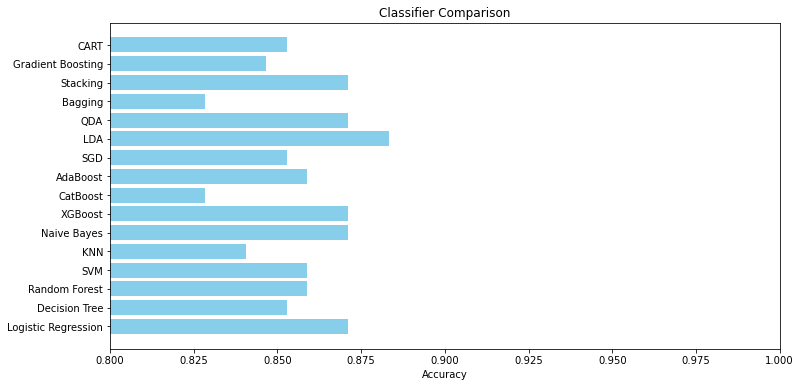

In [411]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_lrncrlr, accuracy_lrncrdt, accuracy_lrncrrf, accuracy_lrncrsvc, accuracy_lrncrknn, accuracy_lrncrnb, accuracy_lrncrxgb, accuracy_lrncrcb, accuracy_lrncrab, accuracy_lrncrsgd, accuracy_lrncrlda, accuracy_lrncrqda, accuracy_lrncrbg, accuracy_lrncrst, accuracy_lrncrgb, accuracy_lrncrcart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


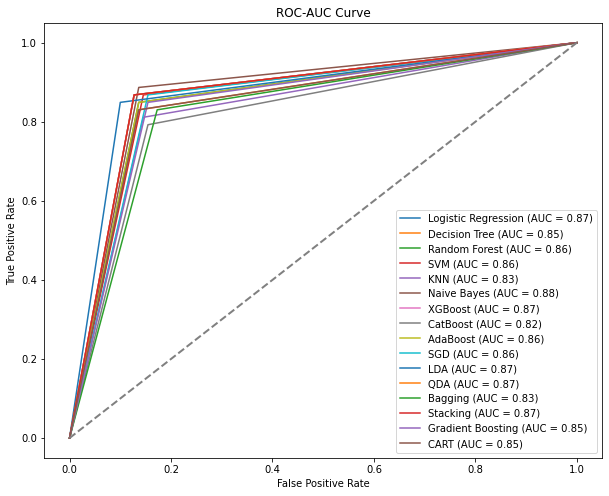

In [412]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_lrncrlr),
    ('Decision Tree', y_pred_lrncrdt),
    ('Random Forest', y_pred_lrncrrf),
    ('SVM', y_pred_lrncrsvc),
    ('KNN', y_pred_lrncrknn),
    ('Naive Bayes', y_pred_lrncrnb),
    ('XGBoost', y_pred_lrncrxgb),
    ('CatBoost', y_pred_lrncrcb),
    ('AdaBoost', y_pred_lrncrab),
    ('SGD', y_pred_lrncrsgd),
    ('LDA', y_pred_lrncrlda),
    ('QDA', y_pred_lrncrqda),
    ('Bagging', y_pred_lrncrbg),
    ('Stacking', y_pred_lrncrst),
    ('Gradient Boosting', y_pred_lrncrgb),
    ('CART', y_pred_lrncrcart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [413]:
#RANDOM UNDERSAMPLING
from imblearn.under_sampling import RandomUnderSampler

# Create RandomUnderSampler
ruslr = RandomUnderSampler(random_state=42)

# Perform random undersampling on the selected features
X_train_resamplelrrus, y_train_resamplelrrus = ruslr.fit_resample(X_train[selected_featureslr], y_train)

# Check the class distribution after random undersampling
from collections import Counter
print("Class distribution after random undersampling:", Counter(y_train_resamplelrrus))
print("Class distribution before random undersampling:", Counter(y_train))



Class distribution after random undersampling: Counter({0: 124, 1: 124})
Class distribution before random undersampling: Counter({0: 254, 1: 124})


In [414]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Logistic Regression model
logistic_reg_modellrruslr = LogisticRegression(random_state=42)

# Step 2: Fit the model on the resampled training data
logistic_reg_modellrruslr.fit(X_train_resamplelrrus, y_train_resamplelrrus)

# Step 3: Make predictions on the test data
y_pred_lrruslr = logistic_reg_modellrruslr.predict(X_test[selected_featureslr])

# Step 4: Evaluate the model's performance
accuracy_lrruslr = accuracy_score(y_test, y_pred_lrruslr)
classification_report_lrruslr = classification_report(y_test, y_pred_lrruslr)

# Step 5: Print the results
print("Accuracy:", accuracy_lrruslr)
print("Classification Report:\n", classification_report_lrruslr)


Accuracy: 0.8957055214723927
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       110
           1       0.82      0.87      0.84        53

    accuracy                           0.90       163
   macro avg       0.88      0.89      0.88       163
weighted avg       0.90      0.90      0.90       163



In [415]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Decision Tree Classifier model
decision_tree_modellrrusdt = DecisionTreeClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
decision_tree_modellrrusdt.fit(X_train_resamplelrrus, y_train_resamplelrrus)

# Step 3: Make predictions on the test data
y_pred_lrrusdt = decision_tree_modellrrusdt.predict(X_test[selected_featureslr])

# Step 4: Evaluate the model's performance
accuracy_lrrusdt = accuracy_score(y_test, y_pred_lrrusdt)
classification_report_lrrusdt = classification_report(y_test, y_pred_lrrusdt)

# Step 5: Print the results
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_lrrusdt)
print("Classification Report:\n", classification_report_lrrusdt)


Decision Tree Classifier:
Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       110
           1       0.73      0.85      0.78        53

    accuracy                           0.85       163
   macro avg       0.82      0.85      0.83       163
weighted avg       0.86      0.85      0.85       163



In [416]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Random Forest classifier
random_forestlrrusrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Fit the Random Forest model on the resampled training data
random_forestlrrusrf.fit(X_train_resamplelrrus, y_train_resamplelrrus)

# Step 3: Make predictions on the test data
y_pred_lrrusrf = random_forestlrrusrf.predict(X_test[selected_featureslr])

# Step 4: Evaluate the model's performance
accuracy_lrrusrf = accuracy_score(y_test, y_pred_lrrusrf)
classification_report_lrrusrf = classification_report(y_test, y_pred_lrrusrf)

# Step 5: Print the results
print("Random Forest Classifier")
print("Accuracy:", accuracy_lrrusrf)
print("Classification Report:\n", classification_report_lrrusrf)


Random Forest Classifier
Accuracy: 0.901840490797546
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       110
           1       0.84      0.87      0.85        53

    accuracy                           0.90       163
   macro avg       0.89      0.89      0.89       163
weighted avg       0.90      0.90      0.90       163



In [417]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an SVM classifier (SVC)
svm_classifierlrrussvc = SVC(kernel='linear', random_state=42)

# Step 2: Fit the SVM model on the resampled training data
svm_classifierlrrussvc.fit(X_train_resamplelrrus, y_train_resamplelrrus)

# Step 3: Make predictions on the test data
y_pred_lrrussvc = svm_classifierlrrussvc.predict(X_test[selected_featureslr])

# Step 4: Evaluate the model's performance
accuracy_lrrussvc = accuracy_score(y_test, y_pred_lrrussvc)
classification_report_lrrussvc = classification_report(y_test, y_pred_lrrussvc)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrussvc)
print("Classification Report:\n", classification_report_lrrussvc)


Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       110
           1       0.80      0.83      0.81        53

    accuracy                           0.88       163
   macro avg       0.86      0.87      0.86       163
weighted avg       0.88      0.88      0.88       163



In [418]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a KNN classifier
knn_classifierlrrusknn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Step 2: Fit the KNN model on the resampled training data
knn_classifierlrrusknn.fit(X_train_resamplelrrus, y_train_resamplelrrus)

# Step 3: Make predictions on the test data (using the same selected features)
y_pred_lrrusknn = knn_classifierlrrusknn.predict(X_test[selected_featureslr])

# Step 4: Evaluate the KNN classifier's performance
accuracy_lrrusknn = accuracy_score(y_test, y_pred_lrrusknn)
classification_report_lrrusknn = classification_report(y_test, y_pred_lrrusknn)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrusknn)
print("Classification Report:\n", classification_report_lrrusknn)


Accuracy: 0.8711656441717791
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       110
           1       0.81      0.79      0.80        53

    accuracy                           0.87       163
   macro avg       0.85      0.85      0.85       163
weighted avg       0.87      0.87      0.87       163



In [419]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Gaussian Naive Bayes model
naive_bayes_modellrrusnb = GaussianNB()

# Step 2: Fit the model on the resampled training data
naive_bayes_modellrrusnb.fit(X_train_resamplelrrus, y_train_resamplelrrus)

# Step 3: Make predictions on the test data
y_pred_lrrusnb = naive_bayes_modellrrusnb.predict(X_test[selected_featureslr])

# Step 4: Evaluate the model's performance
accuracy_lrrusnb = accuracy_score(y_test, y_pred_lrrusnb)
classification_report_lrrusnb = classification_report(y_test, y_pred_lrrusnb)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrusnb)
print("Classification Report:\n", classification_report_lrrusnb)

Accuracy: 0.8957055214723927
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       110
           1       0.82      0.87      0.84        53

    accuracy                           0.90       163
   macro avg       0.88      0.89      0.88       163
weighted avg       0.90      0.90      0.90       163



In [420]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an XGBoost classifier
xgb_classifierlrrusxgb = xgb.XGBClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
xgb_classifierlrrusxgb.fit(X_train_resamplelrrus, y_train_resamplelrrus)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrrusxgb = X_test[X_train_resamplelrrus.columns]


# Step 3: Make predictions on the test data
y_pred_lrrusxgb = xgb_classifierlrrusxgb.predict(X_test_lrrusxgb)

# Step 4: Evaluate the model's performance
accuracy_lrrusxgb = accuracy_score(y_test, y_pred_lrrusxgb)
classification_report_lrrusxgb = classification_report(y_test, y_pred_lrrusxgb)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrusxgb)
print("Classification Report:\n", classification_report_lrrusxgb)


Accuracy: 0.8711656441717791
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       110
           1       0.79      0.83      0.81        53

    accuracy                           0.87       163
   macro avg       0.85      0.86      0.86       163
weighted avg       0.87      0.87      0.87       163



In [421]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a CatBoost Classifier
catboost_modellrruscb = CatBoostClassifier(random_state=42, iterations=500, depth=6, learning_rate=0.1)

# Step 2: Fit the model on the resampled training data
catboost_modellrruscb.fit(X_train_resamplelrrus, y_train_resamplelrrus)

# Step 3: Make predictions on the test data
y_pred_lrruscb = catboost_modellrruscb.predict(X_test[selected_featureslr])

# Step 4: Evaluate the model's performance
accuracy_lrruscb = accuracy_score(y_test, y_pred_lrruscb)
classification_report_lrruscb = classification_report(y_test, y_pred_lrruscb)

# Step 5: Print the results
print("CatBoost Accuracy:", accuracy_lrruscb)
print("CatBoost Classification Report:\n", classification_report_lrruscb)


0:	learn: 0.6063483	total: 4.12ms	remaining: 2.06s
1:	learn: 0.5434865	total: 8.44ms	remaining: 2.1s
2:	learn: 0.4873459	total: 12.4ms	remaining: 2.06s
3:	learn: 0.4362834	total: 16.9ms	remaining: 2.09s
4:	learn: 0.4009502	total: 21ms	remaining: 2.08s
5:	learn: 0.3646209	total: 25.2ms	remaining: 2.08s
6:	learn: 0.3402975	total: 29.1ms	remaining: 2.05s
7:	learn: 0.3230842	total: 33.4ms	remaining: 2.05s
8:	learn: 0.3114287	total: 36.6ms	remaining: 2s
9:	learn: 0.2925061	total: 40.9ms	remaining: 2s
10:	learn: 0.2810933	total: 44.9ms	remaining: 2s
11:	learn: 0.2699867	total: 49ms	remaining: 1.99s
12:	learn: 0.2549134	total: 53.1ms	remaining: 1.99s
13:	learn: 0.2395048	total: 57.2ms	remaining: 1.98s
14:	learn: 0.2315325	total: 61ms	remaining: 1.97s
15:	learn: 0.2204869	total: 64.8ms	remaining: 1.96s
16:	learn: 0.2116113	total: 68.5ms	remaining: 1.94s
17:	learn: 0.2032080	total: 72.4ms	remaining: 1.94s
18:	learn: 0.1943671	total: 76.3ms	remaining: 1.93s
19:	learn: 0.1919634	total: 80.4ms	rem

In [422]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an AdaBoost classifier
adaboost_modellrrusab = AdaBoostClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
adaboost_modellrrusab.fit(X_train_resamplelrrus, y_train_resamplelrrus)

# Step 3: Make predictions on the test data
y_pred_lrrusab = adaboost_modellrrusab.predict(X_test[selected_featureslr])

# Step 4: Evaluate the model's performance
accuracy_lrrusab = accuracy_score(y_test, y_pred_lrrusab)
classification_report_lrrusab = classification_report(y_test, y_pred_lrrusab)

# Step 5: Print the results
print("AdaBoost Accuracy:", accuracy_lrrusab)
print("AdaBoost Classification Report:\n", classification_report_lrrusab)


AdaBoost Accuracy: 0.8895705521472392
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       110
           1       0.81      0.87      0.84        53

    accuracy                           0.89       163
   macro avg       0.87      0.88      0.88       163
weighted avg       0.89      0.89      0.89       163



In [423]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an SGD Classifier
sgd_classifierlrrussgd = SGDClassifier(loss="hinge", random_state=42)

# Step 2: Fit the SGD model on the resampled training data with selected features
sgd_classifierlrrussgd.fit(X_train_resamplelrrus, y_train_resamplelrrus)

# Step 3: Make predictions on the test data
y_pred_lrrussgd = sgd_classifierlrrussgd.predict(X_test[selected_featureslr])

# Step 4: Evaluate the classifier's performance
accuracy_lrrussgd = accuracy_score(y_test, y_pred_lrrussgd)
classification_report_lrrussgd = classification_report(y_test, y_pred_lrrussgd)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrussgd)
print("Classification Report:\n", classification_report_lrrussgd)


Accuracy: 0.7668711656441718
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.85       110
           1       0.94      0.30      0.46        53

    accuracy                           0.77       163
   macro avg       0.84      0.65      0.65       163
weighted avg       0.81      0.77      0.72       163



In [424]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an LDA model
lda_modellrruslda = LinearDiscriminantAnalysis()

# Step 2: Fit the LDA model on the resampled training data
lda_modellrruslda.fit(X_train_resamplelrrus, y_train_resamplelrrus)

# Step 3: Make predictions on the test data
y_pred_lrruslda = lda_modellrruslda.predict(X_test[selected_featureslr])

# Step 4: Evaluate the LDA model's performance
accuracy_lrruslda = accuracy_score(y_test, y_pred_lrruslda)
classification_report_lrruslda = classification_report(y_test, y_pred_lrruslda)

# Step 5: Print the results
print("Accuracy:", accuracy_lrruslda)
print("Classification Report:\n", classification_report_lrruslda)


Accuracy: 0.8957055214723927
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       110
           1       0.85      0.83      0.84        53

    accuracy                           0.90       163
   macro avg       0.88      0.88      0.88       163
weighted avg       0.90      0.90      0.90       163



In [425]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a QDA model
qda_modellrrusqda = QuadraticDiscriminantAnalysis()

# Step 2: Fit the model on the resampled training data
qda_modellrrusqda.fit(X_train_resamplelrrus, y_train_resamplelrrus)

# Step 3: Make predictions on the test data using the selected features
y_pred_lrrusqda = qda_modellrrusqda.predict(X_test[selected_featureslr])

# Step 4: Evaluate the model's performance
accuracy_lrrusqda = accuracy_score(y_test, y_pred_lrrusqda)
classification_report_lrrusqda = classification_report(y_test, y_pred_lrrusqda)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrusqda)
print("Classification Report:\n", classification_report_lrrusqda)


Accuracy: 0.8650306748466258
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.90       110
           1       0.75      0.87      0.81        53

    accuracy                           0.87       163
   macro avg       0.84      0.87      0.85       163
weighted avg       0.87      0.87      0.87       163



In [426]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Decision Tree model as the base estimator
base_estimatorlrrusbg = DecisionTreeClassifier(random_state=42)

# Step 2: Create a BaggingClassifier
bagging_modellrrusbg = BaggingClassifier(base_estimatorlrrusbg, n_estimators=100, random_state=42)

# Step 3: Fit the Bagging model on the resampled training data
bagging_modellrrusbg.fit(X_train_resamplelrrus, y_train_resamplelrrus)

# Step 4: Make predictions on the test data
y_pred_lrrusbg = bagging_modellrrusbg.predict(X_test[selected_featureslr])

# Step 5: Evaluate the model's performance
accuracy_lrrusbg = accuracy_score(y_test, y_pred_lrrusbg)
classification_report_lrrusbg = classification_report(y_test, y_pred_lrrusbg)

# Step 6: Print the results
print("Accuracy:", accuracy_lrrusbg)
print("Classification Report:\n", classification_report_lrrusbg)


Accuracy: 0.8834355828220859
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       110
           1       0.79      0.87      0.83        53

    accuracy                           0.88       163
   macro avg       0.86      0.88      0.87       163
weighted avg       0.89      0.88      0.88       163



In [427]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Create the base models
base_modelslrrusst = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(kernel='linear', random_state=42))
]

# Create the Stacking Classifier with a Logistic Regression meta-classifier
stacking_modellrrusst = StackingClassifier(estimators=base_modelslrrusst, final_estimator=LogisticRegression(random_state=42))

# Fit the stacking model on the resampled training data
stacking_modellrrusst.fit(X_train_resamplelrrus, y_train_resamplelrrus)

# Make predictions on the test data
y_pred_lrrusst = stacking_modellrrusst.predict(X_test[selected_featureslr])

# Evaluate the stacking model's performance
accuracy_lrrusst = accuracy_score(y_test, y_pred_lrrusst)
classification_report_lrrusst = classification_report(y_test, y_pred_lrrusst)

# Print the results
print("Stacking Model Accuracy:", accuracy_lrrusst)
print("Stacking Model Classification Report:\n", classification_report_lrrusst)


Stacking Model Accuracy: 0.8711656441717791
Stacking Model Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       110
           1       0.78      0.85      0.81        53

    accuracy                           0.87       163
   macro avg       0.85      0.87      0.86       163
weighted avg       0.88      0.87      0.87       163



In [428]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifierlrrusgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifierlrrusgb.fit(X_train_resamplelrrus, y_train_resamplelrrus)

# Reorder columns in X_test to match X_train_resampledlrsmo
X_test_lrrusgb = X_test[X_train_resamplelrrus.columns]

# Make predictions on the test data
y_pred_lrrusgb = gb_classifierlrrusgb.predict(X_test_lrrusgb)

# Evaluate the classifier's performance
accuracy_lrrusgb = accuracy_score(y_test, y_pred_lrrusgb)
print("Accuracy (Gradient Boosting):", accuracy_lrrusgb)

# Print classification report for more detailed evaluation
report_lrrusgb = classification_report(y_test, y_pred_lrrusgb)
print("Classification Report (Gradient Boosting):\n", report_lrrusgb)

Accuracy (Gradient Boosting): 0.8773006134969326
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.92      0.89      0.91       110
           1       0.79      0.85      0.82        53

    accuracy                           0.88       163
   macro avg       0.86      0.87      0.86       163
weighted avg       0.88      0.88      0.88       163



In [429]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a CART classifier
cart_classifierlrruscart = DecisionTreeClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
cart_classifierlrruscart.fit(X_train_resamplelrrus, y_train_resamplelrrus)

# Step 3: Make predictions on the test data
y_pred_lrruscart = cart_classifierlrruscart.predict(X_test[selected_featureslr])

# Step 4: Evaluate the model's performance
accuracy_lrruscart = accuracy_score(y_test, y_pred_lrruscart)
classification_report_lrruscart = classification_report(y_test, y_pred_lrruscart)

# Step 5: Print the results
print("Accuracy:", accuracy_lrruscart)
print("Classification Report:\n", classification_report_lrruscart)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       110
           1       0.73      0.85      0.78        53

    accuracy                           0.85       163
   macro avg       0.82      0.85      0.83       163
weighted avg       0.86      0.85      0.85       163



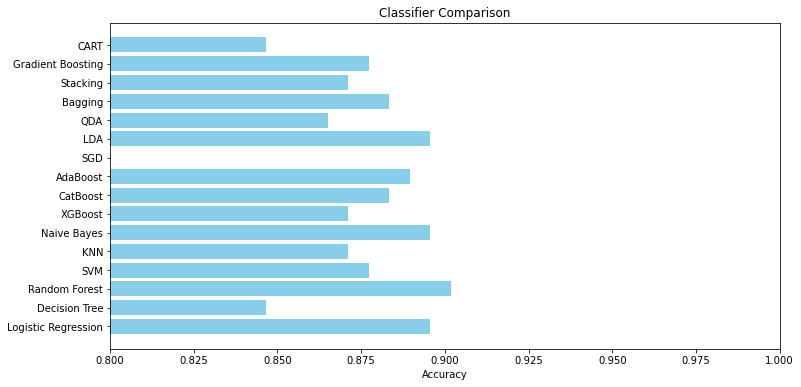

In [430]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_lrruslr, accuracy_lrrusdt, accuracy_lrrusrf, accuracy_lrrussvc, accuracy_lrrusknn, accuracy_lrrusnb, accuracy_lrrusxgb, accuracy_lrruscb, accuracy_lrrusab, accuracy_lrrussgd, accuracy_lrruslda, accuracy_lrrusqda, accuracy_lrrusbg, accuracy_lrrusst, accuracy_lrrusgb, accuracy_lrruscart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


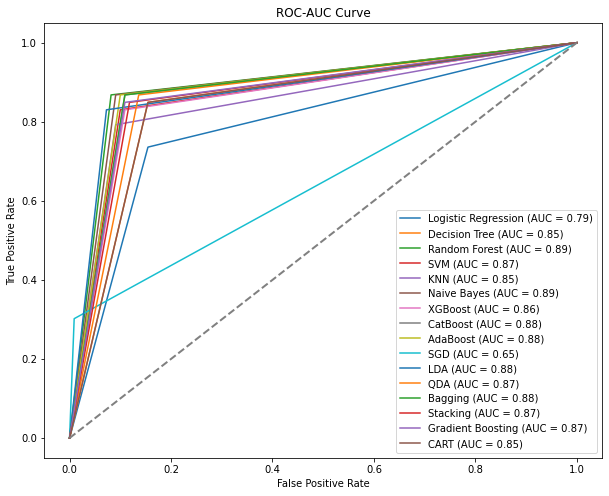

In [431]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_mismolr),
    ('Decision Tree', y_pred_lrrusdt),
    ('Random Forest', y_pred_lrrusrf),
    ('SVM', y_pred_lrrussvc),
    ('KNN', y_pred_lrrusknn),
    ('Naive Bayes', y_pred_lrrusnb),
    ('XGBoost', y_pred_lrrusxgb),
    ('CatBoost', y_pred_lrruscb),
    ('AdaBoost', y_pred_lrrusab),
    ('SGD', y_pred_lrrussgd),
    ('LDA', y_pred_lrruslda),
    ('QDA', y_pred_lrrusqda),
    ('Bagging', y_pred_lrrusbg),
    ('Stacking', y_pred_lrrusst),
    ('Gradient Boosting', y_pred_lrrusgb),
    ('CART', y_pred_lrruscart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [432]:
# Get the selected features
selected_featureslr = rfe.support_

# Get the column names of the selected features
selected_feature_columns_lr = X_train.columns[selected_featureslr]


In [433]:
#Random Oversampling
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
lrros = RandomOverSampler(random_state=42)

# Fit and transform your feature and target variables using Random Oversampling
X_resampledlrros, y_resampledlrros = lrros.fit_resample(X_train[selected_feature_columns_lr], y_train)


In [434]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a Logistic Regression model
logistic_reg_model_oversampled = LogisticRegression(random_state=42)

# Fit the model on the resampled training data
logistic_reg_model_oversampled.fit(X_resampledlrros, y_resampledlrros)

# Make predictions on the test data
y_pred_lrroslr = logistic_reg_model_oversampled.predict(X_test[selected_feature_columns_lr])

# Evaluate the model's performance
accuracy_lrroslr = accuracy_score(y_test, y_pred_lrroslr)
classification_report_lrroslr = classification_report(y_test, y_pred_lrroslr)

# Print the results
print("Accuracy:", accuracy_lrroslr)
print("Classification Report:\n", classification_report_lrroslr)


Accuracy: 0.901840490797546
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       110
           1       0.86      0.83      0.85        53

    accuracy                           0.90       163
   macro avg       0.89      0.88      0.89       163
weighted avg       0.90      0.90      0.90       163



In [435]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Decision Tree Classifier model
decision_tree_modellrrosdt = DecisionTreeClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
decision_tree_modellrrosdt.fit(X_resampledlrros, y_resampledlrros)

# Make predictions on the test data
y_pred_lrrosdt = decision_tree_modellrrosdt.predict(X_test[selected_feature_columns_lr])


# Step 4: Evaluate the model's performance
accuracy_lrrosdt = accuracy_score(y_test, y_pred_lrrosdt)
classification_report_dtlrrosdt = classification_report(y_test, y_pred_lrrosdt)

# Step 5: Print the results
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_lrrosdt)
print("Classification Report:\n", classification_report_dtlrrosdt)


Decision Tree Classifier:
Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       110
           1       0.80      0.83      0.81        53

    accuracy                           0.88       163
   macro avg       0.86      0.87      0.86       163
weighted avg       0.88      0.88      0.88       163



In [436]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Random Forest classifier
random_forestlrrosrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Fit the Random Forest model on the resampled training data
random_forestlrrosrf.fit(X_resampledlrros, y_resampledlrros)

# Step 3: Make predictions on the test data
y_pred_lrrosrf = random_forestlrrosrf.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the model's performance
accuracy_lrrosrf = accuracy_score(y_test, y_pred_lrrosrf)
classification_report_lrrosrf = classification_report(y_test, y_pred_lrrosrf)

# Step 5: Print the results
print("Random Forest Classifier")
print("Accuracy:", accuracy_lrrosrf)
print("Classification Report:\n", classification_report_lrrosrf)


Random Forest Classifier
Accuracy: 0.8957055214723927
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       110
           1       0.83      0.85      0.84        53

    accuracy                           0.90       163
   macro avg       0.88      0.88      0.88       163
weighted avg       0.90      0.90      0.90       163



In [437]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an SVM classifier (SVC)
svm_classifierlrrossvc = SVC(kernel='linear', random_state=42)

# Step 2: Fit the SVM model on the resampled training data
svm_classifierlrrossvc.fit(X_resampledlrros, y_resampledlrros)

# Step 3: Make predictions on the test data
y_pred_lrrossvc = svm_classifierlrrossvc.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the model's performance
accuracy_lrrossvc = accuracy_score(y_test, y_pred_lrrossvc)
classification_report_lrrossvc = classification_report(y_test, y_pred_lrrossvc)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrossvc)
print("Classification Report:\n", classification_report_lrrossvc)


Accuracy: 0.8895705521472392
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       110
           1       0.83      0.83      0.83        53

    accuracy                           0.89       163
   macro avg       0.87      0.87      0.87       163
weighted avg       0.89      0.89      0.89       163



In [438]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a KNN classifier
knn_classifierlrrosknn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Step 2: Fit the KNN model on the resampled training data
knn_classifierlrrosknn.fit(X_resampledlrros, y_resampledlrros)

# Step 3: Make predictions on the test data (using the same selected features)
y_pred_lrrosknn = knn_classifierlrrosknn.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the KNN classifier's performance
accuracy_lrrosknn = accuracy_score(y_test, y_pred_lrrosknn)
classification_report_lrrosknn = classification_report(y_test, y_pred_lrrosknn)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrosknn)
print("Classification Report:\n", classification_report_lrrosknn)


Accuracy: 0.901840490797546
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       110
           1       0.85      0.85      0.85        53

    accuracy                           0.90       163
   macro avg       0.89      0.89      0.89       163
weighted avg       0.90      0.90      0.90       163



In [439]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Gaussian Naive Bayes model
naive_bayes_modellrrosnb = GaussianNB()

# Step 2: Fit the model on the resampled training data
naive_bayes_modellrrosnb.fit(X_resampledlrros, y_resampledlrros)

# Step 3: Make predictions on the test data
y_pred_lrrosnb = naive_bayes_modellrrosnb.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the model's performance
accuracy_lrrosnb = accuracy_score(y_test, y_pred_lrrosnb)
classification_report_lrrosnb = classification_report(y_test, y_pred_lrrosnb)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrosnb)
print("Classification Report:\n", classification_report_lrrosnb)

Accuracy: 0.9079754601226994
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       110
           1       0.84      0.89      0.86        53

    accuracy                           0.91       163
   macro avg       0.89      0.90      0.90       163
weighted avg       0.91      0.91      0.91       163



In [440]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an XGBoost classifier
xgb_classifierlrrosxgb = xgb.XGBClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
xgb_classifierlrrosxgb.fit(X_resampledlrros, y_resampledlrros)

# Step 3: Make predictions on the test data
y_pred_lrrosxgb = xgb_classifierlrrosxgb.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the model's performance
accuracy_lrrosxgb = accuracy_score(y_test, y_pred_lrrosxgb)
classification_report_lrrosxgb = classification_report(y_test, y_pred_lrrosxgb)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrosxgb)
print("Classification Report:\n", classification_report_lrrosxgb)


Accuracy: 0.8895705521472392
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       110
           1       0.82      0.85      0.83        53

    accuracy                           0.89       163
   macro avg       0.87      0.88      0.88       163
weighted avg       0.89      0.89      0.89       163



In [441]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a CatBoost Classifier
catboost_modellrroscb = CatBoostClassifier(random_state=42, iterations=500, depth=6, learning_rate=0.1)

# Step 2: Fit the model on the resampled training data
catboost_modellrroscb.fit(X_resampledlrros, y_resampledlrros)

# Step 3: Make predictions on the test data
y_pred_lrroscb = catboost_modellrroscb.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the model's performance
accuracy_lrroscb = accuracy_score(y_test, y_pred_lrroscb)
classification_report_lrroscb = classification_report(y_test, y_pred_lrroscb)

# Step 5: Print the results
print("CatBoost Accuracy:", accuracy_lrroscb)
print("CatBoost Classification Report:\n", classification_report_lrroscb)


0:	learn: 0.5908077	total: 3.9ms	remaining: 1.95s
1:	learn: 0.5228666	total: 7.95ms	remaining: 1.98s
2:	learn: 0.4493453	total: 12ms	remaining: 1.98s
3:	learn: 0.3987412	total: 16.1ms	remaining: 1.99s
4:	learn: 0.3652446	total: 20.1ms	remaining: 1.99s
5:	learn: 0.3314163	total: 23.9ms	remaining: 1.96s
6:	learn: 0.3065296	total: 27.5ms	remaining: 1.94s
7:	learn: 0.2923645	total: 31.2ms	remaining: 1.92s
8:	learn: 0.2729534	total: 34.9ms	remaining: 1.9s
9:	learn: 0.2589022	total: 38.7ms	remaining: 1.9s
10:	learn: 0.2423601	total: 42.3ms	remaining: 1.88s
11:	learn: 0.2319214	total: 45.8ms	remaining: 1.86s
12:	learn: 0.2186204	total: 49.5ms	remaining: 1.85s
13:	learn: 0.2071651	total: 53.1ms	remaining: 1.84s
14:	learn: 0.1944678	total: 56.8ms	remaining: 1.83s
15:	learn: 0.1878042	total: 60.5ms	remaining: 1.83s
16:	learn: 0.1818597	total: 64.2ms	remaining: 1.82s
17:	learn: 0.1723592	total: 68ms	remaining: 1.82s
18:	learn: 0.1639179	total: 71.8ms	remaining: 1.82s
19:	learn: 0.1612496	total: 7

In [442]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an AdaBoost classifier
adaboost_modellrrosab = AdaBoostClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
adaboost_modellrrosab.fit(X_resampledlrros, y_resampledlrros)

# Step 3: Make predictions on the test data
y_pred_lrrosab = adaboost_modellrrosab.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the model's performance
accuracy_lrrosab = accuracy_score(y_test, y_pred_lrrosab)
classification_report_lrrosab = classification_report(y_test, y_pred_lrrosab)

# Step 5: Print the results
print("AdaBoost Accuracy:", accuracy_lrrosab)
print("AdaBoost Classification Report:\n", classification_report_lrrosab)


AdaBoost Accuracy: 0.8895705521472392
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       110
           1       0.83      0.83      0.83        53

    accuracy                           0.89       163
   macro avg       0.87      0.87      0.87       163
weighted avg       0.89      0.89      0.89       163



In [443]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an SGD Classifier
sgd_classifierlrrossgd = SGDClassifier(loss="hinge", random_state=42)

# Step 2: Fit the SGD model on the resampled training data with selected features
sgd_classifierlrrossgd.fit(X_resampledlrros, y_resampledlrros)

# Step 3: Make predictions on the test data
y_pred_lrrossgd = sgd_classifierlrrossgd.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the classifier's performance
accuracy_lrrossgd = accuracy_score(y_test, y_pred_lrrossgd)
classification_report_lrrossgd = classification_report(y_test, y_pred_lrrossgd)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrossgd)
print("Classification Report:\n", classification_report_lrrossgd)


Accuracy: 0.901840490797546
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       110
           1       0.85      0.85      0.85        53

    accuracy                           0.90       163
   macro avg       0.89      0.89      0.89       163
weighted avg       0.90      0.90      0.90       163



In [444]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an LDA model
lda_modellrroslda = LinearDiscriminantAnalysis()

# Step 2: Fit the LDA model on the resampled training data
lda_modellrroslda.fit(X_resampledlrros, y_resampledlrros)

# Step 3: Make predictions on the test data
y_pred_lrroslda = lda_modellrroslda.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the LDA model's performance
accuracy_lrroslda = accuracy_score(y_test, y_pred_lrroslda)
classification_report_lrroslda = classification_report(y_test, y_pred_lrroslda)

# Step 5: Print the results
print("Accuracy:", accuracy_lrroslda)
print("Classification Report:\n", classification_report_lrroslda)


Accuracy: 0.901840490797546
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       110
           1       0.89      0.79      0.84        53

    accuracy                           0.90       163
   macro avg       0.90      0.87      0.88       163
weighted avg       0.90      0.90      0.90       163



In [445]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a QDA model
qda_modellrrosqda = QuadraticDiscriminantAnalysis()

# Step 2: Fit the model on the resampled training data
qda_modellrrosqda.fit(X_resampledlrros, y_resampledlrros)

# Step 3: Make predictions on the test data using the selected features
y_pred_qdalrros = qda_modellrrosqda.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the model's performance
accuracy_qdalrros = accuracy_score(y_test, y_pred_qdalrros)
classification_report_qdalrros = classification_report(y_test, y_pred_qdalrros)

# Step 5: Print the results
print("Accuracy:", accuracy_qdalrros)
print("Classification Report:\n", classification_report_qdalrros)


Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       110
           1       0.80      0.83      0.81        53

    accuracy                           0.88       163
   macro avg       0.86      0.87      0.86       163
weighted avg       0.88      0.88      0.88       163



In [446]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Decision Tree model as the base estimator
base_estimatorlrrosbg = DecisionTreeClassifier(random_state=42)

# Step 2: Create a BaggingClassifier
bagging_modellrrosbg = BaggingClassifier(base_estimatorlrrosbg, n_estimators=100, random_state=42)

# Step 3: Fit the Bagging model on the resampled training data
bagging_modellrrosbg.fit(X_resampledlrros, y_resampledlrros)

# Step 4: Make predictions on the test data
y_pred_lrrosbg = bagging_modellrrosbg.predict(X_test[selected_feature_columns_lr])

# Step 5: Evaluate the model's performance
accuracy_lrrosbg = accuracy_score(y_test, y_pred_lrrosbg)
classification_report_lrrosbg = classification_report(y_test, y_pred_lrrosbg)

# Step 6: Print the results
print("Accuracy:", accuracy_lrrosbg)
print("Classification Report:\n", classification_report_lrrosbg)


Accuracy: 0.8957055214723927
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       110
           1       0.82      0.87      0.84        53

    accuracy                           0.90       163
   macro avg       0.88      0.89      0.88       163
weighted avg       0.90      0.90      0.90       163



In [447]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Create the base models
base_modelslrrosst = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(kernel='linear', random_state=42))
]

# Create the Stacking Classifier with a Logistic Regression meta-classifier
stacking_modellrrosst = StackingClassifier(estimators=base_modelslrrosst, final_estimator=LogisticRegression(random_state=42))

# Fit the stacking model on the resampled training data
stacking_modellrrosst.fit(X_resampledlrros, y_resampledlrros)

# Make predictions on the test data
y_pred_lrrosst = stacking_modellrrosst.predict(X_test[selected_feature_columns_lr])

# Evaluate the stacking model's performance
accuracy_lrrosst = accuracy_score(y_test, y_pred_lrrosst)
classification_report_lrrosst = classification_report(y_test, y_pred_lrrosst)

# Print the results
print("Stacking Model Accuracy:", accuracy_lrrosst)
print("Stacking Model Classification Report:\n", classification_report_lrrosst)


Stacking Model Accuracy: 0.901840490797546
Stacking Model Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       110
           1       0.85      0.85      0.85        53

    accuracy                           0.90       163
   macro avg       0.89      0.89      0.89       163
weighted avg       0.90      0.90      0.90       163



In [448]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifierlrrosgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifierlrrosgb.fit(X_resampledlrros, y_resampledlrros)

# Make predictions on the test data
y_pred_lrrosgb = gb_classifierlrrosgb.predict(X_test[selected_feature_columns_lr])

# Evaluate the classifier's performance
accuracy_lrrosgb = accuracy_score(y_test, y_pred_lrrosgb)
print("Accuracy (Gradient Boosting):", accuracy_lrrosgb)

# Print classification report for more detailed evaluation
report_lrrosgb = classification_report(y_test, y_pred_lrrosgb)
print("Classification Report (Gradient Boosting):\n", report_lrrosgb)

Accuracy (Gradient Boosting): 0.8957055214723927
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       110
           1       0.82      0.87      0.84        53

    accuracy                           0.90       163
   macro avg       0.88      0.89      0.88       163
weighted avg       0.90      0.90      0.90       163



In [449]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a CART classifier
cart_classifierlrroscart = DecisionTreeClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
cart_classifierlrroscart.fit(X_resampledlrros, y_resampledlrros)

# Step 3: Make predictions on the test data
y_pred_lrroscart = cart_classifierlrroscart.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the model's performance
accuracy_lrroscart = accuracy_score(y_test, y_pred_lrroscart)
classification_report_lrroscart = classification_report(y_test, y_pred_lrroscart)

# Step 5: Print the results
print("Accuracy:", accuracy_lrroscart)
print("Classification Report:\n", classification_report_lrroscart)


Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       110
           1       0.80      0.83      0.81        53

    accuracy                           0.88       163
   macro avg       0.86      0.87      0.86       163
weighted avg       0.88      0.88      0.88       163



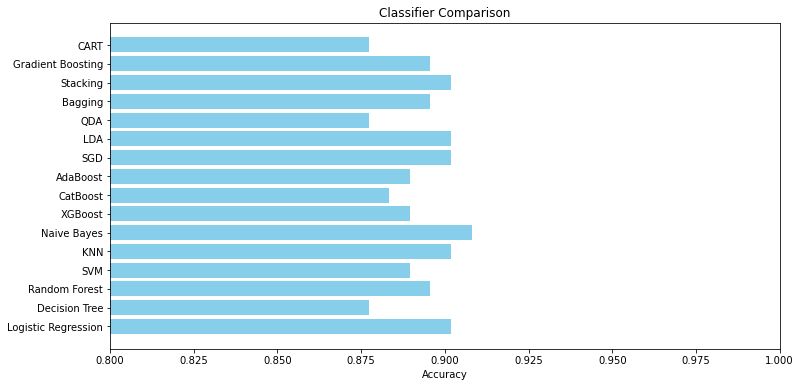

In [450]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_lrroslr, accuracy_lrrosdt, accuracy_lrrosrf, accuracy_lrrossvc, accuracy_lrrosknn, accuracy_lrrosnb, accuracy_lrrosxgb, accuracy_lrroscb, accuracy_lrrosab, accuracy_lrrossgd, accuracy_lrroslda, accuracy_qdalrros, accuracy_lrrosbg, accuracy_lrrosst, accuracy_lrrosgb, accuracy_lrroscart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


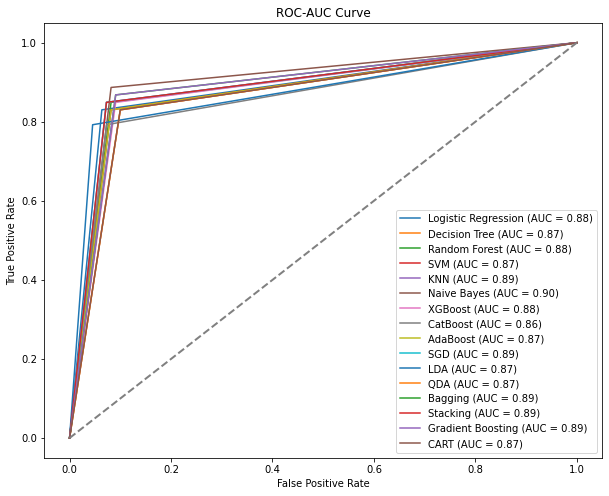

In [451]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_lrroslr),
    ('Decision Tree', y_pred_lrrosdt),
    ('Random Forest', y_pred_lrrosrf),
    ('SVM', y_pred_lrrossvc),
    ('KNN', y_pred_lrrosknn),
    ('Naive Bayes', y_pred_lrrosnb),
    ('XGBoost', y_pred_lrrosxgb),
    ('CatBoost', y_pred_lrroscb),
    ('AdaBoost', y_pred_lrrosab),
    ('SGD', y_pred_lrrossgd),
    ('LDA', y_pred_lrroslda),
    ('QDA', y_pred_qdalrros),
    ('Bagging', y_pred_lrrosbg),
    ('Stacking', y_pred_lrrosst),
    ('Gradient Boosting', y_pred_lrrosgb),
    ('CART', y_pred_lrroscart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [452]:
#BORDERLINE SMOTE

# Import necessary libraries
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

# Check the class distribution before BorderlineSMOTE
print("Class distribution before BorderlineSMOTE:", Counter(y_train))

# Create a BorderlineSMOTE object
borderline_smotelrsmb = BorderlineSMOTE(random_state=42)

# Fit and apply BorderlineSMOTE to balance the classes
X_train_resamplelrsmb, y_train_resamplelrsmb = borderline_smotelrsmb.fit_resample(X_train[selected_feature_columns_lr], y_train)

# Check the class distribution after BorderlineSMOTE
print("Class distribution after BorderlineSMOTE:", Counter(y_train_resamplelrsmb))


Class distribution before BorderlineSMOTE: Counter({0: 254, 1: 124})
Class distribution after BorderlineSMOTE: Counter({1: 254, 0: 254})


In [453]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Logistic Regression model
logistic_reg_modellrsmblr = LogisticRegression(random_state=42)

# Step 2: Fit the model on the resampled training data
logistic_reg_modellrsmblr.fit(X_train_resamplelrsmb, y_train_resamplelrsmb)

# Step 3: Make predictions on the test data
y_pred_lrsmblr = logistic_reg_modellrsmblr.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the model's performance
accuracy_lrsmblr = accuracy_score(y_test, y_pred_lrsmblr)
classification_report_lrsmblr = classification_report(y_test, y_pred_lrsmblr)

# Step 5: Print the results
print("Accuracy:", accuracy_lrsmblr)
print("Classification Report:\n", classification_report_lrsmblr)


Accuracy: 0.8404907975460123
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.87       110
           1       0.71      0.87      0.78        53

    accuracy                           0.84       163
   macro avg       0.82      0.85      0.83       163
weighted avg       0.86      0.84      0.84       163



In [454]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Decision Tree Classifier model
decision_tree_modellrsmbdt = DecisionTreeClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
decision_tree_modellrsmbdt.fit(X_train_resamplelrsmb, y_train_resamplelrsmb)

# Step 3: Make predictions on the test data
y_pred_lrsmbdt = decision_tree_modellrsmbdt.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the model's performance
accuracy_lrsmbdt = accuracy_score(y_test, y_pred_lrsmbdt)
classification_report_lrsmbdt = classification_report(y_test, y_pred_lrsmbdt)

# Step 5: Print the results
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_lrsmbdt)
print("Classification Report:\n", classification_report_lrsmbdt)


Decision Tree Classifier:
Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       110
           1       0.75      0.79      0.77        53

    accuracy                           0.85       163
   macro avg       0.82      0.83      0.83       163
weighted avg       0.85      0.85      0.85       163



In [455]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Random Forest classifier
random_forestlrsmbrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Fit the Random Forest model on the resampled training data
random_forestlrsmbrf.fit(X_train_resamplelrsmb, y_train_resamplelrsmb)

# Step 3: Make predictions on the test data
y_pred_lrsmbrf = random_forestlrsmbrf.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the model's performance
accuracy_lrsmbrf = accuracy_score(y_test, y_pred_lrsmbrf)
classification_report_lrsmbrf = classification_report(y_test, y_pred_lrsmbrf)

# Step 5: Print the results
print("Random Forest Classifier")
print("Accuracy:", accuracy_lrsmbrf)
print("Classification Report:\n", classification_report_lrsmbrf)


Random Forest Classifier
Accuracy: 0.8834355828220859
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       110
           1       0.81      0.83      0.82        53

    accuracy                           0.88       163
   macro avg       0.87      0.87      0.87       163
weighted avg       0.88      0.88      0.88       163



In [456]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an SVM classifier (SVC)
svm_classifierlrsmbsvc = SVC(kernel='linear', random_state=42)

# Step 2: Fit the SVM model on the resampled training data
svm_classifierlrsmbsvc.fit(X_train_resamplelrsmb, y_train_resamplelrsmb)

# Step 3: Make predictions on the test data
y_pred_lrsmbsvc= svm_classifierlrsmbsvc.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the model's performance
accuracy_lrsmbsvc = accuracy_score(y_test, y_pred_lrsmbsvc)
classification_report_lrsmbsvc = classification_report(y_test, y_pred_lrsmbsvc)

# Step 5: Print the results
print("Accuracy:", accuracy_lrsmbsvc)
print("Classification Report:\n", classification_report_lrsmbsvc)


Accuracy: 0.8343558282208589
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87       110
           1       0.70      0.87      0.77        53

    accuracy                           0.83       163
   macro avg       0.81      0.84      0.82       163
weighted avg       0.85      0.83      0.84       163



In [457]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a KNN classifier
knn_classifierlrsmbknn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Step 2: Fit the KNN model on the resampled training data
knn_classifierlrsmbknn.fit(X_train_resamplelrsmb, y_train_resamplelrsmb)

# Step 3: Make predictions on the test data (using the same selected features)
y_pred_lrsmbknn = knn_classifierlrsmbknn.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the KNN classifier's performance
accuracy_lrsmbknn = accuracy_score(y_test, y_pred_lrsmbknn)
classification_report_lrsmbknn = classification_report(y_test, y_pred_lrsmbknn)

# Step 5: Print the results
print("Accuracy:", accuracy_lrsmbknn)
print("Classification Report:\n", classification_report_lrsmbknn)


Accuracy: 0.8650306748466258
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.90       110
           1       0.75      0.87      0.81        53

    accuracy                           0.87       163
   macro avg       0.84      0.87      0.85       163
weighted avg       0.87      0.87      0.87       163



In [458]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Gaussian Naive Bayes model
naive_bayes_modellrsmbnb = GaussianNB()

# Step 2: Fit the model on the resampled training data
naive_bayes_modellrsmbnb.fit(X_train_resamplelrsmb, y_train_resamplelrsmb)

# Step 3: Make predictions on the test data
y_pred_lrsmbnb = naive_bayes_modellrsmbnb.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the model's performance
accuracy_lrsmbnb = accuracy_score(y_test, y_pred_lrsmbnb)
classification_report_lrsmbnb = classification_report(y_test, y_pred_lrsmbnb)

# Step 5: Print the results
print("Accuracy:", accuracy_lrsmbnb)
print("Classification Report:\n", classification_report_lrsmbnb)

Accuracy: 0.8957055214723927
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       110
           1       0.78      0.94      0.85        53

    accuracy                           0.90       163
   macro avg       0.88      0.91      0.89       163
weighted avg       0.91      0.90      0.90       163



In [459]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an XGBoost classifier
xgb_classifierlrsmbxgb = xgb.XGBClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
xgb_classifierlrsmbxgb.fit(X_train_resamplelrsmb, y_train_resamplelrsmb)

# Step 3: Make predictions on the test data
y_pred_lrsmbxgb = xgb_classifierlrsmbxgb.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the model's performance
accuracy_lrsmbxgb = accuracy_score(y_test, y_pred_lrsmbxgb)
classification_report_lrsmbxgb = classification_report(y_test, y_pred_lrsmbxgb)

# Step 5: Print the results
print("Accuracy:", accuracy_lrsmbxgb)
print("Classification Report:\n", classification_report_lrsmbxgb)


Accuracy: 0.8711656441717791
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       110
           1       0.79      0.83      0.81        53

    accuracy                           0.87       163
   macro avg       0.85      0.86      0.86       163
weighted avg       0.87      0.87      0.87       163



In [460]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a CatBoost Classifier
catboost_modellrsmbcb = CatBoostClassifier(random_state=42, iterations=500, depth=6, learning_rate=0.1)

# Step 2: Fit the model on the resampled training data
catboost_modellrsmbcb.fit(X_train_resamplelrsmb, y_train_resamplelrsmb)

# Step 3: Make predictions on the test data
y_pred_lrsmbcb = catboost_modellrsmbcb.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the model's performance
accuracy_lrsmbcb = accuracy_score(y_test, y_pred_lrsmbcb)
classification_report_lrsmbcb = classification_report(y_test, y_pred_lrsmbcb)

# Step 5: Print the results
print("CatBoost Accuracy:", accuracy_lrsmbcb)
print("CatBoost Classification Report:\n", classification_report_lrsmbcb)


0:	learn: 0.6126028	total: 3.33ms	remaining: 1.66s
1:	learn: 0.5453030	total: 6.83ms	remaining: 1.7s
2:	learn: 0.4892815	total: 10.2ms	remaining: 1.69s
3:	learn: 0.4547580	total: 13.4ms	remaining: 1.66s
4:	learn: 0.4189358	total: 16.4ms	remaining: 1.63s
5:	learn: 0.3937328	total: 19.4ms	remaining: 1.59s
6:	learn: 0.3662966	total: 22.6ms	remaining: 1.59s
7:	learn: 0.3469573	total: 25.8ms	remaining: 1.59s
8:	learn: 0.3265544	total: 29ms	remaining: 1.58s
9:	learn: 0.3106322	total: 33ms	remaining: 1.61s
10:	learn: 0.2899514	total: 36.3ms	remaining: 1.61s
11:	learn: 0.2807104	total: 39.6ms	remaining: 1.61s
12:	learn: 0.2715348	total: 42.7ms	remaining: 1.6s
13:	learn: 0.2620465	total: 45.8ms	remaining: 1.59s
14:	learn: 0.2530506	total: 49.1ms	remaining: 1.59s
15:	learn: 0.2445999	total: 52.1ms	remaining: 1.57s
16:	learn: 0.2356320	total: 55.4ms	remaining: 1.57s
17:	learn: 0.2325785	total: 58.5ms	remaining: 1.57s
18:	learn: 0.2274048	total: 61.9ms	remaining: 1.57s
19:	learn: 0.2234096	total: 

In [461]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an AdaBoost classifier
adaboost_modellrsmbab = AdaBoostClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
adaboost_modellrsmbab.fit(X_train_resamplelrsmb, y_train_resamplelrsmb)

# Step 3: Make predictions on the test data
y_pred_lrsmbab = adaboost_modellrsmbab.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the model's performance
accuracy_lrsmbab = accuracy_score(y_test, y_pred_lrsmbab)
classification_report_lrsmbab = classification_report(y_test, y_pred_lrsmbab)

# Step 5: Print the results
print("AdaBoost Accuracy:", accuracy_lrsmbab)
print("AdaBoost Classification Report:\n", classification_report_lrsmbab)


AdaBoost Accuracy: 0.8588957055214724
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       110
           1       0.76      0.83      0.79        53

    accuracy                           0.86       163
   macro avg       0.84      0.85      0.84       163
weighted avg       0.86      0.86      0.86       163



In [462]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an SGD Classifier
sgd_classifierlrsmbsgd = SGDClassifier(loss="hinge", random_state=42)

# Step 2: Fit the SGD model on the resampled training data with selected features
sgd_classifierlrsmbsgd.fit(X_train_resamplelrsmb, y_train_resamplelrsmb)

# Step 3: Make predictions on the test data
y_pred_lrsmbsgd = sgd_classifierlrsmbsgd.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the classifier's performance
accuracy_lrsmbsgd = accuracy_score(y_test, y_pred_lrsmbsgd)
classification_report_lrsmbsgd = classification_report(y_test, y_pred_lrsmbsgd)

# Step 5: Print the results
print("Accuracy:", accuracy_lrsmbsgd)
print("Classification Report:\n", classification_report_lrsmbsgd)


Accuracy: 0.8711656441717791
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       110
           1       0.79      0.83      0.81        53

    accuracy                           0.87       163
   macro avg       0.85      0.86      0.86       163
weighted avg       0.87      0.87      0.87       163



In [463]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an LDA model
lda_modellrsmblda = LinearDiscriminantAnalysis()

# Step 2: Fit the LDA model on the resampled training data
lda_modellrsmblda.fit(X_train_resamplelrsmb, y_train_resamplelrsmb)

# Step 3: Make predictions on the test data
y_pred_lrsmblda = lda_modellrsmblda.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the LDA model's performance
accuracy_lrsmblda = accuracy_score(y_test, y_pred_lrsmblda)
classification_report_lrsmblda = classification_report(y_test, y_pred_lrsmblda)

# Step 5: Print the results
print("Accuracy:", accuracy_lrsmblda)
print("Classification Report:\n", classification_report_lrsmblda)


Accuracy: 0.8220858895705522
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       110
           1       0.69      0.81      0.75        53

    accuracy                           0.82       163
   macro avg       0.80      0.82      0.81       163
weighted avg       0.83      0.82      0.83       163



In [464]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a QDA model
qda_modellrsmbqda = QuadraticDiscriminantAnalysis()

# Step 2: Fit the model on the resampled training data
qda_modellrsmbqda.fit(X_train_resamplelrsmb, y_train_resamplelrsmb)

# Step 3: Make predictions on the test data using the selected features
y_pred_lrsmbqda = qda_modellrsmbqda.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the model's performance
accuracy_lrsmbqda = accuracy_score(y_test, y_pred_lrsmbqda)
classification_report_lrsmbqda = classification_report(y_test, y_pred_lrsmbqda)

# Step 5: Print the results
print("Accuracy:", accuracy_lrsmbqda)
print("Classification Report:\n", classification_report_lrsmbqda)


Accuracy: 0.8650306748466258
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.90       110
           1       0.75      0.87      0.81        53

    accuracy                           0.87       163
   macro avg       0.84      0.87      0.85       163
weighted avg       0.87      0.87      0.87       163



In [465]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Decision Tree model as the base estimator
base_estimatorlrsmbbg = DecisionTreeClassifier(random_state=42)

# Step 2: Create a BaggingClassifier
bagging_modellrsmbbg = BaggingClassifier(base_estimatorlrsmbbg, n_estimators=100, random_state=42)

# Step 3: Fit the Bagging model on the resampled training data
bagging_modellrsmbbg.fit(X_train_resamplelrsmb, y_train_resamplelrsmb)

# Step 4: Make predictions on the test data
y_pred_lrsmbbg = bagging_modellrsmbbg.predict(X_test[selected_feature_columns_lr])

# Step 5: Evaluate the model's performance
accuracy_lrsmbbg = accuracy_score(y_test, y_pred_lrsmbbg)
classification_report_lrsmbbg = classification_report(y_test, y_pred_lrsmbbg)

# Step 6: Print the results
print("Accuracy:", accuracy_lrsmbbg)
print("Classification Report:\n", classification_report_lrsmbbg)


Accuracy: 0.8650306748466258
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       110
           1       0.77      0.83      0.80        53

    accuracy                           0.87       163
   macro avg       0.84      0.86      0.85       163
weighted avg       0.87      0.87      0.87       163



In [466]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Create the base models
base_modelslrsmbst = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(kernel='linear', random_state=42))
]

# Create the Stacking Classifier with a Logistic Regression meta-classifier
stacking_modellrsmbst = StackingClassifier(estimators=base_modelslrsmbst, final_estimator=LogisticRegression(random_state=42))

# Fit the stacking model on the resampled training data
stacking_modellrsmbst.fit(X_train_resamplelrsmb, y_train_resamplelrsmb)

# Make predictions on the test data
y_pred_lrsmbst = stacking_modellrsmbst.predict(X_test[selected_feature_columns_lr])

# Evaluate the stacking model's performance
accuracy_lrsmbst = accuracy_score(y_test, y_pred_lrsmbst)
classification_report_lrsmbst = classification_report(y_test, y_pred_lrsmbst)

# Print the results
print("Stacking Model Accuracy:", accuracy_lrsmbst)
print("Stacking Model Classification Report:\n", classification_report_lrsmbst)


Stacking Model Accuracy: 0.8711656441717791
Stacking Model Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       110
           1       0.78      0.85      0.81        53

    accuracy                           0.87       163
   macro avg       0.85      0.87      0.86       163
weighted avg       0.88      0.87      0.87       163



In [467]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifierlrsmbgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifierlrsmbgb.fit(X_train_resamplelrsmb, y_train_resamplelrsmb)

# Make predictions on the test data
y_pred_lrsmbgb = gb_classifierlrsmbgb.predict(X_test[selected_feature_columns_lr])

# Evaluate the classifier's performance
accuracy_lrsmbgb = accuracy_score(y_test, y_pred_lrsmbgb)
print("Accuracy (Gradient Boosting):", accuracy_lrsmbgb)

# Print classification report for more detailed evaluation
report_lrsmbgb = classification_report(y_test, y_pred_lrsmbgb)
print("Classification Report (Gradient Boosting):\n", report_lrsmbgb)

Accuracy (Gradient Boosting): 0.8711656441717791
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       110
           1       0.77      0.87      0.81        53

    accuracy                           0.87       163
   macro avg       0.85      0.87      0.86       163
weighted avg       0.88      0.87      0.87       163



In [468]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a CART classifier
cart_classifierlrsmbcart = DecisionTreeClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
cart_classifierlrsmbcart.fit(X_train_resamplelrsmb, y_train_resamplelrsmb)

# Step 3: Make predictions on the test data
y_pred_lrsmbcart = cart_classifierlrsmbcart.predict(X_test[selected_feature_columns_lr])

# Step 4: Evaluate the model's performance
accuracy_lrsmbcart= accuracy_score(y_test, y_pred_lrsmbcart)
classification_report_lrsmbcart = classification_report(y_test, y_pred_lrsmbcart)

# Step 5: Print the results
print("Accuracy:", accuracy_lrsmbcart)
print("Classification Report:\n", classification_report_lrsmbcart)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       110
           1       0.75      0.79      0.77        53

    accuracy                           0.85       163
   macro avg       0.82      0.83      0.83       163
weighted avg       0.85      0.85      0.85       163



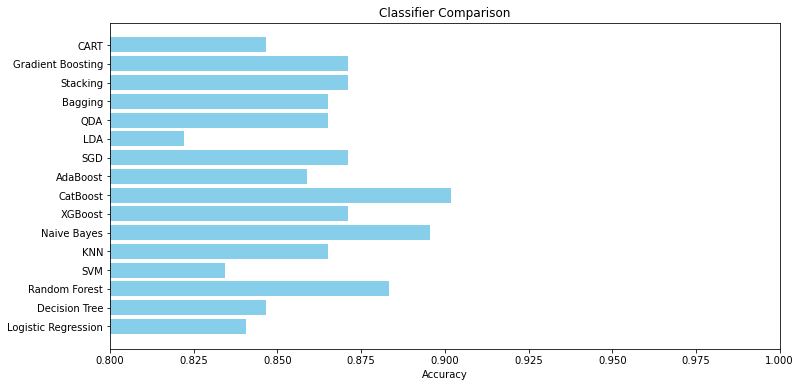

In [469]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_lrsmblr, accuracy_lrsmbdt, accuracy_lrsmbrf, accuracy_lrsmbsvc, accuracy_lrsmbknn, accuracy_lrsmbnb, accuracy_lrsmbxgb, accuracy_lrsmbcb, accuracy_lrsmbab, accuracy_lrsmbsgd, accuracy_lrsmblda, accuracy_lrsmbqda, accuracy_lrsmbbg, accuracy_lrsmbst, accuracy_lrsmbgb, accuracy_lrsmbcart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


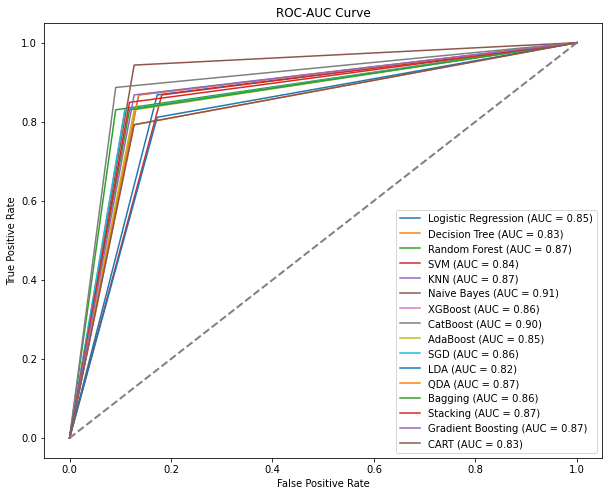

In [470]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_lrsmblr),
    ('Decision Tree', y_pred_lrsmbdt),
    ('Random Forest', y_pred_lrsmbrf),
    ('SVM', y_pred_lrsmbsvc),
    ('KNN', y_pred_lrsmbknn),
    ('Naive Bayes', y_pred_lrsmbnb),
    ('XGBoost', y_pred_lrsmbxgb),
    ('CatBoost', y_pred_lrsmbcb),
    ('AdaBoost', y_pred_lrsmbab),
    ('SGD', y_pred_lrsmbsgd),
    ('LDA', y_pred_lrsmblda),
    ('QDA', y_pred_lrsmbqda),
    ('Bagging', y_pred_lrsmbbg),
    ('Stacking', y_pred_lrsmbst),
    ('Gradient Boosting', y_pred_lrsmbgb),
    ('CART', y_pred_lrsmbcart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [471]:
X_train_selectedlrrub = X_train[selected_feature_columns_lr]
X_test_selectedlrrub = X_test[selected_feature_columns_lr]

In [472]:
from imblearn.ensemble import RUSBoostClassifier

# Create an RUSBoostClassifier object
rusboostlrrub = RUSBoostClassifier(n_estimators=50, random_state=42)

# Fit the RUSBoostClassifier on the training data with the selected features
rusboostlrrub.fit(X_train_selectedlrrub, y_train)


RUSBoostClassifier(random_state=42)

In [473]:
# Make predictions on the test data using the selected features
y_pred_lrrub = rusboostlrrub.predict(X_test_selectedlrrub)


In [474]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a Logistic Regression model
logistic_reg_modellrrublr = LogisticRegression(random_state=42)

# Fit the Logistic Regression model on the training data with the selected features
logistic_reg_modellrrublr.fit(X_train_selectedlrrub, y_train)

# Make predictions on the test data with the selected features
y_pred_lrrublr = logistic_reg_modellrrublr.predict(X_test_selectedlrrub)

# Evaluate the Logistic Regression model's performance
accuracy_lrrublr = accuracy_score(y_test, y_pred_lrrublr)
classification_report_lrrublr = classification_report(y_test, y_pred_lrrublr)

# Print the results
print("Accuracy:", accuracy_lrrublr)
print("Classification Report:\n", classification_report_lrrublr)


Accuracy: 0.9141104294478528
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       110
           1       0.90      0.83      0.86        53

    accuracy                           0.91       163
   macro avg       0.91      0.89      0.90       163
weighted avg       0.91      0.91      0.91       163



In [475]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Decision Tree Classifier model
decision_tree_modellrrubdt = DecisionTreeClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
decision_tree_modellrrubdt.fit(X_train_selectedlrrub, y_train)

# Step 3: Make predictions on the test data
y_pred_lrrubdt = decision_tree_modellrrubdt.predict(X_test_selectedlrrub)

# Step 4: Evaluate the model's performance
accuracy_lrrubdt = accuracy_score(y_test, y_pred_lrrubdt)
classification_report_lrrubdt = classification_report(y_test, y_pred_lrrubdt)

# Step 5: Print the results
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_lrrubdt)
print("Classification Report:\n", classification_report_lrrubdt)


Decision Tree Classifier:
Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       110
           1       0.75      0.79      0.77        53

    accuracy                           0.85       163
   macro avg       0.82      0.83      0.83       163
weighted avg       0.85      0.85      0.85       163



In [476]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Random Forest classifier
random_forestlrrubrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Fit the Random Forest model on the resampled training data
random_forestlrrubrf.fit(X_train_selectedlrrub, y_train)

# Step 3: Make predictions on the test data
y_pred_lrrubrf = random_forestlrrubrf.predict(X_test_selectedlrrub)

# Step 4: Evaluate the model's performance
accuracy_lrrubrf = accuracy_score(y_test, y_pred_lrrubrf)
classification_report_lrrubrf = classification_report(y_test, y_pred_lrrubrf)

# Step 5: Print the results
print("Random Forest Classifier")
print("Accuracy:", accuracy_lrrubrf)
print("Classification Report:\n", classification_report_lrrubrf)


Random Forest Classifier
Accuracy: 0.8834355828220859
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       110
           1       0.83      0.81      0.82        53

    accuracy                           0.88       163
   macro avg       0.87      0.86      0.87       163
weighted avg       0.88      0.88      0.88       163



In [477]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an SVM classifier (SVC)
svm_classifierlrrubsvc = SVC(kernel='linear', random_state=42)

# Step 2: Fit the SVM model on the resampled training data
svm_classifierlrrubsvc.fit(X_train_selectedlrrub, y_train)

# Step 3: Make predictions on the test data
y_pred_lrrubsvc = svm_classifierlrrubsvc.predict(X_test_selectedlrrub)

# Step 4: Evaluate the model's performance
accuracy_lrrubsvc = accuracy_score(y_test, y_pred_lrrubsvc)
classification_report_lrrubsvc = classification_report(y_test, y_pred_lrrubsvc)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrubsvc)
print("Classification Report:\n", classification_report_lrrubsvc)


Accuracy: 0.9079754601226994
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       110
           1       0.88      0.83      0.85        53

    accuracy                           0.91       163
   macro avg       0.90      0.89      0.89       163
weighted avg       0.91      0.91      0.91       163



In [478]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a KNN classifier
knn_classifierlrrubknn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Step 2: Fit the KNN model on the resampled training data
knn_classifierlrrubknn.fit(X_train_selectedlrrub, y_train)

# Step 3: Make predictions on the test data (using the same selected features)
y_pred_lrrubknn = knn_classifierlrrubknn.predict(X_test_selectedlrrub)

# Step 4: Evaluate the KNN classifier's performance
accuracy_lrrubknn = accuracy_score(y_test, y_pred_lrrubknn)
classification_report_lrrubknn = classification_report(y_test, y_pred_lrrubknn)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrubknn)
print("Classification Report:\n", classification_report_lrrubknn)


Accuracy: 0.8834355828220859
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       110
           1       0.85      0.77      0.81        53

    accuracy                           0.88       163
   macro avg       0.87      0.85      0.86       163
weighted avg       0.88      0.88      0.88       163



In [479]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Gaussian Naive Bayes model
naive_bayes_modellrrubnb = GaussianNB()

# Step 2: Fit the model on the resampled training data
naive_bayes_modellrrubnb.fit(X_train_selectedlrrub, y_train)

# Step 3: Make predictions on the test data
y_pred_lrrubnb = naive_bayes_modellrrubnb.predict(X_test_selectedlrrub)

# Step 4: Evaluate the model's performance
accuracy_lrrubnb = accuracy_score(y_test, y_pred_lrrubnb)
classification_report_lrrubnb = classification_report(y_test, y_pred_lrrubnb)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrubnb)
print("Classification Report:\n", classification_report_lrrubnb)

Accuracy: 0.9079754601226994
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       110
           1       0.84      0.89      0.86        53

    accuracy                           0.91       163
   macro avg       0.89      0.90      0.90       163
weighted avg       0.91      0.91      0.91       163



In [480]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an XGBoost classifier
xgb_classifierlrrubxgb = xgb.XGBClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
xgb_classifierlrrubxgb.fit(X_train_selectedlrrub, y_train)

# Step 3: Make predictions on the test data
y_pred_lrrubxgb = xgb_classifierlrrubxgb.predict(X_test_selectedlrrub)

# Step 4: Evaluate the model's performance
accuracy_lrrubxgb = accuracy_score(y_test, y_pred_lrrubxgb)
classification_report_lrrubxgb = classification_report(y_test, y_pred_lrrubxgb)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrubxgb)
print("Classification Report:\n", classification_report_lrrubxgb)


Accuracy: 0.8650306748466258
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       110
           1       0.78      0.81      0.80        53

    accuracy                           0.87       163
   macro avg       0.84      0.85      0.85       163
weighted avg       0.87      0.87      0.87       163



In [481]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a CatBoost Classifier
catboost_modellrrubcb = CatBoostClassifier(random_state=42, iterations=500, depth=6, learning_rate=0.1)

# Step 2: Fit the model on the resampled training data
catboost_modellrrubcb.fit(X_train_selectedlrrub, y_train)

# Step 3: Make predictions on the test data
y_pred_lrrubcb = catboost_modellrrubcb.predict(X_test_selectedlrrub)

# Step 4: Evaluate the model's performance
accuracy_lrrubcb = accuracy_score(y_test, y_pred_lrrubcb)
classification_report_lrrubcb = classification_report(y_test, y_pred_lrrubcb)

# Step 5: Print the results
print("CatBoost Accuracy:", accuracy_lrrubcb)
print("CatBoost Classification Report:\n", classification_report_lrrubcb)


0:	learn: 0.5934746	total: 4.1ms	remaining: 2.04s
1:	learn: 0.5172277	total: 8.33ms	remaining: 2.07s
2:	learn: 0.4451690	total: 12.6ms	remaining: 2.08s
3:	learn: 0.3979962	total: 17.1ms	remaining: 2.12s
4:	learn: 0.3615832	total: 21.2ms	remaining: 2.1s
5:	learn: 0.3318779	total: 25.2ms	remaining: 2.07s
6:	learn: 0.3059366	total: 28.8ms	remaining: 2.03s
7:	learn: 0.2907034	total: 32.8ms	remaining: 2.01s
8:	learn: 0.2691470	total: 36.8ms	remaining: 2.01s
9:	learn: 0.2558969	total: 40.7ms	remaining: 1.99s
10:	learn: 0.2415691	total: 44.6ms	remaining: 1.98s
11:	learn: 0.2309452	total: 48.6ms	remaining: 1.97s
12:	learn: 0.2209326	total: 53.5ms	remaining: 2s
13:	learn: 0.2100009	total: 57.3ms	remaining: 1.99s
14:	learn: 0.2027567	total: 61.3ms	remaining: 1.98s
15:	learn: 0.1959304	total: 65.4ms	remaining: 1.98s
16:	learn: 0.1871516	total: 70.6ms	remaining: 2s
17:	learn: 0.1780283	total: 74.9ms	remaining: 2s
18:	learn: 0.1705660	total: 79.8ms	remaining: 2.02s
19:	learn: 0.1665128	total: 85.6m

In [482]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an AdaBoost classifier
adaboost_modellrrubab = AdaBoostClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
adaboost_modellrrubab.fit(X_train_selectedlrrub, y_train)

# Step 3: Make predictions on the test data
y_pred_lrrubab = adaboost_modellrrubab.predict(X_test_selectedlrrub)

# Step 4: Evaluate the model's performance
accuracy_lrrubab = accuracy_score(y_test, y_pred_lrrubab)
classification_report_lrrubab = classification_report(y_test, y_pred_lrrubab)

# Step 5: Print the results
print("AdaBoost Accuracy:", accuracy_lrrubab)
print("AdaBoost Classification Report:\n", classification_report_lrrubab)


AdaBoost Accuracy: 0.8711656441717791
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       110
           1       0.81      0.79      0.80        53

    accuracy                           0.87       163
   macro avg       0.85      0.85      0.85       163
weighted avg       0.87      0.87      0.87       163



In [483]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an SGD Classifier
sgd_classifierlrrubsgd = SGDClassifier(loss="hinge", random_state=42)

# Step 2: Fit the SGD model on the resampled training data with selected features
sgd_classifierlrrubsgd.fit(X_train_selectedlrrub, y_train)

# Step 3: Make predictions on the test data
y_pred_lrrubsgd = sgd_classifierlrrubsgd.predict(X_test_selectedlrrub)

# Step 4: Evaluate the classifier's performance
accuracy_lrrubsgd = accuracy_score(y_test, y_pred_lrrubsgd)
classification_report_lrrubsgd = classification_report(y_test, y_pred_lrrubsgd)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrubsgd)
print("Classification Report:\n", classification_report_lrrubsgd)


Accuracy: 0.8957055214723927
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       110
           1       0.83      0.85      0.84        53

    accuracy                           0.90       163
   macro avg       0.88      0.88      0.88       163
weighted avg       0.90      0.90      0.90       163



In [484]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create an LDA model
lda_modellrrublda = LinearDiscriminantAnalysis()

# Step 2: Fit the LDA model on the resampled training data
lda_modellrrublda.fit(X_train_selectedlrrub, y_train)

# Step 3: Make predictions on the test data
y_pred_lrrublda = lda_modellrrublda.predict(X_test_selectedlrrub)

# Step 4: Evaluate the LDA model's performance
accuracy_lrrublda = accuracy_score(y_test, y_pred_lrrublda)
classification_report_lrrublda = classification_report(y_test, y_pred_lrrublda)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrublda)
print("Classification Report:\n", classification_report_lrrublda)


Accuracy: 0.901840490797546
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       110
           1       0.91      0.77      0.84        53

    accuracy                           0.90       163
   macro avg       0.90      0.87      0.88       163
weighted avg       0.90      0.90      0.90       163



In [485]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a QDA model
qda_modellrrubqda = QuadraticDiscriminantAnalysis()

# Step 2: Fit the model on the resampled training data
qda_modellrrubqda.fit(X_train_selectedlrrub, y_train)

# Step 3: Make predictions on the test data using the selected features
y_pred_lrrubqda = qda_modellrrubqda.predict(X_test_selectedlrrub)

# Step 4: Evaluate the model's performance
accuracy_lrrubqda = accuracy_score(y_test, y_pred_lrrubqda)
classification_report_lrrubqda = classification_report(y_test, y_pred_lrrubqda)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrubqda)
print("Classification Report:\n", classification_report_lrrubqda)


Accuracy: 0.901840490797546
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       110
           1       0.88      0.81      0.84        53

    accuracy                           0.90       163
   macro avg       0.89      0.88      0.89       163
weighted avg       0.90      0.90      0.90       163



In [486]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a Decision Tree model as the base estimator
base_estimatorlrrubbg= DecisionTreeClassifier(random_state=42)

# Step 2: Create a BaggingClassifier
bagging_modellrrubbg = BaggingClassifier(base_estimatorlrrubbg, n_estimators=100, random_state=42)

# Step 3: Fit the Bagging model on the resampled training data
bagging_modellrrubbg.fit(X_train_selectedlrrub, y_train)

# Step 4: Make predictions on the test data
y_pred_lrrubbg = bagging_modellrrubbg.predict(X_test_selectedlrrub)

# Step 5: Evaluate the model's performance
accuracy_lrrubbg = accuracy_score(y_test, y_pred_lrrubbg)
classification_report_lrrubbg = classification_report(y_test, y_pred_lrrubbg)

# Step 6: Print the results
print("Accuracy:", accuracy_lrrubbg)
print("Classification Report:\n", classification_report_lrrubbg)


Accuracy: 0.8773006134969326
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       110
           1       0.81      0.81      0.81        53

    accuracy                           0.88       163
   macro avg       0.86      0.86      0.86       163
weighted avg       0.88      0.88      0.88       163



In [487]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Create the base models
base_modelslrrubst = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(kernel='linear', random_state=42))
]

# Create the Stacking Classifier with a Logistic Regression meta-classifier
stacking_modellrrubst = StackingClassifier(estimators=base_modelslrrubst, final_estimator=LogisticRegression(random_state=42))

# Fit the stacking model on the resampled training data
stacking_modellrrubst.fit(X_train_selectedlrrub, y_train)

# Make predictions on the test data
y_pred_lrrubst = stacking_modellrrubst.predict(X_test_selectedlrrub)

# Evaluate the stacking model's performance
accuracy_lrrubst = accuracy_score(y_test, y_pred_lrrubst)
classification_report_lrrubst = classification_report(y_test, y_pred_lrrubst)

# Print the results
print("Stacking Model Accuracy:", accuracy_lrrubst)
print("Stacking Model Classification Report:\n", classification_report_lrrubst)


Stacking Model Accuracy: 0.9079754601226994
Stacking Model Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       110
           1       0.88      0.83      0.85        53

    accuracy                           0.91       163
   macro avg       0.90      0.89      0.89       163
weighted avg       0.91      0.91      0.91       163



In [488]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifierlrrubgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifierlrrubgb.fit(X_train_selectedlrrub, y_train)

# Make predictions on the test data
y_pred_lrrubgb = gb_classifierlrrubgb.predict(X_test_selectedlrrub)

# Evaluate the classifier's performance
accuracy_lrrubgb = accuracy_score(y_test, y_pred_lrrubgb)
print("Accuracy (Gradient Boosting):", accuracy_lrrubgb)

# Print classification report for more detailed evaluation
report_lrrubgb = classification_report(y_test, y_pred_lrrubgb)
print("Classification Report (Gradient Boosting):\n", report_lrrubgb)

Accuracy (Gradient Boosting): 0.901840490797546
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       110
           1       0.85      0.85      0.85        53

    accuracy                           0.90       163
   macro avg       0.89      0.89      0.89       163
weighted avg       0.90      0.90      0.90       163



In [489]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a CART classifier
cart_classifierlrrubcart = DecisionTreeClassifier(random_state=42)

# Step 2: Fit the model on the resampled training data
cart_classifierlrrubcart.fit(X_train_selectedlrrub, y_train)

# Step 3: Make predictions on the test data
y_pred_lrrubcart = cart_classifierlrrubcart.predict(X_test_selectedlrrub)

# Step 4: Evaluate the model's performance
accuracy_lrrubcart = accuracy_score(y_test, y_pred_lrrubcart)
classification_report_lrrubcart = classification_report(y_test, y_pred_lrrubcart)

# Step 5: Print the results
print("Accuracy:", accuracy_lrrubcart)
print("Classification Report:\n", classification_report_lrrubcart)


Accuracy: 0.8466257668711656
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       110
           1       0.75      0.79      0.77        53

    accuracy                           0.85       163
   macro avg       0.82      0.83      0.83       163
weighted avg       0.85      0.85      0.85       163



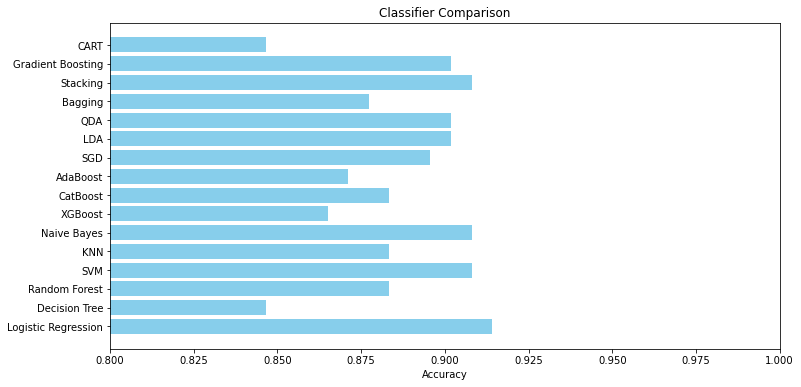

In [490]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_lrrublr, accuracy_lrrubdt, accuracy_lrrubrf, accuracy_lrrubsvc, accuracy_lrrubknn, accuracy_lrrubnb, accuracy_lrrubxgb, accuracy_lrrubcb, accuracy_lrrubab, accuracy_lrrubsgd, accuracy_lrrublda, accuracy_lrrubqda, accuracy_lrrubbg, accuracy_lrrubst, accuracy_lrrubgb, accuracy_lrrubcart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.8, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


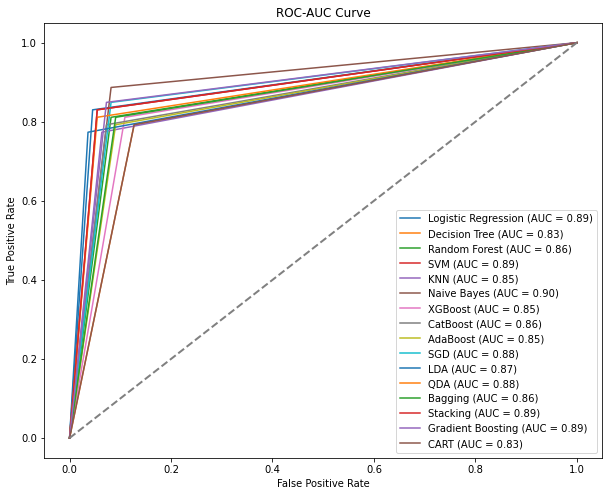

In [491]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_lrrublr),
    ('Decision Tree', y_pred_lrrubdt),
    ('Random Forest', y_pred_lrrubrf),
    ('SVM', y_pred_lrrubsvc),
    ('KNN', y_pred_lrrubknn),
    ('Naive Bayes', y_pred_lrrubnb),
    ('XGBoost', y_pred_lrrubxgb),
    ('CatBoost', y_pred_lrrubcb),
    ('AdaBoost', y_pred_lrrubab),
    ('SGD', y_pred_lrrubsgd),
    ('LDA', y_pred_lrrublda),
    ('QDA', y_pred_lrrubqda),
    ('Bagging', y_pred_lrrubbg),
    ('Stacking', y_pred_lrrubst),
    ('Gradient Boosting', y_pred_lrrubgb),
    ('CART', y_pred_lrrubcart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


anova test



In [492]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Create an instance of the SelectKBest class with the f_classif scoring function
# You can adjust k to specify the number of top features to select
selector = SelectKBest(score_func=f_classif, k=10)

# Fit and transform the selector on your feature matrix X and target y
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indicesav = selector.get_support(indices=True)

# Get the names of the selected features
selected_featuresav = X[selected_feature_indicesav]

# Print the selected feature names
print("Selected Features:", selected_featuresav)



Selected Features: [[-2.59816534e-01 -3.12491348e-01 -1.31384594e+00  1.39786236e-02
   2.31388727e+00  7.97484115e-01 -8.05131988e-01  4.88124062e-03
   5.21465364e-01 -4.19210340e-01 -9.88031974e-02 -9.44587691e-01
  -1.07865199e+00  2.55232354e+00  8.94594867e-01 -2.64312292e-01
   8.33255633e-01  2.03799964e+00  1.24989650e+00  5.25719806e-01]
 [ 1.50824740e+00  1.12321165e-01 -1.92101953e+00  3.18796691e-01
  -1.86195013e+00 -2.49809900e-01 -1.52811117e-01 -9.79864467e-02
   1.14617826e+00  1.31963566e+00  4.16894744e-01  1.26248989e+00
  -9.51269393e-01 -1.89331627e+00 -2.19869281e+00 -3.92942002e-01
  -6.03890116e-01  1.77854656e+00  2.23091225e-01 -7.21050030e-01]
 [-1.57349712e+00  4.79250096e-01 -8.69910106e-01 -2.09264712e-01
   2.04119050e+00 -1.22877615e+00  5.26824543e-02 -9.98293058e-01
   1.43100208e-01 -4.68847604e-01 -3.85193604e-01  1.24846804e+00
   2.69667789e-01  2.09531462e+00 -1.14458928e+00  7.78627365e-01
  -1.30361281e-01  1.00440506e+00  1.76979073e+00 -1.12

In [493]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming you have selected your top features and stored them in X_new and you have your target variable y

# Check the class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y))

# Create a SMOTE object
smoteav = SMOTE(random_state=42)

# Fit and resample the data to balance the classes
X_train_resampledavsm, y_train_resampledavsm = smoteav.fit_resample(X_new, y)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampledavsm))

# Now, you can proceed with your machine learning model using X_resampled and y_resampled as your new training data.


Class distribution before SMOTE: Counter({1: 900, 0: 100})
Class distribution after SMOTE: Counter({1: 900, 0: 900})


In [494]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modelavsmlr = LogisticRegression()

# Train the model on the training data
modelavsmlr.fit(X_train_resampledavsm, y_train_resampledavsm)

# Make predictions on the test data
y_pred_avsmlr = modelavsmlr.predict(X_test)

# Evaluate the model
accuracy_avsmlr = accuracy_score(y_test, y_pred_avsmlr)
confusion_avsmlr = confusion_matrix(y_test, y_pred_avsmlr)
classification_rep_avsmlr = classification_report(y_test, y_pred_avsmlr)

# Print the evaluation metrics
print("Accuracy:", accuracy_avsmlr)
print("Confusion Matrix:\n", confusion_avsmlr)
print("Classification Report:\n", classification_rep_avsmlr)


Accuracy: 0.3312883435582822
Confusion Matrix:
 [[17 93]
 [16 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.15      0.24       110
           1       0.28      0.70      0.40        53

    accuracy                           0.33       163
   macro avg       0.40      0.43      0.32       163
weighted avg       0.44      0.33      0.29       163



In [495]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treeavsmdt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treeavsmdt.fit(X_train_resampledavsm, y_train_resampledavsm)

# Make predictions on the test data
y_pred_avsmdt = decision_treeavsmdt.predict(X_test)

# Evaluate the classifier's performance
accuracy_avsmdt = accuracy_score(y_test, y_pred_avsmdt)
print("Accuracy:", accuracy_avsmdt)

# Print classification report for more detailed evaluation
report_avsmdt = classification_report(y_test, y_pred_avsmdt)
print("Classification Report:\n", report_avsmdt)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [496]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestavsmrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestavsmrf.fit(X_train_resampledavsm, y_train_resampledavsm)

# Make predictions on the test data
y_pred_avsmrf = random_forestavsmrf.predict(X_test)

# Evaluate the classifier's performance
accuracy_avsmrf = accuracy_score(y_test, y_pred_avsmrf)
print("Accuracy:", accuracy_avsmrf)

# Print classification report for more detailed evaluation
report_avsmrf = classification_report(y_test, y_pred_avsmrf)
print("Classification Report:\n", report_avsmrf)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [497]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifieravsmsvm = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifieravsmsvm.fit(X_train_resampledavsm, y_train_resampledavsm)

# Make predictions on the test data
y_pred_avsmsvm = svm_classifieravsmsvm.predict(X_test)

# Evaluate the classifier's performance
accuracy_avsmsvm = accuracy_score(y_test, y_pred_avsmsvm)
print("Accuracy:", accuracy_avsmsvm)

# Print classification report for more detailed evaluation
report_avsmsvm = classification_report(y_test, y_pred_avsmsvm)
print("Classification Report:\n", report_avsmsvm)


Accuracy: 0.3496932515337423
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.06      0.12       110
           1       0.33      0.94      0.49        53

    accuracy                           0.35       163
   macro avg       0.51      0.50      0.30       163
weighted avg       0.58      0.35      0.24       163



In [498]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScaler object
scaleravsmknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_avsmknn = scaleravsmknn.fit_transform(X_train_resampledavsm)
X_test_scaled_avsmknn = scaleravsmknn.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifieravsmknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifieravsmknn.fit(X_train_scaled_avsmknn, y_train_resampledavsm)
y_pred_avsmknn = knn_classifieravsmknn.predict(X_test_scaled_avsmknn)
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifieravsmknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifieravsmknn.fit(X_train_scaled_avsmknn, y_train_resampledavsm)

# Make predictions on the test data
y_pred_avsmknn = knn_classifieravsmknn.predict(X_test_scaled_avsmknn)

# Evaluate the classifier's performance
accuracy_avsmknn = accuracy_score(y_test, y_pred_avsmknn)
print("Accuracy:", accuracy_avsmknn)

# Print classification report for more detailed evaluation
report_avsmknn = classification_report(y_test, y_pred_avsmknn)
print("Classification Report:\n", report_avsmknn)


Accuracy: 0.3067484662576687
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.06      0.11       110
           1       0.29      0.81      0.43        53

    accuracy                           0.31       163
   macro avg       0.35      0.44      0.27       163
weighted avg       0.37      0.31      0.21       163



In [499]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifieravsmnb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifieravsmnb.fit(X_train_resampledavsm, y_train_resampledavsm)

# Make predictions on the test data
y_pred_avsmnb = naive_bayes_classifieravsmnb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avsmnb = accuracy_score(y_test, y_pred_avsmnb)
print("Accuracy:", accuracy_avsmnb)

# Print classification report for more detailed evaluation
report_avsmnb = classification_report(y_test, y_pred_avsmnb)
print("Classification Report:\n", report_avsmnb)


Accuracy: 0.39263803680981596
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.12      0.21       110
           1       0.34      0.96      0.51        53

    accuracy                           0.39       163
   macro avg       0.61      0.54      0.36       163
weighted avg       0.70      0.39      0.31       163



In [500]:

#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifieravsmxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifieravsmxgb.fit(X_train_resampledavsm, y_train_resampledavsm)

# Make predictions on the test data
y_pred_avsmxgb = xgb_classifieravsmxgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avsmxgb = accuracy_score(y_test, y_pred_avsmxgb)
print("Accuracy:", accuracy_avsmxgb)

# Print classification report for more detailed evaluation
report_avsmxgb = classification_report(y_test, y_pred_avsmxgb)
print("Classification Report:\n", report_avsmxgb)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [501]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifieravsmcb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifieravsmcb.fit(X_train_resampledavsm, y_train_resampledavsm)

# Make predictions on the test data
y_pred_avsmcb = catboost_classifieravsmcb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avsmcb = accuracy_score(y_test, y_pred_avsmcb)
print("Accuracy:", accuracy_avsmcb)

# Print classification report for more detailed evaluation
report_avsmcb = classification_report(y_test, y_pred_avsmcb)
print("Classification Report:\n", report_avsmcb)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [502]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifieravsmab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifieravsmab = AdaBoostClassifier(base_classifieravsmab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifieravsmab.fit(X_train_resampledavsm, y_train_resampledavsm)

# Make predictions on the test data
y_pred_avsmab = adaboost_classifieravsmab.predict(X_test)

# Evaluate the classifier's performance
accuracy_avsmab = accuracy_score(y_test, y_pred_avsmab)
print("Accuracy:", accuracy_avsmab)

# Print classification report for more detailed evaluation
report_avsmab = classification_report(y_test, y_pred_avsmab)
print("Classification Report:\n", report_avsmab)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [503]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifieravsmsgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifieravsmsgd.fit(X_train_resampledavsm, y_train_resampledavsm)

# Make predictions on the test data
y_pred_avsmsgd = sgd_classifieravsmsgd.predict(X_test)

# Evaluate the classifier's performance
accuracy_avsmsgd = accuracy_score(y_test, y_pred_avsmsgd)
print("Accuracy:", accuracy_avsmsgd)

# Print classification report for more detailed evaluation
report_avsmsgd = classification_report(y_test, y_pred_avsmsgd)
print("Classification Report:\n", report_avsmsgd)


Accuracy: 0.3006134969325153
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.36      0.41       110
           1       0.11      0.17      0.14        53

    accuracy                           0.30       163
   macro avg       0.30      0.27      0.27       163
weighted avg       0.36      0.30      0.32       163



In [504]:

#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifieravsmlda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifieravsmlda.fit(X_train_resampledavsm, y_train_resampledavsm)

# Make predictions on the test data
y_pred_avsmlda = lda_classifieravsmlda.predict(X_test)

# Evaluate the classifier's performance
accuracy_avsmlda = accuracy_score(y_test, y_pred_avsmlda)
print("Accuracy:", accuracy_avsmlda)

# Print classification report for more detailed evaluation
report_avsmlda = classification_report(y_test, y_pred_avsmlda)
print("Classification Report:\n", report_avsmlda)


Accuracy: 0.31901840490797545
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.07      0.13       110
           1       0.30      0.83      0.44        53

    accuracy                           0.32       163
   macro avg       0.39      0.45      0.28       163
weighted avg       0.42      0.32      0.23       163



In [505]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifieravsmqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifieravsmqda.fit(X_train_resampledavsm, y_train_resampledavsm)

# Make predictions on the test data
y_pred_avsmqda = qda_classifieravsmqda.predict(X_test)

# Evaluate the classifier's performance
accuracy_avsmqda = accuracy_score(y_test, y_pred_avsmqda)
print("Accuracy:", accuracy_avsmqda)

# Print classification report for more detailed evaluation
report_avsmqda = classification_report(y_test, y_pred_avsmqda)
print("Classification Report:\n", report_avsmqda)


Accuracy: 0.32515337423312884
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.33      1.00      0.49        53

    accuracy                           0.33       163
   macro avg       0.16      0.50      0.25       163
weighted avg       0.11      0.33      0.16       163



In [506]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifieravsmb = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifieravsmb = BaggingClassifier(base_classifieravsmb, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifieravsmb.fit(X_train_resampledavsm, y_train_resampledavsm)

# Make predictions on the test data
y_pred_avsmb = bagging_classifieravsmb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avsmb = accuracy_score(y_test, y_pred_avsmb)
print("Accuracy:", accuracy_avsmb)

# Print classification report for more detailed evaluation
report_avsmb = classification_report(y_test, y_pred_avsmb)
print("Classification Report:\n", report_avsmb)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [507]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifiersavsmst = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifieravsmst = StackingClassifier(
    estimators=base_classifiersavsmst,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifieravsmst.fit(X_train_resampledavsm, y_train_resampledavsm)

# Make predictions on the test data
y_pred_avsmst = stacking_classifieravsmst.predict(X_test)

# Evaluate the classifier's performance
accuracy_avsmst = accuracy_score(y_test, y_pred_avsmst)
print("Accuracy:", accuracy_avsmst)

# Print classification report for more detailed evaluation
report_avsmst = classification_report(y_test, y_pred_avsmst)
print("Classification Report:\n", report_avsmst)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [508]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifieravsmgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifieravsmgb.fit(X_train_resampledavsm, y_train_resampledavsm)

# Make predictions on the test data
y_pred_avsmgb = gb_classifieravsmgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avsmgb = accuracy_score(y_test, y_pred_avsmgb)
print("Accuracy (Gradient Boosting):", accuracy_avsmgb)

# Print classification report for more detailed evaluation
report_avsmgb = classification_report(y_test, y_pred_avsmgb)
print("Classification Report (Gradient Boosting):\n", report_avsmgb)


Accuracy (Gradient Boosting): 0.6503067484662577
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [509]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifieravsmcart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifieravsmcart.fit(X_train_resampledavsm, y_train_resampledavsm)

# Make predictions on the test data
y_pred_avsmcart = cart_classifieravsmcart.predict(X_test)

# Evaluate the classifier's performance
accuracy_avsmcart = accuracy_score(y_test, y_pred_avsmcart)
print("Accuracy:", accuracy_avsmcart)

# Print classification report for more detailed evaluation
report_avsmcart = classification_report(y_test, y_pred_avsmcart)
print("Classification Report:\n", report_avsmcart)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



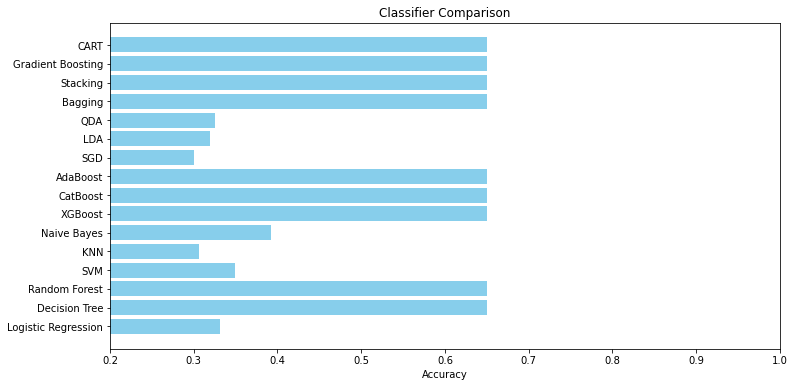

In [510]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_avsmlr, accuracy_avsmdt, accuracy_avsmrf, accuracy_avsmsvm, accuracy_avsmknn, accuracy_avsmnb, accuracy_avsmxgb, accuracy_avsmcb, accuracy_avsmab, accuracy_avsmsgd, accuracy_avsmlda, accuracy_avsmqda, accuracy_avsmb, accuracy_avsmst, accuracy_avsmgb, accuracy_avsmcart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.2, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


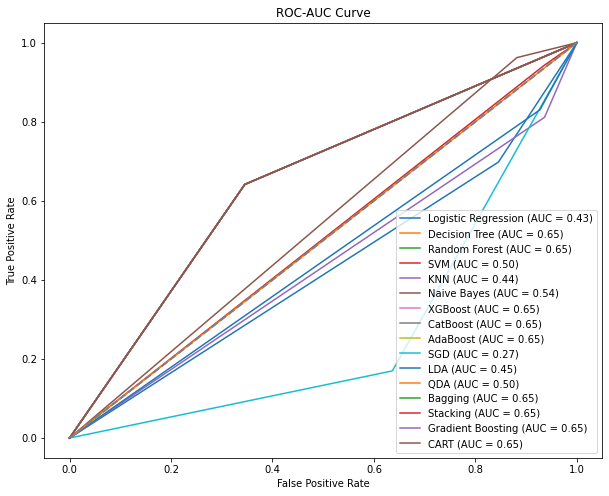

In [511]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_avsmlr),
    ('Decision Tree', y_pred_avsmdt),
    ('Random Forest', y_pred_avsmrf),
    ('SVM', y_pred_avsmsvm),
    ('KNN', y_pred_avsmknn),
    ('Naive Bayes', y_pred_avsmnb),
    ('XGBoost', y_pred_avsmxgb),
    ('CatBoost', y_pred_avsmcb),
    ('AdaBoost', y_pred_avsmab),
    ('SGD', y_pred_avsmsgd),
    ('LDA', y_pred_avsmlda),
    ('QDA', y_pred_avsmqda),
    ('Bagging', y_pred_avsmb),
    ('Stacking', y_pred_avsmst),
    ('Gradient Boosting', y_pred_avsmgb),
    ('CART', y_pred_avsmcart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [512]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Check the class distribution before ADASYN
print("Class distribution before ADASYN:", Counter(y))

# Create an ADASYN object
adasynav = ADASYN(random_state=42)

# Fit and resample the training data using ADASYN
X_train_resampledava, y_train_resampledava = adasynav.fit_resample(X_new, y)

# Check the class distribution after ADASYN
print("Class distribution after ADASYN:", Counter(y_train_resampledava))


Class distribution before ADASYN: Counter({1: 900, 0: 100})
Class distribution after ADASYN: Counter({1: 900, 0: 896})


In [513]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modelavalr = LogisticRegression()

# Train the model on the training data
modelavalr.fit(X_train_resampledava, y_train_resampledava)

# Make predictions on the test data
y_pred_avalr = modelavalr.predict(X_test)

# Evaluate the model
accuracy_avalr = accuracy_score(y_test, y_pred_avalr)
confusion_avalr = confusion_matrix(y_test, y_pred_avalr)
classification_rep_avalr = classification_report(y_test, y_pred_avalr)

# Print the evaluation metrics
print("Accuracy:", accuracy_avalr)
print("Confusion Matrix:\n", confusion_avalr)
print("Classification Report:\n", classification_rep_avalr)



Accuracy: 0.4294478527607362
Confusion Matrix:
 [[38 72]
 [21 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.35      0.45       110
           1       0.31      0.60      0.41        53

    accuracy                           0.43       163
   macro avg       0.48      0.47      0.43       163
weighted avg       0.53      0.43      0.44       163



In [514]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treeavadt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treeavadt.fit(X_train_resampledava, y_train_resampledava)

# Make predictions on the test data
y_pred_avadt = decision_treeavadt.predict(X_test)

# Evaluate the classifier's performance
accuracy_avadt = accuracy_score(y_test, y_pred_avadt)
print("Accuracy:", accuracy_avadt)

# Print classification report for more detailed evaluation
report_avadt = classification_report(y_test, y_pred_avadt)
print("Classification Report:\n", report_avadt)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [515]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestavarf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestavarf.fit(X_train_resampledava, y_train_resampledava)

# Make predictions on the test data
y_pred_avarf = random_forestavarf.predict(X_test)

# Evaluate the classifier's performance
accuracy_avarf = accuracy_score(y_test, y_pred_avarf)
print("Accuracy:", accuracy_avarf)

# Print classification report for more detailed evaluation
report_avarf = classification_report(y_test, y_pred_avarf)
print("Classification Report:\n", report_avarf)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [516]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifieravasvm = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifieravasvm.fit(X_train_resampledava, y_train_resampledava)


# Make predictions on the test data
y_pred_avasvm = svm_classifieravasvm.predict(X_test)

# Evaluate the classifier's performance
accuracy_avasvm = accuracy_score(y_test, y_pred_avasvm)
print("Accuracy:", accuracy_avasvm)

# Print classification report for more detailed evaluation
report_avasvm = classification_report(y_test, y_pred_avasvm)
print("Classification Report:\n", report_avasvm)


Accuracy: 0.3496932515337423
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.06      0.12       110
           1       0.33      0.94      0.49        53

    accuracy                           0.35       163
   macro avg       0.51      0.50      0.30       163
weighted avg       0.58      0.35      0.24       163



In [517]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScaler object
scaleravaknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_avaknn = scaleravaknn.fit_transform(X_train_resampledava)
X_test_scaled_avaknn = scaleravaknn.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifieravaknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifieravaknn.fit(X_train_scaled_avaknn, y_train_resampledava)
y_pred_avaknn = knn_classifieravaknn.predict(X_test_scaled_avaknn)
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifieravaknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifieravaknn.fit(X_train_scaled_avaknn, y_train_resampledava)

# Make predictions on the test data
y_pred_avaknn = knn_classifieravaknn.predict(X_test_scaled_avaknn)

# Evaluate the classifier's performance
accuracy_avaknn = accuracy_score(y_test, y_pred_avaknn)
print("Accuracy:", accuracy_avaknn)

# Print classification report for more detailed evaluation
report_avaknn = classification_report(y_test, y_pred_avaknn)
print("Classification Report:\n", report_avaknn)


Accuracy: 0.34355828220858897
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.03      0.05       110
           1       0.33      1.00      0.50        53

    accuracy                           0.34       163
   macro avg       0.67      0.51      0.28       163
weighted avg       0.78      0.34      0.20       163



In [518]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifieravanb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifieravanb.fit(X_train_resampledava, y_train_resampledava)

# Make predictions on the test data
y_pred_avanb = naive_bayes_classifieravanb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avanb = accuracy_score(y_test, y_pred_avanb)
print("Accuracy:", accuracy_avanb)

# Print classification report for more detailed evaluation
report_avanb = classification_report(y_test, y_pred_avanb)
print("Classification Report:\n", report_avanb)


Accuracy: 0.38650306748466257
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.10      0.18       110
           1       0.34      0.98      0.51        53

    accuracy                           0.39       163
   macro avg       0.63      0.54      0.35       163
weighted avg       0.73      0.39      0.29       163



In [519]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifieravaxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifieravaxgb.fit(X_train_resampledava, y_train_resampledava)


# Make predictions on the test data
y_pred_avaxgb = xgb_classifieravaxgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avaxgb = accuracy_score(y_test, y_pred_avaxgb)
print("Accuracy:", accuracy_avaxgb)

# Print classification report for more detailed evaluation
report_avaxgb = classification_report(y_test, y_pred_avaxgb)
print("Classification Report:\n", report_avaxgb)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [520]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifieravacb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifieravacb.fit(X_train_resampledava, y_train_resampledava)

# Make predictions on the test data
y_pred_avacb = catboost_classifieravacb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avacb = accuracy_score(y_test, y_pred_avacb)
print("Accuracy:", accuracy_avacb)

# Print classification report for more detailed evaluation
report_avacb = classification_report(y_test, y_pred_avacb)
print("Classification Report:\n", report_avacb)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [521]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifieravaab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifieravaab = AdaBoostClassifier(base_classifieravaab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifieravaab.fit(X_train_resampledava, y_train_resampledava)


# Make predictions on the test data
y_pred_avaab = adaboost_classifieravaab.predict(X_test)

# Evaluate the classifier's performance
accuracy_avaab = accuracy_score(y_test, y_pred_avaab)
print("Accuracy:", accuracy_avaab)

# Print classification report for more detailed evaluation
report_avaab = classification_report(y_test, y_pred_avaab)
print("Classification Report:\n", report_avaab)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [522]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifieravasgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifieravasgd.fit(X_train_resampledava, y_train_resampledava)


# Make predictions on the test data
y_pred_avasgd = sgd_classifieravasgd.predict(X_test)

# Evaluate the classifier's performance
accuracy_avasgd = accuracy_score(y_test, y_pred_avasgd)
print("Accuracy:", accuracy_avasgd)

# Print classification report for more detailed evaluation
report_avasgd = classification_report(y_test, y_pred_avasgd)
print("Classification Report:\n", report_avasgd)


Accuracy: 0.3128834355828221
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.05      0.08       110
           1       0.30      0.87      0.45        53

    accuracy                           0.31       163
   macro avg       0.36      0.46      0.27       163
weighted avg       0.38      0.31      0.20       163



In [523]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifieravalda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifieravalda.fit(X_train_resampledava, y_train_resampledava)

# Make predictions on the test data
y_pred_avalda = lda_classifieravalda.predict(X_test)

# Evaluate the classifier's performance
accuracy_avalda = accuracy_score(y_test, y_pred_avalda)
print("Accuracy:", accuracy_avalda)

# Print classification report for more detailed evaluation
report_avalda = classification_report(y_test, y_pred_avalda)
print("Classification Report:\n", report_avalda)


Accuracy: 0.34355828220858897
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.24      0.33       110
           1       0.26      0.57      0.36        53

    accuracy                           0.34       163
   macro avg       0.40      0.40      0.34       163
weighted avg       0.44      0.34      0.34       163



In [524]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifieravaqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifieravaqda.fit(X_train_resampledava, y_train_resampledava)

# Make predictions on the test data
y_pred_avaqda = qda_classifieravaqda.predict(X_test)

# Evaluate the classifier's performance
accuracy_avaqda = accuracy_score(y_test, y_pred_avaqda)
print("Accuracy:", accuracy_avaqda)

# Print classification report for more detailed evaluation
report_avaqda = classification_report(y_test, y_pred_avaqda)
print("Classification Report:\n", report_avaqda)


Accuracy: 0.32515337423312884
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.33      1.00      0.49        53

    accuracy                           0.33       163
   macro avg       0.16      0.50      0.25       163
weighted avg       0.11      0.33      0.16       163



In [525]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifieravab = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifieravab = BaggingClassifier(base_classifieravab, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifieravab.fit(X_train_resampledava, y_train_resampledava)

# Make predictions on the test data
y_pred_avab = bagging_classifieravab.predict(X_test)

# Evaluate the classifier's performance
accuracy_avab = accuracy_score(y_test, y_pred_avab)
print("Accuracy:", accuracy_avab)

# Print classification report for more detailed evaluation
report_avab = classification_report(y_test, y_pred_avab)
print("Classification Report:\n", report_avab)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [526]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifiersavast = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifieravast = StackingClassifier(
    estimators=base_classifiersavast,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifieravast.fit(X_train_resampledava, y_train_resampledava)

# Make predictions on the test data
y_pred_avast = stacking_classifieravast.predict(X_test)

# Evaluate the classifier's performance
accuracy_avast = accuracy_score(y_test, y_pred_avast)
print("Accuracy:", accuracy_avast)

# Print classification report for more detailed evaluation
report_avast = classification_report(y_test, y_pred_avast)
print("Classification Report:\n", report_avast)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [527]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifieravagb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifieravagb.fit(X_train_resampledava, y_train_resampledava)

# Make predictions on the test data
y_pred_avagb = gb_classifieravagb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avagb = accuracy_score(y_test, y_pred_avagb)
print("Accuracy (Gradient Boosting):", accuracy_avagb)

# Print classification report for more detailed evaluation
report_avagb = classification_report(y_test, y_pred_avagb)
print("Classification Report (Gradient Boosting):\n", report_avagb)


Accuracy (Gradient Boosting): 0.6503067484662577
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [528]:

#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifieravacart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifieravacart.fit(X_train_resampledava, y_train_resampledava)

# Make predictions on the test data
y_pred_avacart = cart_classifieravacart.predict(X_test)

# Evaluate the classifier's performance
accuracy_avacart = accuracy_score(y_test, y_pred_avacart)
print("Accuracy:", accuracy_avacart)

# Print classification report for more detailed evaluation
report_avacart = classification_report(y_test, y_pred_avacart)
print("Classification Report:\n", report_avacart)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



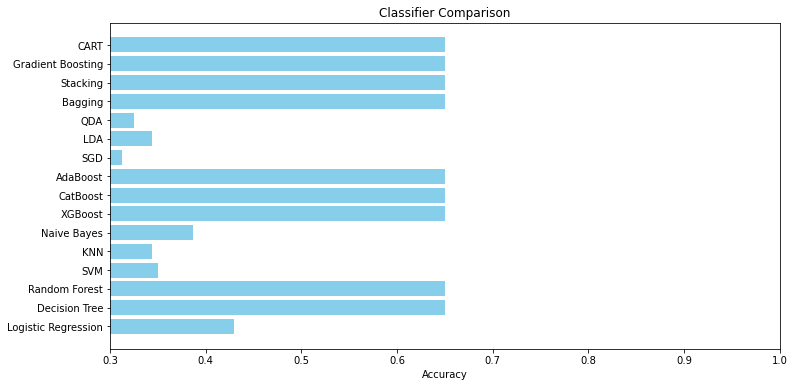

In [619]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_avalr, accuracy_avadt, accuracy_avarf, accuracy_avasvm, accuracy_avaknn, accuracy_avanb, accuracy_avaxgb, accuracy_avacb, accuracy_avaab, accuracy_avasgd, accuracy_avalda, accuracy_avaqda, accuracy_avab, accuracy_avast, accuracy_avagb, accuracy_avacart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.3, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


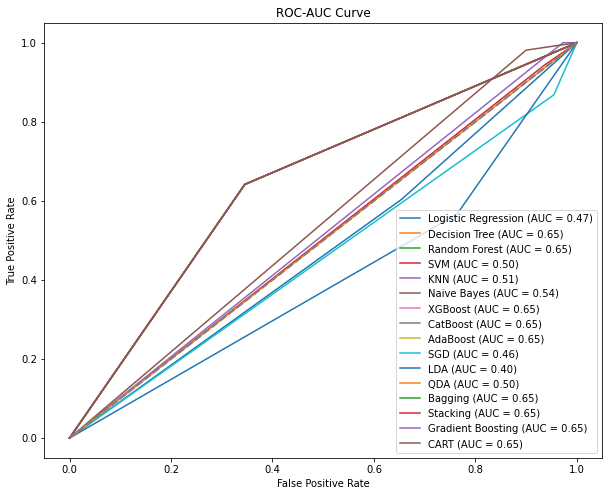

In [620]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_avalr),
    ('Decision Tree', y_pred_avadt),
    ('Random Forest', y_pred_avarf),
    ('SVM', y_pred_avasvm),
    ('KNN', y_pred_avaknn),
    ('Naive Bayes', y_pred_avanb),
    ('XGBoost', y_pred_avaxgb),
    ('CatBoost', y_pred_avacb),
    ('AdaBoost', y_pred_avaab),
    ('SGD', y_pred_avasgd),
    ('LDA', y_pred_avalda),
    ('QDA', y_pred_avaqda),
    ('Bagging', y_pred_avab),
    ('Stacking', y_pred_avast),
    ('Gradient Boosting', y_pred_avagb),
    ('CART', y_pred_avacart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [531]:
#ENN
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter

# Assuming you have prepared your dataset and split it into X_new (features) and y (target variable) after ANOVA feature selection

# Check the class distribution before ENN
print("Class distribution before ENN:", Counter(y))

# Create an EditedNearestNeighbours object
ennave = EditedNearestNeighbours(sampling_strategy='auto')

# Fit and resample the training data using ENN
X_train_resampledave, y_train_resampledave = ennave.fit_resample(X_new, y)

# Check the class distribution after ENN
print("Class distribution after ENN:", Counter(y_train_resampledave))


Class distribution before ENN: Counter({1: 900, 0: 100})
Class distribution after ENN: Counter({1: 900, 0: 100})


In [532]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create a Logistic Regression model
logistic_reg_model_enn = LogisticRegression(random_state=42)

# Fit the model on the resampled training data
logistic_reg_model_enn.fit(X_train_resampledave, y_train_resampledave)

# Make predictions on the test data
y_pred_enn = logistic_reg_model_enn.predict(X_test)

# Evaluate the model's performance
accuracy_enn = accuracy_score(y_test, y_pred_enn)
confusion_matrix_enn = confusion_matrix(y_test, y_pred_enn)
classification_report_enn = classification_report(y_test, y_pred_enn)

# Print the evaluation metrics
print("Accuracy:", accuracy_enn)
print("Confusion Matrix:\n", confusion_matrix_enn)
print("Classification Report:\n", classification_report_enn)


Accuracy: 0.3006134969325153
Confusion Matrix:
 [[  6 104]
 [ 10  43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.05      0.10       110
           1       0.29      0.81      0.43        53

    accuracy                           0.30       163
   macro avg       0.33      0.43      0.26       163
weighted avg       0.35      0.30      0.20       163



In [533]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treeavedt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treeavedt.fit(X_train_resampledave, y_train_resampledave)

# Make predictions on the test data
y_pred_avedt = decision_treeavedt.predict(X_test)

# Evaluate the classifier's performance
accuracy_avedt = accuracy_score(y_test, y_pred_avedt)
print("Accuracy:", accuracy_avedt)

# Print classification report for more detailed evaluation
report_avedt = classification_report(y_test, y_pred_avedt)
print("Classification Report:\n", report_avedt)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [534]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestaverf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestaverf.fit(X_train_resampledave, y_train_resampledave)

# Make predictions on the test data
y_pred_averf = random_forestaverf.predict(X_test)

# Evaluate the classifier's performance
accuracy_averf = accuracy_score(y_test, y_pred_averf)
print("Accuracy:", accuracy_averf)

# Print classification report for more detailed evaluation
report_averf = classification_report(y_test, y_pred_averf)
print("Classification Report:\n", report_averf)


Accuracy: 0.3128834355828221
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.07      0.12       110
           1       0.30      0.81      0.43        53

    accuracy                           0.31       163
   macro avg       0.37      0.44      0.28       163
weighted avg       0.40      0.31      0.23       163



In [535]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifieravesvm = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifieravesvm.fit(X_train_resampledave, y_train_resampledave)

# Make predictions on the test data
y_pred_avesvm = svm_classifieravesvm.predict(X_test)

# Evaluate the classifier's performance
accuracy_avesvm = accuracy_score(y_test, y_pred_avesvm)
print("Accuracy:", accuracy_avesvm)

# Print classification report for more detailed evaluation
report_avesvm = classification_report(y_test, y_pred_avesvm)
print("Classification Report:\n", report_avesvm)


Accuracy: 0.3496932515337423
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.06      0.12       110
           1       0.33      0.94      0.49        53

    accuracy                           0.35       163
   macro avg       0.51      0.50      0.30       163
weighted avg       0.58      0.35      0.24       163



In [536]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScaler object
scaleraveknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_aveknn = scaleraveknn.fit_transform(X_train_resampledave)
X_test_scaled_aveknn = scaleraveknn.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifieraveknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifieraveknn.fit(X_train_scaled_aveknn, y_train_resampledave)
y_pred_aveknn = knn_classifieraveknn.predict(X_test_scaled_aveknn)
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifieraveknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifieraveknn.fit(X_train_scaled_aveknn, y_train_resampledave)

# Make predictions on the test data
y_pred_aveknn = knn_classifieraveknn.predict(X_test_scaled_aveknn)

# Evaluate the classifier's performance
accuracy_aveknn = accuracy_score(y_test, y_pred_aveknn)
print("Accuracy:", accuracy_aveknn)

# Print classification report for more detailed evaluation
report_aveknn = classification_report(y_test, y_pred_aveknn)
print("Classification Report:\n", report_aveknn)


Accuracy: 0.31901840490797545
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.32      0.98      0.48        53

    accuracy                           0.32       163
   macro avg       0.16      0.49      0.24       163
weighted avg       0.10      0.32      0.16       163



In [537]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifieravenb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifieravenb.fit(X_train_resampledave, y_train_resampledave)

# Make predictions on the test data
y_pred_avenb = naive_bayes_classifieravenb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avenb = accuracy_score(y_test, y_pred_avenb)
print("Accuracy:", accuracy_avenb)

# Print classification report for more detailed evaluation
report_avenb = classification_report(y_test, y_pred_avenb)
print("Classification Report:\n", report_avenb)


Accuracy: 0.4233128834355828
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.21      0.33       110
           1       0.35      0.87      0.49        53

    accuracy                           0.42       163
   macro avg       0.56      0.54      0.41       163
weighted avg       0.63      0.42      0.38       163



In [538]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifieravexgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifieravexgb.fit(X_train_resampledave, y_train_resampledave)


# Make predictions on the test data
y_pred_avexgb = xgb_classifieravexgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avexgb = accuracy_score(y_test, y_pred_avexgb)
print("Accuracy:", accuracy_avexgb)

# Print classification report for more detailed evaluation
report_avexgb = classification_report(y_test, y_pred_avexgb)
print("Classification Report:\n", report_avexgb)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [539]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifieravecb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifieravecb.fit(X_train_resampledave, y_train_resampledave)

# Make predictions on the test data
y_pred_avecb = catboost_classifieravecb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avecb = accuracy_score(y_test, y_pred_avecb)
print("Accuracy:", accuracy_avecb)

# Print classification report for more detailed evaluation
report_avecb = classification_report(y_test, y_pred_avecb)
print("Classification Report:\n", report_avecb)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [540]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifieraveab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifieraveab = AdaBoostClassifier(base_classifieraveab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifieraveab.fit(X_train_resampledave, y_train_resampledave)


# Make predictions on the test data
y_pred_aveab = adaboost_classifieraveab.predict(X_test)

# Evaluate the classifier's performance
accuracy_aveab = accuracy_score(y_test, y_pred_aveab)
print("Accuracy:", accuracy_aveab)

# Print classification report for more detailed evaluation
report_aveab = classification_report(y_test, y_pred_aveab)
print("Classification Report:\n", report_aveab)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [541]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifieravesgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifieravesgd.fit(X_train_resampledave, y_train_resampledave)


# Make predictions on the test data
y_pred_avesgd = sgd_classifieravesgd.predict(X_test)

# Evaluate the classifier's performance
accuracy_avesgd = accuracy_score(y_test, y_pred_avesgd)
print("Accuracy:", accuracy_avesgd)

# Print classification report for more detailed evaluation
report_avesgd = classification_report(y_test, y_pred_avesgd)
print("Classification Report:\n", report_avesgd)


Accuracy: 0.36809815950920244
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.14      0.23       110
           1       0.32      0.85      0.47        53

    accuracy                           0.37       163
   macro avg       0.49      0.49      0.35       163
weighted avg       0.54      0.37      0.30       163



In [542]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifieravelda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifieravelda.fit(X_train_resampledave, y_train_resampledave)

# Make predictions on the test data
y_pred_avelda = lda_classifieravelda.predict(X_test)

# Evaluate the classifier's performance
accuracy_avelda = accuracy_score(y_test, y_pred_avelda)
print("Accuracy:", accuracy_avelda)

# Print classification report for more detailed evaluation
report_avelda = classification_report(y_test, y_pred_avelda)
print("Classification Report:\n", report_avelda)


Accuracy: 0.3006134969325153
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.05      0.08       110
           1       0.30      0.83      0.44        53

    accuracy                           0.30       163
   macro avg       0.33      0.44      0.26       163
weighted avg       0.34      0.30      0.20       163



In [543]:

#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifieraveqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifieraveqda.fit(X_train_resampledave, y_train_resampledave)

# Make predictions on the test data
y_pred_aveqda = qda_classifieraveqda.predict(X_test)

# Evaluate the classifier's performance
accuracy_aveqda = accuracy_score(y_test, y_pred_aveqda)
print("Accuracy:", accuracy_aveqda)

# Print classification report for more detailed evaluation
report_aveqda = classification_report(y_test, y_pred_aveqda)
print("Classification Report:\n", report_aveqda)

Accuracy: 0.32515337423312884
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.33      1.00      0.49        53

    accuracy                           0.33       163
   macro avg       0.16      0.50      0.25       163
weighted avg       0.11      0.33      0.16       163



In [544]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifieraveb = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifieraveb = BaggingClassifier(base_classifieraveb, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifieraveb.fit(X_train_resampledave, y_train_resampledave)

# Make predictions on the test data
y_pred_aveb = bagging_classifieraveb.predict(X_test)

# Evaluate the classifier's performance
accuracy_aveb = accuracy_score(y_test, y_pred_aveb)
print("Accuracy:", accuracy_aveb)

# Print classification report for more detailed evaluation
report_aveb = classification_report(y_test, y_pred_aveb)
print("Classification Report:\n", report_aveb)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [545]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifiersavest = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifieravest = StackingClassifier(
    estimators=base_classifiersavest,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifieravest.fit(X_train_resampledave, y_train_resampledave)

# Make predictions on the test data
y_pred_avest = stacking_classifieravest.predict(X_test)

# Evaluate the classifier's performance
accuracy_avest = accuracy_score(y_test, y_pred_avest)
print("Accuracy:", accuracy_avest)

# Print classification report for more detailed evaluation
report_avest = classification_report(y_test, y_pred_avest)
print("Classification Report:\n", report_avest)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [546]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifieravegb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifieravegb.fit(X_train_resampledave, y_train_resampledave)

# Make predictions on the test data
y_pred_avegb = gb_classifieravegb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avegb = accuracy_score(y_test, y_pred_avegb)
print("Accuracy (Gradient Boosting):", accuracy_avegb)

# Print classification report for more detailed evaluation
report_avegb = classification_report(y_test, y_pred_avegb)
print("Classification Report (Gradient Boosting):\n", report_avegb)


Accuracy (Gradient Boosting): 0.6503067484662577
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [547]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifieravecart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifieravecart.fit(X_train_resampledave, y_train_resampledave)

# Make predictions on the test data
y_pred_avecart = cart_classifieravecart.predict(X_test)

# Evaluate the classifier's performance
accuracy_avecart = accuracy_score(y_test, y_pred_avecart)
print("Accuracy:", accuracy_avecart)

# Print classification report for more detailed evaluation
report_avecart = classification_report(y_test, y_pred_avecart)
print("Classification Report:\n", report_avecart)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



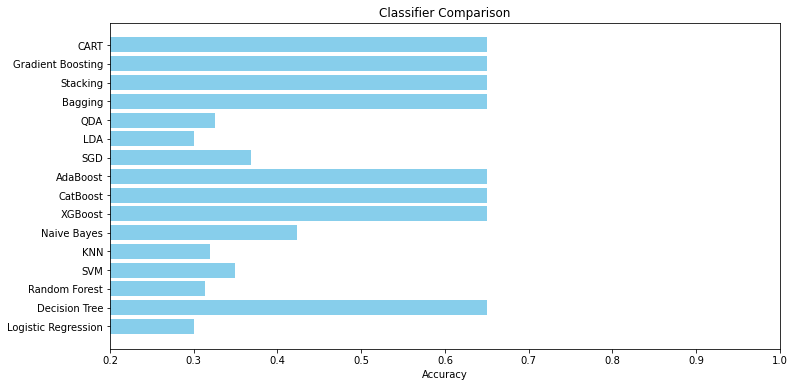

In [624]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_enn, accuracy_avedt, accuracy_averf, accuracy_avesvm, accuracy_aveknn, accuracy_avenb, accuracy_avexgb, accuracy_avecb, accuracy_aveab, accuracy_avesgd, accuracy_avelda, accuracy_aveqda, accuracy_aveb, accuracy_avest, accuracy_avegb, accuracy_avecart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.2, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


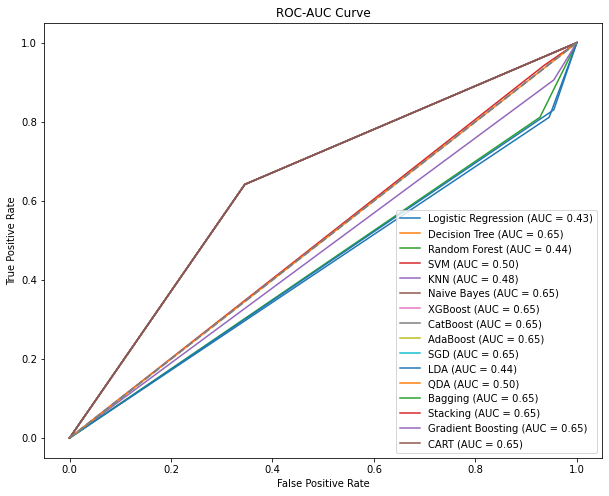

In [628]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_enn),
    ('Decision Tree', y_pred_avedt),
    ('Random Forest', y_pred_averf),
    ('SVM', y_pred_avesvm),
    ('KNN', y_pred_aveknn),
    ('Naive Bayes', y_pred_aveb),
    ('XGBoost', y_pred_avexgb),
    ('CatBoost', y_pred_avecb),
    ('AdaBoost', y_pred_aveab),
    ('SGD', y_pred_avegb),
    ('LDA', y_pred_avelda),
    ('QDA', y_pred_aveqda),
    ('Bagging', y_pred_aveb),
    ('Stacking', y_pred_avest),
    ('Gradient Boosting', y_pred_avegb),
    ('CART', y_pred_avecart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [550]:
#NCR
from imblearn.under_sampling import NearMiss
from collections import Counter

# Check the class distribution before NearMiss-3
print("Class distribution before NearMiss-3:", Counter(y))

# Create a NearMiss-3 object
near_missavn = NearMiss(version=3)

# Fit and resample the training data using NearMiss-3
X_train_resampledavn, y_train_resampledavn = near_missavn.fit_resample(X_new, y)

# Check the class distribution after NearMiss-3
print("Class distribution after NearMiss-3:", Counter(y_train_resampledavn))


Class distribution before NearMiss-3: Counter({1: 900, 0: 100})
Class distribution after NearMiss-3: Counter({0: 100, 1: 100})


In [551]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modelavnlr = LogisticRegression()

# Train the model on the training data
modelavnlr.fit(X_train_resampledavn, y_train_resampledavn)

# Make predictions on the test data
y_pred_avnlr = modelavnlr.predict(X_test)

# Evaluate the model
accuracy_avnlr = accuracy_score(y_test, y_pred_avnlr)
confusion_avnlr = confusion_matrix(y_test, y_pred_avnlr)
classification_rep_avnlr = classification_report(y_test, y_pred_avnlr)

# Print the evaluation metrics
print("Accuracy:", accuracy_avnlr)
print("Confusion Matrix:\n", confusion_avnlr)
print("Classification Report:\n", classification_rep_avnlr)





Accuracy: 0.3558282208588957
Confusion Matrix:
 [[30 80]
 [25 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.27      0.36       110
           1       0.26      0.53      0.35        53

    accuracy                           0.36       163
   macro avg       0.40      0.40      0.36       163
weighted avg       0.45      0.36      0.36       163



In [552]:

#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treeavndt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treeavndt.fit(X_train_resampledavn, y_train_resampledavn)

# Make predictions on the test data
y_pred_avndt = decision_treeavndt.predict(X_test)

# Evaluate the classifier's performance
accuracy_avndt = accuracy_score(y_test, y_pred_avndt)
print("Accuracy:", accuracy_avndt)

# Print classification report for more detailed evaluation
report_avndt = classification_report(y_test, y_pred_avndt)
print("Classification Report:\n", report_avndt)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [553]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestavnrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestavnrf.fit(X_train_resampledavn, y_train_resampledavn)

# Make predictions on the test data
y_pred_avnrf = random_forestavnrf.predict(X_test)

# Evaluate the classifier's performance
accuracy_avnrf = accuracy_score(y_test, y_pred_avnrf)
print("Accuracy:", accuracy_avnrf)

# Print classification report for more detailed evaluation
report_avnrf = classification_report(y_test, y_pred_avnrf)
print("Classification Report:\n", report_avnrf)


Accuracy: 0.588957055214724
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.54      0.64       110
           1       0.42      0.70      0.52        53

    accuracy                           0.59       163
   macro avg       0.60      0.62      0.58       163
weighted avg       0.67      0.59      0.60       163



In [554]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifieravnsvm = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifieravnsvm.fit(X_train_resampledavn, y_train_resampledavn)

# Make predictions on the test data
y_pred_avnsvm = svm_classifieravnsvm.predict(X_test)

# Evaluate the classifier's performance
accuracy_avnsvm = accuracy_score(y_test, y_pred_avnsvm)
print("Accuracy:", accuracy_avnsvm)

# Print classification report for more detailed evaluation
report_avnsvm = classification_report(y_test, y_pred_avnsvm)
print("Classification Report:\n", report_avnsvm)


Accuracy: 0.4785276073619632
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.67      0.64       110
           1       0.10      0.08      0.09        53

    accuracy                           0.48       163
   macro avg       0.35      0.37      0.36       163
weighted avg       0.44      0.48      0.46       163



In [555]:

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScaler object
scaleravnknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_avnknn = scaleravnknn.fit_transform(X_train_resampledavn)
X_test_scaled_avnknn = scaleravnknn.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifieravnknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifieravnknn.fit(X_train_scaled_avnknn, y_train_resampledavn)
y_pred_aveknn = knn_classifieravnknn.predict(X_test_scaled_avnknn)
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifieravnknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifieravnknn.fit(X_train_scaled_avnknn, y_train_resampledavn)

# Make predictions on the test data
y_pred_avnknn = knn_classifieravnknn.predict(X_test_scaled_avnknn)

# Evaluate the classifier's performance
accuracy_avnknn = accuracy_score(y_test, y_pred_avnknn)
print("Accuracy:", accuracy_avnknn)

# Print classification report for more detailed evaluation
report_avnknn = classification_report(y_test, y_pred_avnknn)
print("Classification Report:\n", report_avnknn)

Accuracy: 0.32515337423312884
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.05      0.08       110
           1       0.31      0.91      0.47        53

    accuracy                           0.33       163
   macro avg       0.41      0.48      0.27       163
weighted avg       0.44      0.33      0.21       163



In [556]:

#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifieravnnb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifieravnnb.fit(X_train_resampledavn, y_train_resampledavn)

# Make predictions on the test data
y_pred_avnnb = naive_bayes_classifieravnnb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avnnb = accuracy_score(y_test, y_pred_avnnb)
print("Accuracy:", accuracy_avnnb)

# Print classification report for more detailed evaluation
report_avnnb = classification_report(y_test, y_pred_avnnb)
print("Classification Report:\n", report_avnnb)


Accuracy: 0.5337423312883436
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.37      0.52       110
           1       0.40      0.87      0.55        53

    accuracy                           0.53       163
   macro avg       0.63      0.62      0.53       163
weighted avg       0.71      0.53      0.53       163



In [557]:

#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifieravnxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifieravnxgb.fit(X_train_resampledavn, y_train_resampledavn)


# Make predictions on the test data
y_pred_avnxgb = xgb_classifieravnxgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avnxgb = accuracy_score(y_test, y_pred_avnxgb)
print("Accuracy:", accuracy_avnxgb)

# Print classification report for more detailed evaluation
report_avnxgb = classification_report(y_test, y_pred_avnxgb)
print("Classification Report:\n", report_avnxgb)

Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [558]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifieravncb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifieravncb.fit(X_train_resampledavn, y_train_resampledavn)

# Make predictions on the test data
y_pred_avncb = catboost_classifieravncb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avncb = accuracy_score(y_test, y_pred_avncb)
print("Accuracy:", accuracy_avncb)

# Print classification report for more detailed evaluation
report_avncb = classification_report(y_test, y_pred_avncb)
print("Classification Report:\n", report_avncb)



Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [559]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifieravnab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifieravnab = AdaBoostClassifier(base_classifieravnab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifieravnab.fit(X_train_resampledavn, y_train_resampledavn)


# Make predictions on the test data
y_pred_avnab = adaboost_classifieravnab.predict(X_test)

# Evaluate the classifier's performance
accuracy_avnab = accuracy_score(y_test, y_pred_avnab)
print("Accuracy:", accuracy_avnab)

# Print classification report for more detailed evaluation
report_avnab = classification_report(y_test, y_pred_avnab)
print("Classification Report:\n", report_avnab)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [560]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifieravnsgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifieravnsgd.fit(X_train_resampledavn, y_train_resampledavn)


# Make predictions on the test data
y_pred_avnsgd = sgd_classifieravnsgd.predict(X_test)

# Evaluate the classifier's performance
accuracy_avnsgd = accuracy_score(y_test, y_pred_avnsgd)
print("Accuracy:", accuracy_avnsgd)

# Print classification report for more detailed evaluation
report_avnsgd = classification_report(y_test, y_pred_avnsgd)
print("Classification Report:\n", report_avnsgd)


Accuracy: 0.5828220858895705
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.86      0.74       110
           1       0.00      0.00      0.00        53

    accuracy                           0.58       163
   macro avg       0.32      0.43      0.37       163
weighted avg       0.43      0.58      0.50       163



In [561]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifieravnlda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifieravnlda.fit(X_train_resampledavn, y_train_resampledavn)

# Make predictions on the test data
y_pred_avnlda = lda_classifieravnlda.predict(X_test)

# Evaluate the classifier's performance
accuracy_avnlda = accuracy_score(y_test, y_pred_avnlda)
print("Accuracy:", accuracy_avnlda)

# Print classification report for more detailed evaluation
report_avnlda = classification_report(y_test, y_pred_avnlda)
print("Classification Report:\n", report_avnlda)


Accuracy: 0.26993865030674846
Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.04      0.06       110
           1       0.27      0.75      0.40        53

    accuracy                           0.27       163
   macro avg       0.25      0.40      0.23       163
weighted avg       0.25      0.27      0.17       163



In [562]:

#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifieravnqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifieravnqda.fit(X_train_resampledavn, y_train_resampledavn)

# Make predictions on the test data
y_pred_avnqda = qda_classifieravnqda.predict(X_test)

# Evaluate the classifier's performance
accuracy_avnqda = accuracy_score(y_test, y_pred_avnqda)
print("Accuracy:", accuracy_avnqda)

# Print classification report for more detailed evaluation
report_avnqda = classification_report(y_test, y_pred_avnqda)
print("Classification Report:\n", report_avnqda)


Accuracy: 0.32515337423312884
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.33      1.00      0.49        53

    accuracy                           0.33       163
   macro avg       0.16      0.50      0.25       163
weighted avg       0.11      0.33      0.16       163



In [563]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifieravnb = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifieravnb = BaggingClassifier(base_classifieravnb, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifieravnb.fit(X_train_resampledavn, y_train_resampledavn)

# Make predictions on the test data
y_pred_avnb = bagging_classifieravnb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avnb = accuracy_score(y_test, y_pred_avnb)
print("Accuracy:", accuracy_avnb)

# Print classification report for more detailed evaluation
report_avnb = classification_report(y_test, y_pred_avnb)
print("Classification Report:\n", report_avnb)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [564]:

#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifiersavnst = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifieravnst = StackingClassifier(
    estimators=base_classifiersavnst,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifieravnst.fit(X_train_resampledavn, y_train_resampledavn)

# Make predictions on the test data
y_pred_avnst = stacking_classifieravnst.predict(X_test)

# Evaluate the classifier's performance
accuracy_avnst = accuracy_score(y_test, y_pred_avnst)
print("Accuracy:", accuracy_avnst)

# Print classification report for more detailed evaluation
report_avnst = classification_report(y_test, y_pred_avnst)
print("Classification Report:\n", report_avnst)

Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [565]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifieravngb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifieravngb.fit(X_train_resampledavn, y_train_resampledavn)

# Make predictions on the test data
y_pred_avngb = gb_classifieravngb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avngb = accuracy_score(y_test, y_pred_avngb)
print("Accuracy (Gradient Boosting):", accuracy_avngb)

# Print classification report for more detailed evaluation
report_avngb = classification_report(y_test, y_pred_avngb)
print("Classification Report (Gradient Boosting):\n", report_avngb)


Accuracy (Gradient Boosting): 0.6503067484662577
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [566]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifieravncart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifieravncart.fit(X_train_resampledavn, y_train_resampledavn)

# Make predictions on the test data
y_pred_avncart = cart_classifieravncart.predict(X_test)

# Evaluate the classifier's performance
accuracy_avncart = accuracy_score(y_test, y_pred_avncart)
print("Accuracy:", accuracy_avncart)

# Print classification report for more detailed evaluation
report_avncart = classification_report(y_test, y_pred_avncart)
print("Classification Report:\n", report_avncart)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



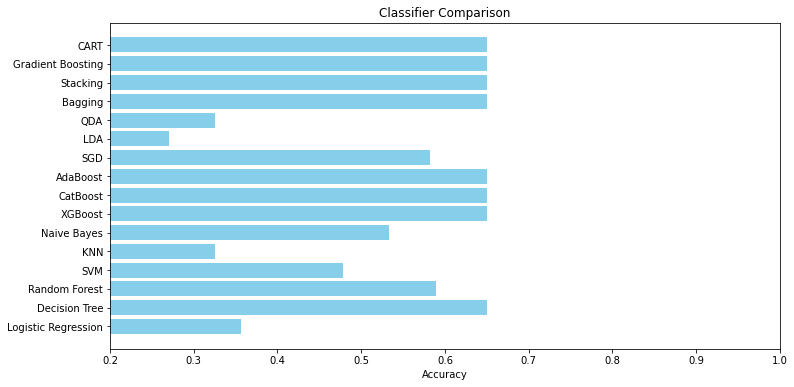

In [631]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_avnlr, accuracy_avndt, accuracy_avnrf, accuracy_avnsvm, accuracy_avnknn, accuracy_avnnb, accuracy_avnxgb, accuracy_avncb, accuracy_avnab, accuracy_avnsgd, accuracy_avnlda, accuracy_avnqda, accuracy_avnb, accuracy_avnst, accuracy_avngb, accuracy_avncart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.2, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


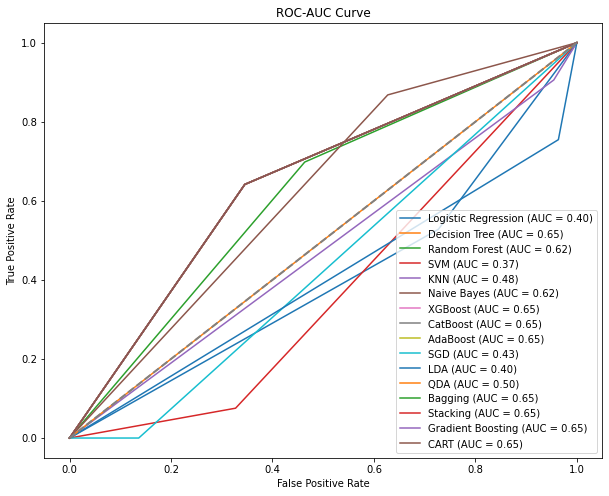

In [632]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_avnlr),
    ('Decision Tree', y_pred_avndt),
    ('Random Forest', y_pred_avnrf),
    ('SVM', y_pred_avnsvm),
    ('KNN', y_pred_avnknn),
    ('Naive Bayes', y_pred_avnnb),
    ('XGBoost', y_pred_avnxgb),
    ('CatBoost', y_pred_avncb),
    ('AdaBoost', y_pred_avnab),
    ('SGD', y_pred_avnsgd),
    ('LDA', y_pred_avnlda),
    ('QDA', y_pred_avnqda),
    ('Bagging', y_pred_avnb),
    ('Stacking', y_pred_avnst),
    ('Gradient Boosting', y_pred_avngb),
    ('CART', y_pred_avncart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [569]:
#Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Check the class distribution before random undersampling
print("Class distribution before Random UnderSampling:", Counter(y))

# Create a RandomUnderSampler object
rusavr = RandomUnderSampler(random_state=42)

# Fit and resample the training data using Random UnderSampling
X_train_resampledavr, y_train_resampledavr = rusavr.fit_resample(X_new, y)

# Check the class distribution after Random UnderSampling
print("Class distribution after Random UnderSampling:", Counter(y_train_resampledavr))


Class distribution before Random UnderSampling: Counter({1: 900, 0: 100})
Class distribution after Random UnderSampling: Counter({0: 100, 1: 100})


In [570]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modelavrlr = LogisticRegression()

# Train the model on the training data
modelavrlr.fit(X_train_resampledavr, y_train_resampledavr)

# Make predictions on the test data
y_pred_avrlr = modelavrlr.predict(X_test)

# Evaluate the model
accuracy_avrlr = accuracy_score(y_test, y_pred_avrlr)
confusion_avrlr = confusion_matrix(y_test, y_pred_avrlr)
classification_rep_avrlr = classification_report(y_test, y_pred_avrlr)

# Print the evaluation metrics
print("Accuracy:", accuracy_avrlr)
print("Confusion Matrix:\n", confusion_avrlr)
print("Classification Report:\n", classification_rep_avrlr)

Accuracy: 0.4539877300613497
Confusion Matrix:
 [[67 43]
 [46  7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.61      0.60       110
           1       0.14      0.13      0.14        53

    accuracy                           0.45       163
   macro avg       0.37      0.37      0.37       163
weighted avg       0.45      0.45      0.45       163



In [571]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treeavrdt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treeavrdt.fit(X_train_resampledavr, y_train_resampledavr)

# Make predictions on the test data
y_pred_avrdt = decision_treeavrdt.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrdt = accuracy_score(y_test, y_pred_avrdt)
print("Accuracy:", accuracy_avrdt)

# Print classification report for more detailed evaluation
report_avrdt = classification_report(y_test, y_pred_avrdt)
print("Classification Report:\n", report_avrdt)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [572]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestavrrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestavrrf.fit(X_train_resampledavr, y_train_resampledavr)

# Make predictions on the test data
y_pred_avrrf = random_forestavrrf.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrrf = accuracy_score(y_test, y_pred_avrrf)
print("Accuracy:", accuracy_avrrf)

# Print classification report for more detailed evaluation
report_avrrf = classification_report(y_test, y_pred_avrrf)
print("Classification Report:\n", report_avrrf)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [573]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifieravrsvm = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifieravrsvm.fit(X_train_resampledavr, y_train_resampledavr)

# Make predictions on the test data
y_pred_avrsvm = svm_classifieravrsvm.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrsvm = accuracy_score(y_test, y_pred_avrsvm)
print("Accuracy:", accuracy_avrsvm)

# Print classification report for more detailed evaluation
report_avrsvm = classification_report(y_test, y_pred_avrsvm)
print("Classification Report:\n", report_avrsvm)


Accuracy: 0.5460122699386503
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.69      0.67       110
           1       0.28      0.25      0.26        53

    accuracy                           0.55       163
   macro avg       0.47      0.47      0.47       163
weighted avg       0.53      0.55      0.54       163



In [574]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScaler object
scaleravrknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_avrknn = scaleravrknn.fit_transform(X_train_resampledavr)
X_test_scaled_avrknn = scaleravrknn.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifieravrknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifieravrknn.fit(X_train_scaled_avrknn, y_train_resampledavr)
y_pred_avrknn = knn_classifieravrknn.predict(X_test_scaled_avrknn)
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifieravrknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifieravrknn.fit(X_train_scaled_avrknn, y_train_resampledavr)

# Make predictions on the test data
y_pred_avrknn = knn_classifieravrknn.predict(X_test_scaled_avrknn)

# Evaluate the classifier's performance
accuracy_avrknn = accuracy_score(y_test, y_pred_avrknn)
print("Accuracy:", accuracy_avrknn)

# Print classification report for more detailed evaluation
report_avrknn = classification_report(y_test, y_pred_avrknn)
print("Classification Report:\n", report_avrknn)


Accuracy: 0.5521472392638037
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.81      0.71       110
           1       0.05      0.02      0.03        53

    accuracy                           0.55       163
   macro avg       0.34      0.41      0.37       163
weighted avg       0.44      0.55      0.49       163



In [575]:

#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifieravrnb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifieravrnb.fit(X_train_resampledavr, y_train_resampledavr)

# Make predictions on the test data
y_pred_avrnb = naive_bayes_classifieravrnb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrnb = accuracy_score(y_test, y_pred_avrnb)
print("Accuracy:", accuracy_avrnb)

# Print classification report for more detailed evaluation
report_avrnb = classification_report(y_test, y_pred_avrnb)
print("Classification Report:\n", report_avrnb)


Accuracy: 0.6196319018404908
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72       110
           1       0.41      0.38      0.39        53

    accuracy                           0.62       163
   macro avg       0.56      0.56      0.56       163
weighted avg       0.61      0.62      0.62       163



In [576]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifieravrxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifieravrxgb.fit(X_train_resampledavr, y_train_resampledavr)


# Make predictions on the test data
y_pred_avrxgb = xgb_classifieravrxgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrxgb = accuracy_score(y_test, y_pred_avrxgb)
print("Accuracy:", accuracy_avrxgb)

# Print classification report for more detailed evaluation
report_avrxgb = classification_report(y_test, y_pred_avrxgb)
print("Classification Report:\n", report_avrxgb)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [577]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifieravrcb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifieravrcb.fit(X_train_resampledavr, y_train_resampledavr)

# Make predictions on the test data
y_pred_avrcb = catboost_classifieravrcb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrcb = accuracy_score(y_test, y_pred_avrcb)
print("Accuracy:", accuracy_avrcb)

# Print classification report for more detailed evaluation
report_avrcb = classification_report(y_test, y_pred_avrcb)
print("Classification Report:\n", report_avrcb)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [578]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifieravrab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifieravrab = AdaBoostClassifier(base_classifieravrab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifieravrab.fit(X_train_resampledavr, y_train_resampledavr)


# Make predictions on the test data
y_pred_avrab = adaboost_classifieravrab.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrab = accuracy_score(y_test, y_pred_avrab)
print("Accuracy:", accuracy_avrab)

# Print classification report for more detailed evaluation
report_avrab = classification_report(y_test, y_pred_avrab)
print("Classification Report:\n", report_avrab)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [579]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifieravrsgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifieravrsgd.fit(X_train_resampledavr, y_train_resampledavr)


# Make predictions on the test data
y_pred_avrsgd = sgd_classifieravrsgd.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrsgd = accuracy_score(y_test, y_pred_avrsgd)
print("Accuracy:", accuracy_avrsgd)

# Print classification report for more detailed evaluation
report_avrsgd = classification_report(y_test, y_pred_avrsgd)
print("Classification Report:\n", report_avrsgd)


Accuracy: 0.5766871165644172
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.85      0.73       110
           1       0.00      0.00      0.00        53

    accuracy                           0.58       163
   macro avg       0.32      0.43      0.37       163
weighted avg       0.43      0.58      0.49       163



In [580]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifieravrlda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifieravrlda.fit(X_train_resampledavr, y_train_resampledavr)

# Make predictions on the test data
y_pred_avrlda = lda_classifieravrlda.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrlda = accuracy_score(y_test, y_pred_avrlda)
print("Accuracy:", accuracy_avrlda)

# Print classification report for more detailed evaluation
report_avrlda = classification_report(y_test, y_pred_avrlda)
print("Classification Report:\n", report_avrlda)


Accuracy: 0.32515337423312884
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.28      0.36       110
           1       0.22      0.42      0.29        53

    accuracy                           0.33       163
   macro avg       0.36      0.35      0.32       163
weighted avg       0.41      0.33      0.34       163



In [581]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifieravrqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifieravrqda.fit(X_train_resampledavr, y_train_resampledavr)

# Make predictions on the test data
y_pred_avrqda = qda_classifieravrqda.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrqda = accuracy_score(y_test, y_pred_avrqda)
print("Accuracy:", accuracy_avrqda)

# Print classification report for more detailed evaluation
report_avrqda = classification_report(y_test, y_pred_avrqda)
print("Classification Report:\n", report_avrqda)


Accuracy: 0.31901840490797545
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.32      0.98      0.48        53

    accuracy                           0.32       163
   macro avg       0.16      0.49      0.24       163
weighted avg       0.10      0.32      0.16       163



In [582]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifieravrb = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifieravrb = BaggingClassifier(base_classifieravrb, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifieravrb.fit(X_train_resampledavr, y_train_resampledavr)

# Make predictions on the test data
y_pred_avrb = bagging_classifieravrb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrb = accuracy_score(y_test, y_pred_avrb)
print("Accuracy:", accuracy_avrb)

# Print classification report for more detailed evaluation
report_avrb = classification_report(y_test, y_pred_avrb)
print("Classification Report:\n", report_avrb)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [583]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifiersavrst = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifieravrst = StackingClassifier(
    estimators=base_classifiersavrst,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifieravrst.fit(X_train_resampledavr, y_train_resampledavr)

# Make predictions on the test data
y_pred_avrst = stacking_classifieravrst.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrst = accuracy_score(y_test, y_pred_avrst)
print("Accuracy:", accuracy_avrst)

# Print classification report for more detailed evaluation
report_avrst = classification_report(y_test, y_pred_avrst)
print("Classification Report:\n", report_avrst)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [584]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifieravrgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifieravrgb.fit(X_train_resampledavr, y_train_resampledavr)

# Make predictions on the test data
y_pred_avrgb = gb_classifieravrgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrgb = accuracy_score(y_test, y_pred_avrgb)
print("Accuracy (Gradient Boosting):", accuracy_avrgb)

# Print classification report for more detailed evaluation
report_avrgb = classification_report(y_test, y_pred_avrgb)
print("Classification Report (Gradient Boosting):\n", report_avrgb)


Accuracy (Gradient Boosting): 0.6503067484662577
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [585]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifieravrcart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifieravrcart.fit(X_train_resampledavr, y_train_resampledavr)

# Make predictions on the test data
y_pred_avrcart = cart_classifieravrcart.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrcart = accuracy_score(y_test, y_pred_avrcart)
print("Accuracy:", accuracy_avrcart)

# Print classification report for more detailed evaluation
report_avrcart = classification_report(y_test, y_pred_avrcart)
print("Classification Report:\n", report_avrcart)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



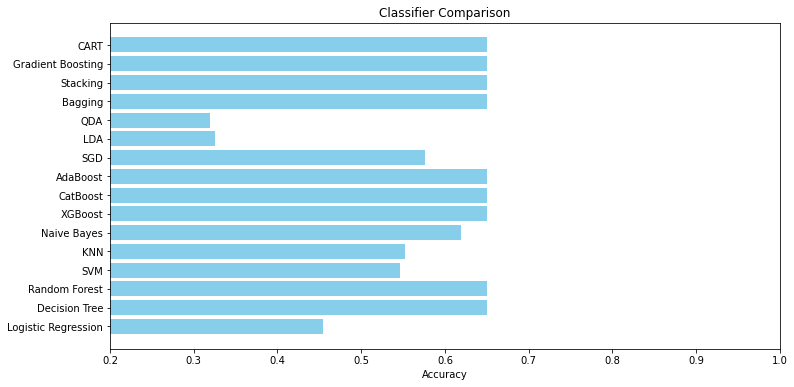

In [633]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_avrlr, accuracy_avrdt, accuracy_avrrf, accuracy_avrsvm, accuracy_avrknn, accuracy_avrnb, accuracy_avrxgb, accuracy_avrcb, accuracy_avrab, accuracy_avrsgd, accuracy_avrlda, accuracy_avrqda, accuracy_avrb, accuracy_avrst, accuracy_avrgb, accuracy_avrcart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.2, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


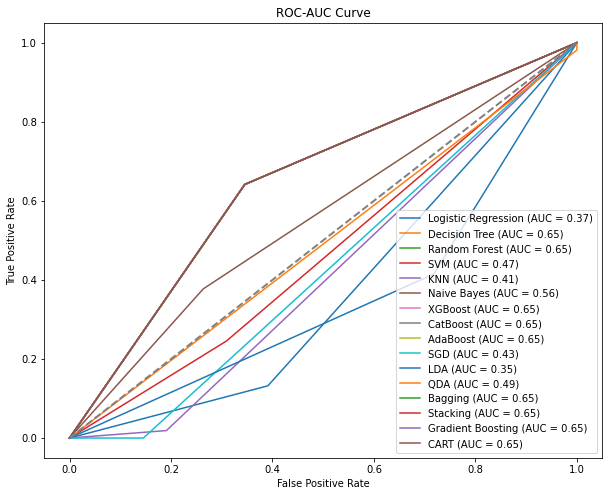

In [634]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_avrlr),
    ('Decision Tree', y_pred_avrdt),
    ('Random Forest', y_pred_avrrf),
    ('SVM', y_pred_avrsvm),
    ('KNN', y_pred_avrknn),
    ('Naive Bayes', y_pred_avrnb),
    ('XGBoost', y_pred_avrxgb),
    ('CatBoost', y_pred_avrcb),
    ('AdaBoost', y_pred_avrab),
    ('SGD', y_pred_avrsgd),
    ('LDA', y_pred_avrlda),
    ('QDA', y_pred_avrqda),
    ('Bagging', y_pred_avrb),
    ('Stacking', y_pred_avrst),
    ('Gradient Boosting', y_pred_avrgb),
    ('CART', y_pred_avrcart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [588]:
#Random Oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Check the class distribution before random oversampling
print("Class distribution before Random Oversampling:", Counter(y))

# Create a RandomOverSampler object
rosavro = RandomOverSampler(random_state=42)

# Fit and transform the training data to balance the classes
X_train_resampledavro, y_train_resampledavro = rosavro.fit_resample(X_new, y)

# Check the class distribution after random oversampling
print("Class distribution after Random Oversampling:", Counter(y_train_resampledavro))


Class distribution before Random Oversampling: Counter({1: 900, 0: 100})
Class distribution after Random Oversampling: Counter({1: 900, 0: 900})


In [589]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modelavrolr = LogisticRegression()

# Train the model on the training data
modelavrolr.fit(X_train_resampledavro, y_train_resampledavro)

# Make predictions on the test data
y_pred_avrolr = modelavrolr.predict(X_test)

# Evaluate the model
accuracy_avrolr = accuracy_score(y_test, y_pred_avrolr)
confusion_avrolr = confusion_matrix(y_test, y_pred_avrolr)
classification_rep_avrolr = classification_report(y_test, y_pred_avrolr)

# Print the evaluation metrics
print("Accuracy:", accuracy_avrolr)
print("Confusion Matrix:\n", confusion_avrolr)
print("Classification Report:\n", classification_rep_avrolr)


Accuracy: 0.4662576687116564
Confusion Matrix:
 [[46 64]
 [23 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.42      0.51       110
           1       0.32      0.57      0.41        53

    accuracy                           0.47       163
   macro avg       0.49      0.49      0.46       163
weighted avg       0.55      0.47      0.48       163



In [590]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treeavrodt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treeavrodt.fit(X_train_resampledavro, y_train_resampledavro)

# Make predictions on the test data
y_pred_avrodt = decision_treeavrodt.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrodt = accuracy_score(y_test, y_pred_avrodt)
print("Accuracy:", accuracy_avrodt)

# Print classification report for more detailed evaluation
report_avrodt = classification_report(y_test, y_pred_avrodt)
print("Classification Report:\n", report_avrodt)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [591]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestavrorf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestavrorf.fit(X_train_resampledavro, y_train_resampledavro)

# Make predictions on the test data
y_pred_avrorf = random_forestavrorf.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrorf = accuracy_score(y_test, y_pred_avrorf)
print("Accuracy:", accuracy_avrorf)

# Print classification report for more detailed evaluation
report_avrorf = classification_report(y_test, y_pred_avrorf)
print("Classification Report:\n", report_avrorf)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [592]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifieravrosvm = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifieravrosvm.fit(X_train_resampledavro, y_train_resampledavro)

# Make predictions on the test data
y_pred_avrosvm = svm_classifieravrosvm.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrosvm = accuracy_score(y_test, y_pred_avrosvm)
print("Accuracy:", accuracy_avrosvm)

# Print classification report for more detailed evaluation
report_avrosvm = classification_report(y_test, y_pred_avrosvm)
print("Classification Report:\n", report_avrosvm)


Accuracy: 0.3496932515337423
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.06      0.12       110
           1       0.33      0.94      0.49        53

    accuracy                           0.35       163
   macro avg       0.51      0.50      0.30       163
weighted avg       0.58      0.35      0.24       163



In [593]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScaler object
scaleravroknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_avroknn = scaleravroknn.fit_transform(X_train_resampledavro)
X_test_scaled_avroknn = scaleravroknn.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifieravroknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifieravroknn.fit(X_train_scaled_avroknn, y_train_resampledavro)
y_pred_avroknn = knn_classifieravroknn.predict(X_test_scaled_avroknn)
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifieravroknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifieravroknn.fit(X_train_scaled_avroknn, y_train_resampledavro)

# Make predictions on the test data
y_pred_avroknn = knn_classifieravroknn.predict(X_test_scaled_avroknn)

# Evaluate the classifier's performance
accuracy_avroknn = accuracy_score(y_test, y_pred_avroknn)
print("Accuracy:", accuracy_avroknn)

# Print classification report for more detailed evaluation
report_avroknn = classification_report(y_test, y_pred_avroknn)
print("Classification Report:\n", report_avroknn)


Accuracy: 0.2822085889570552
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.07      0.12       110
           1       0.27      0.72      0.39        53

    accuracy                           0.28       163
   macro avg       0.31      0.39      0.26       163
weighted avg       0.32      0.28      0.21       163



In [594]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifieravronb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifieravronb.fit(X_train_resampledavro, y_train_resampledavro)

# Make predictions on the test data
y_pred_avronb = naive_bayes_classifieravronb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avronb = accuracy_score(y_test, y_pred_avronb)
print("Accuracy:", accuracy_avronb)

# Print classification report for more detailed evaluation
report_avronb = classification_report(y_test, y_pred_avronb)
print("Classification Report:\n", report_avronb)


Accuracy: 0.5153374233128835
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.36      0.50       110
           1       0.39      0.83      0.53        53

    accuracy                           0.52       163
   macro avg       0.60      0.60      0.52       163
weighted avg       0.68      0.52      0.51       163



In [595]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifieravroxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifieravroxgb.fit(X_train_resampledavro, y_train_resampledavro)


# Make predictions on the test data
y_pred_avroxgb = xgb_classifieravroxgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avroxgb = accuracy_score(y_test, y_pred_avroxgb)
print("Accuracy:", accuracy_avroxgb)

# Print classification report for more detailed evaluation
report_avroxgb = classification_report(y_test, y_pred_avroxgb)
print("Classification Report:\n", report_avroxgb)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [596]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifieravrocb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifieravrocb.fit(X_train_resampledavro, y_train_resampledavro)

# Make predictions on the test data
y_pred_avrocb = catboost_classifieravrocb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrocb = accuracy_score(y_test, y_pred_avrocb)
print("Accuracy:", accuracy_avrocb)

# Print classification report for more detailed evaluation
report_avrocb = classification_report(y_test, y_pred_avrocb)
print("Classification Report:\n", report_avrocb)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [597]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifieravroab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifieravroab = AdaBoostClassifier(base_classifieravroab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifieravroab.fit(X_train_resampledavro, y_train_resampledavro)


# Make predictions on the test data
y_pred_avroab = adaboost_classifieravroab.predict(X_test)

# Evaluate the classifier's performance
accuracy_avroab = accuracy_score(y_test, y_pred_avroab)
print("Accuracy:", accuracy_avroab)

# Print classification report for more detailed evaluation
report_avroab = classification_report(y_test, y_pred_avroab)
print("Classification Report:\n", report_avroab)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [598]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifieravrosgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifieravrosgd.fit(X_train_resampledavro, y_train_resampledavro)


# Make predictions on the test data
y_pred_avrosgd = sgd_classifieravrosgd.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrosgd = accuracy_score(y_test, y_pred_avrosgd)
print("Accuracy:", accuracy_avrosgd)

# Print classification report for more detailed evaluation
report_avrosgd = classification_report(y_test, y_pred_avrosgd)
print("Classification Report:\n", report_avrosgd)


Accuracy: 0.294478527607362
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.10      0.16       110
           1       0.27      0.70      0.39        53

    accuracy                           0.29       163
   macro avg       0.34      0.40      0.28       163
weighted avg       0.36      0.29      0.24       163



In [599]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifieravrolda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifieravrolda.fit(X_train_resampledavro, y_train_resampledavro)

# Make predictions on the test data
y_pred_avrolda = lda_classifieravrolda.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrolda = accuracy_score(y_test, y_pred_avrolda)
print("Accuracy:", accuracy_avrolda)

# Print classification report for more detailed evaluation
report_avrolda = classification_report(y_test, y_pred_avrolda)
print("Classification Report:\n", report_avrolda)


Accuracy: 0.3128834355828221
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.07      0.12       110
           1       0.30      0.81      0.43        53

    accuracy                           0.31       163
   macro avg       0.37      0.44      0.28       163
weighted avg       0.40      0.31      0.23       163



In [600]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifieravroqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifieravroqda.fit(X_train_resampledavro, y_train_resampledavro)

# Make predictions on the test data
y_pred_avroqda = qda_classifieravroqda.predict(X_test)

# Evaluate the classifier's performance
accuracy_avroqda = accuracy_score(y_test, y_pred_avroqda)
print("Accuracy:", accuracy_avroqda)

# Print classification report for more detailed evaluation
report_avroqda = classification_report(y_test, y_pred_avroqda)
print("Classification Report:\n", report_avroqda)


Accuracy: 0.32515337423312884
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.33      1.00      0.49        53

    accuracy                           0.33       163
   macro avg       0.16      0.50      0.25       163
weighted avg       0.11      0.33      0.16       163



In [601]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifieravrob = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifieravrob = BaggingClassifier(base_classifieravrob, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifieravrob.fit(X_train_resampledavro, y_train_resampledavro)

# Make predictions on the test data
y_pred_avrob = bagging_classifieravrob.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrob = accuracy_score(y_test, y_pred_avrob)
print("Accuracy:", accuracy_avrob)

# Print classification report for more detailed evaluation
report_avrob = classification_report(y_test, y_pred_avrob)
print("Classification Report:\n", report_avrob)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [602]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifiersavrost = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifieravrost = StackingClassifier(
    estimators=base_classifiersavrost,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifieravrost.fit(X_train_resampledavro, y_train_resampledavro)

# Make predictions on the test data
y_pred_avrost = stacking_classifieravrost.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrost = accuracy_score(y_test, y_pred_avrost)
print("Accuracy:", accuracy_avrost)

# Print classification report for more detailed evaluation
report_avrost = classification_report(y_test, y_pred_avrost)
print("Classification Report:\n", report_avrost)


Accuracy: 0.32515337423312884
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.33      1.00      0.49        53

    accuracy                           0.33       163
   macro avg       0.16      0.50      0.25       163
weighted avg       0.11      0.33      0.16       163



In [603]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifieravrogb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifieravrogb.fit(X_train_resampledavro, y_train_resampledavro)

# Make predictions on the test data
y_pred_avrogb = gb_classifieravrogb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrogb = accuracy_score(y_test, y_pred_avrogb)
print("Accuracy (Gradient Boosting):", accuracy_avrogb)

# Print classification report for more detailed evaluation
report_avrogb = classification_report(y_test, y_pred_avrogb)
print("Classification Report (Gradient Boosting):\n", report_avrogb)


Accuracy (Gradient Boosting): 0.6503067484662577
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [604]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifieravrocart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifieravrocart.fit(X_train_resampledavro, y_train_resampledavro)

# Make predictions on the test data
y_pred_avrocart = cart_classifieravrocart.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrocart = accuracy_score(y_test, y_pred_avrocart)
print("Accuracy:", accuracy_avrocart)

# Print classification report for more detailed evaluation
report_avrocart = classification_report(y_test, y_pred_avrocart)
print("Classification Report:\n", report_avrocart)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



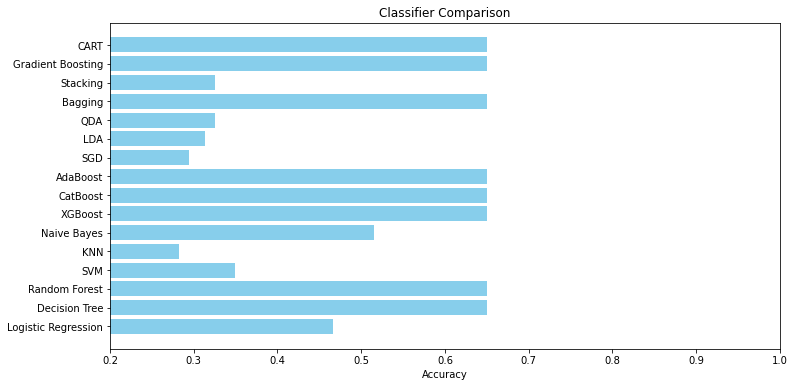

In [636]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_avrolr, accuracy_avrodt, accuracy_avrorf, accuracy_avrosvm, accuracy_avroknn, accuracy_avronb, accuracy_avroxgb, accuracy_avrocb, accuracy_avroab, accuracy_avrosgd, accuracy_avrolda, accuracy_avroqda, accuracy_avrob, accuracy_avrost, accuracy_avrogb, accuracy_avrocart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.2, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


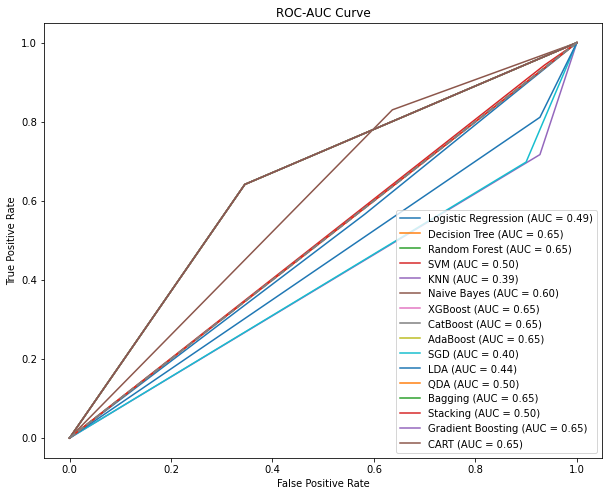

In [637]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_avrolr),
    ('Decision Tree', y_pred_avrodt),
    ('Random Forest', y_pred_avrorf),
    ('SVM', y_pred_avrosvm),
    ('KNN', y_pred_avroknn),
    ('Naive Bayes', y_pred_avronb),
    ('XGBoost', y_pred_avroxgb),
    ('CatBoost', y_pred_avrocb),
    ('AdaBoost', y_pred_avroab),
    ('SGD', y_pred_avrosgd),
    ('LDA', y_pred_avrolda),
    ('QDA', y_pred_avroqda),
    ('Bagging', y_pred_avrob),
    ('Stacking', y_pred_avrost),
    ('Gradient Boosting', y_pred_avrogb),
    ('CART', y_pred_avrocart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [607]:
#Borderline SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

# Check the class distribution before Borderline-SMOTE
print("Class distribution before Borderline-SMOTE:", Counter(y))

# Create a BorderlineSMOTE object
borderline_smoteavbs = BorderlineSMOTE(random_state=42)

# Fit and resample the training data using Borderline-SMOTE
X_train_resampledavbs, y_train_resampledavbs = borderline_smoteavbs.fit_resample(X_new, y)

# Check the class distribution after Borderline-SMOTE
print("Class distribution after Borderline-SMOTE:", Counter(y_train_resampledavbs))


Class distribution before Borderline-SMOTE: Counter({1: 900, 0: 100})
Class distribution after Borderline-SMOTE: Counter({1: 900, 0: 900})


In [608]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a Logistic Regression model
modelavbslr = LogisticRegression()

# Train the model on the training data
modelavbslr.fit(X_train_resampledavbs, y_train_resampledavbs)

# Make predictions on the test data
y_pred_avbslr = modelavbslr.predict(X_test)

# Evaluate the model
accuracy_avbslr = accuracy_score(y_test, y_pred_avbslr)
confusion_avbslr = confusion_matrix(y_test, y_pred_avbslr)
classification_rep_avbslr = classification_report(y_test, y_pred_avbslr)

# Print the evaluation metrics
print("Accuracy:", accuracy_avbslr)
print("Confusion Matrix:\n", confusion_avbslr)
print("Classification Report:\n", classification_rep_avbslr)


Accuracy: 0.5337423312883436
Confusion Matrix:
 [[85 25]
 [51  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.77      0.69       110
           1       0.07      0.04      0.05        53

    accuracy                           0.53       163
   macro avg       0.35      0.41      0.37       163
weighted avg       0.45      0.53      0.48       163



In [638]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treeavbsdt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treeavbsdt.fit(X_train_resampledavbs, y_train_resampledavbs)

# Make predictions on the test data
y_pred_avbsdt = decision_treeavbsdt.predict(X_test)

# Evaluate the classifier's performance
accuracy_avbsdt = accuracy_score(y_test, y_pred_avbsdt)
print("Accuracy:", accuracy_avbsdt)

# Print classification report for more detailed evaluation
report_avbsdt = classification_report(y_test, y_pred_avbsdt)
print("Classification Report:\n", report_avbsdt)






Accuracy: 0.32515337423312884
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.33      1.00      0.49        53

    accuracy                           0.33       163
   macro avg       0.16      0.50      0.25       163
weighted avg       0.11      0.33      0.16       163



In [639]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestavbsrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestavbsrf.fit(X_train_resampledavbs, y_train_resampledavbs)

# Make predictions on the test data
y_pred_avbsrf = random_forestavbsrf.predict(X_test)

# Evaluate the classifier's performance
accuracy_avbsrf = accuracy_score(y_test, y_pred_avbsrf)
print("Accuracy:", accuracy_avbsrf)

# Print classification report for more detailed evaluation
report_avbsrf = classification_report(y_test, y_pred_avbsrf)
print("Classification Report:\n", report_avbsrf)






Accuracy: 0.3558282208588957
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.05      0.09       110
           1       0.34      1.00      0.50        53

    accuracy                           0.36       163
   macro avg       0.67      0.52      0.29       163
weighted avg       0.78      0.36      0.22       163



In [640]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifieravbssvm = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifieravbssvm.fit(X_train_resampledavbs, y_train_resampledavbs)

# Make predictions on the test data
y_pred_avbssvm = svm_classifieravbssvm.predict(X_test)

# Evaluate the classifier's performance
accuracy_avbssvm = accuracy_score(y_test, y_pred_avbssvm)
print("Accuracy:", accuracy_avbssvm)

# Print classification report for more detailed evaluation
report_avbssvm = classification_report(y_test, y_pred_avbssvm)
print("Classification Report:\n", report_avbssvm)







Accuracy: 0.3496932515337423
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.06      0.12       110
           1       0.33      0.94      0.49        53

    accuracy                           0.35       163
   macro avg       0.51      0.50      0.30       163
weighted avg       0.58      0.35      0.24       163



In [641]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScaler object
scaleravbsknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_avbsknn = scaleravbsknn.fit_transform(X_train_resampledavbs)
X_test_scaled_avbsknn = scaleravbsknn.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifieravbsknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifieravbsknn.fit(X_train_scaled_avbsknn, y_train_resampledavbs)
y_pred_avbsknn = knn_classifieravbsknn.predict(X_test_scaled_avbsknn)
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifieravbsknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifieravbsknn.fit(X_train_scaled_avbsknn, y_train_resampledavbs)

# Make predictions on the test data
y_pred_avbsknn = knn_classifieravbsknn.predict(X_test_scaled_avbsknn)

# Evaluate the classifier's performance
accuracy_avbsknn = accuracy_score(y_test, y_pred_avbsknn)
print("Accuracy:", accuracy_avbsknn)

# Print classification report for more detailed evaluation
report_avbsknn = classification_report(y_test, y_pred_avbsknn)
print("Classification Report:\n", report_avbsknn)







Accuracy: 0.3374233128834356
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.03      0.05       110
           1       0.33      0.98      0.49        53

    accuracy                           0.34       163
   macro avg       0.54      0.50      0.27       163
weighted avg       0.61      0.34      0.20       163



In [642]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifieravbsnb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifieravbsnb.fit(X_train_resampledavbs, y_train_resampledavbs)

# Make predictions on the test data
y_pred_avbsnb = naive_bayes_classifieravbsnb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avbsnb = accuracy_score(y_test, y_pred_avbsnb)
print("Accuracy:", accuracy_avbsnb)

# Print classification report for more detailed evaluation
report_avbsnb = classification_report(y_test, y_pred_avbsnb)
print("Classification Report:\n", report_avbsnb)





Accuracy: 0.36809815950920244
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.07      0.13       110
           1       0.34      0.98      0.50        53

    accuracy                           0.37       163
   macro avg       0.61      0.53      0.32       163
weighted avg       0.71      0.37      0.25       163



In [643]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifieravbsxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifieravbsxgb.fit(X_train_resampledavbs, y_train_resampledavbs)


# Make predictions on the test data
y_pred_avbsxgb = xgb_classifieravbsxgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avbsxgb = accuracy_score(y_test, y_pred_avbsxgb)
print("Accuracy:", accuracy_avbsxgb)

# Print classification report for more detailed evaluation
report_avbsxgb = classification_report(y_test, y_pred_avbsxgb)
print("Classification Report:\n", report_avbsxgb)






Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [644]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifieravbscb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifieravbscb.fit(X_train_resampledavbs, y_train_resampledavbs)

# Make predictions on the test data
y_pred_avbscb = catboost_classifieravbscb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avbscb = accuracy_score(y_test, y_pred_avbscb)
print("Accuracy:", accuracy_avbscb)

# Print classification report for more detailed evaluation
report_avbscb = classification_report(y_test, y_pred_avbscb)
print("Classification Report:\n", report_avbscb)





Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [652]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifieravbsab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifieravbsab = AdaBoostClassifier(base_classifieravbsab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifieravbsab.fit(X_train_resampledavbs, y_train_resampledavbs)


# Make predictions on the test data
y_pred_avbsab = adaboost_classifieravbsab.predict(X_test)

# Evaluate the classifier's performance
accuracy_avbsab = accuracy_score(y_test, y_pred_avbsab)
print("Accuracy:", accuracy_avbsab)

# Print classification report for more detailed evaluation
report_avbsab = classification_report(y_test, y_pred_avbsab)
print("Classification Report:\n", report_avbsab)





Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [654]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifieravbssgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifieravbssgd.fit(X_train_resampledavbs, y_train_resampledavbs)


# Make predictions on the test data
y_pred_avbssgd = sgd_classifieravbssgd.predict(X_test)

# Evaluate the classifier's performance
accuracy_avbssgd = accuracy_score(y_test, y_pred_avbssgd)
print("Accuracy:", accuracy_avbssgd)

# Print classification report for more detailed evaluation
report_avbssgd = classification_report(y_test, y_pred_avbssgd)
print("Classification Report:\n", report_avbssgd)


Accuracy: 0.4110429447852761
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.26      0.38       110
           1       0.32      0.72      0.44        53

    accuracy                           0.41       163
   macro avg       0.49      0.49      0.41       163
weighted avg       0.55      0.41      0.40       163



In [655]:
#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifieravbslda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifieravbslda.fit(X_train_resampledavbs, y_train_resampledavbs)

# Make predictions on the test data
y_pred_avbslda = lda_classifieravbslda.predict(X_test)

# Evaluate the classifier's performance
accuracy_avbslda = accuracy_score(y_test, y_pred_avbslda)
print("Accuracy:", accuracy_avbslda)

# Print classification report for more detailed evaluation
report_avbslda = classification_report(y_test, y_pred_avbslda)
print("Classification Report:\n", report_avbslda)

Accuracy: 0.5705521472392638
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.85      0.73       110
           1       0.00      0.00      0.00        53

    accuracy                           0.57       163
   macro avg       0.32      0.42      0.36       163
weighted avg       0.43      0.57      0.49       163



In [646]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifieravbsqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifieravbsqda.fit(X_train_resampledavbs, y_train_resampledavbs)

# Make predictions on the test data
y_pred_avbsqda = qda_classifieravbsqda.predict(X_test)

# Evaluate the classifier's performance
accuracy_avbsqda = accuracy_score(y_test, y_pred_avbsqda)
print("Accuracy:", accuracy_avbsqda)

# Print classification report for more detailed evaluation
report_avbsqda = classification_report(y_test, y_pred_avbsqda)
print("Classification Report:\n", report_avbsqda)


Accuracy: 0.32515337423312884
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.33      1.00      0.49        53

    accuracy                           0.33       163
   macro avg       0.16      0.50      0.25       163
weighted avg       0.11      0.33      0.16       163



In [647]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifieravbsb = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifieravbsb = BaggingClassifier(base_classifieravbsb, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifieravbsb.fit(X_train_resampledavbs, y_train_resampledavbs)

# Make predictions on the test data
y_pred_avbsb = bagging_classifieravbsb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avbsb = accuracy_score(y_test, y_pred_avbsb)
print("Accuracy:", accuracy_avbsb)

# Print classification report for more detailed evaluation
report_avbsb = classification_report(y_test, y_pred_avbsb)
print("Classification Report:\n", report_avbsb)






Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [648]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifiersavbsst = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifieravbsst = StackingClassifier(
    estimators=base_classifiersavbsst,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifieravbsst.fit(X_train_resampledavbs, y_train_resampledavbs)

# Make predictions on the test data
y_pred_avbsst = stacking_classifieravbsst.predict(X_test)

# Evaluate the classifier's performance
accuracy_avbsst = accuracy_score(y_test, y_pred_avbsst)
print("Accuracy:", accuracy_avbsst)

# Print classification report for more detailed evaluation
report_avbsst = classification_report(y_test, y_pred_avbsst)
print("Classification Report:\n", report_avbsst)


Accuracy: 0.32515337423312884
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.33      1.00      0.49        53

    accuracy                           0.33       163
   macro avg       0.16      0.50      0.25       163
weighted avg       0.11      0.33      0.16       163



In [649]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifieravbsgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifieravbsgb.fit(X_train_resampledavbs, y_train_resampledavbs)

# Make predictions on the test data
y_pred_avbsgb = gb_classifieravbsgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avbsgb = accuracy_score(y_test, y_pred_avbsgb)
print("Accuracy (Gradient Boosting):", accuracy_avbsgb)

# Print classification report for more detailed evaluation
report_avbsgb = classification_report(y_test, y_pred_avbsgb)
print("Classification Report (Gradient Boosting):\n", report_avbsgb)


Accuracy (Gradient Boosting): 0.3312883435582822
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.52      0.10      0.17       110
           1       0.30      0.81      0.44        53

    accuracy                           0.33       163
   macro avg       0.41      0.46      0.30       163
weighted avg       0.45      0.33      0.26       163



In [650]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifieravbscart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifieravbscart.fit(X_train_resampledavbs, y_train_resampledavbs)

# Make predictions on the test data
y_pred_avbscart = cart_classifieravbscart.predict(X_test)

# Evaluate the classifier's performance
accuracy_avbscart = accuracy_score(y_test, y_pred_avbscart)
print("Accuracy:", accuracy_avbscart)

# Print classification report for more detailed evaluation
report_avbscart = classification_report(y_test, y_pred_avbscart)
print("Classification Report:\n", report_avbscart)


Accuracy: 0.32515337423312884
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.33      1.00      0.49        53

    accuracy                           0.33       163
   macro avg       0.16      0.50      0.25       163
weighted avg       0.11      0.33      0.16       163



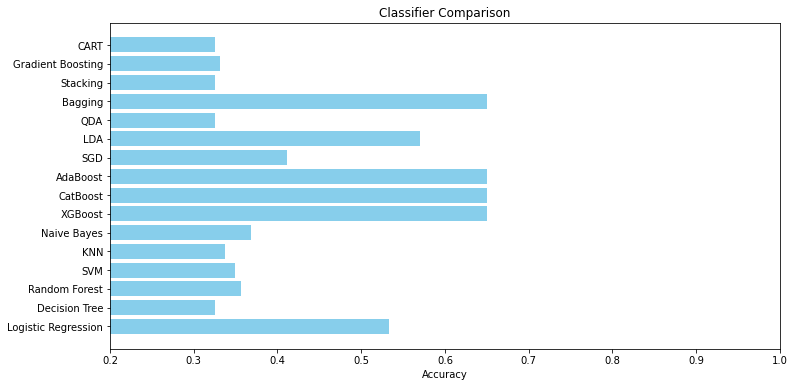

In [657]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_avbslr, accuracy_avbsdt, accuracy_avbsrf, accuracy_avbssvm, accuracy_avbsknn, accuracy_avbsnb, accuracy_avbsxgb, accuracy_avbscb, accuracy_avbsab, accuracy_avbssgd, accuracy_avbslda, accuracy_avbsqda, accuracy_avbsb, accuracy_avbsst, accuracy_avbsgb, accuracy_avbscart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.2, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


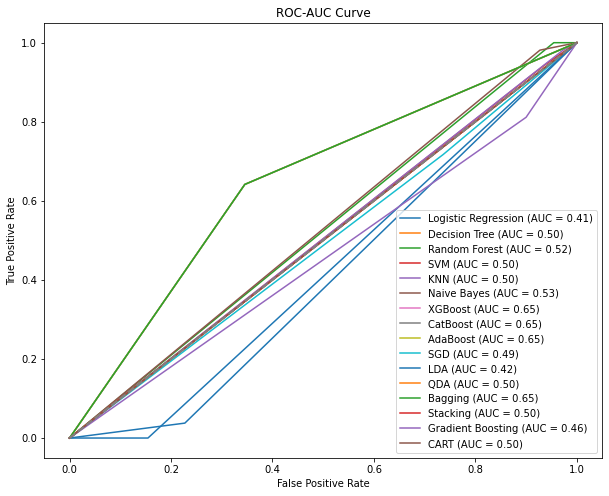

In [658]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_avbslr),
    ('Decision Tree', y_pred_avbsdt),
    ('Random Forest', y_pred_avbsrf),
    ('SVM', y_pred_avbssvm),
    ('KNN', y_pred_avbsknn),
    ('Naive Bayes', y_pred_avbsnb),
    ('XGBoost', y_pred_avbsxgb),
    ('CatBoost', y_pred_avbscb),
    ('AdaBoost', y_pred_avbsab),
    ('SGD', y_pred_avbssgd),
    ('LDA', y_pred_avbslda),
    ('QDA', y_pred_avbsqda),
    ('Bagging', y_pred_avbsb),
    ('Stacking', y_pred_avbsst),
    ('Gradient Boosting', y_pred_avbsgb),
    ('CART', y_pred_avbscart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


In [612]:
from imblearn.ensemble import RUSBoostClassifier
from collections import Counter

# Check the class distribution before RUSBoost
print("Class distribution before RUSBoost:", Counter(y))

# Create a RUSBoostClassifier object
rusboostavrusb = RUSBoostClassifier(n_estimators=50, random_state=42)

# Fit the RUSBoostClassifier on the training data
rusboostavrusb.fit(X_new, y)

# Make predictions on the test data
y_pred_rusboostavrusb = rusboostavrusb.predict(X_test)

# Check the class distribution after RUSBoost (it might differ slightly)
print("Class distribution after RUSBoost:", Counter(y_pred_rusboostavrusb))


Class distribution before RUSBoost: Counter({1: 900, 0: 100})
Class distribution after RUSBoost: Counter({0: 91, 1: 72})


In [676]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create a Logistic Regression model
logistic_reg_modelavrusb = LogisticRegression(random_state=42)

# Fit the model on the resampled and selected feature data
logistic_reg_modelavrusb.fit(X_new, y)

# Make predictions on the test data (assuming you have X_test_new)
y_pred_avrusblr = logistic_reg_modelavrusb.predict(X_test)

# Evaluate the model's performance
accuracy_avrusblr = accuracy_score(y_test, y_pred_avrusblr)
confusion_matrix_avrusb = confusion_matrix(y_test, y_pred_avrusblr)
classification_report_avrusb = classification_report(y_test, y_pred_avrusblr)

# Print the evaluation metrics
print("Accuracy:", accuracy_avrusblr)
print("Confusion Matrix:\n", confusion_matrix_avrusb)
print("Classification Report:\n", classification_report_avrusb)


Accuracy: 0.3006134969325153
Confusion Matrix:
 [[  6 104]
 [ 10  43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.05      0.10       110
           1       0.29      0.81      0.43        53

    accuracy                           0.30       163
   macro avg       0.33      0.43      0.26       163
weighted avg       0.35      0.30      0.20       163



In [659]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
decision_treeavrusbdt = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the balanced data with selected features
decision_treeavrusbdt.fit(X_new, y)

# Make predictions on the test data
y_pred_avrusbdt = decision_treeavrusbdt.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrusbdt = accuracy_score(y_test, y_pred_avrusbdt)
print("Accuracy:", accuracy_avrusbdt)

# Print classification report for more detailed evaluation
report_avrusbdt = classification_report(y_test, y_pred_avrusbdt)
print("Classification Report:\n", report_avrusbdt)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [660]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forestavrusbrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the balanced data with selected features
random_forestavrusbrf.fit(X_new, y)

# Make predictions on the test data
y_pred_avrusbrf = random_forestavrusbrf.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrusbrf = accuracy_score(y_test, y_pred_avrusbrf)
print("Accuracy:", accuracy_avrusbrf)

# Print classification report for more detailed evaluation
report_avrusbrf = classification_report(y_test, y_pred_avrusbrf)
print("Classification Report:\n", report_avrusbrf)


Accuracy: 0.36809815950920244
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.16      0.26       110
           1       0.31      0.79      0.45        53

    accuracy                           0.37       163
   macro avg       0.47      0.48      0.35       163
weighted avg       0.52      0.37      0.32       163



In [661]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_classifieravrusbsvm = SVC(kernel='linear', random_state=42)

# Fit the SVM model on the balanced data with selected features
svm_classifieravrusbsvm.fit(X_new, y)

# Make predictions on the test data
y_pred_avrusbsvm = svm_classifieravrusbsvm.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrusbsvm = accuracy_score(y_test, y_pred_avrusbsvm)
print("Accuracy:", accuracy_avrusbsvm)

# Print classification report for more detailed evaluation
report_avrusbsvm = classification_report(y_test, y_pred_avrusbsvm)
print("Classification Report:\n", report_avrusbsvm)


Accuracy: 0.3496932515337423
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.06      0.12       110
           1       0.33      0.94      0.49        53

    accuracy                           0.35       163
   macro avg       0.51      0.50      0.30       163
weighted avg       0.58      0.35      0.24       163



In [662]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Create a StandardScaler object
scaleravrusbknn = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_avrusbknn = scaleravrusbknn.fit_transform(X_new, y)
X_test_scaled_avrusbknn = scaleravrusbknn.transform(X_test)

# Now, apply KNN on the scaled data
knn_classifieravrusbknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed
knn_classifieravrusbknn.fit(X_train_scaled_avrusbknn, y)
y_pred_avbsknn = knn_classifieravbsknn.predict(X_test_scaled_avrusbknn)
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a KNN classifier
knn_classifieravrusbknn = KNeighborsClassifier(n_neighbors=5)  # You can choose the number of neighbors (k) as needed

# Fit the KNN model on the scaled data
knn_classifieravrusbknn.fit(X_train_scaled_avrusbknn, y)

# Make predictions on the test data
y_pred_avrusbknn = knn_classifieravrusbknn.predict(X_test_scaled_avrusbknn)

# Evaluate the classifier's performance
accuracy_avrusbknn = accuracy_score(y_test, y_pred_avrusbknn)
print("Accuracy:", accuracy_avrusbknn)

# Print classification report for more detailed evaluation
report_avrusbknn = classification_report(y_test, y_pred_avrusbknn)
print("Classification Report:\n", report_avrusbknn)

Accuracy: 0.31901840490797545
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.32      0.98      0.48        53

    accuracy                           0.32       163
   macro avg       0.16      0.49      0.24       163
weighted avg       0.10      0.32      0.16       163



In [663]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifieravrusbnb = GaussianNB()

# Fit the Naive Bayes model on the balanced data with selected features
naive_bayes_classifieravrusbnb.fit(X_new, y)

# Make predictions on the test data
y_pred_avrusbnb = naive_bayes_classifieravrusbnb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrusbnb = accuracy_score(y_test, y_pred_avrusbnb)
print("Accuracy:", accuracy_avrusbnb)

# Print classification report for more detailed evaluation
report_avrusbnb = classification_report(y_test, y_pred_avrusbnb)
print("Classification Report:\n", report_avrusbnb)


Accuracy: 0.4233128834355828
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.21      0.33       110
           1       0.35      0.87      0.49        53

    accuracy                           0.42       163
   macro avg       0.56      0.54      0.41       163
weighted avg       0.63      0.42      0.38       163



In [664]:
#XGBOOSt
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_classifieravrusbxgb = xgb.XGBClassifier()

# Fit the XGBoost model on the balanced data with selected features
xgb_classifieravrusbxgb.fit(X_new, y)


# Make predictions on the test data
y_pred_avrusbxgb = xgb_classifieravrusbxgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrusbxgb = accuracy_score(y_test, y_pred_avrusbxgb)
print("Accuracy:", accuracy_avrusbxgb)

# Print classification report for more detailed evaluation
report_avrusbxgb = classification_report(y_test, y_pred_avrusbxgb)
print("Classification Report:\n", report_avrusbxgb)

Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [665]:
#CAT BOOST
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CatBoost classifier
catboost_classifieravrusbcb = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=0)

# Fit the CatBoost model on the balanced data with selected features
catboost_classifieravrusbcb.fit(X_new, y)

# Make predictions on the test data
y_pred_avrusbcb = catboost_classifieravrusbcb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrusbcb = accuracy_score(y_test, y_pred_avrusbcb)
print("Accuracy:", accuracy_avrusbcb)

# Print classification report for more detailed evaluation
report_avrusbcb = classification_report(y_test, y_pred_avrusbcb)
print("Classification Report:\n", report_avrusbcb)

Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [678]:
#ADABOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost classifier with your base classifier (e.g., Decision Tree)
base_classifieravrusbab = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth as needed

# Create the AdaBoost classifier
adaboost_classifieravrusbab = AdaBoostClassifier(base_classifieravrusbab, n_estimators=50)  # You can adjust n_estimators as needed

# Fit the AdaBoost model on the balanced data with selected features
adaboost_classifieravrusbab.fit(X_new, y)


# Make predictions on the test data
y_pred_avrusbab = adaboost_classifieravrusbab.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrusbab = accuracy_score(y_test, y_pred_avrusbab)
print("Accuracy:", accuracy_avrusbab)


# Print classification report for more detailed evaluation
report_avrusbab = classification_report(y_test, y_pred_avrusbab)
print("Classification Report:\n", report_avrusbab)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [668]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an SGD Classifier
sgd_classifieravrusbsgd = SGDClassifier(loss="hinge", random_state=42)

# Fit the SGD model on the balanced data with selected features
sgd_classifieravrusbsgd.fit(X_new, y)


# Make predictions on the test data
y_pred_avrusbsgd = sgd_classifieravrusbsgd.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrusbsgd = accuracy_score(y_test, y_pred_avrusbsgd)
print("Accuracy:", accuracy_avrusbsgd)

# Print classification report for more detailed evaluation
report_avrusbsgd = classification_report(y_test, y_pred_avrusbsgd)
print("Classification Report:\n", report_avrusbsgd)

Accuracy: 0.4049079754601227
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.36      0.45       110
           1       0.27      0.49      0.35        53

    accuracy                           0.40       163
   macro avg       0.43      0.43      0.40       163
weighted avg       0.49      0.40      0.42       163



In [669]:

#LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create an LDA classifier
lda_classifieravrusblda = LinearDiscriminantAnalysis()

# Fit the LDA model on the balanced data with selected features
lda_classifieravrusblda.fit(X_new, y)

# Make predictions on the test data
y_pred_avrusblda = lda_classifieravrusblda.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrusblda = accuracy_score(y_test, y_pred_avrusblda)
print("Accuracy:", accuracy_avrusblda)

# Print classification report for more detailed evaluation
report_avrusblda = classification_report(y_test, y_pred_avrusblda)
print("Classification Report:\n", report_avrusblda)


Accuracy: 0.3006134969325153
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.05      0.08       110
           1       0.30      0.83      0.44        53

    accuracy                           0.30       163
   macro avg       0.33      0.44      0.26       163
weighted avg       0.34      0.30      0.20       163



In [670]:
#QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create a Quadratic Discriminant Analysis classifier
qda_classifieravrusbqda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the balanced data with selected features
qda_classifieravrusbqda.fit(X_new, y)

# Make predictions on the test data
y_pred_avrusbqda = qda_classifieravrusbqda.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrusbqda = accuracy_score(y_test, y_pred_avrusbqda)
print("Accuracy:", accuracy_avrusbqda)

# Print classification report for more detailed evaluation
report_avrusbqda = classification_report(y_test, y_pred_avrusbqda)
print("Classification Report:\n", report_avrusbqda)


Accuracy: 0.32515337423312884
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.33      1.00      0.49        53

    accuracy                           0.33       163
   macro avg       0.16      0.50      0.25       163
weighted avg       0.11      0.33      0.16       163



In [671]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a base classifier (e.g., Decision Tree)
base_classifieravrusbb = DecisionTreeClassifier(random_state=42)

# Create a Bagging classifier
bagging_classifieravrusbb = BaggingClassifier(base_classifieravrusbb, n_estimators=100, random_state=42)

# Fit the Bagging model on the balanced data with selected features
bagging_classifieravrusbb.fit(X_new, y)

# Make predictions on the test data
y_pred_avrusbb = bagging_classifieravrusbb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrusbb = accuracy_score(y_test, y_pred_avrusbb)
print("Accuracy:", accuracy_avrusbb)

# Print classification report for more detailed evaluation
report_avrusbb = classification_report(y_test, y_pred_avrusbb)
print("Classification Report:\n", report_avrusbb)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [672]:
#STACKING
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define your base classifiers
base_classifiersavrusbst = [
    ('decision_tree', DecisionTreeClassifier(random_state=100)),
    ('random_forest', RandomForestClassifier(random_state=100)),
    ('svm', SVC(random_state=100))
]

# Create a StackingClassifier with a meta-classifier (you can choose any meta-classifier)
stacking_classifieravrusbst = StackingClassifier(
    estimators=base_classifiersavrusbst,
    final_estimator=GaussianNB()  # You can choose any meta-classifier here
)

# Fit the stacking classifier on the balanced data with selected features
stacking_classifieravrusbst.fit(X_new, y)

# Make predictions on the test data
y_pred_avrusbst = stacking_classifieravrusbst.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrusbst = accuracy_score(y_test, y_pred_avrusbst)
print("Accuracy:", accuracy_avrusbst)

# Print classification report for more detailed evaluation
report_avrusbst = classification_report(y_test, y_pred_avrusbst)
print("Classification Report:\n", report_avrusbst)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [673]:
#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_classifieravrusbgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the Gradient Boosting model on the balanced data with selected features
gb_classifieravrusbgb.fit(X_new, y)

# Make predictions on the test data
y_pred_avrusbgb = gb_classifieravrusbgb.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrusbgb = accuracy_score(y_test, y_pred_avrusbgb)
print("Accuracy (Gradient Boosting):", accuracy_avrusbgb)

# Print classification report for more detailed evaluation
report_avrusbgb = classification_report(y_test, y_pred_avrusbgb)
print("Classification Report (Gradient Boosting):\n", report_avrusbgb)

Accuracy (Gradient Boosting): 0.6503067484662577
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



In [674]:
#CART
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a CART classifier
cart_classifieravrusbcart = DecisionTreeClassifier(random_state=100)

# Fit the CART model on the balanced data with selected features
cart_classifieravrusbcart.fit(X_new, y)

# Make predictions on the test data
y_pred_avrusbcart = cart_classifieravrusbcart.predict(X_test)

# Evaluate the classifier's performance
accuracy_avrusbcart = accuracy_score(y_test, y_pred_avrusbcart)
print("Accuracy:", accuracy_avrusbcart)

# Print classification report for more detailed evaluation
report_avrusbcart = classification_report(y_test, y_pred_avrusbcart)
print("Classification Report:\n", report_avrusbcart)


Accuracy: 0.6503067484662577
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       110
           1       0.47      0.64      0.54        53

    accuracy                           0.65       163
   macro avg       0.63      0.65      0.63       163
weighted avg       0.69      0.65      0.66       163



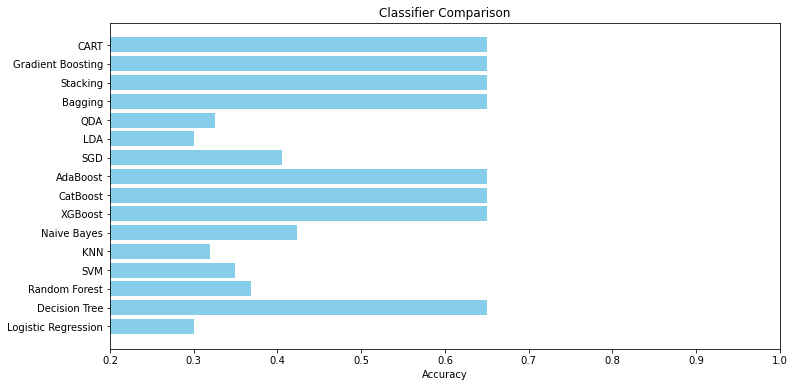

In [680]:
import matplotlib.pyplot as plt

# List of classifiers
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost', 'CatBoost', 'AdaBoost', 'SGD', 'LDA', 'QDA', 'Bagging', 'Stacking', 'Gradient Boosting', 'CART']

# List of accuracies corresponding to each classifier
accuracies = [accuracy_avrusblr, accuracy_avrusbdt, accuracy_avrusbrf, accuracy_avrusbsvm, accuracy_avrusbknn, accuracy_avrusbnb, accuracy_avrusbxgb, accuracy_avrusbcb, accuracy_avrusbab, accuracy_avrusbsgd, accuracy_avrusblda, accuracy_avrusbqda, accuracy_avrusbb, accuracy_avrusbst, accuracy_avrusbgb, accuracy_avrusbcart]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Comparison')
plt.xlim(0.2, 1.0)  # Adjust the limits based on your accuracy range
plt.show()


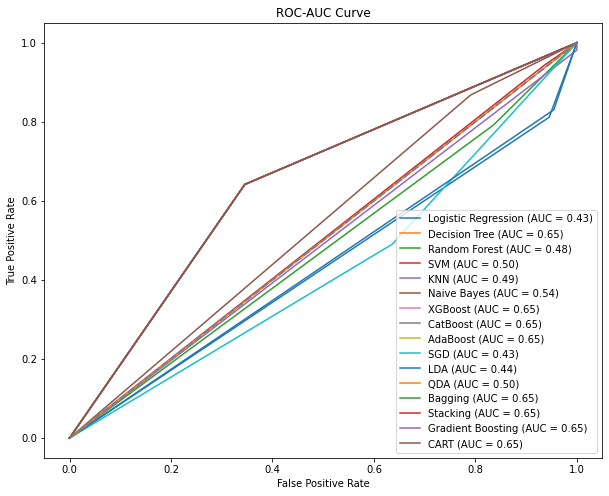

In [681]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming y_test and y_pred_prob are your true labels and predicted probabilities for the positive class
y_test_bin = label_binarize(y_test, classes=[0, 1])

# List of classifiers and corresponding predicted probabilities
classifiers = [
    ('Logistic Regression', y_pred_avrusblr),
    ('Decision Tree', y_pred_avrusbdt),
    ('Random Forest', y_pred_avrusbrf),
    ('SVM', y_pred_avrusbsvm),
    ('KNN', y_pred_avrusbknn),
    ('Naive Bayes', y_pred_avrusbnb),
    ('XGBoost', y_pred_avrusbxgb),
    ('CatBoost', y_pred_avrusbcb),
    ('AdaBoost', y_pred_avrusbab),
    ('SGD', y_pred_avrusbsgd),
    ('LDA', y_pred_avrusblda),
    ('QDA', y_pred_avrusbqda),
    ('Bagging', y_pred_avrusbb),
    ('Stacking', y_pred_avrusbst),
    ('Gradient Boosting', y_pred_avrusbgb),
    ('CART', y_pred_avrusbcart)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for name, y_pred_prob in classifiers:
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()
